# MLP

MLP is a type of feedforward neural network so that means the information has one direction from input node to output, through hidden node.
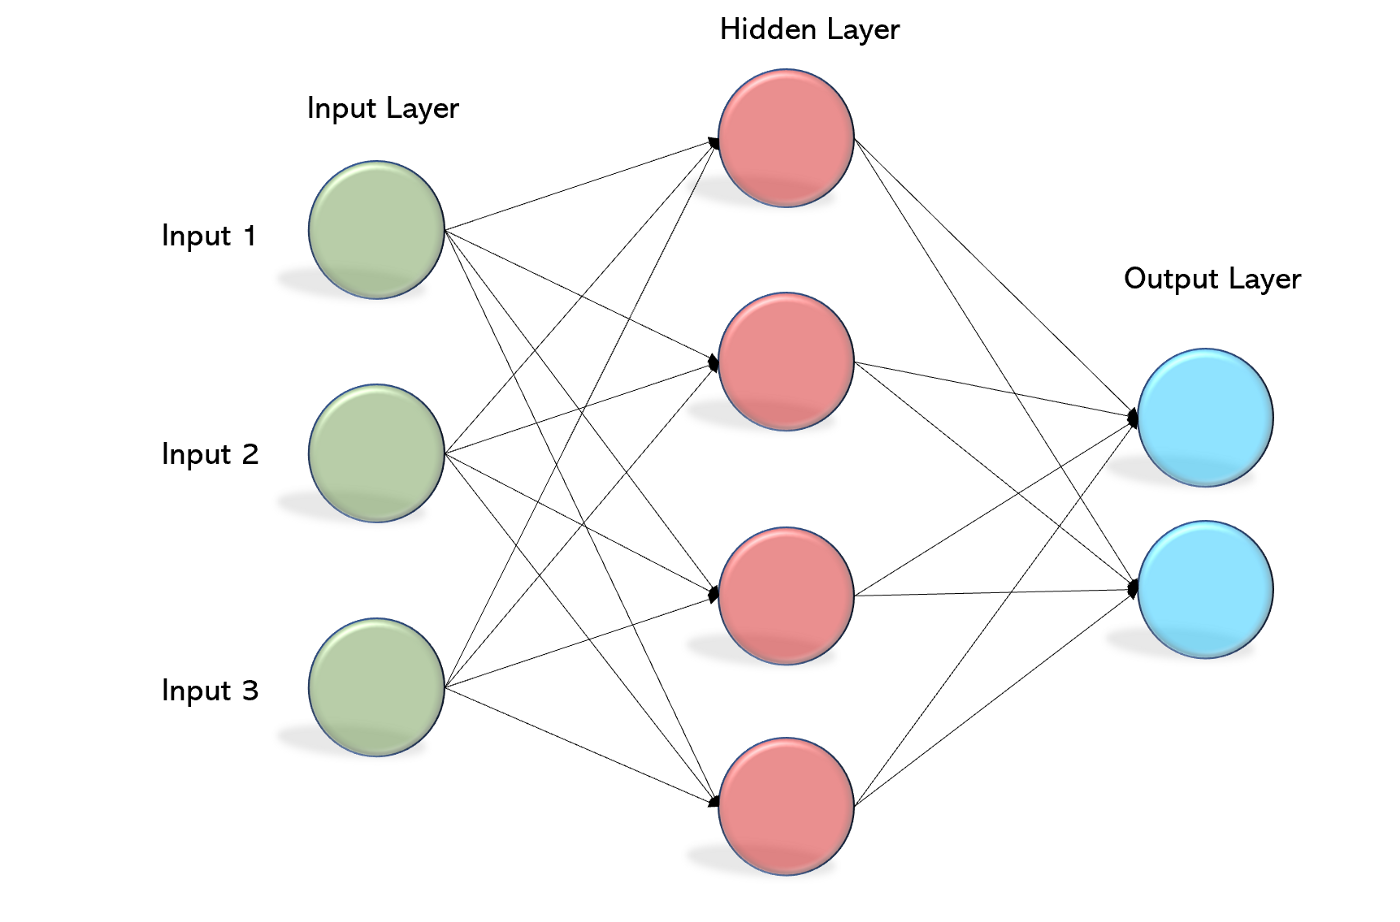

In [1]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('CAP5.csv')
df["datetime"] = pd.to_datetime(df["datetime"],format = "%Y-%m-%d %H:%M:%S")
df.drop(["datetime","cycle","ambient_temperature"],inplace=True,axis=1)
ds = df.values
ds = ds.astype('float32')

In [119]:
train_size = int(len(ds) * 0.7) 
train_dataset, test_dataset = ds[0:train_size,:], ds[train_size:len(ds),:]

In [120]:
def exp(step_back,repeat_num,neuron_number,epochs,batch_number):
    arr = []
    for i in range(repeat_num):
        X_train, Y_train = [], []
        for i in range(len(train_dataset)-step_back - 1):
            a = train_dataset[i:(i+step_back), 0]
            X_train.append(a)
            Y_train.append(train_dataset[i + step_back, 0])
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)

        X_test, Y_test = [], []
        for i in range(len(test_dataset)-step_back - 1):
            a = test_dataset[i:(i+step_back), 0]
            X_test.append(a)
            Y_test.append(test_dataset[i + step_back, 0])
        X_test = np.array(X_test)
        Y_test = np.array(Y_test)
        model = Sequential()
        model.add(Dense(units = neuron_number, input_dim=step_back, activation='relu'))
        model.add(Dense(units = 1))
        model.summary()
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_number, verbose=2)   
        trainScore = model.evaluate(X_train, Y_train, verbose=1)
        print('Train Score: %.4f MSE (%.5f RMSE)' % (trainScore, np.sqrt(trainScore)))
        testScore = model.evaluate(X_test, Y_test, verbose=1)
        print('Test Score: %.4f MSE (%.5f RMSE)' % (testScore, np.sqrt(testScore)))
        arr.append(np.sqrt(testScore))
    return arr

Rest of these parameter optimization for MLP

In [85]:
import seaborn as sns 
#step_back_number
dic = {}
for i in [2,3,4,5,6,7,8,9,10]:
    dic[i] = exp(i,5,128,100,2)
df_1 = pd.DataFrame(dic1)
df_melted = pd.melt(df_1)
sns.boxplot(x='variable', y='value', data=df_melted)

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_199 (Dense)           (None, 128)               384       
                                                                 
 dense_200 (Dense)           (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 - 0s - loss: 0.0721 - 260ms/epoch - 4ms/step
Epoch 2/100
74/74 - 0s - loss: 4.7175e-04 - 74ms/epoch - 1ms/step
Epoch 3/100
74/74 - 0s - loss: 4.4889e-04 - 71ms/epoch - 956us/step
Epoch 4/100
74/74 - 0s - loss: 4.5377e-04 - 70ms/epoch - 942us/step
Epoch 5/100
74/74 - 0s - loss: 4.3357e-04 - 76ms/epoch - 1ms/step
Epoch 6/100
74/74 - 0s - loss: 3.9747e-04 - 70ms/epoch - 940us/step
Epoch 7/100
74/74 - 0s - loss: 3.9957e-04 - 75ms/epo

Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 - 1s - loss: 0.2637 - 550ms/epoch - 7ms/step
Epoch 2/100
74/74 - 0s - loss: 8.5623e-04 - 74ms/epoch - 996us/step
Epoch 3/100
74/74 - 0s - loss: 7.8370e-04 - 68ms/epoch - 920us/step
Epoch 4/100
74/74 - 0s - loss: 7.6842e-04 - 70ms/epoch - 941us/step
Epoch 5/100
74/74 - 0s - loss: 7.3218e-04 - 72ms/epoch - 970us/step
Epoch 6/100
74/74 - 0s - loss: 7.1119e-04 - 71ms/epoch - 962us/step
Epoch 7/100
74/74 - 0s - loss: 6.9326e-04 - 70ms/epoch - 948us/step
Epoch 8/100
74/74 - 0s - loss: 6.4406e-04 - 72ms/epoch - 970us/step
Epoch 9/100
74/74 - 0s - loss: 6.2607e-04 - 71ms/epoch - 954us/step
Epoch 10/100
74/74 - 0s - loss: 5.7594e-04 - 68ms/epoch - 918us/step
Epoch 11/100
74/74 - 0s - loss: 5.4683e-04 - 70ms/epoch - 948us/step
Epoch 12/100
74/74 - 0s - loss: 5.3864e-04 - 70ms/epoch - 939us/step
Epoch 13/100
74/74 - 0s - loss: 4.7021e-04 - 70ms/epoch 

Epoch 6/100
74/74 - 0s - loss: 6.7130e-04 - 71ms/epoch - 966us/step
Epoch 7/100
74/74 - 0s - loss: 6.4194e-04 - 70ms/epoch - 945us/step
Epoch 8/100
74/74 - 0s - loss: 6.0600e-04 - 69ms/epoch - 934us/step
Epoch 9/100
74/74 - 0s - loss: 6.0064e-04 - 72ms/epoch - 966us/step
Epoch 10/100
74/74 - 0s - loss: 5.3115e-04 - 70ms/epoch - 948us/step
Epoch 11/100
74/74 - 0s - loss: 5.3663e-04 - 71ms/epoch - 958us/step
Epoch 12/100
74/74 - 0s - loss: 5.5514e-04 - 71ms/epoch - 956us/step
Epoch 13/100
74/74 - 0s - loss: 5.1525e-04 - 70ms/epoch - 947us/step
Epoch 14/100
74/74 - 0s - loss: 4.9121e-04 - 71ms/epoch - 953us/step
Epoch 15/100
74/74 - 0s - loss: 4.0610e-04 - 71ms/epoch - 956us/step
Epoch 16/100
74/74 - 0s - loss: 4.0487e-04 - 72ms/epoch - 968us/step
Epoch 17/100
74/74 - 0s - loss: 4.0868e-04 - 69ms/epoch - 931us/step
Epoch 18/100
74/74 - 0s - loss: 3.9016e-04 - 71ms/epoch - 954us/step
Epoch 19/100
74/74 - 0s - loss: 3.9101e-04 - 70ms/epoch - 950us/step
Epoch 20/100
74/74 - 0s - loss: 3.4231

Epoch 13/100
74/74 - 0s - loss: 9.0284e-04 - 71ms/epoch - 966us/step
Epoch 14/100
74/74 - 0s - loss: 8.2293e-04 - 70ms/epoch - 948us/step
Epoch 15/100
74/74 - 0s - loss: 9.3793e-04 - 73ms/epoch - 985us/step
Epoch 16/100
74/74 - 0s - loss: 8.0866e-04 - 70ms/epoch - 948us/step
Epoch 17/100
74/74 - 0s - loss: 7.6857e-04 - 71ms/epoch - 965us/step
Epoch 18/100
74/74 - 0s - loss: 6.5515e-04 - 72ms/epoch - 978us/step
Epoch 19/100
74/74 - 0s - loss: 6.5598e-04 - 69ms/epoch - 937us/step
Epoch 20/100
74/74 - 0s - loss: 6.9448e-04 - 73ms/epoch - 988us/step
Epoch 21/100
74/74 - 0s - loss: 5.4630e-04 - 72ms/epoch - 975us/step
Epoch 22/100
74/74 - 0s - loss: 5.2284e-04 - 71ms/epoch - 960us/step
Epoch 23/100
74/74 - 0s - loss: 4.9012e-04 - 71ms/epoch - 962us/step
Epoch 24/100
74/74 - 0s - loss: 4.9619e-04 - 72ms/epoch - 967us/step
Epoch 25/100
74/74 - 0s - loss: 4.3142e-04 - 72ms/epoch - 978us/step
Epoch 26/100
74/74 - 0s - loss: 4.9038e-04 - 70ms/epoch - 946us/step
Epoch 27/100
74/74 - 0s - loss: 4.

74/74 - 0s - loss: 3.5725e-04 - 82ms/epoch - 1ms/step
Epoch 20/100
74/74 - 0s - loss: 3.3457e-04 - 72ms/epoch - 977us/step
Epoch 21/100
74/74 - 0s - loss: 3.7848e-04 - 71ms/epoch - 960us/step
Epoch 22/100
74/74 - 0s - loss: 3.0335e-04 - 73ms/epoch - 993us/step
Epoch 23/100
74/74 - 0s - loss: 2.8867e-04 - 70ms/epoch - 948us/step
Epoch 24/100
74/74 - 0s - loss: 2.9472e-04 - 70ms/epoch - 943us/step
Epoch 25/100
74/74 - 0s - loss: 3.0157e-04 - 70ms/epoch - 949us/step
Epoch 26/100
74/74 - 0s - loss: 2.8540e-04 - 69ms/epoch - 934us/step
Epoch 27/100
74/74 - 0s - loss: 2.4335e-04 - 72ms/epoch - 978us/step
Epoch 28/100
74/74 - 0s - loss: 3.0345e-04 - 70ms/epoch - 940us/step
Epoch 29/100
74/74 - 0s - loss: 2.4431e-04 - 73ms/epoch - 983us/step
Epoch 30/100
74/74 - 0s - loss: 2.3093e-04 - 71ms/epoch - 955us/step
Epoch 31/100
74/74 - 0s - loss: 2.8131e-04 - 73ms/epoch - 983us/step
Epoch 32/100
74/74 - 0s - loss: 2.3185e-04 - 72ms/epoch - 971us/step
Epoch 33/100
74/74 - 0s - loss: 2.3272e-04 - 71ms

Epoch 26/100
74/74 - 0s - loss: 2.5454e-04 - 75ms/epoch - 1ms/step
Epoch 27/100
74/74 - 0s - loss: 2.7373e-04 - 74ms/epoch - 1ms/step
Epoch 28/100
74/74 - 0s - loss: 2.6039e-04 - 75ms/epoch - 1ms/step
Epoch 29/100
74/74 - 0s - loss: 3.0854e-04 - 73ms/epoch - 991us/step
Epoch 30/100
74/74 - 0s - loss: 3.2927e-04 - 72ms/epoch - 969us/step
Epoch 31/100
74/74 - 0s - loss: 2.6036e-04 - 75ms/epoch - 1ms/step
Epoch 32/100
74/74 - 0s - loss: 3.0757e-04 - 75ms/epoch - 1ms/step
Epoch 33/100
74/74 - 0s - loss: 3.1965e-04 - 75ms/epoch - 1ms/step
Epoch 34/100
74/74 - 0s - loss: 2.9763e-04 - 75ms/epoch - 1ms/step
Epoch 35/100
74/74 - 0s - loss: 2.7351e-04 - 76ms/epoch - 1ms/step
Epoch 36/100
74/74 - 0s - loss: 2.3912e-04 - 73ms/epoch - 986us/step
Epoch 37/100
74/74 - 0s - loss: 2.8803e-04 - 73ms/epoch - 990us/step
Epoch 38/100
74/74 - 0s - loss: 3.0417e-04 - 76ms/epoch - 1ms/step
Epoch 39/100
74/74 - 0s - loss: 2.9187e-04 - 70ms/epoch - 952us/step
Epoch 40/100
74/74 - 0s - loss: 2.3708e-04 - 71ms/ep

Epoch 34/100
74/74 - 0s - loss: 3.1575e-04 - 73ms/epoch - 987us/step
Epoch 35/100
74/74 - 0s - loss: 3.8747e-04 - 74ms/epoch - 997us/step
Epoch 36/100
74/74 - 0s - loss: 4.0873e-04 - 74ms/epoch - 997us/step
Epoch 37/100
74/74 - 0s - loss: 2.8809e-04 - 75ms/epoch - 1ms/step
Epoch 38/100
74/74 - 0s - loss: 2.9593e-04 - 74ms/epoch - 1ms/step
Epoch 39/100
74/74 - 0s - loss: 3.3353e-04 - 73ms/epoch - 988us/step
Epoch 40/100
74/74 - 0s - loss: 3.1217e-04 - 75ms/epoch - 1ms/step
Epoch 41/100
74/74 - 0s - loss: 2.9574e-04 - 74ms/epoch - 1ms/step
Epoch 42/100
74/74 - 0s - loss: 2.7715e-04 - 75ms/epoch - 1ms/step
Epoch 43/100
74/74 - 0s - loss: 2.8770e-04 - 74ms/epoch - 997us/step
Epoch 44/100
74/74 - 0s - loss: 3.1121e-04 - 75ms/epoch - 1ms/step
Epoch 45/100
74/74 - 0s - loss: 4.7483e-04 - 74ms/epoch - 994us/step
Epoch 46/100
74/74 - 0s - loss: 3.1265e-04 - 73ms/epoch - 984us/step
Epoch 47/100
74/74 - 0s - loss: 3.0828e-04 - 75ms/epoch - 1ms/step
Epoch 48/100
74/74 - 0s - loss: 3.9985e-04 - 74m

Epoch 42/100
74/74 - 0s - loss: 2.5102e-04 - 79ms/epoch - 1ms/step
Epoch 43/100
74/74 - 0s - loss: 2.6649e-04 - 78ms/epoch - 1ms/step
Epoch 44/100
74/74 - 0s - loss: 3.7245e-04 - 79ms/epoch - 1ms/step
Epoch 45/100
74/74 - 0s - loss: 2.7043e-04 - 78ms/epoch - 1ms/step
Epoch 46/100
74/74 - 0s - loss: 3.2918e-04 - 78ms/epoch - 1ms/step
Epoch 47/100
74/74 - 0s - loss: 3.9673e-04 - 78ms/epoch - 1ms/step
Epoch 48/100
74/74 - 0s - loss: 2.7567e-04 - 77ms/epoch - 1ms/step
Epoch 49/100
74/74 - 0s - loss: 2.9174e-04 - 77ms/epoch - 1ms/step
Epoch 50/100
74/74 - 0s - loss: 4.0026e-04 - 77ms/epoch - 1ms/step
Epoch 51/100
74/74 - 0s - loss: 3.5498e-04 - 78ms/epoch - 1ms/step
Epoch 52/100
74/74 - 0s - loss: 4.3436e-04 - 78ms/epoch - 1ms/step
Epoch 53/100
74/74 - 0s - loss: 3.6920e-04 - 81ms/epoch - 1ms/step
Epoch 54/100
74/74 - 0s - loss: 2.8348e-04 - 79ms/epoch - 1ms/step
Epoch 55/100
74/74 - 0s - loss: 2.4568e-04 - 73ms/epoch - 991us/step
Epoch 56/100
74/74 - 0s - loss: 3.0026e-04 - 78ms/epoch - 1m

74/74 - 0s - loss: 3.2938e-04 - 78ms/epoch - 1ms/step
Epoch 51/100
74/74 - 0s - loss: 3.5190e-04 - 75ms/epoch - 1ms/step
Epoch 52/100
74/74 - 0s - loss: 3.0863e-04 - 81ms/epoch - 1ms/step
Epoch 53/100
74/74 - 0s - loss: 4.5089e-04 - 75ms/epoch - 1ms/step
Epoch 54/100
74/74 - 0s - loss: 3.2376e-04 - 76ms/epoch - 1ms/step
Epoch 55/100
74/74 - 0s - loss: 4.8382e-04 - 78ms/epoch - 1ms/step
Epoch 56/100
74/74 - 0s - loss: 4.0769e-04 - 79ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 3.0065e-04 - 79ms/epoch - 1ms/step
Epoch 58/100
74/74 - 0s - loss: 3.2246e-04 - 78ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 3.3477e-04 - 78ms/epoch - 1ms/step
Epoch 60/100
74/74 - 0s - loss: 3.7686e-04 - 77ms/epoch - 1ms/step
Epoch 61/100
74/74 - 0s - loss: 4.5164e-04 - 77ms/epoch - 1ms/step
Epoch 62/100
74/74 - 0s - loss: 3.2728e-04 - 80ms/epoch - 1ms/step
Epoch 63/100
74/74 - 0s - loss: 4.2233e-04 - 76ms/epoch - 1ms/step
Epoch 64/100
74/74 - 0s - loss: 3.5451e-04 - 78ms/epoch - 1ms/step
Epoch 65

Epoch 59/100
74/74 - 0s - loss: 2.5853e-04 - 66ms/epoch - 890us/step
Epoch 60/100
74/74 - 0s - loss: 3.5872e-04 - 74ms/epoch - 996us/step
Epoch 61/100
74/74 - 0s - loss: 4.5221e-04 - 73ms/epoch - 981us/step
Epoch 62/100
74/74 - 0s - loss: 4.3955e-04 - 74ms/epoch - 1ms/step
Epoch 63/100
74/74 - 0s - loss: 3.5627e-04 - 75ms/epoch - 1ms/step
Epoch 64/100
74/74 - 0s - loss: 3.5840e-04 - 75ms/epoch - 1ms/step
Epoch 65/100
74/74 - 0s - loss: 6.1305e-04 - 73ms/epoch - 984us/step
Epoch 66/100
74/74 - 0s - loss: 3.1181e-04 - 72ms/epoch - 977us/step
Epoch 67/100
74/74 - 0s - loss: 3.6392e-04 - 73ms/epoch - 989us/step
Epoch 68/100
74/74 - 0s - loss: 4.0007e-04 - 74ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 3.9639e-04 - 74ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 2.4236e-04 - 73ms/epoch - 993us/step
Epoch 71/100
74/74 - 0s - loss: 3.6806e-04 - 74ms/epoch - 1000us/step
Epoch 72/100
74/74 - 0s - loss: 3.8206e-04 - 74ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 3.1363e-04 - 

Epoch 67/100
73/73 - 0s - loss: 3.3768e-04 - 74ms/epoch - 1ms/step
Epoch 68/100
73/73 - 0s - loss: 4.0807e-04 - 75ms/epoch - 1ms/step
Epoch 69/100
73/73 - 0s - loss: 3.6967e-04 - 74ms/epoch - 1ms/step
Epoch 70/100
73/73 - 0s - loss: 4.3467e-04 - 72ms/epoch - 981us/step
Epoch 71/100
73/73 - 0s - loss: 5.2192e-04 - 74ms/epoch - 1ms/step
Epoch 72/100
73/73 - 0s - loss: 2.6797e-04 - 74ms/epoch - 1ms/step
Epoch 73/100
73/73 - 0s - loss: 4.9135e-04 - 74ms/epoch - 1ms/step
Epoch 74/100
73/73 - 0s - loss: 3.7972e-04 - 73ms/epoch - 1ms/step
Epoch 75/100
73/73 - 0s - loss: 3.9301e-04 - 75ms/epoch - 1ms/step
Epoch 76/100
73/73 - 0s - loss: 5.0141e-04 - 72ms/epoch - 987us/step
Epoch 77/100
73/73 - 0s - loss: 4.6725e-04 - 73ms/epoch - 1ms/step
Epoch 78/100
73/73 - 0s - loss: 3.0813e-04 - 73ms/epoch - 1ms/step
Epoch 79/100
73/73 - 0s - loss: 7.5735e-04 - 74ms/epoch - 1ms/step
Epoch 80/100
73/73 - 0s - loss: 3.0176e-04 - 73ms/epoch - 1ms/step
Epoch 81/100
73/73 - 0s - loss: 3.3240e-04 - 73ms/epoch - 

Epoch 76/100
73/73 - 0s - loss: 3.5893e-04 - 74ms/epoch - 1ms/step
Epoch 77/100
73/73 - 0s - loss: 4.9385e-04 - 77ms/epoch - 1ms/step
Epoch 78/100
73/73 - 0s - loss: 4.9368e-04 - 76ms/epoch - 1ms/step
Epoch 79/100
73/73 - 0s - loss: 3.2545e-04 - 73ms/epoch - 994us/step
Epoch 80/100
73/73 - 0s - loss: 3.6189e-04 - 71ms/epoch - 979us/step
Epoch 81/100
73/73 - 0s - loss: 5.1460e-04 - 75ms/epoch - 1ms/step
Epoch 82/100
73/73 - 0s - loss: 4.4833e-04 - 74ms/epoch - 1ms/step
Epoch 83/100
73/73 - 0s - loss: 3.7020e-04 - 74ms/epoch - 1ms/step
Epoch 84/100
73/73 - 0s - loss: 3.5791e-04 - 74ms/epoch - 1ms/step
Epoch 85/100
73/73 - 0s - loss: 3.5412e-04 - 73ms/epoch - 1ms/step
Epoch 86/100
73/73 - 0s - loss: 3.7305e-04 - 75ms/epoch - 1ms/step
Epoch 87/100
73/73 - 0s - loss: 3.4861e-04 - 75ms/epoch - 1ms/step
Epoch 88/100
73/73 - 0s - loss: 3.7382e-04 - 73ms/epoch - 1000us/step
Epoch 89/100
73/73 - 0s - loss: 3.4599e-04 - 76ms/epoch - 1ms/step
Epoch 90/100
73/73 - 0s - loss: 3.2000e-04 - 74ms/epoch

Epoch 84/100
73/73 - 0s - loss: 2.9811e-04 - 75ms/epoch - 1ms/step
Epoch 85/100
73/73 - 0s - loss: 3.5662e-04 - 75ms/epoch - 1ms/step
Epoch 86/100
73/73 - 0s - loss: 3.1330e-04 - 74ms/epoch - 1ms/step
Epoch 87/100
73/73 - 0s - loss: 4.5116e-04 - 74ms/epoch - 1ms/step
Epoch 88/100
73/73 - 0s - loss: 4.4343e-04 - 74ms/epoch - 1ms/step
Epoch 89/100
73/73 - 0s - loss: 5.7020e-04 - 74ms/epoch - 1ms/step
Epoch 90/100
73/73 - 0s - loss: 3.6888e-04 - 73ms/epoch - 1ms/step
Epoch 91/100
73/73 - 0s - loss: 4.0066e-04 - 73ms/epoch - 1ms/step
Epoch 92/100
73/73 - 0s - loss: 7.3714e-04 - 76ms/epoch - 1ms/step
Epoch 93/100
73/73 - 0s - loss: 4.2336e-04 - 74ms/epoch - 1ms/step
Epoch 94/100
73/73 - 0s - loss: 4.0612e-04 - 70ms/epoch - 958us/step
Epoch 95/100
73/73 - 0s - loss: 3.2959e-04 - 73ms/epoch - 996us/step
Epoch 96/100
73/73 - 0s - loss: 4.0251e-04 - 76ms/epoch - 1ms/step
Epoch 97/100
73/73 - 0s - loss: 3.8442e-04 - 73ms/epoch - 1ms/step
Epoch 98/100
73/73 - 0s - loss: 4.4100e-04 - 74ms/epoch - 

Epoch 93/100
73/73 - 0s - loss: 4.4284e-04 - 74ms/epoch - 1ms/step
Epoch 94/100
73/73 - 0s - loss: 3.6643e-04 - 71ms/epoch - 973us/step
Epoch 95/100
73/73 - 0s - loss: 3.0901e-04 - 76ms/epoch - 1ms/step
Epoch 96/100
73/73 - 0s - loss: 5.9045e-04 - 74ms/epoch - 1ms/step
Epoch 97/100
73/73 - 0s - loss: 3.4673e-04 - 74ms/epoch - 1ms/step
Epoch 98/100
73/73 - 0s - loss: 4.9934e-04 - 75ms/epoch - 1ms/step
Epoch 99/100
73/73 - 0s - loss: 3.4285e-04 - 72ms/epoch - 985us/step
Epoch 100/100
73/73 - 0s - loss: 3.3878e-04 - 74ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 2.2624e-04
Train Score: 0.0002 MSE (0.01504 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 1.3116e-04
Test Score: 0.0001 MSE (0.01145 RMSE)
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_227 (Dense)           (None, 128)               640       
                    

                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
73/73 - 0s - loss: 0.9194 - 301ms/epoch - 4ms/step
Epoch 2/100
73/73 - 0s - loss: 9.8964e-04 - 74ms/epoch - 1ms/step
Epoch 3/100
73/73 - 0s - loss: 7.5846e-04 - 75ms/epoch - 1ms/step
Epoch 4/100
73/73 - 0s - loss: 7.8465e-04 - 75ms/epoch - 1ms/step
Epoch 5/100
73/73 - 0s - loss: 7.3334e-04 - 70ms/epoch - 961us/step
Epoch 6/100
73/73 - 0s - loss: 7.1464e-04 - 75ms/epoch - 1ms/step
Epoch 7/100
73/73 - 0s - loss: 7.2935e-04 - 76ms/epoch - 1ms/step
Epoch 8/100
73/73 - 0s - loss: 6.9189e-04 - 75ms/epoch - 1ms/step
Epoch 9/100
73/73 - 0s - loss: 7.1840e-04 - 73ms/epoch - 1ms/step
Epoch 10/100
73/73 - 0s - loss: 7.0235e-04 - 77ms/epoch - 1ms/step
Epoch 11/100
73/73 - 0s - loss: 6.8675e-04 - 73ms/epoch - 1ms/step
Epoch 12/100
73/73 - 0s - loss: 6.8104e-04 - 76ms/epoch - 1ms/step
Epoch 13/1

Epoch 6/100
73/73 - 0s - loss: 3.9803e-04 - 82ms/epoch - 1ms/step
Epoch 7/100
73/73 - 0s - loss: 3.9976e-04 - 81ms/epoch - 1ms/step
Epoch 8/100
73/73 - 0s - loss: 4.3459e-04 - 82ms/epoch - 1ms/step
Epoch 9/100
73/73 - 0s - loss: 4.6765e-04 - 81ms/epoch - 1ms/step
Epoch 10/100
73/73 - 0s - loss: 4.3519e-04 - 83ms/epoch - 1ms/step
Epoch 11/100
73/73 - 0s - loss: 4.3243e-04 - 82ms/epoch - 1ms/step
Epoch 12/100
73/73 - 0s - loss: 3.7809e-04 - 82ms/epoch - 1ms/step
Epoch 13/100
73/73 - 0s - loss: 3.7174e-04 - 81ms/epoch - 1ms/step
Epoch 14/100
73/73 - 0s - loss: 3.5733e-04 - 83ms/epoch - 1ms/step
Epoch 15/100
73/73 - 0s - loss: 4.9131e-04 - 82ms/epoch - 1ms/step
Epoch 16/100
73/73 - 0s - loss: 4.1238e-04 - 82ms/epoch - 1ms/step
Epoch 17/100
73/73 - 0s - loss: 3.6624e-04 - 81ms/epoch - 1ms/step
Epoch 18/100
73/73 - 0s - loss: 4.0257e-04 - 83ms/epoch - 1ms/step
Epoch 19/100
73/73 - 0s - loss: 4.1507e-04 - 81ms/epoch - 1ms/step
Epoch 20/100
73/73 - 0s - loss: 5.0931e-04 - 81ms/epoch - 1ms/step

73/73 - 0s - loss: 5.4336e-04 - 78ms/epoch - 1ms/step
Epoch 16/100
73/73 - 0s - loss: 4.2959e-04 - 74ms/epoch - 1ms/step
Epoch 17/100
73/73 - 0s - loss: 5.1678e-04 - 79ms/epoch - 1ms/step
Epoch 18/100
73/73 - 0s - loss: 4.2862e-04 - 78ms/epoch - 1ms/step
Epoch 19/100
73/73 - 0s - loss: 4.2758e-04 - 78ms/epoch - 1ms/step
Epoch 20/100
73/73 - 0s - loss: 4.7352e-04 - 78ms/epoch - 1ms/step
Epoch 21/100
73/73 - 0s - loss: 4.6161e-04 - 77ms/epoch - 1ms/step
Epoch 22/100
73/73 - 0s - loss: 4.0423e-04 - 78ms/epoch - 1ms/step
Epoch 23/100
73/73 - 0s - loss: 4.9571e-04 - 76ms/epoch - 1ms/step
Epoch 24/100
73/73 - 0s - loss: 3.3912e-04 - 76ms/epoch - 1ms/step
Epoch 25/100
73/73 - 0s - loss: 5.0975e-04 - 78ms/epoch - 1ms/step
Epoch 26/100
73/73 - 0s - loss: 4.1407e-04 - 78ms/epoch - 1ms/step
Epoch 27/100
73/73 - 0s - loss: 3.9391e-04 - 78ms/epoch - 1ms/step
Epoch 28/100
73/73 - 0s - loss: 4.3982e-04 - 77ms/epoch - 1ms/step
Epoch 29/100
73/73 - 0s - loss: 5.1736e-04 - 79ms/epoch - 1ms/step
Epoch 30

73/73 - 0s - loss: 4.1363e-04 - 78ms/epoch - 1ms/step
Epoch 25/100
73/73 - 0s - loss: 3.7258e-04 - 78ms/epoch - 1ms/step
Epoch 26/100
73/73 - 0s - loss: 3.4683e-04 - 80ms/epoch - 1ms/step
Epoch 27/100
73/73 - 0s - loss: 4.4990e-04 - 79ms/epoch - 1ms/step
Epoch 28/100
73/73 - 0s - loss: 3.4514e-04 - 78ms/epoch - 1ms/step
Epoch 29/100
73/73 - 0s - loss: 3.2959e-04 - 77ms/epoch - 1ms/step
Epoch 30/100
73/73 - 0s - loss: 4.8969e-04 - 79ms/epoch - 1ms/step
Epoch 31/100
73/73 - 0s - loss: 3.8508e-04 - 77ms/epoch - 1ms/step
Epoch 32/100
73/73 - 0s - loss: 3.7691e-04 - 77ms/epoch - 1ms/step
Epoch 33/100
73/73 - 0s - loss: 3.3555e-04 - 76ms/epoch - 1ms/step
Epoch 34/100
73/73 - 0s - loss: 4.6222e-04 - 78ms/epoch - 1ms/step
Epoch 35/100
73/73 - 0s - loss: 3.7868e-04 - 77ms/epoch - 1ms/step
Epoch 36/100
73/73 - 0s - loss: 2.9342e-04 - 74ms/epoch - 1ms/step
Epoch 37/100
73/73 - 0s - loss: 3.3322e-04 - 80ms/epoch - 1ms/step
Epoch 38/100
73/73 - 0s - loss: 3.4288e-04 - 79ms/epoch - 1ms/step
Epoch 39

72/72 - 0s - loss: 4.3189e-04 - 72ms/epoch - 1ms/step
Epoch 34/100
72/72 - 0s - loss: 4.6676e-04 - 74ms/epoch - 1ms/step
Epoch 35/100
72/72 - 0s - loss: 5.6077e-04 - 74ms/epoch - 1ms/step
Epoch 36/100
72/72 - 0s - loss: 3.2127e-04 - 74ms/epoch - 1ms/step
Epoch 37/100
72/72 - 0s - loss: 4.2238e-04 - 74ms/epoch - 1ms/step
Epoch 38/100
72/72 - 0s - loss: 3.3397e-04 - 74ms/epoch - 1ms/step
Epoch 39/100
72/72 - 0s - loss: 3.5982e-04 - 75ms/epoch - 1ms/step
Epoch 40/100
72/72 - 0s - loss: 4.1111e-04 - 72ms/epoch - 1ms/step
Epoch 41/100
72/72 - 0s - loss: 5.8186e-04 - 76ms/epoch - 1ms/step
Epoch 42/100
72/72 - 0s - loss: 4.0579e-04 - 74ms/epoch - 1ms/step
Epoch 43/100
72/72 - 0s - loss: 5.3021e-04 - 73ms/epoch - 1ms/step
Epoch 44/100
72/72 - 0s - loss: 3.8052e-04 - 72ms/epoch - 1ms/step
Epoch 45/100
72/72 - 0s - loss: 5.1069e-04 - 75ms/epoch - 1ms/step
Epoch 46/100
72/72 - 0s - loss: 5.8325e-04 - 73ms/epoch - 1ms/step
Epoch 47/100
72/72 - 0s - loss: 6.7942e-04 - 73ms/epoch - 1ms/step
Epoch 48

Epoch 42/100
72/72 - 0s - loss: 3.1891e-04 - 73ms/epoch - 1ms/step
Epoch 43/100
72/72 - 0s - loss: 3.7980e-04 - 75ms/epoch - 1ms/step
Epoch 44/100
72/72 - 0s - loss: 4.0556e-04 - 73ms/epoch - 1ms/step
Epoch 45/100
72/72 - 0s - loss: 5.9931e-04 - 74ms/epoch - 1ms/step
Epoch 46/100
72/72 - 0s - loss: 4.0734e-04 - 73ms/epoch - 1ms/step
Epoch 47/100
72/72 - 0s - loss: 5.3950e-04 - 74ms/epoch - 1ms/step
Epoch 48/100
72/72 - 0s - loss: 5.5360e-04 - 69ms/epoch - 960us/step
Epoch 49/100
72/72 - 0s - loss: 4.1739e-04 - 73ms/epoch - 1ms/step
Epoch 50/100
72/72 - 0s - loss: 4.3816e-04 - 74ms/epoch - 1ms/step
Epoch 51/100
72/72 - 0s - loss: 5.2033e-04 - 75ms/epoch - 1ms/step
Epoch 52/100
72/72 - 0s - loss: 4.2731e-04 - 70ms/epoch - 975us/step
Epoch 53/100
72/72 - 0s - loss: 4.6850e-04 - 73ms/epoch - 1ms/step
Epoch 54/100
72/72 - 0s - loss: 4.4351e-04 - 73ms/epoch - 1ms/step
Epoch 55/100
72/72 - 0s - loss: 3.1096e-04 - 74ms/epoch - 1ms/step
Epoch 56/100
72/72 - 0s - loss: 9.9407e-04 - 72ms/epoch - 

72/72 - 0s - loss: 4.8624e-04 - 73ms/epoch - 1ms/step
Epoch 51/100
72/72 - 0s - loss: 6.7565e-04 - 73ms/epoch - 1ms/step
Epoch 52/100
72/72 - 0s - loss: 2.6909e-04 - 73ms/epoch - 1ms/step
Epoch 53/100
72/72 - 0s - loss: 2.9838e-04 - 74ms/epoch - 1ms/step
Epoch 54/100
72/72 - 0s - loss: 5.7312e-04 - 76ms/epoch - 1ms/step
Epoch 55/100
72/72 - 0s - loss: 3.7747e-04 - 73ms/epoch - 1ms/step
Epoch 56/100
72/72 - 0s - loss: 5.1346e-04 - 73ms/epoch - 1ms/step
Epoch 57/100
72/72 - 0s - loss: 4.0562e-04 - 74ms/epoch - 1ms/step
Epoch 58/100
72/72 - 0s - loss: 4.2458e-04 - 72ms/epoch - 1ms/step
Epoch 59/100
72/72 - 0s - loss: 4.2243e-04 - 73ms/epoch - 1ms/step
Epoch 60/100
72/72 - 0s - loss: 6.2840e-04 - 85ms/epoch - 1ms/step
Epoch 61/100
72/72 - 0s - loss: 6.5713e-04 - 65ms/epoch - 900us/step
Epoch 62/100
72/72 - 0s - loss: 4.9243e-04 - 64ms/epoch - 882us/step
Epoch 63/100
72/72 - 0s - loss: 3.1494e-04 - 62ms/epoch - 858us/step
Epoch 64/100
72/72 - 0s - loss: 3.9951e-04 - 63ms/epoch - 870us/step


Epoch 57/100
72/72 - 0s - loss: 3.5906e-04 - 83ms/epoch - 1ms/step
Epoch 58/100
72/72 - 0s - loss: 6.4160e-04 - 69ms/epoch - 954us/step
Epoch 59/100
72/72 - 0s - loss: 5.3623e-04 - 69ms/epoch - 965us/step
Epoch 60/100
72/72 - 0s - loss: 4.5915e-04 - 70ms/epoch - 976us/step
Epoch 61/100
72/72 - 0s - loss: 5.1085e-04 - 68ms/epoch - 945us/step
Epoch 62/100
72/72 - 0s - loss: 5.5536e-04 - 68ms/epoch - 944us/step
Epoch 63/100
72/72 - 0s - loss: 5.9619e-04 - 69ms/epoch - 962us/step
Epoch 64/100
72/72 - 0s - loss: 0.0014 - 67ms/epoch - 931us/step
Epoch 65/100
72/72 - 0s - loss: 4.2134e-04 - 70ms/epoch - 977us/step
Epoch 66/100
72/72 - 0s - loss: 0.0010 - 70ms/epoch - 977us/step
Epoch 67/100
72/72 - 0s - loss: 8.4993e-04 - 69ms/epoch - 965us/step
Epoch 68/100
72/72 - 0s - loss: 3.3597e-04 - 72ms/epoch - 997us/step
Epoch 69/100
72/72 - 0s - loss: 5.0522e-04 - 71ms/epoch - 984us/step
Epoch 70/100
72/72 - 0s - loss: 4.5777e-04 - 66ms/epoch - 910us/step
Epoch 71/100
72/72 - 0s - loss: 6.3713e-04 -

Epoch 65/100
72/72 - 0s - loss: 7.2141e-04 - 75ms/epoch - 1ms/step
Epoch 66/100
72/72 - 0s - loss: 4.4090e-04 - 72ms/epoch - 994us/step
Epoch 67/100
72/72 - 0s - loss: 5.9513e-04 - 73ms/epoch - 1ms/step
Epoch 68/100
72/72 - 0s - loss: 7.1772e-04 - 74ms/epoch - 1ms/step
Epoch 69/100
72/72 - 0s - loss: 5.6094e-04 - 74ms/epoch - 1ms/step
Epoch 70/100
72/72 - 0s - loss: 6.0211e-04 - 73ms/epoch - 1ms/step
Epoch 71/100
72/72 - 0s - loss: 4.2258e-04 - 68ms/epoch - 949us/step
Epoch 72/100
72/72 - 0s - loss: 4.7667e-04 - 73ms/epoch - 1ms/step
Epoch 73/100
72/72 - 0s - loss: 5.9734e-04 - 73ms/epoch - 1ms/step
Epoch 74/100
72/72 - 0s - loss: 4.3638e-04 - 73ms/epoch - 1ms/step
Epoch 75/100
72/72 - 0s - loss: 7.0198e-04 - 75ms/epoch - 1ms/step
Epoch 76/100
72/72 - 0s - loss: 4.2339e-04 - 73ms/epoch - 1ms/step
Epoch 77/100
72/72 - 0s - loss: 5.1942e-04 - 72ms/epoch - 1ms/step
Epoch 78/100
72/72 - 0s - loss: 4.8046e-04 - 74ms/epoch - 1ms/step
Epoch 79/100
72/72 - 0s - loss: 4.8813e-04 - 73ms/epoch - 

Epoch 74/100
72/72 - 0s - loss: 5.8396e-04 - 78ms/epoch - 1ms/step
Epoch 75/100
72/72 - 0s - loss: 3.9012e-04 - 78ms/epoch - 1ms/step
Epoch 76/100
72/72 - 0s - loss: 5.8101e-04 - 78ms/epoch - 1ms/step
Epoch 77/100
72/72 - 0s - loss: 6.6346e-04 - 77ms/epoch - 1ms/step
Epoch 78/100
72/72 - 0s - loss: 8.2297e-04 - 76ms/epoch - 1ms/step
Epoch 79/100
72/72 - 0s - loss: 4.1062e-04 - 77ms/epoch - 1ms/step
Epoch 80/100
72/72 - 0s - loss: 5.4351e-04 - 77ms/epoch - 1ms/step
Epoch 81/100
72/72 - 0s - loss: 5.2756e-04 - 79ms/epoch - 1ms/step
Epoch 82/100
72/72 - 0s - loss: 5.3836e-04 - 74ms/epoch - 1ms/step
Epoch 83/100
72/72 - 0s - loss: 6.3570e-04 - 77ms/epoch - 1ms/step
Epoch 84/100
72/72 - 0s - loss: 5.2269e-04 - 77ms/epoch - 1ms/step
Epoch 85/100
72/72 - 0s - loss: 5.1646e-04 - 78ms/epoch - 1ms/step
Epoch 86/100
72/72 - 0s - loss: 4.3841e-04 - 76ms/epoch - 1ms/step
Epoch 87/100
72/72 - 0s - loss: 4.9719e-04 - 78ms/epoch - 1ms/step
Epoch 88/100
72/72 - 0s - loss: 5.5292e-04 - 77ms/epoch - 1ms/

Epoch 83/100
72/72 - 0s - loss: 4.7088e-04 - 78ms/epoch - 1ms/step
Epoch 84/100
72/72 - 0s - loss: 4.4839e-04 - 77ms/epoch - 1ms/step
Epoch 85/100
72/72 - 0s - loss: 4.8741e-04 - 77ms/epoch - 1ms/step
Epoch 86/100
72/72 - 0s - loss: 4.6915e-04 - 79ms/epoch - 1ms/step
Epoch 87/100
72/72 - 0s - loss: 3.8838e-04 - 77ms/epoch - 1ms/step
Epoch 88/100
72/72 - 0s - loss: 4.6550e-04 - 78ms/epoch - 1ms/step
Epoch 89/100
72/72 - 0s - loss: 5.4659e-04 - 77ms/epoch - 1ms/step
Epoch 90/100
72/72 - 0s - loss: 3.6577e-04 - 75ms/epoch - 1ms/step
Epoch 91/100
72/72 - 0s - loss: 3.6309e-04 - 77ms/epoch - 1ms/step
Epoch 92/100
72/72 - 0s - loss: 6.8317e-04 - 78ms/epoch - 1ms/step
Epoch 93/100
72/72 - 0s - loss: 8.9646e-04 - 75ms/epoch - 1ms/step
Epoch 94/100
72/72 - 0s - loss: 4.0680e-04 - 73ms/epoch - 1ms/step
Epoch 95/100
72/72 - 0s - loss: 4.9240e-04 - 77ms/epoch - 1ms/step
Epoch 96/100
72/72 - 0s - loss: 6.3789e-04 - 79ms/epoch - 1ms/step
Epoch 97/100
72/72 - 0s - loss: 6.2833e-04 - 78ms/epoch - 1ms/

Epoch 92/100
72/72 - 0s - loss: 3.4265e-04 - 80ms/epoch - 1ms/step
Epoch 93/100
72/72 - 0s - loss: 4.2992e-04 - 78ms/epoch - 1ms/step
Epoch 94/100
72/72 - 0s - loss: 3.9298e-04 - 76ms/epoch - 1ms/step
Epoch 95/100
72/72 - 0s - loss: 3.7354e-04 - 77ms/epoch - 1ms/step
Epoch 96/100
72/72 - 0s - loss: 3.4743e-04 - 79ms/epoch - 1ms/step
Epoch 97/100
72/72 - 0s - loss: 4.1759e-04 - 77ms/epoch - 1ms/step
Epoch 98/100
72/72 - 0s - loss: 3.5896e-04 - 78ms/epoch - 1ms/step
Epoch 99/100
72/72 - 0s - loss: 4.6575e-04 - 77ms/epoch - 1ms/step
Epoch 100/100
72/72 - 0s - loss: 3.2702e-04 - 78ms/epoch - 1ms/step
5/5 [==============================] - 0s 2ms/step - loss: 2.4433e-04
Train Score: 0.0002 MSE (0.01563 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 7.6728e-05
Test Score: 0.0001 MSE (0.00876 RMSE)
Model: "sequential_109"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_255 (Dense)    

5/5 [==============================] - 0s 1ms/step - loss: 9.2651e-04
Train Score: 0.0009 MSE (0.03044 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 2.8834e-04
Test Score: 0.0003 MSE (0.01698 RMSE)
Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 128)               1024      
                                                                 
 dense_258 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
72/72 - 0s - loss: 1.0609 - 298ms/epoch - 4ms/step
Epoch 2/100
72/72 - 0s - loss: 7.2196e-04 - 74ms/epoch - 1ms/step
Epoch 3/100
72/72 - 0s - loss: 6.6370e-04 - 74ms/epoch - 1ms/step
Epoch 4/100
72/72 - 0s - loss: 6.

                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
71/71 - 0s - loss: 0.0352 - 311ms/epoch - 4ms/step
Epoch 2/100
71/71 - 0s - loss: 4.5455e-04 - 75ms/epoch - 1ms/step
Epoch 3/100
71/71 - 0s - loss: 6.2364e-04 - 75ms/epoch - 1ms/step
Epoch 4/100
71/71 - 0s - loss: 5.4546e-04 - 77ms/epoch - 1ms/step
Epoch 5/100
71/71 - 0s - loss: 5.6414e-04 - 78ms/epoch - 1ms/step
Epoch 6/100
71/71 - 0s - loss: 4.2841e-04 - 78ms/epoch - 1ms/step
Epoch 7/100
71/71 - 0s - loss: 6.3869e-04 - 79ms/epoch - 1ms/step
Epoch 8/100
71/71 - 0s - loss: 6.2333e-04 - 79ms/epoch - 1ms/step
Epoch 9/100
71/71 - 0s - loss: 7.1330e-04 - 79ms/epoch - 1ms/step
Epoch 10/100
71/71 - 0s - loss: 7.8163e-04 - 78ms/epoch - 1ms/step
Epoch 11/100
71/71 - 0s - loss: 4.4883e-04 - 78ms/epoch - 1ms/step
Epoch 12/100
71/71 - 0s - loss: 5.0081e-04 - 79ms/epoch - 1ms/step
Epoch 13

Epoch 6/100
71/71 - 0s - loss: 5.1854e-04 - 76ms/epoch - 1ms/step
Epoch 7/100
71/71 - 0s - loss: 5.3047e-04 - 72ms/epoch - 1ms/step
Epoch 8/100
71/71 - 0s - loss: 4.8783e-04 - 74ms/epoch - 1ms/step
Epoch 9/100
71/71 - 0s - loss: 4.6023e-04 - 88ms/epoch - 1ms/step
Epoch 10/100
71/71 - 0s - loss: 4.9283e-04 - 102ms/epoch - 1ms/step
Epoch 11/100
71/71 - 0s - loss: 4.3554e-04 - 96ms/epoch - 1ms/step
Epoch 12/100
71/71 - 0s - loss: 4.6473e-04 - 88ms/epoch - 1ms/step
Epoch 13/100
71/71 - 0s - loss: 4.5635e-04 - 90ms/epoch - 1ms/step
Epoch 14/100
71/71 - 0s - loss: 5.0023e-04 - 93ms/epoch - 1ms/step
Epoch 15/100
71/71 - 0s - loss: 7.1430e-04 - 100ms/epoch - 1ms/step
Epoch 16/100
71/71 - 0s - loss: 6.1599e-04 - 108ms/epoch - 2ms/step
Epoch 17/100
71/71 - 0s - loss: 5.7364e-04 - 154ms/epoch - 2ms/step
Epoch 18/100
71/71 - 0s - loss: 4.4206e-04 - 124ms/epoch - 2ms/step
Epoch 19/100
71/71 - 0s - loss: 7.8278e-04 - 125ms/epoch - 2ms/step
Epoch 20/100
71/71 - 0s - loss: 4.4851e-04 - 116ms/epoch - 2

Epoch 15/100
71/71 - 0s - loss: 6.4920e-04 - 97ms/epoch - 1ms/step
Epoch 16/100
71/71 - 0s - loss: 5.3416e-04 - 100ms/epoch - 1ms/step
Epoch 17/100
71/71 - 0s - loss: 6.1256e-04 - 142ms/epoch - 2ms/step
Epoch 18/100
71/71 - 0s - loss: 5.3822e-04 - 101ms/epoch - 1ms/step
Epoch 19/100
71/71 - 0s - loss: 4.3529e-04 - 92ms/epoch - 1ms/step
Epoch 20/100
71/71 - 0s - loss: 4.4163e-04 - 101ms/epoch - 1ms/step
Epoch 21/100
71/71 - 0s - loss: 4.2318e-04 - 89ms/epoch - 1ms/step
Epoch 22/100
71/71 - 0s - loss: 4.8958e-04 - 89ms/epoch - 1ms/step
Epoch 23/100
71/71 - 0s - loss: 6.5351e-04 - 95ms/epoch - 1ms/step
Epoch 24/100
71/71 - 0s - loss: 4.9439e-04 - 87ms/epoch - 1ms/step
Epoch 25/100
71/71 - 0s - loss: 4.9832e-04 - 89ms/epoch - 1ms/step
Epoch 26/100
71/71 - 0s - loss: 5.3541e-04 - 97ms/epoch - 1ms/step
Epoch 27/100
71/71 - 0s - loss: 6.5350e-04 - 120ms/epoch - 2ms/step
Epoch 28/100
71/71 - 0s - loss: 4.4727e-04 - 138ms/epoch - 2ms/step
Epoch 29/100
71/71 - 0s - loss: 4.6606e-04 - 137ms/epoch

Epoch 24/100
71/71 - 0s - loss: 6.5291e-04 - 79ms/epoch - 1ms/step
Epoch 25/100
71/71 - 0s - loss: 7.4345e-04 - 75ms/epoch - 1ms/step
Epoch 26/100
71/71 - 0s - loss: 8.7889e-04 - 77ms/epoch - 1ms/step
Epoch 27/100
71/71 - 0s - loss: 0.0010 - 77ms/epoch - 1ms/step
Epoch 28/100
71/71 - 0s - loss: 7.7775e-04 - 77ms/epoch - 1ms/step
Epoch 29/100
71/71 - 0s - loss: 5.8579e-04 - 80ms/epoch - 1ms/step
Epoch 30/100
71/71 - 0s - loss: 6.9630e-04 - 77ms/epoch - 1ms/step
Epoch 31/100
71/71 - 0s - loss: 6.6223e-04 - 79ms/epoch - 1ms/step
Epoch 32/100
71/71 - 0s - loss: 7.5990e-04 - 79ms/epoch - 1ms/step
Epoch 33/100
71/71 - 0s - loss: 6.1865e-04 - 79ms/epoch - 1ms/step
Epoch 34/100
71/71 - 0s - loss: 7.2752e-04 - 80ms/epoch - 1ms/step
Epoch 35/100
71/71 - 0s - loss: 7.5230e-04 - 77ms/epoch - 1ms/step
Epoch 36/100
71/71 - 0s - loss: 6.7376e-04 - 78ms/epoch - 1ms/step
Epoch 37/100
71/71 - 0s - loss: 6.8201e-04 - 77ms/epoch - 1ms/step
Epoch 38/100
71/71 - 0s - loss: 6.7058e-04 - 79ms/epoch - 1ms/step

71/71 - 0s - loss: 4.1869e-04 - 74ms/epoch - 1ms/step
Epoch 34/100
71/71 - 0s - loss: 5.9243e-04 - 75ms/epoch - 1ms/step
Epoch 35/100
71/71 - 0s - loss: 5.9333e-04 - 74ms/epoch - 1ms/step
Epoch 36/100
71/71 - 0s - loss: 4.6958e-04 - 73ms/epoch - 1ms/step
Epoch 37/100
71/71 - 0s - loss: 5.4980e-04 - 74ms/epoch - 1ms/step
Epoch 38/100
71/71 - 0s - loss: 7.8268e-04 - 72ms/epoch - 1ms/step
Epoch 39/100
71/71 - 0s - loss: 4.4638e-04 - 74ms/epoch - 1ms/step
Epoch 40/100
71/71 - 0s - loss: 5.1386e-04 - 72ms/epoch - 1ms/step
Epoch 41/100
71/71 - 0s - loss: 5.0093e-04 - 72ms/epoch - 1ms/step
Epoch 42/100
71/71 - 0s - loss: 4.8080e-04 - 73ms/epoch - 1ms/step
Epoch 43/100
71/71 - 0s - loss: 5.3323e-04 - 74ms/epoch - 1ms/step
Epoch 44/100
71/71 - 0s - loss: 5.4626e-04 - 74ms/epoch - 1ms/step
Epoch 45/100
71/71 - 0s - loss: 4.8206e-04 - 73ms/epoch - 1ms/step
Epoch 46/100
71/71 - 0s - loss: 8.7617e-04 - 72ms/epoch - 1ms/step
Epoch 47/100
71/71 - 0s - loss: 4.6332e-04 - 72ms/epoch - 1ms/step
Epoch 48

71/71 - 0s - loss: 3.7005e-04 - 81ms/epoch - 1ms/step
Epoch 43/100
71/71 - 0s - loss: 6.7287e-04 - 80ms/epoch - 1ms/step
Epoch 44/100
71/71 - 0s - loss: 5.5847e-04 - 79ms/epoch - 1ms/step
Epoch 45/100
71/71 - 0s - loss: 4.4331e-04 - 79ms/epoch - 1ms/step
Epoch 46/100
71/71 - 0s - loss: 6.2630e-04 - 78ms/epoch - 1ms/step
Epoch 47/100
71/71 - 0s - loss: 4.8225e-04 - 79ms/epoch - 1ms/step
Epoch 48/100
71/71 - 0s - loss: 5.3729e-04 - 78ms/epoch - 1ms/step
Epoch 49/100
71/71 - 0s - loss: 4.3909e-04 - 78ms/epoch - 1ms/step
Epoch 50/100
71/71 - 0s - loss: 3.6786e-04 - 76ms/epoch - 1ms/step
Epoch 51/100
71/71 - 0s - loss: 6.7304e-04 - 79ms/epoch - 1ms/step
Epoch 52/100
71/71 - 0s - loss: 7.9988e-04 - 80ms/epoch - 1ms/step
Epoch 53/100
71/71 - 0s - loss: 3.9395e-04 - 80ms/epoch - 1ms/step
Epoch 54/100
71/71 - 0s - loss: 5.0095e-04 - 79ms/epoch - 1ms/step
Epoch 55/100
71/71 - 0s - loss: 5.1610e-04 - 82ms/epoch - 1ms/step
Epoch 56/100
71/71 - 0s - loss: 6.2153e-04 - 81ms/epoch - 1ms/step
Epoch 57

Epoch 51/100
71/71 - 0s - loss: 4.8447e-04 - 72ms/epoch - 1ms/step
Epoch 52/100
71/71 - 0s - loss: 5.9286e-04 - 65ms/epoch - 911us/step
Epoch 53/100
71/71 - 0s - loss: 6.9379e-04 - 61ms/epoch - 856us/step
Epoch 54/100
71/71 - 0s - loss: 6.0990e-04 - 66ms/epoch - 926us/step
Epoch 55/100
71/71 - 0s - loss: 7.2613e-04 - 67ms/epoch - 950us/step
Epoch 56/100
71/71 - 0s - loss: 4.4073e-04 - 63ms/epoch - 887us/step
Epoch 57/100
71/71 - 0s - loss: 4.4669e-04 - 64ms/epoch - 900us/step
Epoch 58/100
71/71 - 0s - loss: 9.0185e-04 - 63ms/epoch - 884us/step
Epoch 59/100
71/71 - 0s - loss: 4.3728e-04 - 65ms/epoch - 909us/step
Epoch 60/100
71/71 - 0s - loss: 6.8772e-04 - 107ms/epoch - 2ms/step
Epoch 61/100
71/71 - 0s - loss: 7.0191e-04 - 122ms/epoch - 2ms/step
Epoch 62/100
71/71 - 0s - loss: 5.8607e-04 - 78ms/epoch - 1ms/step
Epoch 63/100
71/71 - 0s - loss: 5.0740e-04 - 76ms/epoch - 1ms/step
Epoch 64/100
71/71 - 0s - loss: 5.7205e-04 - 78ms/epoch - 1ms/step
Epoch 65/100
71/71 - 0s - loss: 6.2131e-04 -

Epoch 60/100
71/71 - 0s - loss: 7.8342e-04 - 78ms/epoch - 1ms/step
Epoch 61/100
71/71 - 0s - loss: 0.0013 - 78ms/epoch - 1ms/step
Epoch 62/100
71/71 - 0s - loss: 4.7626e-04 - 76ms/epoch - 1ms/step
Epoch 63/100
71/71 - 0s - loss: 6.3149e-04 - 77ms/epoch - 1ms/step
Epoch 64/100
71/71 - 0s - loss: 7.3550e-04 - 77ms/epoch - 1ms/step
Epoch 65/100
71/71 - 0s - loss: 6.9854e-04 - 79ms/epoch - 1ms/step
Epoch 66/100
71/71 - 0s - loss: 6.8008e-04 - 76ms/epoch - 1ms/step
Epoch 67/100
71/71 - 0s - loss: 6.7823e-04 - 77ms/epoch - 1ms/step
Epoch 68/100
71/71 - 0s - loss: 7.9729e-04 - 77ms/epoch - 1ms/step
Epoch 69/100
71/71 - 0s - loss: 5.2932e-04 - 76ms/epoch - 1ms/step
Epoch 70/100
71/71 - 0s - loss: 4.8659e-04 - 77ms/epoch - 1ms/step
Epoch 71/100
71/71 - 0s - loss: 5.6678e-04 - 76ms/epoch - 1ms/step
Epoch 72/100
71/71 - 0s - loss: 8.1460e-04 - 77ms/epoch - 1ms/step
Epoch 73/100
71/71 - 0s - loss: 0.0010 - 76ms/epoch - 1ms/step
Epoch 74/100
71/71 - 0s - loss: 5.7560e-04 - 77ms/epoch - 1ms/step
Epo

71/71 - 0s - loss: 8.4880e-04 - 76ms/epoch - 1ms/step
Epoch 70/100
71/71 - 0s - loss: 6.6073e-04 - 82ms/epoch - 1ms/step
Epoch 71/100
71/71 - 0s - loss: 4.6227e-04 - 80ms/epoch - 1ms/step
Epoch 72/100
71/71 - 0s - loss: 7.0085e-04 - 81ms/epoch - 1ms/step
Epoch 73/100
71/71 - 0s - loss: 4.8351e-04 - 81ms/epoch - 1ms/step
Epoch 74/100
71/71 - 0s - loss: 5.4095e-04 - 82ms/epoch - 1ms/step
Epoch 75/100
71/71 - 0s - loss: 4.3499e-04 - 80ms/epoch - 1ms/step
Epoch 76/100
71/71 - 0s - loss: 5.5670e-04 - 83ms/epoch - 1ms/step
Epoch 77/100
71/71 - 0s - loss: 8.6924e-04 - 79ms/epoch - 1ms/step
Epoch 78/100
71/71 - 0s - loss: 4.9602e-04 - 79ms/epoch - 1ms/step
Epoch 79/100
71/71 - 0s - loss: 5.3328e-04 - 71ms/epoch - 1ms/step
Epoch 80/100
71/71 - 0s - loss: 7.2813e-04 - 77ms/epoch - 1ms/step
Epoch 81/100
71/71 - 0s - loss: 5.5990e-04 - 78ms/epoch - 1ms/step
Epoch 82/100
71/71 - 0s - loss: 7.7256e-04 - 78ms/epoch - 1ms/step
Epoch 83/100
71/71 - 0s - loss: 5.5245e-04 - 75ms/epoch - 1ms/step
Epoch 84

71/71 - 0s - loss: 5.0381e-04 - 74ms/epoch - 1ms/step
Epoch 79/100
71/71 - 0s - loss: 6.6073e-04 - 76ms/epoch - 1ms/step
Epoch 80/100
71/71 - 0s - loss: 4.8378e-04 - 75ms/epoch - 1ms/step
Epoch 81/100
71/71 - 0s - loss: 5.4683e-04 - 77ms/epoch - 1ms/step
Epoch 82/100
71/71 - 0s - loss: 4.3336e-04 - 74ms/epoch - 1ms/step
Epoch 83/100
71/71 - 0s - loss: 4.5126e-04 - 73ms/epoch - 1ms/step
Epoch 84/100
71/71 - 0s - loss: 9.1138e-04 - 75ms/epoch - 1ms/step
Epoch 85/100
71/71 - 0s - loss: 4.3801e-04 - 73ms/epoch - 1ms/step
Epoch 86/100
71/71 - 0s - loss: 4.5623e-04 - 76ms/epoch - 1ms/step
Epoch 87/100
71/71 - 0s - loss: 5.8573e-04 - 73ms/epoch - 1ms/step
Epoch 88/100
71/71 - 0s - loss: 4.6351e-04 - 73ms/epoch - 1ms/step
Epoch 89/100
71/71 - 0s - loss: 3.7799e-04 - 74ms/epoch - 1ms/step
Epoch 90/100
71/71 - 0s - loss: 3.6281e-04 - 74ms/epoch - 1ms/step
Epoch 91/100
71/71 - 0s - loss: 3.9428e-04 - 70ms/epoch - 983us/step
Epoch 92/100
71/71 - 0s - loss: 3.5897e-04 - 71ms/epoch - 997us/step
Epoc

Epoch 87/100
70/70 - 0s - loss: 8.7761e-04 - 72ms/epoch - 1ms/step
Epoch 88/100
70/70 - 0s - loss: 4.0651e-04 - 72ms/epoch - 1ms/step
Epoch 89/100
70/70 - 0s - loss: 8.2284e-04 - 68ms/epoch - 965us/step
Epoch 90/100
70/70 - 0s - loss: 4.2421e-04 - 65ms/epoch - 924us/step
Epoch 91/100
70/70 - 0s - loss: 4.9981e-04 - 69ms/epoch - 983us/step
Epoch 92/100
70/70 - 0s - loss: 4.9586e-04 - 67ms/epoch - 958us/step
Epoch 93/100
70/70 - 0s - loss: 4.9578e-04 - 70ms/epoch - 1ms/step
Epoch 94/100
70/70 - 0s - loss: 4.1324e-04 - 71ms/epoch - 1ms/step
Epoch 95/100
70/70 - 0s - loss: 4.8209e-04 - 71ms/epoch - 1ms/step
Epoch 96/100
70/70 - 0s - loss: 4.8393e-04 - 71ms/epoch - 1ms/step
Epoch 97/100
70/70 - 0s - loss: 7.1461e-04 - 69ms/epoch - 984us/step
Epoch 98/100
70/70 - 0s - loss: 5.9151e-04 - 69ms/epoch - 992us/step
Epoch 99/100
70/70 - 0s - loss: 5.2262e-04 - 71ms/epoch - 1ms/step
Epoch 100/100
70/70 - 0s - loss: 0.0010 - 70ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - 

Epoch 96/100
70/70 - 0s - loss: 7.1052e-04 - 72ms/epoch - 1ms/step
Epoch 97/100
70/70 - 0s - loss: 4.1501e-04 - 71ms/epoch - 1ms/step
Epoch 98/100
70/70 - 0s - loss: 5.1008e-04 - 73ms/epoch - 1ms/step
Epoch 99/100
70/70 - 0s - loss: 5.9145e-04 - 73ms/epoch - 1ms/step
Epoch 100/100
70/70 - 0s - loss: 6.9846e-04 - 73ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 0.0034
Train Score: 0.0034 MSE (0.05854 RMSE)
1/1 [==============================] - 0s 17ms/step - loss: 0.0032
Test Score: 0.0032 MSE (0.05639 RMSE)
Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_283 (Dense)           (None, 128)               1408      
                                                                 
 dense_284 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,537
Trainable para

 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 128)               1408      
                                                                 
 dense_286 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
70/70 - 0s - loss: 0.0678 - 337ms/epoch - 5ms/step
Epoch 2/100
70/70 - 0s - loss: 6.5266e-04 - 81ms/epoch - 1ms/step
Epoch 3/100
70/70 - 0s - loss: 6.0608e-04 - 75ms/epoch - 1ms/step
Epoch 4/100
70/70 - 0s - loss: 8.1879e-04 - 76ms/epoch - 1ms/step
Epoch 5/100
70/70 - 0s - loss: 6.0645e-04 - 81ms/epoch - 1ms/step
Epoch 6/100
70/70 - 0s - loss: 7.0147e-04 - 82ms/epoch - 1ms/step
Epoch 7/100
70/70 - 0s - loss: 5.6949e-04 - 82ms/epoch - 1ms/step
Epoch 8/100
70/70 - 0s - loss: 0.0010 - 88ms/epoch - 1ms/step
Epoch 9/100
70/

Epoch 2/100
70/70 - 0s - loss: 7.1579e-04 - 72ms/epoch - 1ms/step
Epoch 3/100
70/70 - 0s - loss: 5.3592e-04 - 73ms/epoch - 1ms/step
Epoch 4/100
70/70 - 0s - loss: 8.3838e-04 - 72ms/epoch - 1ms/step
Epoch 5/100
70/70 - 0s - loss: 0.0011 - 73ms/epoch - 1ms/step
Epoch 6/100
70/70 - 0s - loss: 9.3916e-04 - 72ms/epoch - 1ms/step
Epoch 7/100
70/70 - 0s - loss: 0.0014 - 73ms/epoch - 1ms/step
Epoch 8/100
70/70 - 0s - loss: 0.0014 - 74ms/epoch - 1ms/step
Epoch 9/100
70/70 - 0s - loss: 6.6753e-04 - 73ms/epoch - 1ms/step
Epoch 10/100
70/70 - 0s - loss: 0.0010 - 74ms/epoch - 1ms/step
Epoch 11/100
70/70 - 0s - loss: 8.6507e-04 - 73ms/epoch - 1ms/step
Epoch 12/100
70/70 - 0s - loss: 0.0021 - 71ms/epoch - 1ms/step
Epoch 13/100
70/70 - 0s - loss: 7.9607e-04 - 71ms/epoch - 1ms/step
Epoch 14/100
70/70 - 0s - loss: 7.1875e-04 - 74ms/epoch - 1ms/step
Epoch 15/100
70/70 - 0s - loss: 8.4279e-04 - 73ms/epoch - 1ms/step
Epoch 16/100
70/70 - 0s - loss: 0.0012 - 73ms/epoch - 1ms/step
Epoch 17/100
70/70 - 0s - l

Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_337 (Dense)           (None, 3)                 12        
                                                                 
 dense_338 (Dense)           (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 - 0s - loss: 8.7589 - 309ms/epoch - 4ms/step
Epoch 2/100
74/74 - 0s - loss: 5.3765 - 78ms/epoch - 1ms/step
Epoch 3/100
74/74 - 0s - loss: 2.9455 - 80ms/epoch - 1ms/step
Epoch 4/100
74/74 - 0s - loss: 1.3695 - 76ms/epoch - 1ms/step
Epoch 5/100
74/74 - 0s - loss: 0.5125 - 84ms/epoch - 1ms/step
Epoch 6/100
74/74 - 0s - loss: 0.1494 - 82ms/epoch - 1ms/step
Epoch 7/100
74/74 - 0s - loss: 0.0351 - 82ms/epoch - 1ms/step
Epoch 8/100
74/74

74/74 - 0s - loss: 0.1628 - 65ms/epoch - 884us/step
Epoch 6/100
74/74 - 0s - loss: 0.0378 - 64ms/epoch - 864us/step
Epoch 7/100
74/74 - 0s - loss: 0.0098 - 63ms/epoch - 848us/step
Epoch 8/100
74/74 - 0s - loss: 0.0052 - 62ms/epoch - 838us/step
Epoch 9/100
74/74 - 0s - loss: 0.0046 - 64ms/epoch - 866us/step
Epoch 10/100
74/74 - 0s - loss: 0.0045 - 64ms/epoch - 860us/step
Epoch 11/100
74/74 - 0s - loss: 0.0045 - 65ms/epoch - 875us/step
Epoch 12/100
74/74 - 0s - loss: 0.0045 - 68ms/epoch - 922us/step
Epoch 13/100
74/74 - 0s - loss: 0.0044 - 82ms/epoch - 1ms/step
Epoch 14/100
74/74 - 0s - loss: 0.0044 - 66ms/epoch - 887us/step
Epoch 15/100
74/74 - 0s - loss: 0.0044 - 65ms/epoch - 874us/step
Epoch 16/100
74/74 - 0s - loss: 0.0044 - 65ms/epoch - 882us/step
Epoch 17/100
74/74 - 0s - loss: 0.0044 - 73ms/epoch - 980us/step
Epoch 18/100
74/74 - 0s - loss: 0.0043 - 67ms/epoch - 907us/step
Epoch 19/100
74/74 - 0s - loss: 0.0043 - 66ms/epoch - 887us/step
Epoch 20/100
74/74 - 0s - loss: 0.0043 - 123

74/74 - 0s - loss: 3.1046e-04 - 77ms/epoch - 1ms/step
Epoch 19/100
74/74 - 0s - loss: 3.4081e-04 - 80ms/epoch - 1ms/step
Epoch 20/100
74/74 - 0s - loss: 3.1034e-04 - 74ms/epoch - 1ms/step
Epoch 21/100
74/74 - 0s - loss: 4.3706e-04 - 74ms/epoch - 1ms/step
Epoch 22/100
74/74 - 0s - loss: 3.2362e-04 - 75ms/epoch - 1ms/step
Epoch 23/100
74/74 - 0s - loss: 3.0977e-04 - 75ms/epoch - 1ms/step
Epoch 24/100
74/74 - 0s - loss: 2.9574e-04 - 74ms/epoch - 998us/step
Epoch 25/100
74/74 - 0s - loss: 3.1541e-04 - 74ms/epoch - 996us/step
Epoch 26/100
74/74 - 0s - loss: 3.0955e-04 - 75ms/epoch - 1ms/step
Epoch 27/100
74/74 - 0s - loss: 3.1933e-04 - 76ms/epoch - 1ms/step
Epoch 28/100
74/74 - 0s - loss: 3.4471e-04 - 73ms/epoch - 988us/step
Epoch 29/100
74/74 - 0s - loss: 3.2468e-04 - 76ms/epoch - 1ms/step
Epoch 30/100
74/74 - 0s - loss: 3.4358e-04 - 77ms/epoch - 1ms/step
Epoch 31/100
74/74 - 0s - loss: 2.9564e-04 - 75ms/epoch - 1ms/step
Epoch 32/100
74/74 - 0s - loss: 3.1702e-04 - 75ms/epoch - 1ms/step
Ep

Epoch 29/100
74/74 - 0s - loss: 0.1389 - 79ms/epoch - 1ms/step
Epoch 30/100
74/74 - 0s - loss: 0.1218 - 75ms/epoch - 1ms/step
Epoch 31/100
74/74 - 0s - loss: 0.1069 - 86ms/epoch - 1ms/step
Epoch 32/100
74/74 - 0s - loss: 0.0940 - 76ms/epoch - 1ms/step
Epoch 33/100
74/74 - 0s - loss: 0.0829 - 80ms/epoch - 1ms/step
Epoch 34/100
74/74 - 0s - loss: 0.0734 - 79ms/epoch - 1ms/step
Epoch 35/100
74/74 - 0s - loss: 0.0655 - 75ms/epoch - 1ms/step
Epoch 36/100
74/74 - 0s - loss: 0.0588 - 79ms/epoch - 1ms/step
Epoch 37/100
74/74 - 0s - loss: 0.0532 - 77ms/epoch - 1ms/step
Epoch 38/100
74/74 - 0s - loss: 0.0486 - 79ms/epoch - 1ms/step
Epoch 39/100
74/74 - 0s - loss: 0.0448 - 77ms/epoch - 1ms/step
Epoch 40/100
74/74 - 0s - loss: 0.0416 - 75ms/epoch - 1ms/step
Epoch 41/100
74/74 - 0s - loss: 0.0392 - 75ms/epoch - 1ms/step
Epoch 42/100
74/74 - 0s - loss: 0.0372 - 75ms/epoch - 1ms/step
Epoch 43/100
74/74 - 0s - loss: 0.0356 - 74ms/epoch - 1ms/step
Epoch 44/100
74/74 - 0s - loss: 0.0343 - 76ms/epoch - 1

Epoch 44/100
74/74 - 0s - loss: 0.0031 - 74ms/epoch - 1ms/step
Epoch 45/100
74/74 - 0s - loss: 0.0030 - 76ms/epoch - 1ms/step
Epoch 46/100
74/74 - 0s - loss: 0.0030 - 74ms/epoch - 1ms/step
Epoch 47/100
74/74 - 0s - loss: 0.0030 - 75ms/epoch - 1ms/step
Epoch 48/100
74/74 - 0s - loss: 0.0030 - 75ms/epoch - 1ms/step
Epoch 49/100
74/74 - 0s - loss: 0.0029 - 74ms/epoch - 995us/step
Epoch 50/100
74/74 - 0s - loss: 0.0028 - 76ms/epoch - 1ms/step
Epoch 51/100
74/74 - 0s - loss: 0.0028 - 74ms/epoch - 1ms/step
Epoch 52/100
74/74 - 0s - loss: 0.0027 - 73ms/epoch - 981us/step
Epoch 53/100
74/74 - 0s - loss: 0.0027 - 74ms/epoch - 999us/step
Epoch 54/100
74/74 - 0s - loss: 0.0027 - 74ms/epoch - 1ms/step
Epoch 55/100
74/74 - 0s - loss: 0.0027 - 74ms/epoch - 1ms/step
Epoch 56/100
74/74 - 0s - loss: 0.0026 - 76ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 0.0026 - 73ms/epoch - 989us/step
Epoch 58/100
74/74 - 0s - loss: 0.0025 - 76ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 0.0025 - 74ms/e

Epoch 59/100
74/74 - 0s - loss: 7.9615e-04 - 69ms/epoch - 926us/step
Epoch 60/100
74/74 - 0s - loss: 7.7340e-04 - 72ms/epoch - 971us/step
Epoch 61/100
74/74 - 0s - loss: 7.6355e-04 - 72ms/epoch - 968us/step
Epoch 62/100
74/74 - 0s - loss: 7.0131e-04 - 68ms/epoch - 918us/step
Epoch 63/100
74/74 - 0s - loss: 7.1539e-04 - 70ms/epoch - 939us/step
Epoch 64/100
74/74 - 0s - loss: 6.6218e-04 - 72ms/epoch - 971us/step
Epoch 65/100
74/74 - 0s - loss: 6.5404e-04 - 69ms/epoch - 939us/step
Epoch 66/100
74/74 - 0s - loss: 6.1705e-04 - 70ms/epoch - 945us/step
Epoch 67/100
74/74 - 0s - loss: 6.2707e-04 - 74ms/epoch - 997us/step
Epoch 68/100
74/74 - 0s - loss: 5.7614e-04 - 75ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 5.5308e-04 - 76ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 5.2353e-04 - 74ms/epoch - 998us/step
Epoch 71/100
74/74 - 0s - loss: 5.1172e-04 - 77ms/epoch - 1ms/step
Epoch 72/100
74/74 - 0s - loss: 4.9839e-04 - 75ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 4.8268e-04

Epoch 71/100
74/74 - 0s - loss: 9.7843e-04 - 75ms/epoch - 1ms/step
Epoch 72/100
74/74 - 0s - loss: 9.4482e-04 - 75ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 9.1844e-04 - 74ms/epoch - 995us/step
Epoch 74/100
74/74 - 0s - loss: 8.7789e-04 - 76ms/epoch - 1ms/step
Epoch 75/100
74/74 - 0s - loss: 8.9089e-04 - 72ms/epoch - 979us/step
Epoch 76/100
74/74 - 0s - loss: 8.0052e-04 - 77ms/epoch - 1ms/step
Epoch 77/100
74/74 - 0s - loss: 7.7370e-04 - 77ms/epoch - 1ms/step
Epoch 78/100
74/74 - 0s - loss: 8.0699e-04 - 74ms/epoch - 998us/step
Epoch 79/100
74/74 - 0s - loss: 7.4211e-04 - 74ms/epoch - 995us/step
Epoch 80/100
74/74 - 0s - loss: 7.6177e-04 - 75ms/epoch - 1ms/step
Epoch 81/100
74/74 - 0s - loss: 7.0186e-04 - 75ms/epoch - 1ms/step
Epoch 82/100
74/74 - 0s - loss: 6.9428e-04 - 74ms/epoch - 1000us/step
Epoch 83/100
74/74 - 0s - loss: 7.8695e-04 - 74ms/epoch - 1ms/step
Epoch 84/100
74/74 - 0s - loss: 6.6418e-04 - 77ms/epoch - 1ms/step
Epoch 85/100
74/74 - 0s - loss: 6.7130e-04 - 72ms/e

Epoch 84/100
74/74 - 0s - loss: 0.0306 - 78ms/epoch - 1ms/step
Epoch 85/100
74/74 - 0s - loss: 0.0308 - 73ms/epoch - 985us/step
Epoch 86/100
74/74 - 0s - loss: 0.0307 - 75ms/epoch - 1ms/step
Epoch 87/100
74/74 - 0s - loss: 0.0307 - 71ms/epoch - 961us/step
Epoch 88/100
74/74 - 0s - loss: 0.0307 - 73ms/epoch - 988us/step
Epoch 89/100
74/74 - 0s - loss: 0.0307 - 76ms/epoch - 1ms/step
Epoch 90/100
74/74 - 0s - loss: 0.0307 - 75ms/epoch - 1ms/step
Epoch 91/100
74/74 - 0s - loss: 0.0307 - 79ms/epoch - 1ms/step
Epoch 92/100
74/74 - 0s - loss: 0.0307 - 75ms/epoch - 1ms/step
Epoch 93/100
74/74 - 0s - loss: 0.0306 - 76ms/epoch - 1ms/step
Epoch 94/100
74/74 - 0s - loss: 0.0307 - 70ms/epoch - 951us/step
Epoch 95/100
74/74 - 0s - loss: 0.0307 - 78ms/epoch - 1ms/step
Epoch 96/100
74/74 - 0s - loss: 0.0307 - 75ms/epoch - 1ms/step
Epoch 97/100
74/74 - 0s - loss: 0.0308 - 75ms/epoch - 1ms/step
Epoch 98/100
74/74 - 0s - loss: 0.0307 - 77ms/epoch - 1ms/step
Epoch 99/100
74/74 - 0s - loss: 0.0307 - 78ms/e

Epoch 99/100
74/74 - 0s - loss: 0.0307 - 75ms/epoch - 1ms/step
Epoch 100/100
74/74 - 0s - loss: 0.0307 - 74ms/epoch - 1ms/step
5/5 [==============================] - 0s 2ms/step - loss: 0.0306
Train Score: 0.0306 MSE (0.17497 RMSE)
1/1 [==============================] - 0s 18ms/step - loss: 0.0887
Test Score: 0.0887 MSE (0.29790 RMSE)
Model: "sequential_159"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_355 (Dense)           (None, 4)                 16        
                                                                 
 dense_356 (Dense)           (None, 1)                 5         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 - 0s - loss: 0.3024 - 296ms/epoch - 4ms/step
Epoch 2/100
74/74 - 0s - loss: 0.0011 - 72ms/epoch -

                                                                 
 dense_358 (Dense)           (None, 1)                 9         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 - 0s - loss: 1.0937 - 295ms/epoch - 4ms/step
Epoch 2/100
74/74 - 0s - loss: 0.1406 - 74ms/epoch - 995us/step
Epoch 3/100
74/74 - 0s - loss: 0.0062 - 67ms/epoch - 908us/step
Epoch 4/100
74/74 - 0s - loss: 0.0012 - 72ms/epoch - 966us/step
Epoch 5/100
74/74 - 0s - loss: 0.0012 - 71ms/epoch - 953us/step
Epoch 6/100
74/74 - 0s - loss: 0.0011 - 71ms/epoch - 955us/step
Epoch 7/100
74/74 - 0s - loss: 0.0011 - 72ms/epoch - 973us/step
Epoch 8/100
74/74 - 0s - loss: 0.0011 - 73ms/epoch - 988us/step
Epoch 9/100
74/74 - 0s - loss: 0.0011 - 74ms/epoch - 995us/step
Epoch 10/100
74/74 - 0s - loss: 0.0011 - 69ms/epoch - 938us/step
Epoch 11/100
74/74 - 0s - loss: 0.

Epoch 5/100
74/74 - 0s - loss: 7.1605e-04 - 69ms/epoch - 936us/step
Epoch 6/100
74/74 - 0s - loss: 7.1615e-04 - 69ms/epoch - 939us/step
Epoch 7/100
74/74 - 0s - loss: 7.0811e-04 - 68ms/epoch - 913us/step
Epoch 8/100
74/74 - 0s - loss: 7.0130e-04 - 71ms/epoch - 954us/step
Epoch 9/100
74/74 - 0s - loss: 7.0242e-04 - 72ms/epoch - 975us/step
Epoch 10/100
74/74 - 0s - loss: 6.9385e-04 - 70ms/epoch - 943us/step
Epoch 11/100
74/74 - 0s - loss: 6.9439e-04 - 70ms/epoch - 950us/step
Epoch 12/100
74/74 - 0s - loss: 7.0031e-04 - 72ms/epoch - 975us/step
Epoch 13/100
74/74 - 0s - loss: 6.8283e-04 - 72ms/epoch - 977us/step
Epoch 14/100
74/74 - 0s - loss: 6.7144e-04 - 70ms/epoch - 952us/step
Epoch 15/100
74/74 - 0s - loss: 6.6725e-04 - 70ms/epoch - 952us/step
Epoch 16/100
74/74 - 0s - loss: 6.6240e-04 - 72ms/epoch - 967us/step
Epoch 17/100
74/74 - 0s - loss: 6.5369e-04 - 71ms/epoch - 963us/step
Epoch 18/100
74/74 - 0s - loss: 6.4747e-04 - 74ms/epoch - 1000us/step
Epoch 19/100
74/74 - 0s - loss: 6.4056

Epoch 13/100
74/74 - 0s - loss: 6.4312e-04 - 76ms/epoch - 1ms/step
Epoch 14/100
74/74 - 0s - loss: 6.2249e-04 - 71ms/epoch - 960us/step
Epoch 15/100
74/74 - 0s - loss: 6.3392e-04 - 74ms/epoch - 999us/step
Epoch 16/100
74/74 - 0s - loss: 6.1133e-04 - 73ms/epoch - 992us/step
Epoch 17/100
74/74 - 0s - loss: 6.1788e-04 - 75ms/epoch - 1ms/step
Epoch 18/100
74/74 - 0s - loss: 5.9817e-04 - 74ms/epoch - 996us/step
Epoch 19/100
74/74 - 0s - loss: 5.8823e-04 - 74ms/epoch - 996us/step
Epoch 20/100
74/74 - 0s - loss: 5.9828e-04 - 77ms/epoch - 1ms/step
Epoch 21/100
74/74 - 0s - loss: 5.6935e-04 - 74ms/epoch - 997us/step
Epoch 22/100
74/74 - 0s - loss: 5.7354e-04 - 74ms/epoch - 994us/step
Epoch 23/100
74/74 - 0s - loss: 5.6525e-04 - 74ms/epoch - 996us/step
Epoch 24/100
74/74 - 0s - loss: 5.5953e-04 - 76ms/epoch - 1ms/step
Epoch 25/100
74/74 - 0s - loss: 5.6472e-04 - 72ms/epoch - 977us/step
Epoch 26/100
74/74 - 0s - loss: 5.2965e-04 - 74ms/epoch - 1ms/step
Epoch 27/100
74/74 - 0s - loss: 5.3480e-04 -

74/74 - 0s - loss: 0.0029 - 74ms/epoch - 996us/step
Epoch 23/100
74/74 - 0s - loss: 0.0029 - 76ms/epoch - 1ms/step
Epoch 24/100
74/74 - 0s - loss: 0.0029 - 73ms/epoch - 989us/step
Epoch 25/100
74/74 - 0s - loss: 0.0029 - 72ms/epoch - 978us/step
Epoch 26/100
74/74 - 0s - loss: 0.0028 - 77ms/epoch - 1ms/step
Epoch 27/100
74/74 - 0s - loss: 0.0028 - 81ms/epoch - 1ms/step
Epoch 28/100
74/74 - 0s - loss: 0.0028 - 77ms/epoch - 1ms/step
Epoch 29/100
74/74 - 0s - loss: 0.0028 - 79ms/epoch - 1ms/step
Epoch 30/100
74/74 - 0s - loss: 0.0028 - 79ms/epoch - 1ms/step
Epoch 31/100
74/74 - 0s - loss: 0.0028 - 76ms/epoch - 1ms/step
Epoch 32/100
74/74 - 0s - loss: 0.0027 - 78ms/epoch - 1ms/step
Epoch 33/100
74/74 - 0s - loss: 0.0027 - 72ms/epoch - 966us/step
Epoch 34/100
74/74 - 0s - loss: 0.0027 - 73ms/epoch - 988us/step
Epoch 35/100
74/74 - 0s - loss: 0.0027 - 73ms/epoch - 991us/step
Epoch 36/100
74/74 - 0s - loss: 0.0026 - 73ms/epoch - 985us/step
Epoch 37/100
74/74 - 0s - loss: 0.0026 - 73ms/epoch - 

74/74 - 0s - loss: 0.0020 - 82ms/epoch - 1ms/step
Epoch 37/100
74/74 - 0s - loss: 0.0020 - 67ms/epoch - 904us/step
Epoch 38/100
74/74 - 0s - loss: 0.0019 - 71ms/epoch - 955us/step
Epoch 39/100
74/74 - 0s - loss: 0.0019 - 70ms/epoch - 942us/step
Epoch 40/100
74/74 - 0s - loss: 0.0019 - 71ms/epoch - 960us/step
Epoch 41/100
74/74 - 0s - loss: 0.0018 - 71ms/epoch - 955us/step
Epoch 42/100
74/74 - 0s - loss: 0.0018 - 70ms/epoch - 941us/step
Epoch 43/100
74/74 - 0s - loss: 0.0018 - 72ms/epoch - 974us/step
Epoch 44/100
74/74 - 0s - loss: 0.0018 - 73ms/epoch - 986us/step
Epoch 45/100
74/74 - 0s - loss: 0.0018 - 67ms/epoch - 900us/step
Epoch 46/100
74/74 - 0s - loss: 0.0017 - 70ms/epoch - 946us/step
Epoch 47/100
74/74 - 0s - loss: 0.0017 - 71ms/epoch - 961us/step
Epoch 48/100
74/74 - 0s - loss: 0.0017 - 70ms/epoch - 949us/step
Epoch 49/100
74/74 - 0s - loss: 0.0016 - 70ms/epoch - 949us/step
Epoch 50/100
74/74 - 0s - loss: 0.0016 - 68ms/epoch - 920us/step
Epoch 51/100
74/74 - 0s - loss: 0.0016 -

74/74 - 0s - loss: 5.5326e-04 - 74ms/epoch - 1ms/step
Epoch 48/100
74/74 - 0s - loss: 5.3056e-04 - 74ms/epoch - 1ms/step
Epoch 49/100
74/74 - 0s - loss: 4.7363e-04 - 75ms/epoch - 1ms/step
Epoch 50/100
74/74 - 0s - loss: 4.8806e-04 - 74ms/epoch - 1ms/step
Epoch 51/100
74/74 - 0s - loss: 4.7518e-04 - 74ms/epoch - 1ms/step
Epoch 52/100
74/74 - 0s - loss: 4.4342e-04 - 74ms/epoch - 1ms/step
Epoch 53/100
74/74 - 0s - loss: 4.7204e-04 - 75ms/epoch - 1ms/step
Epoch 54/100
74/74 - 0s - loss: 4.1745e-04 - 75ms/epoch - 1ms/step
Epoch 55/100
74/74 - 0s - loss: 4.0133e-04 - 74ms/epoch - 1ms/step
Epoch 56/100
74/74 - 0s - loss: 3.9192e-04 - 74ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 4.0195e-04 - 77ms/epoch - 1ms/step
Epoch 58/100
74/74 - 0s - loss: 3.5396e-04 - 74ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 4.0964e-04 - 75ms/epoch - 1ms/step
Epoch 60/100
74/74 - 0s - loss: 4.2507e-04 - 74ms/epoch - 1000us/step
Epoch 61/100
74/74 - 0s - loss: 3.4607e-04 - 75ms/epoch - 1ms/step
Epoch

Epoch 56/100
74/74 - 0s - loss: 3.5114e-04 - 76ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 3.3843e-04 - 75ms/epoch - 1ms/step
Epoch 58/100
74/74 - 0s - loss: 3.6497e-04 - 76ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 3.1655e-04 - 72ms/epoch - 975us/step
Epoch 60/100
74/74 - 0s - loss: 3.3982e-04 - 75ms/epoch - 1ms/step
Epoch 61/100
74/74 - 0s - loss: 2.9616e-04 - 78ms/epoch - 1ms/step
Epoch 62/100
74/74 - 0s - loss: 3.2298e-04 - 71ms/epoch - 953us/step
Epoch 63/100
74/74 - 0s - loss: 2.8926e-04 - 75ms/epoch - 1ms/step
Epoch 64/100
74/74 - 0s - loss: 2.7179e-04 - 75ms/epoch - 1ms/step
Epoch 65/100
74/74 - 0s - loss: 2.9882e-04 - 75ms/epoch - 1ms/step
Epoch 66/100
74/74 - 0s - loss: 2.8680e-04 - 75ms/epoch - 1ms/step
Epoch 67/100
74/74 - 0s - loss: 2.9822e-04 - 76ms/epoch - 1ms/step
Epoch 68/100
74/74 - 0s - loss: 2.7359e-04 - 79ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 2.9042e-04 - 72ms/epoch - 973us/step
Epoch 70/100
74/74 - 0s - loss: 3.0414e-04 - 75ms/epoch 

Epoch 66/100
74/74 - 0s - loss: 3.7998e-04 - 77ms/epoch - 1ms/step
Epoch 67/100
74/74 - 0s - loss: 3.8305e-04 - 72ms/epoch - 974us/step
Epoch 68/100
74/74 - 0s - loss: 3.8380e-04 - 76ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 3.3895e-04 - 75ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 3.5193e-04 - 74ms/epoch - 1ms/step
Epoch 71/100
74/74 - 0s - loss: 3.4513e-04 - 75ms/epoch - 1ms/step
Epoch 72/100
74/74 - 0s - loss: 3.3673e-04 - 75ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 3.3806e-04 - 76ms/epoch - 1ms/step
Epoch 74/100
74/74 - 0s - loss: 3.0247e-04 - 71ms/epoch - 962us/step
Epoch 75/100
74/74 - 0s - loss: 3.2255e-04 - 76ms/epoch - 1ms/step
Epoch 76/100
74/74 - 0s - loss: 3.3479e-04 - 75ms/epoch - 1ms/step
Epoch 77/100
74/74 - 0s - loss: 2.9130e-04 - 75ms/epoch - 1ms/step
Epoch 78/100
74/74 - 0s - loss: 2.9053e-04 - 74ms/epoch - 1ms/step
Epoch 79/100
74/74 - 0s - loss: 2.9486e-04 - 74ms/epoch - 999us/step
Epoch 80/100
74/74 - 0s - loss: 2.8607e-04 - 73ms/epoch 

Epoch 75/100
74/74 - 0s - loss: 3.3563e-04 - 74ms/epoch - 998us/step
Epoch 76/100
74/74 - 0s - loss: 3.0418e-04 - 75ms/epoch - 1ms/step
Epoch 77/100
74/74 - 0s - loss: 3.2840e-04 - 75ms/epoch - 1ms/step
Epoch 78/100
74/74 - 0s - loss: 3.0364e-04 - 77ms/epoch - 1ms/step
Epoch 79/100
74/74 - 0s - loss: 3.5926e-04 - 77ms/epoch - 1ms/step
Epoch 80/100
74/74 - 0s - loss: 3.2868e-04 - 76ms/epoch - 1ms/step
Epoch 81/100
74/74 - 0s - loss: 3.4330e-04 - 75ms/epoch - 1ms/step
Epoch 82/100
74/74 - 0s - loss: 2.8651e-04 - 76ms/epoch - 1ms/step
Epoch 83/100
74/74 - 0s - loss: 3.4528e-04 - 71ms/epoch - 961us/step
Epoch 84/100
74/74 - 0s - loss: 3.0917e-04 - 71ms/epoch - 960us/step
Epoch 85/100
74/74 - 0s - loss: 3.2789e-04 - 77ms/epoch - 1ms/step
Epoch 86/100
74/74 - 0s - loss: 3.3122e-04 - 76ms/epoch - 1ms/step
Epoch 87/100
74/74 - 0s - loss: 2.9663e-04 - 73ms/epoch - 991us/step
Epoch 88/100
74/74 - 0s - loss: 3.5805e-04 - 74ms/epoch - 1ms/step
Epoch 89/100
74/74 - 0s - loss: 3.3588e-04 - 76ms/epoc

Epoch 86/100
74/74 - 0s - loss: 2.8066e-04 - 77ms/epoch - 1ms/step
Epoch 87/100
74/74 - 0s - loss: 2.7440e-04 - 74ms/epoch - 1ms/step
Epoch 88/100
74/74 - 0s - loss: 2.8253e-04 - 74ms/epoch - 1ms/step
Epoch 89/100
74/74 - 0s - loss: 2.5891e-04 - 75ms/epoch - 1ms/step
Epoch 90/100
74/74 - 0s - loss: 3.1173e-04 - 75ms/epoch - 1ms/step
Epoch 91/100
74/74 - 0s - loss: 2.6341e-04 - 77ms/epoch - 1ms/step
Epoch 92/100
74/74 - 0s - loss: 2.4884e-04 - 75ms/epoch - 1ms/step
Epoch 93/100
74/74 - 0s - loss: 3.2226e-04 - 76ms/epoch - 1ms/step
Epoch 94/100
74/74 - 0s - loss: 2.5240e-04 - 74ms/epoch - 995us/step
Epoch 95/100
74/74 - 0s - loss: 2.5037e-04 - 76ms/epoch - 1ms/step
Epoch 96/100
74/74 - 0s - loss: 2.4255e-04 - 74ms/epoch - 997us/step
Epoch 97/100
74/74 - 0s - loss: 2.5630e-04 - 75ms/epoch - 1ms/step
Epoch 98/100
74/74 - 0s - loss: 2.5578e-04 - 76ms/epoch - 1ms/step
Epoch 99/100
74/74 - 0s - loss: 2.3732e-04 - 75ms/epoch - 1ms/step
Epoch 100/100
74/74 - 0s - loss: 2.8286e-04 - 73ms/epoch -

Epoch 95/100
74/74 - 0s - loss: 2.4123e-04 - 82ms/epoch - 1ms/step
Epoch 96/100
74/74 - 0s - loss: 2.7494e-04 - 81ms/epoch - 1ms/step
Epoch 97/100
74/74 - 0s - loss: 2.4325e-04 - 80ms/epoch - 1ms/step
Epoch 98/100
74/74 - 0s - loss: 5.3228e-04 - 83ms/epoch - 1ms/step
Epoch 99/100
74/74 - 0s - loss: 2.8824e-04 - 92ms/epoch - 1ms/step
Epoch 100/100
74/74 - 0s - loss: 2.7984e-04 - 95ms/epoch - 1ms/step
5/5 [==============================] - 0s 2ms/step - loss: 5.1612e-04
Train Score: 0.0005 MSE (0.02272 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 3.9798e-04
Test Score: 0.0004 MSE (0.01995 RMSE)
Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_379 (Dense)           (None, 32)                128       
                                                                 
 dense_380 (Dense)           (None, 1)                 33        
                         

Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 - 0s - loss: 0.7822 - 336ms/epoch - 5ms/step
Epoch 2/100
74/74 - 0s - loss: 0.0383 - 75ms/epoch - 1ms/step
Epoch 3/100
74/74 - 0s - loss: 8.5424e-04 - 76ms/epoch - 1ms/step
Epoch 4/100
74/74 - 0s - loss: 7.9602e-04 - 88ms/epoch - 1ms/step
Epoch 5/100
74/74 - 0s - loss: 7.9335e-04 - 89ms/epoch - 1ms/step
Epoch 6/100
74/74 - 0s - loss: 8.0302e-04 - 77ms/epoch - 1ms/step
Epoch 7/100
74/74 - 0s - loss: 7.8151e-04 - 73ms/epoch - 981us/step
Epoch 8/100
74/74 - 0s - loss: 7.6735e-04 - 78ms/epoch - 1ms/step
Epoch 9/100
74/74 - 0s - loss: 7.6384e-04 - 94ms/epoch - 1ms/step
Epoch 10/100
74/74 - 0s - loss: 7.6132e-04 - 77ms/epoch - 1ms/step
Epoch 11/100
74/74 - 0s - loss: 7.3053e-04 - 73ms/epoch - 982us/step
Epoch 12/100
74/74 - 0s - loss: 7.4547e-04 - 74ms/epoch - 996us/step
Epoch 13/100
74/74 - 0s - loss: 7.2475e-04 - 73ms/epoch - 983us/step
Epoch 1

Epoch 9/100
74/74 - 0s - loss: 0.0010 - 91ms/epoch - 1ms/step
Epoch 10/100
74/74 - 0s - loss: 0.0010 - 92ms/epoch - 1ms/step
Epoch 11/100
74/74 - 0s - loss: 9.7200e-04 - 95ms/epoch - 1ms/step
Epoch 12/100
74/74 - 0s - loss: 9.8582e-04 - 86ms/epoch - 1ms/step
Epoch 13/100
74/74 - 0s - loss: 9.6965e-04 - 91ms/epoch - 1ms/step
Epoch 14/100
74/74 - 0s - loss: 9.4212e-04 - 90ms/epoch - 1ms/step
Epoch 15/100
74/74 - 0s - loss: 8.8439e-04 - 96ms/epoch - 1ms/step
Epoch 16/100
74/74 - 0s - loss: 8.9630e-04 - 90ms/epoch - 1ms/step
Epoch 17/100
74/74 - 0s - loss: 9.0201e-04 - 93ms/epoch - 1ms/step
Epoch 18/100
74/74 - 0s - loss: 8.2540e-04 - 95ms/epoch - 1ms/step
Epoch 19/100
74/74 - 0s - loss: 8.4979e-04 - 90ms/epoch - 1ms/step
Epoch 20/100
74/74 - 0s - loss: 7.9818e-04 - 92ms/epoch - 1ms/step
Epoch 21/100
74/74 - 0s - loss: 7.5766e-04 - 86ms/epoch - 1ms/step
Epoch 22/100
74/74 - 0s - loss: 7.6271e-04 - 95ms/epoch - 1ms/step
Epoch 23/100
74/74 - 0s - loss: 7.1746e-04 - 89ms/epoch - 1ms/step
Epoc

74/74 - 0s - loss: 5.0530e-04 - 90ms/epoch - 1ms/step
Epoch 19/100
74/74 - 0s - loss: 4.4651e-04 - 93ms/epoch - 1ms/step
Epoch 20/100
74/74 - 0s - loss: 3.9963e-04 - 88ms/epoch - 1ms/step
Epoch 21/100
74/74 - 0s - loss: 4.2131e-04 - 85ms/epoch - 1ms/step
Epoch 22/100
74/74 - 0s - loss: 4.0996e-04 - 91ms/epoch - 1ms/step
Epoch 23/100
74/74 - 0s - loss: 4.1512e-04 - 75ms/epoch - 1ms/step
Epoch 24/100
74/74 - 0s - loss: 3.9679e-04 - 72ms/epoch - 970us/step
Epoch 25/100
74/74 - 0s - loss: 3.8699e-04 - 67ms/epoch - 901us/step
Epoch 26/100
74/74 - 0s - loss: 3.9102e-04 - 75ms/epoch - 1ms/step
Epoch 27/100
74/74 - 0s - loss: 3.3314e-04 - 73ms/epoch - 990us/step
Epoch 28/100
74/74 - 0s - loss: 3.6785e-04 - 72ms/epoch - 977us/step
Epoch 29/100
74/74 - 0s - loss: 3.4582e-04 - 75ms/epoch - 1ms/step
Epoch 30/100
74/74 - 0s - loss: 3.8725e-04 - 72ms/epoch - 979us/step
Epoch 31/100
74/74 - 0s - loss: 3.6638e-04 - 68ms/epoch - 917us/step
Epoch 32/100
74/74 - 0s - loss: 3.6792e-04 - 74ms/epoch - 996us

Epoch 27/100
74/74 - 0s - loss: 3.7072e-04 - 76ms/epoch - 1ms/step
Epoch 28/100
74/74 - 0s - loss: 2.4711e-04 - 74ms/epoch - 999us/step
Epoch 29/100
74/74 - 0s - loss: 2.6605e-04 - 75ms/epoch - 1ms/step
Epoch 30/100
74/74 - 0s - loss: 2.6298e-04 - 76ms/epoch - 1ms/step
Epoch 31/100
74/74 - 0s - loss: 2.3493e-04 - 75ms/epoch - 1ms/step
Epoch 32/100
74/74 - 0s - loss: 2.6258e-04 - 76ms/epoch - 1ms/step
Epoch 33/100
74/74 - 0s - loss: 3.1247e-04 - 77ms/epoch - 1ms/step
Epoch 34/100
74/74 - 0s - loss: 2.8925e-04 - 75ms/epoch - 1ms/step
Epoch 35/100
74/74 - 0s - loss: 3.4167e-04 - 75ms/epoch - 1ms/step
Epoch 36/100
74/74 - 0s - loss: 3.1545e-04 - 71ms/epoch - 959us/step
Epoch 37/100
74/74 - 0s - loss: 3.5243e-04 - 76ms/epoch - 1ms/step
Epoch 38/100
74/74 - 0s - loss: 2.6935e-04 - 72ms/epoch - 972us/step
Epoch 39/100
74/74 - 0s - loss: 2.3736e-04 - 75ms/epoch - 1ms/step
Epoch 40/100
74/74 - 0s - loss: 3.1250e-04 - 76ms/epoch - 1ms/step
Epoch 41/100
74/74 - 0s - loss: 2.8443e-04 - 75ms/epoch 

Epoch 36/100
74/74 - 0s - loss: 2.9104e-04 - 72ms/epoch - 976us/step
Epoch 37/100
74/74 - 0s - loss: 4.6895e-04 - 72ms/epoch - 980us/step
Epoch 38/100
74/74 - 0s - loss: 3.3522e-04 - 72ms/epoch - 971us/step
Epoch 39/100
74/74 - 0s - loss: 3.2171e-04 - 88ms/epoch - 1ms/step
Epoch 40/100
74/74 - 0s - loss: 4.1807e-04 - 91ms/epoch - 1ms/step
Epoch 41/100
74/74 - 0s - loss: 3.5563e-04 - 92ms/epoch - 1ms/step
Epoch 42/100
74/74 - 0s - loss: 2.9281e-04 - 86ms/epoch - 1ms/step
Epoch 43/100
74/74 - 0s - loss: 2.6699e-04 - 90ms/epoch - 1ms/step
Epoch 44/100
74/74 - 0s - loss: 5.4408e-04 - 95ms/epoch - 1ms/step
Epoch 45/100
74/74 - 0s - loss: 3.2663e-04 - 91ms/epoch - 1ms/step
Epoch 46/100
74/74 - 0s - loss: 4.4167e-04 - 92ms/epoch - 1ms/step
Epoch 47/100
74/74 - 0s - loss: 4.1507e-04 - 90ms/epoch - 1ms/step
Epoch 48/100
74/74 - 0s - loss: 3.6057e-04 - 85ms/epoch - 1ms/step
Epoch 49/100
74/74 - 0s - loss: 3.4625e-04 - 94ms/epoch - 1ms/step
Epoch 50/100
74/74 - 0s - loss: 2.5337e-04 - 96ms/epoch 

Epoch 46/100
74/74 - 0s - loss: 3.5203e-04 - 82ms/epoch - 1ms/step
Epoch 47/100
74/74 - 0s - loss: 4.2303e-04 - 80ms/epoch - 1ms/step
Epoch 48/100
74/74 - 0s - loss: 3.3487e-04 - 94ms/epoch - 1ms/step
Epoch 49/100
74/74 - 0s - loss: 3.4421e-04 - 94ms/epoch - 1ms/step
Epoch 50/100
74/74 - 0s - loss: 3.2930e-04 - 92ms/epoch - 1ms/step
Epoch 51/100
74/74 - 0s - loss: 3.0626e-04 - 104ms/epoch - 1ms/step
Epoch 52/100
74/74 - 0s - loss: 3.9398e-04 - 80ms/epoch - 1ms/step
Epoch 53/100
74/74 - 0s - loss: 2.9778e-04 - 79ms/epoch - 1ms/step
Epoch 54/100
74/74 - 0s - loss: 3.1434e-04 - 84ms/epoch - 1ms/step
Epoch 55/100
74/74 - 0s - loss: 3.1907e-04 - 90ms/epoch - 1ms/step
Epoch 56/100
74/74 - 0s - loss: 2.8919e-04 - 88ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 3.5316e-04 - 95ms/epoch - 1ms/step
Epoch 58/100
74/74 - 0s - loss: 3.2520e-04 - 90ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 3.2035e-04 - 90ms/epoch - 1ms/step
Epoch 60/100
74/74 - 0s - loss: 3.0453e-04 - 93ms/epoch - 1ms

Epoch 56/100
74/74 - 0s - loss: 3.4944e-04 - 81ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 2.7338e-04 - 80ms/epoch - 1ms/step
Epoch 58/100
74/74 - 0s - loss: 2.8390e-04 - 77ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 2.8034e-04 - 79ms/epoch - 1ms/step
Epoch 60/100
74/74 - 0s - loss: 2.7476e-04 - 79ms/epoch - 1ms/step
Epoch 61/100
74/74 - 0s - loss: 2.5790e-04 - 80ms/epoch - 1ms/step
Epoch 62/100
74/74 - 0s - loss: 3.6239e-04 - 77ms/epoch - 1ms/step
Epoch 63/100
74/74 - 0s - loss: 2.7233e-04 - 74ms/epoch - 1ms/step
Epoch 64/100
74/74 - 0s - loss: 2.7505e-04 - 73ms/epoch - 990us/step
Epoch 65/100
74/74 - 0s - loss: 2.8352e-04 - 72ms/epoch - 966us/step
Epoch 66/100
74/74 - 0s - loss: 3.2604e-04 - 77ms/epoch - 1ms/step
Epoch 67/100
74/74 - 0s - loss: 2.7567e-04 - 76ms/epoch - 1ms/step
Epoch 68/100
74/74 - 0s - loss: 3.2016e-04 - 74ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 2.9927e-04 - 73ms/epoch - 990us/step
Epoch 70/100
74/74 - 0s - loss: 2.7755e-04 - 76ms/epoch 

74/74 - 0s - loss: 2.7820e-04 - 77ms/epoch - 1ms/step
Epoch 65/100
74/74 - 0s - loss: 5.9198e-04 - 76ms/epoch - 1ms/step
Epoch 66/100
74/74 - 0s - loss: 4.4833e-04 - 80ms/epoch - 1ms/step
Epoch 67/100
74/74 - 0s - loss: 3.3416e-04 - 80ms/epoch - 1ms/step
Epoch 68/100
74/74 - 0s - loss: 3.2399e-04 - 78ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 2.4170e-04 - 75ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 4.2831e-04 - 81ms/epoch - 1ms/step
Epoch 71/100
74/74 - 0s - loss: 2.7646e-04 - 79ms/epoch - 1ms/step
Epoch 72/100
74/74 - 0s - loss: 4.9880e-04 - 79ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 4.5143e-04 - 78ms/epoch - 1ms/step
Epoch 74/100
74/74 - 0s - loss: 3.1748e-04 - 80ms/epoch - 1ms/step
Epoch 75/100
74/74 - 0s - loss: 3.2531e-04 - 79ms/epoch - 1ms/step
Epoch 76/100
74/74 - 0s - loss: 3.3936e-04 - 74ms/epoch - 1ms/step
Epoch 77/100
74/74 - 0s - loss: 6.2280e-04 - 78ms/epoch - 1ms/step
Epoch 78/100
74/74 - 0s - loss: 3.7129e-04 - 79ms/epoch - 1ms/step
Epoch 79

Epoch 73/100
74/74 - 0s - loss: 5.1186e-04 - 85ms/epoch - 1ms/step
Epoch 74/100
74/74 - 0s - loss: 3.7048e-04 - 75ms/epoch - 1ms/step
Epoch 75/100
74/74 - 0s - loss: 4.3397e-04 - 74ms/epoch - 998us/step
Epoch 76/100
74/74 - 0s - loss: 3.0453e-04 - 75ms/epoch - 1ms/step
Epoch 77/100
74/74 - 0s - loss: 3.5084e-04 - 70ms/epoch - 945us/step
Epoch 78/100
74/74 - 0s - loss: 4.0383e-04 - 75ms/epoch - 1ms/step
Epoch 79/100
74/74 - 0s - loss: 3.1507e-04 - 81ms/epoch - 1ms/step
Epoch 80/100
74/74 - 0s - loss: 3.7570e-04 - 87ms/epoch - 1ms/step
Epoch 81/100
74/74 - 0s - loss: 4.3050e-04 - 75ms/epoch - 1ms/step
Epoch 82/100
74/74 - 0s - loss: 4.2100e-04 - 78ms/epoch - 1ms/step
Epoch 83/100
74/74 - 0s - loss: 3.3625e-04 - 76ms/epoch - 1ms/step
Epoch 84/100
74/74 - 0s - loss: 5.9064e-04 - 77ms/epoch - 1ms/step
Epoch 85/100
74/74 - 0s - loss: 3.9936e-04 - 74ms/epoch - 1ms/step
Epoch 86/100
74/74 - 0s - loss: 4.0476e-04 - 75ms/epoch - 1ms/step
Epoch 87/100
74/74 - 0s - loss: 3.1749e-04 - 73ms/epoch - 

Epoch 82/100
74/74 - 0s - loss: 3.4194e-04 - 86ms/epoch - 1ms/step
Epoch 83/100
74/74 - 0s - loss: 4.6390e-04 - 85ms/epoch - 1ms/step
Epoch 84/100
74/74 - 0s - loss: 3.4323e-04 - 76ms/epoch - 1ms/step
Epoch 85/100
74/74 - 0s - loss: 4.1157e-04 - 77ms/epoch - 1ms/step
Epoch 86/100
74/74 - 0s - loss: 2.9151e-04 - 79ms/epoch - 1ms/step
Epoch 87/100
74/74 - 0s - loss: 4.2766e-04 - 78ms/epoch - 1ms/step
Epoch 88/100
74/74 - 0s - loss: 3.4624e-04 - 75ms/epoch - 1ms/step
Epoch 89/100
74/74 - 0s - loss: 2.7562e-04 - 76ms/epoch - 1ms/step
Epoch 90/100
74/74 - 0s - loss: 4.2261e-04 - 74ms/epoch - 996us/step
Epoch 91/100
74/74 - 0s - loss: 4.4208e-04 - 75ms/epoch - 1ms/step
Epoch 92/100
74/74 - 0s - loss: 4.3612e-04 - 74ms/epoch - 1ms/step
Epoch 93/100
74/74 - 0s - loss: 2.7057e-04 - 73ms/epoch - 983us/step
Epoch 94/100
74/74 - 0s - loss: 3.4971e-04 - 73ms/epoch - 990us/step
Epoch 95/100
74/74 - 0s - loss: 2.7680e-04 - 75ms/epoch - 1ms/step
Epoch 96/100
74/74 - 0s - loss: 3.6744e-04 - 77ms/epoch 

Epoch 91/100
74/74 - 0s - loss: 3.4563e-04 - 81ms/epoch - 1ms/step
Epoch 92/100
74/74 - 0s - loss: 4.2375e-04 - 75ms/epoch - 1ms/step
Epoch 93/100
74/74 - 0s - loss: 2.7040e-04 - 78ms/epoch - 1ms/step
Epoch 94/100
74/74 - 0s - loss: 2.8378e-04 - 79ms/epoch - 1ms/step
Epoch 95/100
74/74 - 0s - loss: 3.3742e-04 - 78ms/epoch - 1ms/step
Epoch 96/100
74/74 - 0s - loss: 4.1955e-04 - 78ms/epoch - 1ms/step
Epoch 97/100
74/74 - 0s - loss: 4.0000e-04 - 80ms/epoch - 1ms/step
Epoch 98/100
74/74 - 0s - loss: 2.9963e-04 - 81ms/epoch - 1ms/step
Epoch 99/100
74/74 - 0s - loss: 3.3871e-04 - 82ms/epoch - 1ms/step
Epoch 100/100
74/74 - 0s - loss: 3.5188e-04 - 81ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 5.9307e-04
Train Score: 0.0006 MSE (0.02435 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 4.4985e-04
Test Score: 0.0004 MSE (0.02121 RMSE)
Model: "sequential_184"
_________________________________________________________________
 Layer (type)        

Epoch 100/100
74/74 - 0s - loss: 3.7317e-04 - 81ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 2.0340e-04
Train Score: 0.0002 MSE (0.01426 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 7.7529e-05
Test Score: 0.0001 MSE (0.00881 RMSE)


<AxesSubplot:xlabel='variable', ylabel='value'>

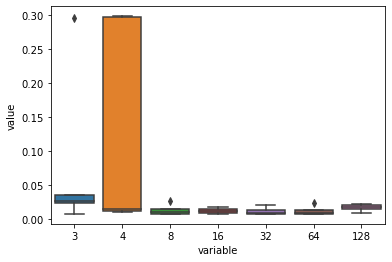

In [103]:
#neuron_number
dic = {}
for i in [3,4,8,16,32,64,128]:
    dic[i] = exp(3,5,i,100,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)


<AxesSubplot:xlabel='variable', ylabel='value'>

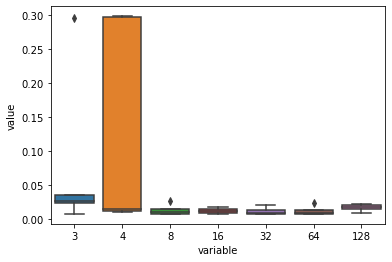

In [104]:
sns.boxplot(x='variable', y='value', data=df_melted) #16 / 32

In [109]:
#epoch_number
dic = {}
for i in [50,100,250,500,1000]:
    dic[i] = exp(3,5,32,i,2)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_407 (Dense)           (None, 32)                128       
                                                                 
 dense_408 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
74/74 - 0s - loss: 1.1881 - 296ms/epoch - 4ms/step
Epoch 2/50
74/74 - 0s - loss: 0.0116 - 81ms/epoch - 1ms/step
Epoch 3/50
74/74 - 0s - loss: 0.0012 - 84ms/epoch - 1ms/step
Epoch 4/50
74/74 - 0s - loss: 0.0011 - 85ms/epoch - 1ms/step
Epoch 5/50
74/74 - 0s - loss: 0.0012 - 84ms/epoch - 1ms/step
Epoch 6/50
74/74 - 0s - loss: 0.0011 - 83ms/epoch - 1ms/step
Epoch 7/50
74/74 - 0s - loss: 0.0011 - 85ms/epoch - 1ms/step
Epoch 8/50
74/74 - 0s 

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_411 (Dense)           (None, 32)                128       
                                                                 
 dense_412 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
74/74 - 0s - loss: 1.9534 - 305ms/epoch - 4ms/step
Epoch 2/50
74/74 - 0s - loss: 0.1327 - 75ms/epoch - 1ms/step
Epoch 3/50
74/74 - 0s - loss: 0.0020 - 74ms/epoch - 993us/step
Epoch 4/50
74/74 - 0s - loss: 0.0016 - 75ms/epoch - 1ms/step
Epoch 5/50
74/74 - 0s - loss: 0.0015 - 74ms/epoch - 997us/step
Epoch 6/50
74/74 - 0s - loss: 0.0015 - 75ms/epoch - 1ms/step
Epoch 7/50
74/74 - 0s - loss: 0.0016 - 73ms/epoch - 987us/step
Epoch 8/50
74/74 - 0s - loss: 0.0015 - 7

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_415 (Dense)           (None, 32)                128       
                                                                 
 dense_416 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
74/74 - 0s - loss: 0.4955 - 293ms/epoch - 4ms/step
Epoch 2/50
74/74 - 0s - loss: 0.0014 - 72ms/epoch - 977us/step
Epoch 3/50
74/74 - 0s - loss: 7.2471e-04 - 74ms/epoch - 1ms/step
Epoch 4/50
74/74 - 0s - loss: 7.1018e-04 - 73ms/epoch - 984us/step
Epoch 5/50
74/74 - 0s - loss: 7.2095e-04 - 84ms/epoch - 1ms/step
Epoch 6/50
74/74 - 0s - loss: 6.9760e-04 - 75ms/epoch - 1ms/step
Epoch 7/50
74/74 - 0s - loss: 6.8875e-04 - 73ms/epoch - 989us/step
Epoch 8/50
74/74 - 0

Epoch 50/100
74/74 - 0s - loss: 2.8619e-04 - 75ms/epoch - 1ms/step
Epoch 51/100
74/74 - 0s - loss: 2.8303e-04 - 71ms/epoch - 960us/step
Epoch 52/100
74/74 - 0s - loss: 3.1086e-04 - 75ms/epoch - 1ms/step
Epoch 53/100
74/74 - 0s - loss: 4.2670e-04 - 75ms/epoch - 1ms/step
Epoch 54/100
74/74 - 0s - loss: 2.5889e-04 - 75ms/epoch - 1ms/step
Epoch 55/100
74/74 - 0s - loss: 4.0529e-04 - 75ms/epoch - 1ms/step
Epoch 56/100
74/74 - 0s - loss: 3.1086e-04 - 74ms/epoch - 1ms/step
Epoch 57/100
74/74 - 0s - loss: 3.4514e-04 - 73ms/epoch - 992us/step
Epoch 58/100
74/74 - 0s - loss: 3.7239e-04 - 75ms/epoch - 1ms/step
Epoch 59/100
74/74 - 0s - loss: 2.8603e-04 - 74ms/epoch - 1ms/step
Epoch 60/100
74/74 - 0s - loss: 2.4658e-04 - 75ms/epoch - 1ms/step
Epoch 61/100
74/74 - 0s - loss: 2.7197e-04 - 74ms/epoch - 1ms/step
Epoch 62/100
74/74 - 0s - loss: 3.6052e-04 - 74ms/epoch - 1ms/step
Epoch 63/100
74/74 - 0s - loss: 3.1328e-04 - 76ms/epoch - 1ms/step
Epoch 64/100
74/74 - 0s - loss: 3.4199e-04 - 72ms/epoch - 

Epoch 59/100
74/74 - 0s - loss: 1.9687e-04 - 79ms/epoch - 1ms/step
Epoch 60/100
74/74 - 0s - loss: 2.1557e-04 - 82ms/epoch - 1ms/step
Epoch 61/100
74/74 - 0s - loss: 2.2132e-04 - 83ms/epoch - 1ms/step
Epoch 62/100
74/74 - 0s - loss: 2.0398e-04 - 82ms/epoch - 1ms/step
Epoch 63/100
74/74 - 0s - loss: 2.1623e-04 - 86ms/epoch - 1ms/step
Epoch 64/100
74/74 - 0s - loss: 2.2440e-04 - 83ms/epoch - 1ms/step
Epoch 65/100
74/74 - 0s - loss: 2.4121e-04 - 88ms/epoch - 1ms/step
Epoch 66/100
74/74 - 0s - loss: 2.8065e-04 - 85ms/epoch - 1ms/step
Epoch 67/100
74/74 - 0s - loss: 2.3300e-04 - 85ms/epoch - 1ms/step
Epoch 68/100
74/74 - 0s - loss: 2.7214e-04 - 81ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 2.1885e-04 - 85ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 2.7935e-04 - 86ms/epoch - 1ms/step
Epoch 71/100
74/74 - 0s - loss: 1.9616e-04 - 91ms/epoch - 1ms/step
Epoch 72/100
74/74 - 0s - loss: 2.1466e-04 - 85ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 2.3250e-04 - 85ms/epoch - 1ms/

74/74 - 0s - loss: 4.0228e-04 - 74ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 2.6732e-04 - 70ms/epoch - 943us/step
Epoch 71/100
74/74 - 0s - loss: 2.8540e-04 - 70ms/epoch - 949us/step
Epoch 72/100
74/74 - 0s - loss: 2.7675e-04 - 70ms/epoch - 948us/step
Epoch 73/100
74/74 - 0s - loss: 2.7956e-04 - 81ms/epoch - 1ms/step
Epoch 74/100
74/74 - 0s - loss: 2.8108e-04 - 77ms/epoch - 1ms/step
Epoch 75/100
74/74 - 0s - loss: 3.1793e-04 - 77ms/epoch - 1ms/step
Epoch 76/100
74/74 - 0s - loss: 2.7466e-04 - 80ms/epoch - 1ms/step
Epoch 77/100
74/74 - 0s - loss: 3.0821e-04 - 80ms/epoch - 1ms/step
Epoch 78/100
74/74 - 0s - loss: 2.6535e-04 - 80ms/epoch - 1ms/step
Epoch 79/100
74/74 - 0s - loss: 2.7386e-04 - 81ms/epoch - 1ms/step
Epoch 80/100
74/74 - 0s - loss: 2.3746e-04 - 79ms/epoch - 1ms/step
Epoch 81/100
74/74 - 0s - loss: 2.8818e-04 - 78ms/epoch - 1ms/step
Epoch 82/100
74/74 - 0s - loss: 2.5014e-04 - 82ms/epoch - 1ms/step
Epoch 83/100
74/74 - 0s - loss: 2.8873e-04 - 74ms/epoch - 1ms/step
Ep

Epoch 78/100
74/74 - 0s - loss: 3.3340e-04 - 84ms/epoch - 1ms/step
Epoch 79/100
74/74 - 0s - loss: 3.2272e-04 - 79ms/epoch - 1ms/step
Epoch 80/100
74/74 - 0s - loss: 4.3240e-04 - 80ms/epoch - 1ms/step
Epoch 81/100
74/74 - 0s - loss: 3.4409e-04 - 82ms/epoch - 1ms/step
Epoch 82/100
74/74 - 0s - loss: 3.0726e-04 - 82ms/epoch - 1ms/step
Epoch 83/100
74/74 - 0s - loss: 2.8690e-04 - 79ms/epoch - 1ms/step
Epoch 84/100
74/74 - 0s - loss: 4.5842e-04 - 79ms/epoch - 1ms/step
Epoch 85/100
74/74 - 0s - loss: 2.8695e-04 - 84ms/epoch - 1ms/step
Epoch 86/100
74/74 - 0s - loss: 3.7933e-04 - 84ms/epoch - 1ms/step
Epoch 87/100
74/74 - 0s - loss: 2.8915e-04 - 84ms/epoch - 1ms/step
Epoch 88/100
74/74 - 0s - loss: 3.2157e-04 - 89ms/epoch - 1ms/step
Epoch 89/100
74/74 - 0s - loss: 3.2052e-04 - 92ms/epoch - 1ms/step
Epoch 90/100
74/74 - 0s - loss: 3.1275e-04 - 85ms/epoch - 1ms/step
Epoch 91/100
74/74 - 0s - loss: 3.5891e-04 - 91ms/epoch - 1ms/step
Epoch 92/100
74/74 - 0s - loss: 3.7995e-04 - 88ms/epoch - 1ms/

Epoch 87/100
74/74 - 0s - loss: 2.6267e-04 - 83ms/epoch - 1ms/step
Epoch 88/100
74/74 - 0s - loss: 2.6016e-04 - 75ms/epoch - 1ms/step
Epoch 89/100
74/74 - 0s - loss: 3.6738e-04 - 81ms/epoch - 1ms/step
Epoch 90/100
74/74 - 0s - loss: 2.3419e-04 - 78ms/epoch - 1ms/step
Epoch 91/100
74/74 - 0s - loss: 3.2369e-04 - 77ms/epoch - 1ms/step
Epoch 92/100
74/74 - 0s - loss: 2.2370e-04 - 89ms/epoch - 1ms/step
Epoch 93/100
74/74 - 0s - loss: 2.0479e-04 - 87ms/epoch - 1ms/step
Epoch 94/100
74/74 - 0s - loss: 2.5375e-04 - 79ms/epoch - 1ms/step
Epoch 95/100
74/74 - 0s - loss: 2.5475e-04 - 72ms/epoch - 967us/step
Epoch 96/100
74/74 - 0s - loss: 2.6519e-04 - 74ms/epoch - 1ms/step
Epoch 97/100
74/74 - 0s - loss: 2.8430e-04 - 76ms/epoch - 1ms/step
Epoch 98/100
74/74 - 0s - loss: 2.0975e-04 - 75ms/epoch - 1ms/step
Epoch 99/100
74/74 - 0s - loss: 2.6399e-04 - 87ms/epoch - 1ms/step
Epoch 100/100
74/74 - 0s - loss: 2.2869e-04 - 89ms/epoch - 1ms/step
5/5 [==============================] - 0s 2ms/step - loss: 

Epoch 96/250
74/74 - 0s - loss: 2.3917e-04 - 80ms/epoch - 1ms/step
Epoch 97/250
74/74 - 0s - loss: 2.4359e-04 - 80ms/epoch - 1ms/step
Epoch 98/250
74/74 - 0s - loss: 3.4788e-04 - 76ms/epoch - 1ms/step
Epoch 99/250
74/74 - 0s - loss: 3.5656e-04 - 78ms/epoch - 1ms/step
Epoch 100/250
74/74 - 0s - loss: 2.9083e-04 - 72ms/epoch - 977us/step
Epoch 101/250
74/74 - 0s - loss: 3.1085e-04 - 76ms/epoch - 1ms/step
Epoch 102/250
74/74 - 0s - loss: 2.6638e-04 - 74ms/epoch - 1ms/step
Epoch 103/250
74/74 - 0s - loss: 2.4704e-04 - 85ms/epoch - 1ms/step
Epoch 104/250
74/74 - 0s - loss: 2.3977e-04 - 79ms/epoch - 1ms/step
Epoch 105/250
74/74 - 0s - loss: 2.6126e-04 - 71ms/epoch - 961us/step
Epoch 106/250
74/74 - 0s - loss: 2.5429e-04 - 77ms/epoch - 1ms/step
Epoch 107/250
74/74 - 0s - loss: 2.7288e-04 - 74ms/epoch - 1ms/step
Epoch 108/250
74/74 - 0s - loss: 3.4065e-04 - 75ms/epoch - 1ms/step
Epoch 109/250
74/74 - 0s - loss: 2.7378e-04 - 71ms/epoch - 955us/step
Epoch 110/250
74/74 - 0s - loss: 2.4090e-04 - 

74/74 - 0s - loss: 2.1046e-04 - 79ms/epoch - 1ms/step
Epoch 217/250
74/74 - 0s - loss: 3.7296e-04 - 72ms/epoch - 973us/step
Epoch 218/250
74/74 - 0s - loss: 3.0222e-04 - 81ms/epoch - 1ms/step
Epoch 219/250
74/74 - 0s - loss: 3.3054e-04 - 88ms/epoch - 1ms/step
Epoch 220/250
74/74 - 0s - loss: 2.5198e-04 - 82ms/epoch - 1ms/step
Epoch 221/250
74/74 - 0s - loss: 2.7816e-04 - 76ms/epoch - 1ms/step
Epoch 222/250
74/74 - 0s - loss: 2.4481e-04 - 84ms/epoch - 1ms/step
Epoch 223/250
74/74 - 0s - loss: 2.4051e-04 - 84ms/epoch - 1ms/step
Epoch 224/250
74/74 - 0s - loss: 2.3357e-04 - 92ms/epoch - 1ms/step
Epoch 225/250
74/74 - 0s - loss: 3.6251e-04 - 75ms/epoch - 1ms/step
Epoch 226/250
74/74 - 0s - loss: 2.6405e-04 - 83ms/epoch - 1ms/step
Epoch 227/250
74/74 - 0s - loss: 2.4141e-04 - 81ms/epoch - 1ms/step
Epoch 228/250
74/74 - 0s - loss: 2.4634e-04 - 78ms/epoch - 1ms/step
Epoch 229/250
74/74 - 0s - loss: 2.5169e-04 - 84ms/epoch - 1ms/step
Epoch 230/250
74/74 - 0s - loss: 3.3746e-04 - 74ms/epoch - 1

74/74 - 0s - loss: 2.2873e-04 - 76ms/epoch - 1ms/step
Epoch 75/250
74/74 - 0s - loss: 2.2447e-04 - 73ms/epoch - 992us/step
Epoch 76/250
74/74 - 0s - loss: 2.7244e-04 - 74ms/epoch - 995us/step
Epoch 77/250
74/74 - 0s - loss: 3.2227e-04 - 78ms/epoch - 1ms/step
Epoch 78/250
74/74 - 0s - loss: 2.6522e-04 - 76ms/epoch - 1ms/step
Epoch 79/250
74/74 - 0s - loss: 2.4709e-04 - 76ms/epoch - 1ms/step
Epoch 80/250
74/74 - 0s - loss: 3.4094e-04 - 76ms/epoch - 1ms/step
Epoch 81/250
74/74 - 0s - loss: 2.2708e-04 - 75ms/epoch - 1ms/step
Epoch 82/250
74/74 - 0s - loss: 2.7919e-04 - 75ms/epoch - 1ms/step
Epoch 83/250
74/74 - 0s - loss: 2.3646e-04 - 76ms/epoch - 1ms/step
Epoch 84/250
74/74 - 0s - loss: 3.0843e-04 - 76ms/epoch - 1ms/step
Epoch 85/250
74/74 - 0s - loss: 2.3047e-04 - 77ms/epoch - 1ms/step
Epoch 86/250
74/74 - 0s - loss: 2.3526e-04 - 74ms/epoch - 997us/step
Epoch 87/250
74/74 - 0s - loss: 3.1693e-04 - 75ms/epoch - 1ms/step
Epoch 88/250
74/74 - 0s - loss: 3.5728e-04 - 76ms/epoch - 1ms/step
Ep

Epoch 195/250
74/74 - 0s - loss: 2.4473e-04 - 76ms/epoch - 1ms/step
Epoch 196/250
74/74 - 0s - loss: 2.7644e-04 - 76ms/epoch - 1ms/step
Epoch 197/250
74/74 - 0s - loss: 2.4744e-04 - 76ms/epoch - 1ms/step
Epoch 198/250
74/74 - 0s - loss: 2.3376e-04 - 70ms/epoch - 944us/step
Epoch 199/250
74/74 - 0s - loss: 2.2927e-04 - 75ms/epoch - 1ms/step
Epoch 200/250
74/74 - 0s - loss: 2.3210e-04 - 75ms/epoch - 1ms/step
Epoch 201/250
74/74 - 0s - loss: 2.2191e-04 - 74ms/epoch - 995us/step
Epoch 202/250
74/74 - 0s - loss: 2.5380e-04 - 75ms/epoch - 1ms/step
Epoch 203/250
74/74 - 0s - loss: 3.1007e-04 - 77ms/epoch - 1ms/step
Epoch 204/250
74/74 - 0s - loss: 2.7557e-04 - 72ms/epoch - 970us/step
Epoch 205/250
74/74 - 0s - loss: 2.6593e-04 - 73ms/epoch - 992us/step
Epoch 206/250
74/74 - 0s - loss: 3.1140e-04 - 75ms/epoch - 1ms/step
Epoch 207/250
74/74 - 0s - loss: 2.4812e-04 - 76ms/epoch - 1ms/step
Epoch 208/250
74/74 - 0s - loss: 2.6292e-04 - 75ms/epoch - 1ms/step
Epoch 209/250
74/74 - 0s - loss: 2.7076e

74/74 - 0s - loss: 2.5816e-04 - 89ms/epoch - 1ms/step
Epoch 54/250
74/74 - 0s - loss: 2.6285e-04 - 73ms/epoch - 986us/step
Epoch 55/250
74/74 - 0s - loss: 2.5341e-04 - 75ms/epoch - 1ms/step
Epoch 56/250
74/74 - 0s - loss: 2.5865e-04 - 72ms/epoch - 978us/step
Epoch 57/250
74/74 - 0s - loss: 2.5742e-04 - 72ms/epoch - 977us/step
Epoch 58/250
74/74 - 0s - loss: 2.6213e-04 - 72ms/epoch - 979us/step
Epoch 59/250
74/74 - 0s - loss: 2.3448e-04 - 72ms/epoch - 977us/step
Epoch 60/250
74/74 - 0s - loss: 2.4932e-04 - 73ms/epoch - 981us/step
Epoch 61/250
74/74 - 0s - loss: 2.5225e-04 - 72ms/epoch - 976us/step
Epoch 62/250
74/74 - 0s - loss: 2.4620e-04 - 76ms/epoch - 1ms/step
Epoch 63/250
74/74 - 0s - loss: 2.5531e-04 - 77ms/epoch - 1ms/step
Epoch 64/250
74/74 - 0s - loss: 2.2761e-04 - 76ms/epoch - 1ms/step
Epoch 65/250
74/74 - 0s - loss: 2.3137e-04 - 76ms/epoch - 1ms/step
Epoch 66/250
74/74 - 0s - loss: 2.9493e-04 - 76ms/epoch - 1ms/step
Epoch 67/250
74/74 - 0s - loss: 2.7546e-04 - 76ms/epoch - 1ms

Epoch 174/250
74/74 - 0s - loss: 2.7505e-04 - 77ms/epoch - 1ms/step
Epoch 175/250
74/74 - 0s - loss: 2.8702e-04 - 78ms/epoch - 1ms/step
Epoch 176/250
74/74 - 0s - loss: 3.5846e-04 - 76ms/epoch - 1ms/step
Epoch 177/250
74/74 - 0s - loss: 3.0389e-04 - 77ms/epoch - 1ms/step
Epoch 178/250
74/74 - 0s - loss: 2.5744e-04 - 75ms/epoch - 1ms/step
Epoch 179/250
74/74 - 0s - loss: 2.3160e-04 - 76ms/epoch - 1ms/step
Epoch 180/250
74/74 - 0s - loss: 2.7734e-04 - 77ms/epoch - 1ms/step
Epoch 181/250
74/74 - 0s - loss: 2.4620e-04 - 75ms/epoch - 1ms/step
Epoch 182/250
74/74 - 0s - loss: 2.2131e-04 - 74ms/epoch - 1ms/step
Epoch 183/250
74/74 - 0s - loss: 2.4822e-04 - 71ms/epoch - 961us/step
Epoch 184/250
74/74 - 0s - loss: 2.3991e-04 - 75ms/epoch - 1ms/step
Epoch 185/250
74/74 - 0s - loss: 2.9615e-04 - 77ms/epoch - 1ms/step
Epoch 186/250
74/74 - 0s - loss: 2.6316e-04 - 76ms/epoch - 1ms/step
Epoch 187/250
74/74 - 0s - loss: 2.2787e-04 - 75ms/epoch - 1ms/step
Epoch 188/250
74/74 - 0s - loss: 2.3368e-04 - 

Epoch 32/250
74/74 - 0s - loss: 5.3821e-04 - 81ms/epoch - 1ms/step
Epoch 33/250
74/74 - 0s - loss: 5.2744e-04 - 81ms/epoch - 1ms/step
Epoch 34/250
74/74 - 0s - loss: 4.5797e-04 - 81ms/epoch - 1ms/step
Epoch 35/250
74/74 - 0s - loss: 5.9609e-04 - 81ms/epoch - 1ms/step
Epoch 36/250
74/74 - 0s - loss: 4.8414e-04 - 82ms/epoch - 1ms/step
Epoch 37/250
74/74 - 0s - loss: 4.6035e-04 - 81ms/epoch - 1ms/step
Epoch 38/250
74/74 - 0s - loss: 4.4208e-04 - 79ms/epoch - 1ms/step
Epoch 39/250
74/74 - 0s - loss: 4.1563e-04 - 81ms/epoch - 1ms/step
Epoch 40/250
74/74 - 0s - loss: 4.2180e-04 - 80ms/epoch - 1ms/step
Epoch 41/250
74/74 - 0s - loss: 4.1790e-04 - 76ms/epoch - 1ms/step
Epoch 42/250
74/74 - 0s - loss: 4.0160e-04 - 77ms/epoch - 1ms/step
Epoch 43/250
74/74 - 0s - loss: 3.9587e-04 - 75ms/epoch - 1ms/step
Epoch 44/250
74/74 - 0s - loss: 4.2588e-04 - 76ms/epoch - 1ms/step
Epoch 45/250
74/74 - 0s - loss: 3.9386e-04 - 77ms/epoch - 1ms/step
Epoch 46/250
74/74 - 0s - loss: 3.9348e-04 - 74ms/epoch - 1ms/

74/74 - 0s - loss: 3.3716e-04 - 86ms/epoch - 1ms/step
Epoch 154/250
74/74 - 0s - loss: 5.6501e-04 - 83ms/epoch - 1ms/step
Epoch 155/250
74/74 - 0s - loss: 3.4121e-04 - 83ms/epoch - 1ms/step
Epoch 156/250
74/74 - 0s - loss: 3.1925e-04 - 84ms/epoch - 1ms/step
Epoch 157/250
74/74 - 0s - loss: 3.5525e-04 - 79ms/epoch - 1ms/step
Epoch 158/250
74/74 - 0s - loss: 4.7094e-04 - 79ms/epoch - 1ms/step
Epoch 159/250
74/74 - 0s - loss: 3.4112e-04 - 78ms/epoch - 1ms/step
Epoch 160/250
74/74 - 0s - loss: 3.9706e-04 - 79ms/epoch - 1ms/step
Epoch 161/250
74/74 - 0s - loss: 3.3732e-04 - 84ms/epoch - 1ms/step
Epoch 162/250
74/74 - 0s - loss: 3.3771e-04 - 77ms/epoch - 1ms/step
Epoch 163/250
74/74 - 0s - loss: 3.3881e-04 - 84ms/epoch - 1ms/step
Epoch 164/250
74/74 - 0s - loss: 3.1167e-04 - 80ms/epoch - 1ms/step
Epoch 165/250
74/74 - 0s - loss: 3.2633e-04 - 84ms/epoch - 1ms/step
Epoch 166/250
74/74 - 0s - loss: 4.7585e-04 - 79ms/epoch - 1ms/step
Epoch 167/250
74/74 - 0s - loss: 4.4249e-04 - 84ms/epoch - 1ms

Epoch 10/250
74/74 - 0s - loss: 4.7144e-04 - 76ms/epoch - 1ms/step
Epoch 11/250
74/74 - 0s - loss: 4.4304e-04 - 74ms/epoch - 1ms/step
Epoch 12/250
74/74 - 0s - loss: 4.1752e-04 - 75ms/epoch - 1ms/step
Epoch 13/250
74/74 - 0s - loss: 3.7500e-04 - 76ms/epoch - 1ms/step
Epoch 14/250
74/74 - 0s - loss: 3.9726e-04 - 76ms/epoch - 1ms/step
Epoch 15/250
74/74 - 0s - loss: 4.7221e-04 - 72ms/epoch - 973us/step
Epoch 16/250
74/74 - 0s - loss: 3.5114e-04 - 76ms/epoch - 1ms/step
Epoch 17/250
74/74 - 0s - loss: 3.7911e-04 - 74ms/epoch - 995us/step
Epoch 18/250
74/74 - 0s - loss: 3.4663e-04 - 74ms/epoch - 999us/step
Epoch 19/250
74/74 - 0s - loss: 3.8788e-04 - 78ms/epoch - 1ms/step
Epoch 20/250
74/74 - 0s - loss: 4.2019e-04 - 76ms/epoch - 1ms/step
Epoch 21/250
74/74 - 0s - loss: 3.4148e-04 - 75ms/epoch - 1ms/step
Epoch 22/250
74/74 - 0s - loss: 3.8689e-04 - 76ms/epoch - 1ms/step
Epoch 23/250
74/74 - 0s - loss: 3.4439e-04 - 77ms/epoch - 1ms/step
Epoch 24/250
74/74 - 0s - loss: 4.1479e-04 - 74ms/epoch 

Epoch 132/250
74/74 - 0s - loss: 3.5210e-04 - 73ms/epoch - 991us/step
Epoch 133/250
74/74 - 0s - loss: 3.4070e-04 - 78ms/epoch - 1ms/step
Epoch 134/250
74/74 - 0s - loss: 2.8452e-04 - 74ms/epoch - 1ms/step
Epoch 135/250
74/74 - 0s - loss: 2.6494e-04 - 76ms/epoch - 1ms/step
Epoch 136/250
74/74 - 0s - loss: 2.9825e-04 - 76ms/epoch - 1ms/step
Epoch 137/250
74/74 - 0s - loss: 4.0757e-04 - 77ms/epoch - 1ms/step
Epoch 138/250
74/74 - 0s - loss: 3.2796e-04 - 76ms/epoch - 1ms/step
Epoch 139/250
74/74 - 0s - loss: 2.6139e-04 - 76ms/epoch - 1ms/step
Epoch 140/250
74/74 - 0s - loss: 2.6937e-04 - 75ms/epoch - 1ms/step
Epoch 141/250
74/74 - 0s - loss: 2.7620e-04 - 76ms/epoch - 1ms/step
Epoch 142/250
74/74 - 0s - loss: 3.0960e-04 - 76ms/epoch - 1ms/step
Epoch 143/250
74/74 - 0s - loss: 2.3434e-04 - 77ms/epoch - 1ms/step
Epoch 144/250
74/74 - 0s - loss: 3.0108e-04 - 76ms/epoch - 1ms/step
Epoch 145/250
74/74 - 0s - loss: 2.6843e-04 - 77ms/epoch - 1ms/step
Epoch 146/250
74/74 - 0s - loss: 3.1356e-04 - 

1/1 [==============================] - 0s 20ms/step - loss: 6.2549e-05
Test Score: 0.0001 MSE (0.00791 RMSE)
Model: "sequential_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_437 (Dense)           (None, 32)                128       
                                                                 
 dense_438 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
74/74 - 0s - loss: 0.7083 - 293ms/epoch - 4ms/step
Epoch 2/500
74/74 - 0s - loss: 0.0033 - 78ms/epoch - 1ms/step
Epoch 3/500
74/74 - 0s - loss: 8.0943e-04 - 79ms/epoch - 1ms/step
Epoch 4/500
74/74 - 0s - loss: 8.0180e-04 - 79ms/epoch - 1ms/step
Epoch 5/500
74/74 - 0s - loss: 7.9652e-04 - 78ms/epoch - 1ms/step
Epoch 6/500
74/74 

Epoch 112/500
74/74 - 0s - loss: 3.2895e-04 - 80ms/epoch - 1ms/step
Epoch 113/500
74/74 - 0s - loss: 2.3335e-04 - 77ms/epoch - 1ms/step
Epoch 114/500
74/74 - 0s - loss: 1.9855e-04 - 80ms/epoch - 1ms/step
Epoch 115/500
74/74 - 0s - loss: 2.7834e-04 - 88ms/epoch - 1ms/step
Epoch 116/500
74/74 - 0s - loss: 2.0998e-04 - 85ms/epoch - 1ms/step
Epoch 117/500
74/74 - 0s - loss: 2.2619e-04 - 83ms/epoch - 1ms/step
Epoch 118/500
74/74 - 0s - loss: 1.9926e-04 - 90ms/epoch - 1ms/step
Epoch 119/500
74/74 - 0s - loss: 2.1985e-04 - 86ms/epoch - 1ms/step
Epoch 120/500
74/74 - 0s - loss: 2.3655e-04 - 87ms/epoch - 1ms/step
Epoch 121/500
74/74 - 0s - loss: 2.2641e-04 - 77ms/epoch - 1ms/step
Epoch 122/500
74/74 - 0s - loss: 2.1511e-04 - 79ms/epoch - 1ms/step
Epoch 123/500
74/74 - 0s - loss: 3.1330e-04 - 82ms/epoch - 1ms/step
Epoch 124/500
74/74 - 0s - loss: 2.1008e-04 - 83ms/epoch - 1ms/step
Epoch 125/500
74/74 - 0s - loss: 2.2657e-04 - 91ms/epoch - 1ms/step
Epoch 126/500
74/74 - 0s - loss: 2.6325e-04 - 84

Epoch 233/500
74/74 - 0s - loss: 2.2830e-04 - 80ms/epoch - 1ms/step
Epoch 234/500
74/74 - 0s - loss: 2.2921e-04 - 72ms/epoch - 971us/step
Epoch 235/500
74/74 - 0s - loss: 2.8623e-04 - 76ms/epoch - 1ms/step
Epoch 236/500
74/74 - 0s - loss: 2.4034e-04 - 72ms/epoch - 970us/step
Epoch 237/500
74/74 - 0s - loss: 2.0381e-04 - 79ms/epoch - 1ms/step
Epoch 238/500
74/74 - 0s - loss: 1.9761e-04 - 76ms/epoch - 1ms/step
Epoch 239/500
74/74 - 0s - loss: 2.2556e-04 - 75ms/epoch - 1ms/step
Epoch 240/500
74/74 - 0s - loss: 2.3828e-04 - 77ms/epoch - 1ms/step
Epoch 241/500
74/74 - 0s - loss: 2.3344e-04 - 85ms/epoch - 1ms/step
Epoch 242/500
74/74 - 0s - loss: 2.3171e-04 - 75ms/epoch - 1ms/step
Epoch 243/500
74/74 - 0s - loss: 2.5162e-04 - 77ms/epoch - 1ms/step
Epoch 244/500
74/74 - 0s - loss: 2.5514e-04 - 85ms/epoch - 1ms/step
Epoch 245/500
74/74 - 0s - loss: 1.8434e-04 - 88ms/epoch - 1ms/step
Epoch 246/500
74/74 - 0s - loss: 2.5596e-04 - 77ms/epoch - 1ms/step
Epoch 247/500
74/74 - 0s - loss: 2.3245e-04 

Epoch 354/500
74/74 - 0s - loss: 2.1533e-04 - 76ms/epoch - 1ms/step
Epoch 355/500
74/74 - 0s - loss: 2.9954e-04 - 79ms/epoch - 1ms/step
Epoch 356/500
74/74 - 0s - loss: 2.4165e-04 - 76ms/epoch - 1ms/step
Epoch 357/500
74/74 - 0s - loss: 2.3852e-04 - 78ms/epoch - 1ms/step
Epoch 358/500
74/74 - 0s - loss: 2.3600e-04 - 75ms/epoch - 1ms/step
Epoch 359/500
74/74 - 0s - loss: 2.3244e-04 - 75ms/epoch - 1ms/step
Epoch 360/500
74/74 - 0s - loss: 2.3137e-04 - 76ms/epoch - 1ms/step
Epoch 361/500
74/74 - 0s - loss: 2.2575e-04 - 78ms/epoch - 1ms/step
Epoch 362/500
74/74 - 0s - loss: 2.0252e-04 - 77ms/epoch - 1ms/step
Epoch 363/500
74/74 - 0s - loss: 2.1934e-04 - 77ms/epoch - 1ms/step
Epoch 364/500
74/74 - 0s - loss: 2.7295e-04 - 77ms/epoch - 1ms/step
Epoch 365/500
74/74 - 0s - loss: 2.1361e-04 - 79ms/epoch - 1ms/step
Epoch 366/500
74/74 - 0s - loss: 2.4976e-04 - 82ms/epoch - 1ms/step
Epoch 367/500
74/74 - 0s - loss: 2.3952e-04 - 76ms/epoch - 1ms/step
Epoch 368/500
74/74 - 0s - loss: 1.9334e-04 - 76

Epoch 475/500
74/74 - 0s - loss: 2.2725e-04 - 85ms/epoch - 1ms/step
Epoch 476/500
74/74 - 0s - loss: 2.4170e-04 - 87ms/epoch - 1ms/step
Epoch 477/500
74/74 - 0s - loss: 1.7314e-04 - 90ms/epoch - 1ms/step
Epoch 478/500
74/74 - 0s - loss: 2.3761e-04 - 93ms/epoch - 1ms/step
Epoch 479/500
74/74 - 0s - loss: 2.1698e-04 - 95ms/epoch - 1ms/step
Epoch 480/500
74/74 - 0s - loss: 2.1787e-04 - 83ms/epoch - 1ms/step
Epoch 481/500
74/74 - 0s - loss: 2.5500e-04 - 89ms/epoch - 1ms/step
Epoch 482/500
74/74 - 0s - loss: 2.1320e-04 - 88ms/epoch - 1ms/step
Epoch 483/500
74/74 - 0s - loss: 2.1530e-04 - 84ms/epoch - 1ms/step
Epoch 484/500
74/74 - 0s - loss: 2.3588e-04 - 86ms/epoch - 1ms/step
Epoch 485/500
74/74 - 0s - loss: 2.2429e-04 - 83ms/epoch - 1ms/step
Epoch 486/500
74/74 - 0s - loss: 2.6432e-04 - 86ms/epoch - 1ms/step
Epoch 487/500
74/74 - 0s - loss: 2.5875e-04 - 86ms/epoch - 1ms/step
Epoch 488/500
74/74 - 0s - loss: 2.0983e-04 - 81ms/epoch - 1ms/step
Epoch 489/500
74/74 - 0s - loss: 2.5451e-04 - 88

74/74 - 0s - loss: 3.2724e-04 - 80ms/epoch - 1ms/step
Epoch 85/500
74/74 - 0s - loss: 2.8755e-04 - 77ms/epoch - 1ms/step
Epoch 86/500
74/74 - 0s - loss: 2.8699e-04 - 77ms/epoch - 1ms/step
Epoch 87/500
74/74 - 0s - loss: 2.3304e-04 - 71ms/epoch - 964us/step
Epoch 88/500
74/74 - 0s - loss: 4.4091e-04 - 78ms/epoch - 1ms/step
Epoch 89/500
74/74 - 0s - loss: 2.4163e-04 - 77ms/epoch - 1ms/step
Epoch 90/500
74/74 - 0s - loss: 2.9076e-04 - 74ms/epoch - 1ms/step
Epoch 91/500
74/74 - 0s - loss: 2.7469e-04 - 78ms/epoch - 1ms/step
Epoch 92/500
74/74 - 0s - loss: 2.8554e-04 - 75ms/epoch - 1ms/step
Epoch 93/500
74/74 - 0s - loss: 3.0416e-04 - 75ms/epoch - 1ms/step
Epoch 94/500
74/74 - 0s - loss: 2.7119e-04 - 75ms/epoch - 1ms/step
Epoch 95/500
74/74 - 0s - loss: 3.7151e-04 - 75ms/epoch - 1ms/step
Epoch 96/500
74/74 - 0s - loss: 2.8340e-04 - 77ms/epoch - 1ms/step
Epoch 97/500
74/74 - 0s - loss: 3.1349e-04 - 76ms/epoch - 1ms/step
Epoch 98/500
74/74 - 0s - loss: 2.9150e-04 - 76ms/epoch - 1ms/step
Epoch 

Epoch 205/500
74/74 - 0s - loss: 2.4808e-04 - 80ms/epoch - 1ms/step
Epoch 206/500
74/74 - 0s - loss: 2.7016e-04 - 77ms/epoch - 1ms/step
Epoch 207/500
74/74 - 0s - loss: 3.5232e-04 - 81ms/epoch - 1ms/step
Epoch 208/500
74/74 - 0s - loss: 3.3871e-04 - 80ms/epoch - 1ms/step
Epoch 209/500
74/74 - 0s - loss: 3.4739e-04 - 79ms/epoch - 1ms/step
Epoch 210/500
74/74 - 0s - loss: 2.9540e-04 - 80ms/epoch - 1ms/step
Epoch 211/500
74/74 - 0s - loss: 3.6054e-04 - 79ms/epoch - 1ms/step
Epoch 212/500
74/74 - 0s - loss: 2.8477e-04 - 80ms/epoch - 1ms/step
Epoch 213/500
74/74 - 0s - loss: 3.9486e-04 - 80ms/epoch - 1ms/step
Epoch 214/500
74/74 - 0s - loss: 2.8315e-04 - 79ms/epoch - 1ms/step
Epoch 215/500
74/74 - 0s - loss: 2.6239e-04 - 81ms/epoch - 1ms/step
Epoch 216/500
74/74 - 0s - loss: 2.7359e-04 - 81ms/epoch - 1ms/step
Epoch 217/500
74/74 - 0s - loss: 2.4797e-04 - 79ms/epoch - 1ms/step
Epoch 218/500
74/74 - 0s - loss: 2.6308e-04 - 81ms/epoch - 1ms/step
Epoch 219/500
74/74 - 0s - loss: 2.7124e-04 - 79

74/74 - 0s - loss: 2.2564e-04 - 77ms/epoch - 1ms/step
Epoch 326/500
74/74 - 0s - loss: 2.8975e-04 - 76ms/epoch - 1ms/step
Epoch 327/500
74/74 - 0s - loss: 2.5737e-04 - 76ms/epoch - 1ms/step
Epoch 328/500
74/74 - 0s - loss: 2.8232e-04 - 76ms/epoch - 1ms/step
Epoch 329/500
74/74 - 0s - loss: 3.4531e-04 - 76ms/epoch - 1ms/step
Epoch 330/500
74/74 - 0s - loss: 3.3769e-04 - 76ms/epoch - 1ms/step
Epoch 331/500
74/74 - 0s - loss: 2.4993e-04 - 74ms/epoch - 1ms/step
Epoch 332/500
74/74 - 0s - loss: 3.4687e-04 - 76ms/epoch - 1ms/step
Epoch 333/500
74/74 - 0s - loss: 2.4185e-04 - 75ms/epoch - 1ms/step
Epoch 334/500
74/74 - 0s - loss: 2.6869e-04 - 75ms/epoch - 1ms/step
Epoch 335/500
74/74 - 0s - loss: 2.7757e-04 - 76ms/epoch - 1ms/step
Epoch 336/500
74/74 - 0s - loss: 2.6905e-04 - 77ms/epoch - 1ms/step
Epoch 337/500
74/74 - 0s - loss: 2.6143e-04 - 76ms/epoch - 1ms/step
Epoch 338/500
74/74 - 0s - loss: 2.4911e-04 - 76ms/epoch - 1ms/step
Epoch 339/500
74/74 - 0s - loss: 3.5408e-04 - 78ms/epoch - 1ms

Epoch 446/500
74/74 - 0s - loss: 2.3792e-04 - 77ms/epoch - 1ms/step
Epoch 447/500
74/74 - 0s - loss: 3.3779e-04 - 76ms/epoch - 1ms/step
Epoch 448/500
74/74 - 0s - loss: 3.2779e-04 - 75ms/epoch - 1ms/step
Epoch 449/500
74/74 - 0s - loss: 2.2158e-04 - 76ms/epoch - 1ms/step
Epoch 450/500
74/74 - 0s - loss: 2.4670e-04 - 77ms/epoch - 1ms/step
Epoch 451/500
74/74 - 0s - loss: 3.2152e-04 - 75ms/epoch - 1ms/step
Epoch 452/500
74/74 - 0s - loss: 2.4829e-04 - 76ms/epoch - 1ms/step
Epoch 453/500
74/74 - 0s - loss: 2.6226e-04 - 77ms/epoch - 1ms/step
Epoch 454/500
74/74 - 0s - loss: 2.5550e-04 - 75ms/epoch - 1ms/step
Epoch 455/500
74/74 - 0s - loss: 2.6137e-04 - 76ms/epoch - 1ms/step
Epoch 456/500
74/74 - 0s - loss: 2.4102e-04 - 77ms/epoch - 1ms/step
Epoch 457/500
74/74 - 0s - loss: 2.3461e-04 - 76ms/epoch - 1ms/step
Epoch 458/500
74/74 - 0s - loss: 2.1752e-04 - 77ms/epoch - 1ms/step
Epoch 459/500
74/74 - 0s - loss: 2.8536e-04 - 76ms/epoch - 1ms/step
Epoch 460/500
74/74 - 0s - loss: 2.6471e-04 - 77

Epoch 55/500
74/74 - 0s - loss: 2.9519e-04 - 74ms/epoch - 1ms/step
Epoch 56/500
74/74 - 0s - loss: 3.3117e-04 - 75ms/epoch - 1ms/step
Epoch 57/500
74/74 - 0s - loss: 3.7021e-04 - 76ms/epoch - 1ms/step
Epoch 58/500
74/74 - 0s - loss: 3.2984e-04 - 77ms/epoch - 1ms/step
Epoch 59/500
74/74 - 0s - loss: 3.6805e-04 - 75ms/epoch - 1ms/step
Epoch 60/500
74/74 - 0s - loss: 2.7529e-04 - 77ms/epoch - 1ms/step
Epoch 61/500
74/74 - 0s - loss: 3.1007e-04 - 76ms/epoch - 1ms/step
Epoch 62/500
74/74 - 0s - loss: 3.0327e-04 - 78ms/epoch - 1ms/step
Epoch 63/500
74/74 - 0s - loss: 2.9759e-04 - 76ms/epoch - 1ms/step
Epoch 64/500
74/74 - 0s - loss: 2.8043e-04 - 77ms/epoch - 1ms/step
Epoch 65/500
74/74 - 0s - loss: 3.1860e-04 - 76ms/epoch - 1ms/step
Epoch 66/500
74/74 - 0s - loss: 2.9995e-04 - 77ms/epoch - 1ms/step
Epoch 67/500
74/74 - 0s - loss: 2.6837e-04 - 75ms/epoch - 1ms/step
Epoch 68/500
74/74 - 0s - loss: 3.0362e-04 - 77ms/epoch - 1ms/step
Epoch 69/500
74/74 - 0s - loss: 3.1316e-04 - 76ms/epoch - 1ms/

Epoch 176/500
74/74 - 0s - loss: 3.8839e-04 - 97ms/epoch - 1ms/step
Epoch 177/500
74/74 - 0s - loss: 2.6219e-04 - 93ms/epoch - 1ms/step
Epoch 178/500
74/74 - 0s - loss: 3.1510e-04 - 93ms/epoch - 1ms/step
Epoch 179/500
74/74 - 0s - loss: 2.8304e-04 - 94ms/epoch - 1ms/step
Epoch 180/500
74/74 - 0s - loss: 2.5451e-04 - 95ms/epoch - 1ms/step
Epoch 181/500
74/74 - 0s - loss: 2.9964e-04 - 90ms/epoch - 1ms/step
Epoch 182/500
74/74 - 0s - loss: 3.3046e-04 - 95ms/epoch - 1ms/step
Epoch 183/500
74/74 - 0s - loss: 4.2584e-04 - 95ms/epoch - 1ms/step
Epoch 184/500
74/74 - 0s - loss: 3.8739e-04 - 99ms/epoch - 1ms/step
Epoch 185/500
74/74 - 0s - loss: 2.9719e-04 - 89ms/epoch - 1ms/step
Epoch 186/500
74/74 - 0s - loss: 2.6771e-04 - 93ms/epoch - 1ms/step
Epoch 187/500
74/74 - 0s - loss: 3.0064e-04 - 133ms/epoch - 2ms/step
Epoch 188/500
74/74 - 0s - loss: 3.0316e-04 - 140ms/epoch - 2ms/step
Epoch 189/500
74/74 - 0s - loss: 2.9004e-04 - 90ms/epoch - 1ms/step
Epoch 190/500
74/74 - 0s - loss: 2.7505e-04 - 

Epoch 297/500
74/74 - 0s - loss: 2.6357e-04 - 82ms/epoch - 1ms/step
Epoch 298/500
74/74 - 0s - loss: 2.9428e-04 - 82ms/epoch - 1ms/step
Epoch 299/500
74/74 - 0s - loss: 2.3479e-04 - 91ms/epoch - 1ms/step
Epoch 300/500
74/74 - 0s - loss: 3.5118e-04 - 85ms/epoch - 1ms/step
Epoch 301/500
74/74 - 0s - loss: 2.8395e-04 - 84ms/epoch - 1ms/step
Epoch 302/500
74/74 - 0s - loss: 2.5801e-04 - 84ms/epoch - 1ms/step
Epoch 303/500
74/74 - 0s - loss: 2.9609e-04 - 89ms/epoch - 1ms/step
Epoch 304/500
74/74 - 0s - loss: 2.7559e-04 - 89ms/epoch - 1ms/step
Epoch 305/500
74/74 - 0s - loss: 2.8174e-04 - 83ms/epoch - 1ms/step
Epoch 306/500
74/74 - 0s - loss: 3.3455e-04 - 85ms/epoch - 1ms/step
Epoch 307/500
74/74 - 0s - loss: 2.3227e-04 - 87ms/epoch - 1ms/step
Epoch 308/500
74/74 - 0s - loss: 2.4548e-04 - 90ms/epoch - 1ms/step
Epoch 309/500
74/74 - 0s - loss: 3.0888e-04 - 88ms/epoch - 1ms/step
Epoch 310/500
74/74 - 0s - loss: 2.8519e-04 - 80ms/epoch - 1ms/step
Epoch 311/500
74/74 - 0s - loss: 2.9422e-04 - 83

Epoch 418/500
74/74 - 0s - loss: 3.4941e-04 - 92ms/epoch - 1ms/step
Epoch 419/500
74/74 - 0s - loss: 2.6545e-04 - 96ms/epoch - 1ms/step
Epoch 420/500
74/74 - 0s - loss: 3.3361e-04 - 82ms/epoch - 1ms/step
Epoch 421/500
74/74 - 0s - loss: 3.0068e-04 - 83ms/epoch - 1ms/step
Epoch 422/500
74/74 - 0s - loss: 2.8008e-04 - 91ms/epoch - 1ms/step
Epoch 423/500
74/74 - 0s - loss: 2.8275e-04 - 87ms/epoch - 1ms/step
Epoch 424/500
74/74 - 0s - loss: 2.1360e-04 - 92ms/epoch - 1ms/step
Epoch 425/500
74/74 - 0s - loss: 2.1003e-04 - 89ms/epoch - 1ms/step
Epoch 426/500
74/74 - 0s - loss: 2.9449e-04 - 89ms/epoch - 1ms/step
Epoch 427/500
74/74 - 0s - loss: 2.1227e-04 - 84ms/epoch - 1ms/step
Epoch 428/500
74/74 - 0s - loss: 2.3569e-04 - 86ms/epoch - 1ms/step
Epoch 429/500
74/74 - 0s - loss: 2.8110e-04 - 83ms/epoch - 1ms/step
Epoch 430/500
74/74 - 0s - loss: 2.5590e-04 - 87ms/epoch - 1ms/step
Epoch 431/500
74/74 - 0s - loss: 2.6023e-04 - 81ms/epoch - 1ms/step
Epoch 432/500
74/74 - 0s - loss: 2.6209e-04 - 85

Epoch 26/500
74/74 - 0s - loss: 4.4146e-04 - 81ms/epoch - 1ms/step
Epoch 27/500
74/74 - 0s - loss: 4.5135e-04 - 97ms/epoch - 1ms/step
Epoch 28/500
74/74 - 0s - loss: 3.9343e-04 - 90ms/epoch - 1ms/step
Epoch 29/500
74/74 - 0s - loss: 3.8686e-04 - 92ms/epoch - 1ms/step
Epoch 30/500
74/74 - 0s - loss: 3.7655e-04 - 96ms/epoch - 1ms/step
Epoch 31/500
74/74 - 0s - loss: 3.7242e-04 - 86ms/epoch - 1ms/step
Epoch 32/500
74/74 - 0s - loss: 3.4686e-04 - 84ms/epoch - 1ms/step
Epoch 33/500
74/74 - 0s - loss: 3.2907e-04 - 86ms/epoch - 1ms/step
Epoch 34/500
74/74 - 0s - loss: 3.0563e-04 - 91ms/epoch - 1ms/step
Epoch 35/500
74/74 - 0s - loss: 2.8403e-04 - 84ms/epoch - 1ms/step
Epoch 36/500
74/74 - 0s - loss: 2.8750e-04 - 88ms/epoch - 1ms/step
Epoch 37/500
74/74 - 0s - loss: 3.4479e-04 - 88ms/epoch - 1ms/step
Epoch 38/500
74/74 - 0s - loss: 3.3218e-04 - 92ms/epoch - 1ms/step
Epoch 39/500
74/74 - 0s - loss: 2.4172e-04 - 89ms/epoch - 1ms/step
Epoch 40/500
74/74 - 0s - loss: 2.6697e-04 - 83ms/epoch - 1ms/

Epoch 148/500
74/74 - 0s - loss: 3.5024e-04 - 80ms/epoch - 1ms/step
Epoch 149/500
74/74 - 0s - loss: 3.6421e-04 - 86ms/epoch - 1ms/step
Epoch 150/500
74/74 - 0s - loss: 2.4308e-04 - 83ms/epoch - 1ms/step
Epoch 151/500
74/74 - 0s - loss: 2.5715e-04 - 85ms/epoch - 1ms/step
Epoch 152/500
74/74 - 0s - loss: 2.3240e-04 - 82ms/epoch - 1ms/step
Epoch 153/500
74/74 - 0s - loss: 4.2977e-04 - 84ms/epoch - 1ms/step
Epoch 154/500
74/74 - 0s - loss: 2.6259e-04 - 77ms/epoch - 1ms/step
Epoch 155/500
74/74 - 0s - loss: 2.5920e-04 - 84ms/epoch - 1ms/step
Epoch 156/500
74/74 - 0s - loss: 2.5734e-04 - 90ms/epoch - 1ms/step
Epoch 157/500
74/74 - 0s - loss: 2.4740e-04 - 101ms/epoch - 1ms/step
Epoch 158/500
74/74 - 0s - loss: 2.0746e-04 - 80ms/epoch - 1ms/step
Epoch 159/500
74/74 - 0s - loss: 3.0850e-04 - 82ms/epoch - 1ms/step
Epoch 160/500
74/74 - 0s - loss: 2.0634e-04 - 88ms/epoch - 1ms/step
Epoch 161/500
74/74 - 0s - loss: 2.6746e-04 - 82ms/epoch - 1ms/step
Epoch 162/500
74/74 - 0s - loss: 2.4156e-04 - 8

74/74 - 0s - loss: 2.1959e-04 - 89ms/epoch - 1ms/step
Epoch 269/500
74/74 - 0s - loss: 2.2041e-04 - 81ms/epoch - 1ms/step
Epoch 270/500
74/74 - 0s - loss: 2.7053e-04 - 82ms/epoch - 1ms/step
Epoch 271/500
74/74 - 0s - loss: 2.5326e-04 - 76ms/epoch - 1ms/step
Epoch 272/500
74/74 - 0s - loss: 3.0436e-04 - 93ms/epoch - 1ms/step
Epoch 273/500
74/74 - 0s - loss: 2.5808e-04 - 90ms/epoch - 1ms/step
Epoch 274/500
74/74 - 0s - loss: 3.4849e-04 - 89ms/epoch - 1ms/step
Epoch 275/500
74/74 - 0s - loss: 2.8063e-04 - 94ms/epoch - 1ms/step
Epoch 276/500
74/74 - 0s - loss: 3.0099e-04 - 84ms/epoch - 1ms/step
Epoch 277/500
74/74 - 0s - loss: 2.2563e-04 - 82ms/epoch - 1ms/step
Epoch 278/500
74/74 - 0s - loss: 2.8392e-04 - 85ms/epoch - 1ms/step
Epoch 279/500
74/74 - 0s - loss: 2.2518e-04 - 75ms/epoch - 1ms/step
Epoch 280/500
74/74 - 0s - loss: 2.4360e-04 - 91ms/epoch - 1ms/step
Epoch 281/500
74/74 - 0s - loss: 2.0589e-04 - 79ms/epoch - 1ms/step
Epoch 282/500
74/74 - 0s - loss: 2.2192e-04 - 80ms/epoch - 1ms

Epoch 389/500
74/74 - 0s - loss: 2.5998e-04 - 85ms/epoch - 1ms/step
Epoch 390/500
74/74 - 0s - loss: 2.1951e-04 - 85ms/epoch - 1ms/step
Epoch 391/500
74/74 - 0s - loss: 3.2313e-04 - 82ms/epoch - 1ms/step
Epoch 392/500
74/74 - 0s - loss: 2.0936e-04 - 84ms/epoch - 1ms/step
Epoch 393/500
74/74 - 0s - loss: 2.3773e-04 - 91ms/epoch - 1ms/step
Epoch 394/500
74/74 - 0s - loss: 2.1341e-04 - 81ms/epoch - 1ms/step
Epoch 395/500
74/74 - 0s - loss: 2.3026e-04 - 80ms/epoch - 1ms/step
Epoch 396/500
74/74 - 0s - loss: 3.5571e-04 - 83ms/epoch - 1ms/step
Epoch 397/500
74/74 - 0s - loss: 3.3889e-04 - 84ms/epoch - 1ms/step
Epoch 398/500
74/74 - 0s - loss: 2.5114e-04 - 84ms/epoch - 1ms/step
Epoch 399/500
74/74 - 0s - loss: 2.2221e-04 - 79ms/epoch - 1ms/step
Epoch 400/500
74/74 - 0s - loss: 2.8498e-04 - 88ms/epoch - 1ms/step
Epoch 401/500
74/74 - 0s - loss: 2.1877e-04 - 76ms/epoch - 1ms/step
Epoch 402/500
74/74 - 0s - loss: 2.3848e-04 - 83ms/epoch - 1ms/step
Epoch 403/500
74/74 - 0s - loss: 2.3131e-04 - 83

 dense_446 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
74/74 - 0s - loss: 0.0495 - 367ms/epoch - 5ms/step
Epoch 2/500
74/74 - 0s - loss: 3.9623e-04 - 84ms/epoch - 1ms/step
Epoch 3/500
74/74 - 0s - loss: 3.7963e-04 - 82ms/epoch - 1ms/step
Epoch 4/500
74/74 - 0s - loss: 3.5315e-04 - 83ms/epoch - 1ms/step
Epoch 5/500
74/74 - 0s - loss: 3.6638e-04 - 82ms/epoch - 1ms/step
Epoch 6/500
74/74 - 0s - loss: 3.5494e-04 - 83ms/epoch - 1ms/step
Epoch 7/500
74/74 - 0s - loss: 3.6518e-04 - 84ms/epoch - 1ms/step
Epoch 8/500
74/74 - 0s - loss: 3.4113e-04 - 83ms/epoch - 1ms/step
Epoch 9/500
74/74 - 0s - loss: 3.1097e-04 - 84ms/epoch - 1ms/step
Epoch 10/500
74/74 - 0s - loss: 3.3312e-04 - 82ms/epoch - 1ms/step
Epoch 11/500
74/74 - 0s - loss: 3.4391e-04 - 83ms/epoch - 1ms/step
Epoch 12/500


74/74 - 0s - loss: 2.7581e-04 - 74ms/epoch - 997us/step
Epoch 119/500
74/74 - 0s - loss: 2.6457e-04 - 76ms/epoch - 1ms/step
Epoch 120/500
74/74 - 0s - loss: 2.6495e-04 - 73ms/epoch - 983us/step
Epoch 121/500
74/74 - 0s - loss: 4.3679e-04 - 70ms/epoch - 952us/step
Epoch 122/500
74/74 - 0s - loss: 3.0049e-04 - 75ms/epoch - 1ms/step
Epoch 123/500
74/74 - 0s - loss: 3.1023e-04 - 78ms/epoch - 1ms/step
Epoch 124/500
74/74 - 0s - loss: 3.6916e-04 - 74ms/epoch - 998us/step
Epoch 125/500
74/74 - 0s - loss: 3.2665e-04 - 77ms/epoch - 1ms/step
Epoch 126/500
74/74 - 0s - loss: 3.1010e-04 - 76ms/epoch - 1ms/step
Epoch 127/500
74/74 - 0s - loss: 2.6989e-04 - 81ms/epoch - 1ms/step
Epoch 128/500
74/74 - 0s - loss: 2.4509e-04 - 82ms/epoch - 1ms/step
Epoch 129/500
74/74 - 0s - loss: 3.0066e-04 - 86ms/epoch - 1ms/step
Epoch 130/500
74/74 - 0s - loss: 3.0721e-04 - 87ms/epoch - 1ms/step
Epoch 131/500
74/74 - 0s - loss: 3.9351e-04 - 86ms/epoch - 1ms/step
Epoch 132/500
74/74 - 0s - loss: 2.3771e-04 - 73ms/epo

Epoch 239/500
74/74 - 0s - loss: 3.1738e-04 - 78ms/epoch - 1ms/step
Epoch 240/500
74/74 - 0s - loss: 3.2822e-04 - 78ms/epoch - 1ms/step
Epoch 241/500
74/74 - 0s - loss: 3.0889e-04 - 76ms/epoch - 1ms/step
Epoch 242/500
74/74 - 0s - loss: 3.0606e-04 - 76ms/epoch - 1ms/step
Epoch 243/500
74/74 - 0s - loss: 2.5844e-04 - 74ms/epoch - 1ms/step
Epoch 244/500
74/74 - 0s - loss: 2.2143e-04 - 71ms/epoch - 962us/step
Epoch 245/500
74/74 - 0s - loss: 2.6062e-04 - 75ms/epoch - 1ms/step
Epoch 246/500
74/74 - 0s - loss: 3.2412e-04 - 77ms/epoch - 1ms/step
Epoch 247/500
74/74 - 0s - loss: 4.6731e-04 - 76ms/epoch - 1ms/step
Epoch 248/500
74/74 - 0s - loss: 3.0993e-04 - 75ms/epoch - 1ms/step
Epoch 249/500
74/74 - 0s - loss: 2.7258e-04 - 74ms/epoch - 1ms/step
Epoch 250/500
74/74 - 0s - loss: 3.1509e-04 - 76ms/epoch - 1ms/step
Epoch 251/500
74/74 - 0s - loss: 2.1971e-04 - 76ms/epoch - 1ms/step
Epoch 252/500
74/74 - 0s - loss: 2.9261e-04 - 75ms/epoch - 1ms/step
Epoch 253/500
74/74 - 0s - loss: 2.3495e-04 - 

74/74 - 0s - loss: 2.8738e-04 - 97ms/epoch - 1ms/step
Epoch 360/500
74/74 - 0s - loss: 2.8309e-04 - 94ms/epoch - 1ms/step
Epoch 361/500
74/74 - 0s - loss: 3.0833e-04 - 88ms/epoch - 1ms/step
Epoch 362/500
74/74 - 0s - loss: 2.2633e-04 - 95ms/epoch - 1ms/step
Epoch 363/500
74/74 - 0s - loss: 2.5221e-04 - 98ms/epoch - 1ms/step
Epoch 364/500
74/74 - 0s - loss: 2.1794e-04 - 89ms/epoch - 1ms/step
Epoch 365/500
74/74 - 0s - loss: 2.7644e-04 - 91ms/epoch - 1ms/step
Epoch 366/500
74/74 - 0s - loss: 4.8903e-04 - 92ms/epoch - 1ms/step
Epoch 367/500
74/74 - 0s - loss: 2.7600e-04 - 95ms/epoch - 1ms/step
Epoch 368/500
74/74 - 0s - loss: 3.1260e-04 - 94ms/epoch - 1ms/step
Epoch 369/500
74/74 - 0s - loss: 2.9907e-04 - 86ms/epoch - 1ms/step
Epoch 370/500
74/74 - 0s - loss: 2.5328e-04 - 83ms/epoch - 1ms/step
Epoch 371/500
74/74 - 0s - loss: 2.5244e-04 - 83ms/epoch - 1ms/step
Epoch 372/500
74/74 - 0s - loss: 3.4308e-04 - 84ms/epoch - 1ms/step
Epoch 373/500
74/74 - 0s - loss: 3.1620e-04 - 83ms/epoch - 1ms

Epoch 480/500
74/74 - 0s - loss: 3.4715e-04 - 82ms/epoch - 1ms/step
Epoch 481/500
74/74 - 0s - loss: 2.4239e-04 - 85ms/epoch - 1ms/step
Epoch 482/500
74/74 - 0s - loss: 2.1305e-04 - 88ms/epoch - 1ms/step
Epoch 483/500
74/74 - 0s - loss: 2.3748e-04 - 81ms/epoch - 1ms/step
Epoch 484/500
74/74 - 0s - loss: 2.4601e-04 - 79ms/epoch - 1ms/step
Epoch 485/500
74/74 - 0s - loss: 2.2662e-04 - 80ms/epoch - 1ms/step
Epoch 486/500
74/74 - 0s - loss: 2.2934e-04 - 81ms/epoch - 1ms/step
Epoch 487/500
74/74 - 0s - loss: 2.7165e-04 - 84ms/epoch - 1ms/step
Epoch 488/500
74/74 - 0s - loss: 3.4924e-04 - 84ms/epoch - 1ms/step
Epoch 489/500
74/74 - 0s - loss: 3.0947e-04 - 80ms/epoch - 1ms/step
Epoch 490/500
74/74 - 0s - loss: 2.0607e-04 - 82ms/epoch - 1ms/step
Epoch 491/500
74/74 - 0s - loss: 2.3357e-04 - 85ms/epoch - 1ms/step
Epoch 492/500
74/74 - 0s - loss: 2.6699e-04 - 81ms/epoch - 1ms/step
Epoch 493/500
74/74 - 0s - loss: 3.4114e-04 - 80ms/epoch - 1ms/step
Epoch 494/500
74/74 - 0s - loss: 2.2039e-04 - 83

Epoch 87/1000
74/74 - 0s - loss: 3.7024e-04 - 75ms/epoch - 1ms/step
Epoch 88/1000
74/74 - 0s - loss: 2.4219e-04 - 76ms/epoch - 1ms/step
Epoch 89/1000
74/74 - 0s - loss: 2.3996e-04 - 72ms/epoch - 972us/step
Epoch 90/1000
74/74 - 0s - loss: 2.8421e-04 - 134ms/epoch - 2ms/step
Epoch 91/1000
74/74 - 0s - loss: 2.3129e-04 - 122ms/epoch - 2ms/step
Epoch 92/1000
74/74 - 0s - loss: 3.2793e-04 - 70ms/epoch - 943us/step
Epoch 93/1000
74/74 - 0s - loss: 3.6056e-04 - 82ms/epoch - 1ms/step
Epoch 94/1000
74/74 - 0s - loss: 3.7079e-04 - 88ms/epoch - 1ms/step
Epoch 95/1000
74/74 - 0s - loss: 2.6283e-04 - 78ms/epoch - 1ms/step
Epoch 96/1000
74/74 - 0s - loss: 2.8087e-04 - 80ms/epoch - 1ms/step
Epoch 97/1000
74/74 - 0s - loss: 3.2245e-04 - 81ms/epoch - 1ms/step
Epoch 98/1000
74/74 - 0s - loss: 2.7995e-04 - 83ms/epoch - 1ms/step
Epoch 99/1000
74/74 - 0s - loss: 2.2327e-04 - 84ms/epoch - 1ms/step
Epoch 100/1000
74/74 - 0s - loss: 2.7261e-04 - 84ms/epoch - 1ms/step
Epoch 101/1000
74/74 - 0s - loss: 3.2543e

74/74 - 0s - loss: 2.8925e-04 - 77ms/epoch - 1ms/step
Epoch 206/1000
74/74 - 0s - loss: 4.3325e-04 - 73ms/epoch - 993us/step
Epoch 207/1000
74/74 - 0s - loss: 2.5358e-04 - 73ms/epoch - 989us/step
Epoch 208/1000
74/74 - 0s - loss: 2.4972e-04 - 71ms/epoch - 963us/step
Epoch 209/1000
74/74 - 0s - loss: 3.3253e-04 - 72ms/epoch - 970us/step
Epoch 210/1000
74/74 - 0s - loss: 3.9767e-04 - 74ms/epoch - 1ms/step
Epoch 211/1000
74/74 - 0s - loss: 3.9328e-04 - 71ms/epoch - 962us/step
Epoch 212/1000
74/74 - 0s - loss: 2.5224e-04 - 72ms/epoch - 973us/step
Epoch 213/1000
74/74 - 0s - loss: 2.4054e-04 - 72ms/epoch - 976us/step
Epoch 214/1000
74/74 - 0s - loss: 2.4471e-04 - 71ms/epoch - 965us/step
Epoch 215/1000
74/74 - 0s - loss: 2.5899e-04 - 72ms/epoch - 973us/step
Epoch 216/1000
74/74 - 0s - loss: 2.7417e-04 - 72ms/epoch - 971us/step
Epoch 217/1000
74/74 - 0s - loss: 2.7230e-04 - 72ms/epoch - 972us/step
Epoch 218/1000
74/74 - 0s - loss: 3.4817e-04 - 73ms/epoch - 980us/step
Epoch 219/1000
74/74 - 0s

Epoch 324/1000
74/74 - 0s - loss: 2.5947e-04 - 83ms/epoch - 1ms/step
Epoch 325/1000
74/74 - 0s - loss: 2.9400e-04 - 81ms/epoch - 1ms/step
Epoch 326/1000
74/74 - 0s - loss: 3.7395e-04 - 82ms/epoch - 1ms/step
Epoch 327/1000
74/74 - 0s - loss: 2.0618e-04 - 81ms/epoch - 1ms/step
Epoch 328/1000
74/74 - 0s - loss: 2.2692e-04 - 81ms/epoch - 1ms/step
Epoch 329/1000
74/74 - 0s - loss: 2.5757e-04 - 83ms/epoch - 1ms/step
Epoch 330/1000
74/74 - 0s - loss: 2.2685e-04 - 84ms/epoch - 1ms/step
Epoch 331/1000
74/74 - 0s - loss: 2.7782e-04 - 79ms/epoch - 1ms/step
Epoch 332/1000
74/74 - 0s - loss: 2.1647e-04 - 80ms/epoch - 1ms/step
Epoch 333/1000
74/74 - 0s - loss: 3.1112e-04 - 81ms/epoch - 1ms/step
Epoch 334/1000
74/74 - 0s - loss: 4.9876e-04 - 82ms/epoch - 1ms/step
Epoch 335/1000
74/74 - 0s - loss: 2.7626e-04 - 79ms/epoch - 1ms/step
Epoch 336/1000
74/74 - 0s - loss: 2.4631e-04 - 79ms/epoch - 1ms/step
Epoch 337/1000
74/74 - 0s - loss: 2.5993e-04 - 76ms/epoch - 1ms/step
Epoch 338/1000
74/74 - 0s - loss: 

Epoch 443/1000
74/74 - 0s - loss: 2.6619e-04 - 82ms/epoch - 1ms/step
Epoch 444/1000
74/74 - 0s - loss: 2.0470e-04 - 81ms/epoch - 1ms/step
Epoch 445/1000
74/74 - 0s - loss: 2.5515e-04 - 82ms/epoch - 1ms/step
Epoch 446/1000
74/74 - 0s - loss: 2.5293e-04 - 80ms/epoch - 1ms/step
Epoch 447/1000
74/74 - 0s - loss: 2.4893e-04 - 82ms/epoch - 1ms/step
Epoch 448/1000
74/74 - 0s - loss: 2.2108e-04 - 82ms/epoch - 1ms/step
Epoch 449/1000
74/74 - 0s - loss: 2.4120e-04 - 75ms/epoch - 1ms/step
Epoch 450/1000
74/74 - 0s - loss: 2.2826e-04 - 78ms/epoch - 1ms/step
Epoch 451/1000
74/74 - 0s - loss: 2.7058e-04 - 75ms/epoch - 1ms/step
Epoch 452/1000
74/74 - 0s - loss: 2.4544e-04 - 76ms/epoch - 1ms/step
Epoch 453/1000
74/74 - 0s - loss: 4.0628e-04 - 76ms/epoch - 1ms/step
Epoch 454/1000
74/74 - 0s - loss: 2.9706e-04 - 76ms/epoch - 1ms/step
Epoch 455/1000
74/74 - 0s - loss: 2.4098e-04 - 76ms/epoch - 1ms/step
Epoch 456/1000
74/74 - 0s - loss: 3.5441e-04 - 76ms/epoch - 1ms/step
Epoch 457/1000
74/74 - 0s - loss: 

Epoch 562/1000
74/74 - 0s - loss: 3.4373e-04 - 79ms/epoch - 1ms/step
Epoch 563/1000
74/74 - 0s - loss: 2.0789e-04 - 77ms/epoch - 1ms/step
Epoch 564/1000
74/74 - 0s - loss: 2.3531e-04 - 77ms/epoch - 1ms/step
Epoch 565/1000
74/74 - 0s - loss: 3.0193e-04 - 71ms/epoch - 966us/step
Epoch 566/1000
74/74 - 0s - loss: 2.7707e-04 - 76ms/epoch - 1ms/step
Epoch 567/1000
74/74 - 0s - loss: 2.7831e-04 - 73ms/epoch - 980us/step
Epoch 568/1000
74/74 - 0s - loss: 2.4108e-04 - 73ms/epoch - 987us/step
Epoch 569/1000
74/74 - 0s - loss: 2.2664e-04 - 75ms/epoch - 1ms/step
Epoch 570/1000
74/74 - 0s - loss: 2.9750e-04 - 77ms/epoch - 1ms/step
Epoch 571/1000
74/74 - 0s - loss: 2.8229e-04 - 72ms/epoch - 968us/step
Epoch 572/1000
74/74 - 0s - loss: 2.6869e-04 - 70ms/epoch - 944us/step
Epoch 573/1000
74/74 - 0s - loss: 3.1729e-04 - 71ms/epoch - 954us/step
Epoch 574/1000
74/74 - 0s - loss: 2.0681e-04 - 72ms/epoch - 976us/step
Epoch 575/1000
74/74 - 0s - loss: 2.3004e-04 - 73ms/epoch - 991us/step
Epoch 576/1000
74/

74/74 - 0s - loss: 3.4857e-04 - 83ms/epoch - 1ms/step
Epoch 681/1000
74/74 - 0s - loss: 2.3398e-04 - 81ms/epoch - 1ms/step
Epoch 682/1000
74/74 - 0s - loss: 2.2635e-04 - 81ms/epoch - 1ms/step
Epoch 683/1000
74/74 - 0s - loss: 2.4568e-04 - 80ms/epoch - 1ms/step
Epoch 684/1000
74/74 - 0s - loss: 3.2291e-04 - 82ms/epoch - 1ms/step
Epoch 685/1000
74/74 - 0s - loss: 1.9265e-04 - 80ms/epoch - 1ms/step
Epoch 686/1000
74/74 - 0s - loss: 2.5977e-04 - 81ms/epoch - 1ms/step
Epoch 687/1000
74/74 - 0s - loss: 2.0687e-04 - 81ms/epoch - 1ms/step
Epoch 688/1000
74/74 - 0s - loss: 2.5816e-04 - 83ms/epoch - 1ms/step
Epoch 689/1000
74/74 - 0s - loss: 2.4234e-04 - 81ms/epoch - 1ms/step
Epoch 690/1000
74/74 - 0s - loss: 2.8563e-04 - 81ms/epoch - 1ms/step
Epoch 691/1000
74/74 - 0s - loss: 2.5916e-04 - 82ms/epoch - 1ms/step
Epoch 692/1000
74/74 - 0s - loss: 3.4537e-04 - 82ms/epoch - 1ms/step
Epoch 693/1000
74/74 - 0s - loss: 2.5575e-04 - 81ms/epoch - 1ms/step
Epoch 694/1000
74/74 - 0s - loss: 2.1107e-04 - 80

Epoch 799/1000
74/74 - 0s - loss: 2.3571e-04 - 75ms/epoch - 1ms/step
Epoch 800/1000
74/74 - 0s - loss: 3.0895e-04 - 76ms/epoch - 1ms/step
Epoch 801/1000
74/74 - 0s - loss: 2.2001e-04 - 76ms/epoch - 1ms/step
Epoch 802/1000
74/74 - 0s - loss: 2.7780e-04 - 76ms/epoch - 1ms/step
Epoch 803/1000
74/74 - 0s - loss: 2.3617e-04 - 75ms/epoch - 1ms/step
Epoch 804/1000
74/74 - 0s - loss: 2.2184e-04 - 76ms/epoch - 1ms/step
Epoch 805/1000
74/74 - 0s - loss: 2.4501e-04 - 77ms/epoch - 1ms/step
Epoch 806/1000
74/74 - 0s - loss: 2.4816e-04 - 73ms/epoch - 982us/step
Epoch 807/1000
74/74 - 0s - loss: 2.4287e-04 - 77ms/epoch - 1ms/step
Epoch 808/1000
74/74 - 0s - loss: 2.6070e-04 - 78ms/epoch - 1ms/step
Epoch 809/1000
74/74 - 0s - loss: 2.0024e-04 - 75ms/epoch - 1ms/step
Epoch 810/1000
74/74 - 0s - loss: 2.7037e-04 - 77ms/epoch - 1ms/step
Epoch 811/1000
74/74 - 0s - loss: 2.2120e-04 - 76ms/epoch - 1ms/step
Epoch 812/1000
74/74 - 0s - loss: 1.7916e-04 - 78ms/epoch - 1ms/step
Epoch 813/1000
74/74 - 0s - loss

Epoch 918/1000
74/74 - 0s - loss: 1.9089e-04 - 93ms/epoch - 1ms/step
Epoch 919/1000
74/74 - 0s - loss: 2.0494e-04 - 86ms/epoch - 1ms/step
Epoch 920/1000
74/74 - 0s - loss: 2.8851e-04 - 96ms/epoch - 1ms/step
Epoch 921/1000
74/74 - 0s - loss: 2.1844e-04 - 98ms/epoch - 1ms/step
Epoch 922/1000
74/74 - 0s - loss: 3.2036e-04 - 96ms/epoch - 1ms/step
Epoch 923/1000
74/74 - 0s - loss: 3.2398e-04 - 97ms/epoch - 1ms/step
Epoch 924/1000
74/74 - 0s - loss: 2.2876e-04 - 90ms/epoch - 1ms/step
Epoch 925/1000
74/74 - 0s - loss: 2.1028e-04 - 82ms/epoch - 1ms/step
Epoch 926/1000
74/74 - 0s - loss: 2.4363e-04 - 82ms/epoch - 1ms/step
Epoch 927/1000
74/74 - 0s - loss: 3.7405e-04 - 81ms/epoch - 1ms/step
Epoch 928/1000
74/74 - 0s - loss: 2.2789e-04 - 82ms/epoch - 1ms/step
Epoch 929/1000
74/74 - 0s - loss: 2.5753e-04 - 82ms/epoch - 1ms/step
Epoch 930/1000
74/74 - 0s - loss: 2.6854e-04 - 90ms/epoch - 1ms/step
Epoch 931/1000
74/74 - 0s - loss: 2.2516e-04 - 88ms/epoch - 1ms/step
Epoch 932/1000
74/74 - 0s - loss: 

74/74 - 0s - loss: 7.9756e-04 - 84ms/epoch - 1ms/step
Epoch 26/1000
74/74 - 0s - loss: 7.7211e-04 - 81ms/epoch - 1ms/step
Epoch 27/1000
74/74 - 0s - loss: 7.1858e-04 - 82ms/epoch - 1ms/step
Epoch 28/1000
74/74 - 0s - loss: 7.4755e-04 - 82ms/epoch - 1ms/step
Epoch 29/1000
74/74 - 0s - loss: 7.1866e-04 - 81ms/epoch - 1ms/step
Epoch 30/1000
74/74 - 0s - loss: 7.2015e-04 - 83ms/epoch - 1ms/step
Epoch 31/1000
74/74 - 0s - loss: 6.7804e-04 - 80ms/epoch - 1ms/step
Epoch 32/1000
74/74 - 0s - loss: 6.5313e-04 - 80ms/epoch - 1ms/step
Epoch 33/1000
74/74 - 0s - loss: 6.4285e-04 - 80ms/epoch - 1ms/step
Epoch 34/1000
74/74 - 0s - loss: 6.0267e-04 - 79ms/epoch - 1ms/step
Epoch 35/1000
74/74 - 0s - loss: 6.1546e-04 - 82ms/epoch - 1ms/step
Epoch 36/1000
74/74 - 0s - loss: 5.8953e-04 - 81ms/epoch - 1ms/step
Epoch 37/1000
74/74 - 0s - loss: 5.7242e-04 - 81ms/epoch - 1ms/step
Epoch 38/1000
74/74 - 0s - loss: 5.1916e-04 - 79ms/epoch - 1ms/step
Epoch 39/1000
74/74 - 0s - loss: 5.1145e-04 - 82ms/epoch - 1ms

Epoch 145/1000
74/74 - 0s - loss: 3.1483e-04 - 76ms/epoch - 1ms/step
Epoch 146/1000
74/74 - 0s - loss: 3.1750e-04 - 77ms/epoch - 1ms/step
Epoch 147/1000
74/74 - 0s - loss: 2.5769e-04 - 76ms/epoch - 1ms/step
Epoch 148/1000
74/74 - 0s - loss: 3.0820e-04 - 79ms/epoch - 1ms/step
Epoch 149/1000
74/74 - 0s - loss: 3.1088e-04 - 74ms/epoch - 1000us/step
Epoch 150/1000
74/74 - 0s - loss: 2.8078e-04 - 77ms/epoch - 1ms/step
Epoch 151/1000
74/74 - 0s - loss: 3.3156e-04 - 76ms/epoch - 1ms/step
Epoch 152/1000
74/74 - 0s - loss: 3.1488e-04 - 76ms/epoch - 1ms/step
Epoch 153/1000
74/74 - 0s - loss: 2.7285e-04 - 77ms/epoch - 1ms/step
Epoch 154/1000
74/74 - 0s - loss: 2.8102e-04 - 76ms/epoch - 1ms/step
Epoch 155/1000
74/74 - 0s - loss: 2.8699e-04 - 77ms/epoch - 1ms/step
Epoch 156/1000
74/74 - 0s - loss: 3.7676e-04 - 76ms/epoch - 1ms/step
Epoch 157/1000
74/74 - 0s - loss: 3.2506e-04 - 76ms/epoch - 1ms/step
Epoch 158/1000
74/74 - 0s - loss: 3.3889e-04 - 77ms/epoch - 1ms/step
Epoch 159/1000
74/74 - 0s - los

Epoch 264/1000
74/74 - 0s - loss: 2.6104e-04 - 76ms/epoch - 1ms/step
Epoch 265/1000
74/74 - 0s - loss: 4.7236e-04 - 75ms/epoch - 1ms/step
Epoch 266/1000
74/74 - 0s - loss: 3.0957e-04 - 76ms/epoch - 1ms/step
Epoch 267/1000
74/74 - 0s - loss: 2.6620e-04 - 76ms/epoch - 1ms/step
Epoch 268/1000
74/74 - 0s - loss: 3.1496e-04 - 77ms/epoch - 1ms/step
Epoch 269/1000
74/74 - 0s - loss: 3.3151e-04 - 77ms/epoch - 1ms/step
Epoch 270/1000
74/74 - 0s - loss: 2.7431e-04 - 78ms/epoch - 1ms/step
Epoch 271/1000
74/74 - 0s - loss: 2.9370e-04 - 72ms/epoch - 972us/step
Epoch 272/1000
74/74 - 0s - loss: 2.7712e-04 - 78ms/epoch - 1ms/step
Epoch 273/1000
74/74 - 0s - loss: 2.2557e-04 - 76ms/epoch - 1ms/step
Epoch 274/1000
74/74 - 0s - loss: 2.9035e-04 - 76ms/epoch - 1ms/step
Epoch 275/1000
74/74 - 0s - loss: 3.5722e-04 - 77ms/epoch - 1ms/step
Epoch 276/1000
74/74 - 0s - loss: 2.3964e-04 - 78ms/epoch - 1ms/step
Epoch 277/1000
74/74 - 0s - loss: 2.5730e-04 - 76ms/epoch - 1ms/step
Epoch 278/1000
74/74 - 0s - loss

Epoch 383/1000
74/74 - 0s - loss: 2.4019e-04 - 91ms/epoch - 1ms/step
Epoch 384/1000
74/74 - 0s - loss: 2.2764e-04 - 77ms/epoch - 1ms/step
Epoch 385/1000
74/74 - 0s - loss: 3.9121e-04 - 77ms/epoch - 1ms/step
Epoch 386/1000
74/74 - 0s - loss: 3.3514e-04 - 75ms/epoch - 1ms/step
Epoch 387/1000
74/74 - 0s - loss: 2.1499e-04 - 75ms/epoch - 1ms/step
Epoch 388/1000
74/74 - 0s - loss: 2.3445e-04 - 75ms/epoch - 1ms/step
Epoch 389/1000
74/74 - 0s - loss: 2.7445e-04 - 76ms/epoch - 1ms/step
Epoch 390/1000
74/74 - 0s - loss: 2.4211e-04 - 77ms/epoch - 1ms/step
Epoch 391/1000
74/74 - 0s - loss: 2.6658e-04 - 74ms/epoch - 1ms/step
Epoch 392/1000
74/74 - 0s - loss: 2.4625e-04 - 77ms/epoch - 1ms/step
Epoch 393/1000
74/74 - 0s - loss: 2.4919e-04 - 77ms/epoch - 1ms/step
Epoch 394/1000
74/74 - 0s - loss: 2.6203e-04 - 76ms/epoch - 1ms/step
Epoch 395/1000
74/74 - 0s - loss: 2.2697e-04 - 76ms/epoch - 1ms/step
Epoch 396/1000
74/74 - 0s - loss: 2.4743e-04 - 78ms/epoch - 1ms/step
Epoch 397/1000
74/74 - 0s - loss: 

Epoch 502/1000
74/74 - 0s - loss: 2.3402e-04 - 77ms/epoch - 1ms/step
Epoch 503/1000
74/74 - 0s - loss: 2.5196e-04 - 75ms/epoch - 1ms/step
Epoch 504/1000
74/74 - 0s - loss: 3.1703e-04 - 76ms/epoch - 1ms/step
Epoch 505/1000
74/74 - 0s - loss: 3.0968e-04 - 81ms/epoch - 1ms/step
Epoch 506/1000
74/74 - 0s - loss: 2.5635e-04 - 81ms/epoch - 1ms/step
Epoch 507/1000
74/74 - 0s - loss: 3.1236e-04 - 81ms/epoch - 1ms/step
Epoch 508/1000
74/74 - 0s - loss: 2.0275e-04 - 81ms/epoch - 1ms/step
Epoch 509/1000
74/74 - 0s - loss: 2.0286e-04 - 80ms/epoch - 1ms/step
Epoch 510/1000
74/74 - 0s - loss: 2.2436e-04 - 80ms/epoch - 1ms/step
Epoch 511/1000
74/74 - 0s - loss: 2.3478e-04 - 83ms/epoch - 1ms/step
Epoch 512/1000
74/74 - 0s - loss: 2.3536e-04 - 82ms/epoch - 1ms/step
Epoch 513/1000
74/74 - 0s - loss: 3.2172e-04 - 82ms/epoch - 1ms/step
Epoch 514/1000
74/74 - 0s - loss: 2.5125e-04 - 81ms/epoch - 1ms/step
Epoch 515/1000
74/74 - 0s - loss: 2.9157e-04 - 95ms/epoch - 1ms/step
Epoch 516/1000
74/74 - 0s - loss: 

Epoch 620/1000
74/74 - 0s - loss: 2.4932e-04 - 79ms/epoch - 1ms/step
Epoch 621/1000
74/74 - 0s - loss: 2.7930e-04 - 80ms/epoch - 1ms/step
Epoch 622/1000
74/74 - 0s - loss: 2.3708e-04 - 81ms/epoch - 1ms/step
Epoch 623/1000
74/74 - 0s - loss: 2.3160e-04 - 80ms/epoch - 1ms/step
Epoch 624/1000
74/74 - 0s - loss: 2.1744e-04 - 81ms/epoch - 1ms/step
Epoch 625/1000
74/74 - 0s - loss: 3.1109e-04 - 79ms/epoch - 1ms/step
Epoch 626/1000
74/74 - 0s - loss: 3.2802e-04 - 80ms/epoch - 1ms/step
Epoch 627/1000
74/74 - 0s - loss: 2.0394e-04 - 82ms/epoch - 1ms/step
Epoch 628/1000
74/74 - 0s - loss: 2.1659e-04 - 82ms/epoch - 1ms/step
Epoch 629/1000
74/74 - 0s - loss: 2.2081e-04 - 82ms/epoch - 1ms/step
Epoch 630/1000
74/74 - 0s - loss: 2.0740e-04 - 80ms/epoch - 1ms/step
Epoch 631/1000
74/74 - 0s - loss: 2.2352e-04 - 79ms/epoch - 1ms/step
Epoch 632/1000
74/74 - 0s - loss: 2.1476e-04 - 80ms/epoch - 1ms/step
Epoch 633/1000
74/74 - 0s - loss: 2.2991e-04 - 82ms/epoch - 1ms/step
Epoch 634/1000
74/74 - 0s - loss: 

Epoch 739/1000
74/74 - 0s - loss: 2.9218e-04 - 73ms/epoch - 993us/step
Epoch 740/1000
74/74 - 0s - loss: 2.1639e-04 - 71ms/epoch - 955us/step
Epoch 741/1000
74/74 - 0s - loss: 2.2812e-04 - 72ms/epoch - 971us/step
Epoch 742/1000
74/74 - 0s - loss: 2.1911e-04 - 73ms/epoch - 989us/step
Epoch 743/1000
74/74 - 0s - loss: 3.2210e-04 - 72ms/epoch - 967us/step
Epoch 744/1000
74/74 - 0s - loss: 2.5679e-04 - 73ms/epoch - 990us/step
Epoch 745/1000
74/74 - 0s - loss: 2.6600e-04 - 73ms/epoch - 992us/step
Epoch 746/1000
74/74 - 0s - loss: 2.9569e-04 - 76ms/epoch - 1ms/step
Epoch 747/1000
74/74 - 0s - loss: 2.6761e-04 - 77ms/epoch - 1ms/step
Epoch 748/1000
74/74 - 0s - loss: 2.4976e-04 - 76ms/epoch - 1ms/step
Epoch 749/1000
74/74 - 0s - loss: 2.2530e-04 - 74ms/epoch - 1ms/step
Epoch 750/1000
74/74 - 0s - loss: 2.6219e-04 - 77ms/epoch - 1ms/step
Epoch 751/1000
74/74 - 0s - loss: 2.4876e-04 - 74ms/epoch - 1ms/step
Epoch 752/1000
74/74 - 0s - loss: 3.6135e-04 - 77ms/epoch - 1ms/step
Epoch 753/1000
74/74

Epoch 858/1000
74/74 - 0s - loss: 2.2919e-04 - 78ms/epoch - 1ms/step
Epoch 859/1000
74/74 - 0s - loss: 2.5284e-04 - 80ms/epoch - 1ms/step
Epoch 860/1000
74/74 - 0s - loss: 2.4594e-04 - 79ms/epoch - 1ms/step
Epoch 861/1000
74/74 - 0s - loss: 2.3798e-04 - 79ms/epoch - 1ms/step
Epoch 862/1000
74/74 - 0s - loss: 2.3240e-04 - 81ms/epoch - 1ms/step
Epoch 863/1000
74/74 - 0s - loss: 2.0373e-04 - 82ms/epoch - 1ms/step
Epoch 864/1000
74/74 - 0s - loss: 2.2371e-04 - 79ms/epoch - 1ms/step
Epoch 865/1000
74/74 - 0s - loss: 3.3910e-04 - 81ms/epoch - 1ms/step
Epoch 866/1000
74/74 - 0s - loss: 2.2366e-04 - 81ms/epoch - 1ms/step
Epoch 867/1000
74/74 - 0s - loss: 2.5844e-04 - 81ms/epoch - 1ms/step
Epoch 868/1000
74/74 - 0s - loss: 2.2545e-04 - 79ms/epoch - 1ms/step
Epoch 869/1000
74/74 - 0s - loss: 2.1285e-04 - 80ms/epoch - 1ms/step
Epoch 870/1000
74/74 - 0s - loss: 2.1143e-04 - 81ms/epoch - 1ms/step
Epoch 871/1000
74/74 - 0s - loss: 2.6887e-04 - 82ms/epoch - 1ms/step
Epoch 872/1000
74/74 - 0s - loss: 

Epoch 977/1000
74/74 - 0s - loss: 2.1090e-04 - 73ms/epoch - 986us/step
Epoch 978/1000
74/74 - 0s - loss: 2.3703e-04 - 75ms/epoch - 1ms/step
Epoch 979/1000
74/74 - 0s - loss: 2.2497e-04 - 73ms/epoch - 983us/step
Epoch 980/1000
74/74 - 0s - loss: 2.3936e-04 - 70ms/epoch - 944us/step
Epoch 981/1000
74/74 - 0s - loss: 2.0290e-04 - 73ms/epoch - 992us/step
Epoch 982/1000
74/74 - 0s - loss: 2.1210e-04 - 76ms/epoch - 1ms/step
Epoch 983/1000
74/74 - 0s - loss: 2.5217e-04 - 78ms/epoch - 1ms/step
Epoch 984/1000
74/74 - 0s - loss: 2.4716e-04 - 76ms/epoch - 1ms/step
Epoch 985/1000
74/74 - 0s - loss: 2.1991e-04 - 75ms/epoch - 1ms/step
Epoch 986/1000
74/74 - 0s - loss: 2.3178e-04 - 75ms/epoch - 1ms/step
Epoch 987/1000
74/74 - 0s - loss: 2.5942e-04 - 77ms/epoch - 1ms/step
Epoch 988/1000
74/74 - 0s - loss: 2.0431e-04 - 78ms/epoch - 1ms/step
Epoch 989/1000
74/74 - 0s - loss: 2.2941e-04 - 74ms/epoch - 1000us/step
Epoch 990/1000
74/74 - 0s - loss: 2.5009e-04 - 79ms/epoch - 1ms/step
Epoch 991/1000
74/74 - 

Epoch 85/1000
74/74 - 0s - loss: 2.9262e-04 - 76ms/epoch - 1ms/step
Epoch 86/1000
74/74 - 0s - loss: 3.3326e-04 - 75ms/epoch - 1ms/step
Epoch 87/1000
74/74 - 0s - loss: 4.3594e-04 - 77ms/epoch - 1ms/step
Epoch 88/1000
74/74 - 0s - loss: 2.9766e-04 - 75ms/epoch - 1ms/step
Epoch 89/1000
74/74 - 0s - loss: 3.9796e-04 - 77ms/epoch - 1ms/step
Epoch 90/1000
74/74 - 0s - loss: 3.6900e-04 - 71ms/epoch - 960us/step
Epoch 91/1000
74/74 - 0s - loss: 3.4643e-04 - 75ms/epoch - 1ms/step
Epoch 92/1000
74/74 - 0s - loss: 2.9099e-04 - 76ms/epoch - 1ms/step
Epoch 93/1000
74/74 - 0s - loss: 2.9175e-04 - 76ms/epoch - 1ms/step
Epoch 94/1000
74/74 - 0s - loss: 2.7893e-04 - 77ms/epoch - 1ms/step
Epoch 95/1000
74/74 - 0s - loss: 2.9166e-04 - 71ms/epoch - 963us/step
Epoch 96/1000
74/74 - 0s - loss: 3.5037e-04 - 74ms/epoch - 1ms/step
Epoch 97/1000
74/74 - 0s - loss: 3.4744e-04 - 77ms/epoch - 1ms/step
Epoch 98/1000
74/74 - 0s - loss: 3.5112e-04 - 76ms/epoch - 1ms/step
Epoch 99/1000
74/74 - 0s - loss: 4.4327e-04 

Epoch 204/1000
74/74 - 0s - loss: 3.0977e-04 - 74ms/epoch - 999us/step
Epoch 205/1000
74/74 - 0s - loss: 2.8694e-04 - 74ms/epoch - 1ms/step
Epoch 206/1000
74/74 - 0s - loss: 4.7321e-04 - 77ms/epoch - 1ms/step
Epoch 207/1000
74/74 - 0s - loss: 2.9082e-04 - 73ms/epoch - 984us/step
Epoch 208/1000
74/74 - 0s - loss: 2.8569e-04 - 77ms/epoch - 1ms/step
Epoch 209/1000
74/74 - 0s - loss: 2.6016e-04 - 76ms/epoch - 1ms/step
Epoch 210/1000
74/74 - 0s - loss: 4.3227e-04 - 76ms/epoch - 1ms/step
Epoch 211/1000
74/74 - 0s - loss: 2.9243e-04 - 76ms/epoch - 1ms/step
Epoch 212/1000
74/74 - 0s - loss: 3.4703e-04 - 77ms/epoch - 1ms/step
Epoch 213/1000
74/74 - 0s - loss: 3.7167e-04 - 76ms/epoch - 1ms/step
Epoch 214/1000
74/74 - 0s - loss: 4.5588e-04 - 75ms/epoch - 1ms/step
Epoch 215/1000
74/74 - 0s - loss: 3.3397e-04 - 76ms/epoch - 1ms/step
Epoch 216/1000
74/74 - 0s - loss: 4.2475e-04 - 76ms/epoch - 1ms/step
Epoch 217/1000
74/74 - 0s - loss: 3.2368e-04 - 77ms/epoch - 1ms/step
Epoch 218/1000
74/74 - 0s - lo

Epoch 323/1000
74/74 - 0s - loss: 3.8921e-04 - 77ms/epoch - 1ms/step
Epoch 324/1000
74/74 - 0s - loss: 2.6408e-04 - 71ms/epoch - 965us/step
Epoch 325/1000
74/74 - 0s - loss: 2.8616e-04 - 76ms/epoch - 1ms/step
Epoch 326/1000
74/74 - 0s - loss: 3.8031e-04 - 71ms/epoch - 962us/step
Epoch 327/1000
74/74 - 0s - loss: 2.5013e-04 - 75ms/epoch - 1ms/step
Epoch 328/1000
74/74 - 0s - loss: 3.0864e-04 - 77ms/epoch - 1ms/step
Epoch 329/1000
74/74 - 0s - loss: 2.4777e-04 - 81ms/epoch - 1ms/step
Epoch 330/1000
74/74 - 0s - loss: 2.7798e-04 - 81ms/epoch - 1ms/step
Epoch 331/1000
74/74 - 0s - loss: 2.6381e-04 - 81ms/epoch - 1ms/step
Epoch 332/1000
74/74 - 0s - loss: 4.1816e-04 - 82ms/epoch - 1ms/step
Epoch 333/1000
74/74 - 0s - loss: 3.0877e-04 - 83ms/epoch - 1ms/step
Epoch 334/1000
74/74 - 0s - loss: 2.6984e-04 - 80ms/epoch - 1ms/step
Epoch 335/1000
74/74 - 0s - loss: 2.4322e-04 - 82ms/epoch - 1ms/step
Epoch 336/1000
74/74 - 0s - loss: 2.7268e-04 - 77ms/epoch - 1ms/step
Epoch 337/1000
74/74 - 0s - lo

Epoch 442/1000
74/74 - 0s - loss: 2.2724e-04 - 82ms/epoch - 1ms/step
Epoch 443/1000
74/74 - 0s - loss: 2.7094e-04 - 81ms/epoch - 1ms/step
Epoch 444/1000
74/74 - 0s - loss: 3.3733e-04 - 79ms/epoch - 1ms/step
Epoch 445/1000
74/74 - 0s - loss: 2.2087e-04 - 82ms/epoch - 1ms/step
Epoch 446/1000
74/74 - 0s - loss: 2.6216e-04 - 80ms/epoch - 1ms/step
Epoch 447/1000
74/74 - 0s - loss: 2.5322e-04 - 80ms/epoch - 1ms/step
Epoch 448/1000
74/74 - 0s - loss: 2.2229e-04 - 80ms/epoch - 1ms/step
Epoch 449/1000
74/74 - 0s - loss: 2.1694e-04 - 76ms/epoch - 1ms/step
Epoch 450/1000
74/74 - 0s - loss: 2.3088e-04 - 75ms/epoch - 1ms/step
Epoch 451/1000
74/74 - 0s - loss: 2.0881e-04 - 76ms/epoch - 1ms/step
Epoch 452/1000
74/74 - 0s - loss: 2.4336e-04 - 77ms/epoch - 1ms/step
Epoch 453/1000
74/74 - 0s - loss: 3.2072e-04 - 78ms/epoch - 1ms/step
Epoch 454/1000
74/74 - 0s - loss: 2.4401e-04 - 75ms/epoch - 1ms/step
Epoch 455/1000
74/74 - 0s - loss: 2.8346e-04 - 77ms/epoch - 1ms/step
Epoch 456/1000
74/74 - 0s - loss: 

Epoch 561/1000
74/74 - 0s - loss: 2.3206e-04 - 80ms/epoch - 1ms/step
Epoch 562/1000
74/74 - 0s - loss: 2.4161e-04 - 82ms/epoch - 1ms/step
Epoch 563/1000
74/74 - 0s - loss: 2.6712e-04 - 83ms/epoch - 1ms/step
Epoch 564/1000
74/74 - 0s - loss: 2.0808e-04 - 80ms/epoch - 1ms/step
Epoch 565/1000
74/74 - 0s - loss: 2.2468e-04 - 81ms/epoch - 1ms/step
Epoch 566/1000
74/74 - 0s - loss: 2.4799e-04 - 81ms/epoch - 1ms/step
Epoch 567/1000
74/74 - 0s - loss: 2.3463e-04 - 81ms/epoch - 1ms/step
Epoch 568/1000
74/74 - 0s - loss: 2.1930e-04 - 81ms/epoch - 1ms/step
Epoch 569/1000
74/74 - 0s - loss: 3.1023e-04 - 82ms/epoch - 1ms/step
Epoch 570/1000
74/74 - 0s - loss: 2.0555e-04 - 86ms/epoch - 1ms/step
Epoch 571/1000
74/74 - 0s - loss: 2.1571e-04 - 80ms/epoch - 1ms/step
Epoch 572/1000
74/74 - 0s - loss: 2.6946e-04 - 81ms/epoch - 1ms/step
Epoch 573/1000
74/74 - 0s - loss: 2.5613e-04 - 81ms/epoch - 1ms/step
Epoch 574/1000
74/74 - 0s - loss: 2.6750e-04 - 82ms/epoch - 1ms/step
Epoch 575/1000
74/74 - 0s - loss: 

Epoch 680/1000
74/74 - 0s - loss: 2.5995e-04 - 74ms/epoch - 996us/step
Epoch 681/1000
74/74 - 0s - loss: 2.2147e-04 - 75ms/epoch - 1ms/step
Epoch 682/1000
74/74 - 0s - loss: 2.1324e-04 - 76ms/epoch - 1ms/step
Epoch 683/1000
74/74 - 0s - loss: 2.1456e-04 - 77ms/epoch - 1ms/step
Epoch 684/1000
74/74 - 0s - loss: 2.5530e-04 - 75ms/epoch - 1ms/step
Epoch 685/1000
74/74 - 0s - loss: 2.1500e-04 - 77ms/epoch - 1ms/step
Epoch 686/1000
74/74 - 0s - loss: 2.2189e-04 - 76ms/epoch - 1ms/step
Epoch 687/1000
74/74 - 0s - loss: 2.1262e-04 - 76ms/epoch - 1ms/step
Epoch 688/1000
74/74 - 0s - loss: 2.5896e-04 - 75ms/epoch - 1ms/step
Epoch 689/1000
74/74 - 0s - loss: 2.0828e-04 - 75ms/epoch - 1ms/step
Epoch 690/1000
74/74 - 0s - loss: 2.1481e-04 - 76ms/epoch - 1ms/step
Epoch 691/1000
74/74 - 0s - loss: 3.0076e-04 - 76ms/epoch - 1ms/step
Epoch 692/1000
74/74 - 0s - loss: 3.0198e-04 - 76ms/epoch - 1ms/step
Epoch 693/1000
74/74 - 0s - loss: 2.7408e-04 - 71ms/epoch - 962us/step
Epoch 694/1000
74/74 - 0s - lo

74/74 - 0s - loss: 2.7545e-04 - 81ms/epoch - 1ms/step
Epoch 799/1000
74/74 - 0s - loss: 2.8932e-04 - 80ms/epoch - 1ms/step
Epoch 800/1000
74/74 - 0s - loss: 1.9389e-04 - 79ms/epoch - 1ms/step
Epoch 801/1000
74/74 - 0s - loss: 2.1090e-04 - 80ms/epoch - 1ms/step
Epoch 802/1000
74/74 - 0s - loss: 1.9432e-04 - 77ms/epoch - 1ms/step
Epoch 803/1000
74/74 - 0s - loss: 2.4754e-04 - 81ms/epoch - 1ms/step
Epoch 804/1000
74/74 - 0s - loss: 2.4868e-04 - 81ms/epoch - 1ms/step
Epoch 805/1000
74/74 - 0s - loss: 2.7131e-04 - 79ms/epoch - 1ms/step
Epoch 806/1000
74/74 - 0s - loss: 2.0484e-04 - 80ms/epoch - 1ms/step
Epoch 807/1000
74/74 - 0s - loss: 2.2532e-04 - 77ms/epoch - 1ms/step
Epoch 808/1000
74/74 - 0s - loss: 2.9218e-04 - 78ms/epoch - 1ms/step
Epoch 809/1000
74/74 - 0s - loss: 2.4345e-04 - 76ms/epoch - 1ms/step
Epoch 810/1000
74/74 - 0s - loss: 2.6040e-04 - 76ms/epoch - 1ms/step
Epoch 811/1000
74/74 - 0s - loss: 2.2786e-04 - 76ms/epoch - 1ms/step
Epoch 812/1000
74/74 - 0s - loss: 2.5268e-04 - 75

Epoch 917/1000
74/74 - 0s - loss: 2.5553e-04 - 81ms/epoch - 1ms/step
Epoch 918/1000
74/74 - 0s - loss: 2.4122e-04 - 82ms/epoch - 1ms/step
Epoch 919/1000
74/74 - 0s - loss: 2.0254e-04 - 81ms/epoch - 1ms/step
Epoch 920/1000
74/74 - 0s - loss: 2.5676e-04 - 80ms/epoch - 1ms/step
Epoch 921/1000
74/74 - 0s - loss: 2.0739e-04 - 81ms/epoch - 1ms/step
Epoch 922/1000
74/74 - 0s - loss: 2.1039e-04 - 77ms/epoch - 1ms/step
Epoch 923/1000
74/74 - 0s - loss: 2.6837e-04 - 75ms/epoch - 1ms/step
Epoch 924/1000
74/74 - 0s - loss: 3.0712e-04 - 76ms/epoch - 1ms/step
Epoch 925/1000
74/74 - 0s - loss: 2.0261e-04 - 77ms/epoch - 1ms/step
Epoch 926/1000
74/74 - 0s - loss: 2.7221e-04 - 74ms/epoch - 1000us/step
Epoch 927/1000
74/74 - 0s - loss: 1.9397e-04 - 75ms/epoch - 1ms/step
Epoch 928/1000
74/74 - 0s - loss: 2.1694e-04 - 76ms/epoch - 1ms/step
Epoch 929/1000
74/74 - 0s - loss: 2.7460e-04 - 75ms/epoch - 1ms/step
Epoch 930/1000
74/74 - 0s - loss: 2.1190e-04 - 75ms/epoch - 1ms/step
Epoch 931/1000
74/74 - 0s - los

Epoch 23/1000
74/74 - 0s - loss: 2.7493e-04 - 81ms/epoch - 1ms/step
Epoch 24/1000
74/74 - 0s - loss: 2.6204e-04 - 81ms/epoch - 1ms/step
Epoch 25/1000
74/74 - 0s - loss: 2.4014e-04 - 81ms/epoch - 1ms/step
Epoch 26/1000
74/74 - 0s - loss: 2.2866e-04 - 78ms/epoch - 1ms/step
Epoch 27/1000
74/74 - 0s - loss: 2.8618e-04 - 80ms/epoch - 1ms/step
Epoch 28/1000
74/74 - 0s - loss: 2.2979e-04 - 80ms/epoch - 1ms/step
Epoch 29/1000
74/74 - 0s - loss: 2.5082e-04 - 81ms/epoch - 1ms/step
Epoch 30/1000
74/74 - 0s - loss: 2.8329e-04 - 81ms/epoch - 1ms/step
Epoch 31/1000
74/74 - 0s - loss: 3.3502e-04 - 82ms/epoch - 1ms/step
Epoch 32/1000
74/74 - 0s - loss: 3.2059e-04 - 80ms/epoch - 1ms/step
Epoch 33/1000
74/74 - 0s - loss: 3.5636e-04 - 80ms/epoch - 1ms/step
Epoch 34/1000
74/74 - 0s - loss: 3.6613e-04 - 81ms/epoch - 1ms/step
Epoch 35/1000
74/74 - 0s - loss: 3.0377e-04 - 80ms/epoch - 1ms/step
Epoch 36/1000
74/74 - 0s - loss: 3.0436e-04 - 79ms/epoch - 1ms/step
Epoch 37/1000
74/74 - 0s - loss: 3.3378e-04 - 80

74/74 - 0s - loss: 3.3329e-04 - 76ms/epoch - 1ms/step
Epoch 143/1000
74/74 - 0s - loss: 2.8998e-04 - 79ms/epoch - 1ms/step
Epoch 144/1000
74/74 - 0s - loss: 2.7241e-04 - 77ms/epoch - 1ms/step
Epoch 145/1000
74/74 - 0s - loss: 3.5357e-04 - 77ms/epoch - 1ms/step
Epoch 146/1000
74/74 - 0s - loss: 2.5475e-04 - 77ms/epoch - 1ms/step
Epoch 147/1000
74/74 - 0s - loss: 3.0816e-04 - 78ms/epoch - 1ms/step
Epoch 148/1000
74/74 - 0s - loss: 2.8230e-04 - 75ms/epoch - 1ms/step
Epoch 149/1000
74/74 - 0s - loss: 2.2023e-04 - 76ms/epoch - 1ms/step
Epoch 150/1000
74/74 - 0s - loss: 3.0526e-04 - 77ms/epoch - 1ms/step
Epoch 151/1000
74/74 - 0s - loss: 2.4120e-04 - 80ms/epoch - 1ms/step
Epoch 152/1000
74/74 - 0s - loss: 2.5838e-04 - 80ms/epoch - 1ms/step
Epoch 153/1000
74/74 - 0s - loss: 3.1706e-04 - 80ms/epoch - 1ms/step
Epoch 154/1000
74/74 - 0s - loss: 2.2775e-04 - 81ms/epoch - 1ms/step
Epoch 155/1000
74/74 - 0s - loss: 2.1181e-04 - 80ms/epoch - 1ms/step
Epoch 156/1000
74/74 - 0s - loss: 2.7835e-04 - 78

Epoch 261/1000
74/74 - 0s - loss: 2.4796e-04 - 76ms/epoch - 1ms/step
Epoch 262/1000
74/74 - 0s - loss: 2.1587e-04 - 76ms/epoch - 1ms/step
Epoch 263/1000
74/74 - 0s - loss: 3.4533e-04 - 84ms/epoch - 1ms/step
Epoch 264/1000
74/74 - 0s - loss: 2.2547e-04 - 81ms/epoch - 1ms/step
Epoch 265/1000
74/74 - 0s - loss: 2.2614e-04 - 82ms/epoch - 1ms/step
Epoch 266/1000
74/74 - 0s - loss: 2.5198e-04 - 81ms/epoch - 1ms/step
Epoch 267/1000
74/74 - 0s - loss: 2.6019e-04 - 79ms/epoch - 1ms/step
Epoch 268/1000
74/74 - 0s - loss: 3.6875e-04 - 80ms/epoch - 1ms/step
Epoch 269/1000
74/74 - 0s - loss: 2.6133e-04 - 80ms/epoch - 1ms/step
Epoch 270/1000
74/74 - 0s - loss: 2.4831e-04 - 80ms/epoch - 1ms/step
Epoch 271/1000
74/74 - 0s - loss: 2.3700e-04 - 80ms/epoch - 1ms/step
Epoch 272/1000
74/74 - 0s - loss: 2.5027e-04 - 81ms/epoch - 1ms/step
Epoch 273/1000
74/74 - 0s - loss: 2.1210e-04 - 81ms/epoch - 1ms/step
Epoch 274/1000
74/74 - 0s - loss: 2.3240e-04 - 81ms/epoch - 1ms/step
Epoch 275/1000
74/74 - 0s - loss: 

Epoch 380/1000
74/74 - 0s - loss: 2.3262e-04 - 76ms/epoch - 1ms/step
Epoch 381/1000
74/74 - 0s - loss: 2.6677e-04 - 76ms/epoch - 1ms/step
Epoch 382/1000
74/74 - 0s - loss: 2.7011e-04 - 77ms/epoch - 1ms/step
Epoch 383/1000
74/74 - 0s - loss: 2.3871e-04 - 75ms/epoch - 1ms/step
Epoch 384/1000
74/74 - 0s - loss: 2.3265e-04 - 75ms/epoch - 1ms/step
Epoch 385/1000
74/74 - 0s - loss: 3.1483e-04 - 78ms/epoch - 1ms/step
Epoch 386/1000
74/74 - 0s - loss: 2.7275e-04 - 74ms/epoch - 1ms/step
Epoch 387/1000
74/74 - 0s - loss: 2.3176e-04 - 75ms/epoch - 1ms/step
Epoch 388/1000
74/74 - 0s - loss: 2.3633e-04 - 77ms/epoch - 1ms/step
Epoch 389/1000
74/74 - 0s - loss: 2.4086e-04 - 74ms/epoch - 997us/step
Epoch 390/1000
74/74 - 0s - loss: 2.2256e-04 - 76ms/epoch - 1ms/step
Epoch 391/1000
74/74 - 0s - loss: 2.6486e-04 - 77ms/epoch - 1ms/step
Epoch 392/1000
74/74 - 0s - loss: 2.9593e-04 - 75ms/epoch - 1ms/step
Epoch 393/1000
74/74 - 0s - loss: 2.7374e-04 - 76ms/epoch - 1ms/step
Epoch 394/1000
74/74 - 0s - loss

Epoch 499/1000
74/74 - 0s - loss: 2.6808e-04 - 77ms/epoch - 1ms/step
Epoch 500/1000
74/74 - 0s - loss: 2.0938e-04 - 91ms/epoch - 1ms/step
Epoch 501/1000
74/74 - 0s - loss: 2.6101e-04 - 107ms/epoch - 1ms/step
Epoch 502/1000
74/74 - 0s - loss: 2.1733e-04 - 115ms/epoch - 2ms/step
Epoch 503/1000
74/74 - 0s - loss: 2.0568e-04 - 94ms/epoch - 1ms/step
Epoch 504/1000
74/74 - 0s - loss: 2.6013e-04 - 84ms/epoch - 1ms/step
Epoch 505/1000
74/74 - 0s - loss: 2.6222e-04 - 84ms/epoch - 1ms/step
Epoch 506/1000
74/74 - 0s - loss: 2.1901e-04 - 87ms/epoch - 1ms/step
Epoch 507/1000
74/74 - 0s - loss: 2.6531e-04 - 85ms/epoch - 1ms/step
Epoch 508/1000
74/74 - 0s - loss: 2.8679e-04 - 104ms/epoch - 1ms/step
Epoch 509/1000
74/74 - 0s - loss: 2.5764e-04 - 88ms/epoch - 1ms/step
Epoch 510/1000
74/74 - 0s - loss: 2.5784e-04 - 97ms/epoch - 1ms/step
Epoch 511/1000
74/74 - 0s - loss: 2.4080e-04 - 98ms/epoch - 1ms/step
Epoch 512/1000
74/74 - 0s - loss: 2.8728e-04 - 89ms/epoch - 1ms/step
Epoch 513/1000
74/74 - 0s - los

Epoch 618/1000
74/74 - 0s - loss: 2.5573e-04 - 80ms/epoch - 1ms/step
Epoch 619/1000
74/74 - 0s - loss: 2.9153e-04 - 80ms/epoch - 1ms/step
Epoch 620/1000
74/74 - 0s - loss: 2.4375e-04 - 79ms/epoch - 1ms/step
Epoch 621/1000
74/74 - 0s - loss: 2.5527e-04 - 80ms/epoch - 1ms/step
Epoch 622/1000
74/74 - 0s - loss: 2.1078e-04 - 82ms/epoch - 1ms/step
Epoch 623/1000
74/74 - 0s - loss: 2.3360e-04 - 81ms/epoch - 1ms/step
Epoch 624/1000
74/74 - 0s - loss: 2.4380e-04 - 81ms/epoch - 1ms/step
Epoch 625/1000
74/74 - 0s - loss: 2.2574e-04 - 79ms/epoch - 1ms/step
Epoch 626/1000
74/74 - 0s - loss: 2.1301e-04 - 81ms/epoch - 1ms/step
Epoch 627/1000
74/74 - 0s - loss: 2.6963e-04 - 80ms/epoch - 1ms/step
Epoch 628/1000
74/74 - 0s - loss: 2.3318e-04 - 78ms/epoch - 1ms/step
Epoch 629/1000
74/74 - 0s - loss: 2.1652e-04 - 82ms/epoch - 1ms/step
Epoch 630/1000
74/74 - 0s - loss: 2.0640e-04 - 79ms/epoch - 1ms/step
Epoch 631/1000
74/74 - 0s - loss: 2.3220e-04 - 80ms/epoch - 1ms/step
Epoch 632/1000
74/74 - 0s - loss: 

Epoch 737/1000
74/74 - 0s - loss: 2.1757e-04 - 80ms/epoch - 1ms/step
Epoch 738/1000
74/74 - 0s - loss: 2.2508e-04 - 79ms/epoch - 1ms/step
Epoch 739/1000
74/74 - 0s - loss: 2.6465e-04 - 81ms/epoch - 1ms/step
Epoch 740/1000
74/74 - 0s - loss: 2.0112e-04 - 80ms/epoch - 1ms/step
Epoch 741/1000
74/74 - 0s - loss: 2.0706e-04 - 81ms/epoch - 1ms/step
Epoch 742/1000
74/74 - 0s - loss: 2.3581e-04 - 80ms/epoch - 1ms/step
Epoch 743/1000
74/74 - 0s - loss: 2.7447e-04 - 79ms/epoch - 1ms/step
Epoch 744/1000
74/74 - 0s - loss: 2.0932e-04 - 80ms/epoch - 1ms/step
Epoch 745/1000
74/74 - 0s - loss: 2.1497e-04 - 80ms/epoch - 1ms/step
Epoch 746/1000
74/74 - 0s - loss: 2.1363e-04 - 81ms/epoch - 1ms/step
Epoch 747/1000
74/74 - 0s - loss: 2.2345e-04 - 82ms/epoch - 1ms/step
Epoch 748/1000
74/74 - 0s - loss: 2.4424e-04 - 81ms/epoch - 1ms/step
Epoch 749/1000
74/74 - 0s - loss: 2.0897e-04 - 79ms/epoch - 1ms/step
Epoch 750/1000
74/74 - 0s - loss: 1.9722e-04 - 79ms/epoch - 1ms/step
Epoch 751/1000
74/74 - 0s - loss: 

Epoch 855/1000
74/74 - 0s - loss: 2.8076e-04 - 75ms/epoch - 1ms/step
Epoch 856/1000
74/74 - 0s - loss: 2.3633e-04 - 89ms/epoch - 1ms/step
Epoch 857/1000
74/74 - 0s - loss: 1.8799e-04 - 76ms/epoch - 1ms/step
Epoch 858/1000
74/74 - 0s - loss: 2.4867e-04 - 76ms/epoch - 1ms/step
Epoch 859/1000
74/74 - 0s - loss: 1.8750e-04 - 75ms/epoch - 1ms/step
Epoch 860/1000
74/74 - 0s - loss: 2.0154e-04 - 76ms/epoch - 1ms/step
Epoch 861/1000
74/74 - 0s - loss: 2.4900e-04 - 76ms/epoch - 1ms/step
Epoch 862/1000
74/74 - 0s - loss: 2.0739e-04 - 78ms/epoch - 1ms/step
Epoch 863/1000
74/74 - 0s - loss: 2.1969e-04 - 75ms/epoch - 1ms/step
Epoch 864/1000
74/74 - 0s - loss: 2.6093e-04 - 77ms/epoch - 1ms/step
Epoch 865/1000
74/74 - 0s - loss: 2.6615e-04 - 75ms/epoch - 1ms/step
Epoch 866/1000
74/74 - 0s - loss: 2.3651e-04 - 76ms/epoch - 1ms/step
Epoch 867/1000
74/74 - 0s - loss: 2.1274e-04 - 76ms/epoch - 1ms/step
Epoch 868/1000
74/74 - 0s - loss: 2.0140e-04 - 75ms/epoch - 1ms/step
Epoch 869/1000
74/74 - 0s - loss: 

Epoch 974/1000
74/74 - 0s - loss: 2.2568e-04 - 73ms/epoch - 993us/step
Epoch 975/1000
74/74 - 0s - loss: 2.2342e-04 - 72ms/epoch - 972us/step
Epoch 976/1000
74/74 - 0s - loss: 2.0318e-04 - 71ms/epoch - 956us/step
Epoch 977/1000
74/74 - 0s - loss: 2.2286e-04 - 72ms/epoch - 973us/step
Epoch 978/1000
74/74 - 0s - loss: 2.8912e-04 - 69ms/epoch - 936us/step
Epoch 979/1000
74/74 - 0s - loss: 2.0239e-04 - 76ms/epoch - 1ms/step
Epoch 980/1000
74/74 - 0s - loss: 2.1768e-04 - 74ms/epoch - 999us/step
Epoch 981/1000
74/74 - 0s - loss: 2.0493e-04 - 76ms/epoch - 1ms/step
Epoch 982/1000
74/74 - 0s - loss: 2.2553e-04 - 71ms/epoch - 956us/step
Epoch 983/1000
74/74 - 0s - loss: 2.8373e-04 - 72ms/epoch - 977us/step
Epoch 984/1000
74/74 - 0s - loss: 2.3830e-04 - 72ms/epoch - 971us/step
Epoch 985/1000
74/74 - 0s - loss: 2.3622e-04 - 73ms/epoch - 981us/step
Epoch 986/1000
74/74 - 0s - loss: 2.7898e-04 - 69ms/epoch - 930us/step
Epoch 987/1000
74/74 - 0s - loss: 1.9885e-04 - 73ms/epoch - 987us/step
Epoch 988/

Epoch 81/1000
74/74 - 0s - loss: 3.8442e-04 - 76ms/epoch - 1ms/step
Epoch 82/1000
74/74 - 0s - loss: 3.2664e-04 - 78ms/epoch - 1ms/step
Epoch 83/1000
74/74 - 0s - loss: 3.1053e-04 - 76ms/epoch - 1ms/step
Epoch 84/1000
74/74 - 0s - loss: 3.9229e-04 - 78ms/epoch - 1ms/step
Epoch 85/1000
74/74 - 0s - loss: 3.8336e-04 - 77ms/epoch - 1ms/step
Epoch 86/1000
74/74 - 0s - loss: 3.2232e-04 - 76ms/epoch - 1ms/step
Epoch 87/1000
74/74 - 0s - loss: 2.9914e-04 - 75ms/epoch - 1ms/step
Epoch 88/1000
74/74 - 0s - loss: 3.8379e-04 - 79ms/epoch - 1ms/step
Epoch 89/1000
74/74 - 0s - loss: 3.1337e-04 - 76ms/epoch - 1ms/step
Epoch 90/1000
74/74 - 0s - loss: 4.5240e-04 - 76ms/epoch - 1ms/step
Epoch 91/1000
74/74 - 0s - loss: 4.0619e-04 - 77ms/epoch - 1ms/step
Epoch 92/1000
74/74 - 0s - loss: 3.5046e-04 - 74ms/epoch - 1ms/step
Epoch 93/1000
74/74 - 0s - loss: 3.7943e-04 - 75ms/epoch - 1ms/step
Epoch 94/1000
74/74 - 0s - loss: 3.3878e-04 - 76ms/epoch - 1ms/step
Epoch 95/1000
74/74 - 0s - loss: 5.0155e-04 - 80

74/74 - 0s - loss: 3.0446e-04 - 81ms/epoch - 1ms/step
Epoch 201/1000
74/74 - 0s - loss: 2.9259e-04 - 82ms/epoch - 1ms/step
Epoch 202/1000
74/74 - 0s - loss: 4.3347e-04 - 81ms/epoch - 1ms/step
Epoch 203/1000
74/74 - 0s - loss: 2.6353e-04 - 78ms/epoch - 1ms/step
Epoch 204/1000
74/74 - 0s - loss: 3.5975e-04 - 80ms/epoch - 1ms/step
Epoch 205/1000
74/74 - 0s - loss: 2.5868e-04 - 80ms/epoch - 1ms/step
Epoch 206/1000
74/74 - 0s - loss: 3.2632e-04 - 81ms/epoch - 1ms/step
Epoch 207/1000
74/74 - 0s - loss: 2.4294e-04 - 80ms/epoch - 1ms/step
Epoch 208/1000
74/74 - 0s - loss: 2.5320e-04 - 82ms/epoch - 1ms/step
Epoch 209/1000
74/74 - 0s - loss: 3.7775e-04 - 82ms/epoch - 1ms/step
Epoch 210/1000
74/74 - 0s - loss: 2.7557e-04 - 77ms/epoch - 1ms/step
Epoch 211/1000
74/74 - 0s - loss: 4.2070e-04 - 78ms/epoch - 1ms/step
Epoch 212/1000
74/74 - 0s - loss: 3.1407e-04 - 76ms/epoch - 1ms/step
Epoch 213/1000
74/74 - 0s - loss: 2.6277e-04 - 78ms/epoch - 1ms/step
Epoch 214/1000
74/74 - 0s - loss: 3.2782e-04 - 78

Epoch 319/1000
74/74 - 0s - loss: 2.8751e-04 - 74ms/epoch - 1ms/step
Epoch 320/1000
74/74 - 0s - loss: 2.5750e-04 - 77ms/epoch - 1ms/step
Epoch 321/1000
74/74 - 0s - loss: 2.8433e-04 - 78ms/epoch - 1ms/step
Epoch 322/1000
74/74 - 0s - loss: 2.3845e-04 - 79ms/epoch - 1ms/step
Epoch 323/1000
74/74 - 0s - loss: 2.5346e-04 - 77ms/epoch - 1ms/step
Epoch 324/1000
74/74 - 0s - loss: 2.1493e-04 - 77ms/epoch - 1ms/step
Epoch 325/1000
74/74 - 0s - loss: 2.4007e-04 - 78ms/epoch - 1ms/step
Epoch 326/1000
74/74 - 0s - loss: 3.1636e-04 - 78ms/epoch - 1ms/step
Epoch 327/1000
74/74 - 0s - loss: 2.8754e-04 - 78ms/epoch - 1ms/step
Epoch 328/1000
74/74 - 0s - loss: 3.7521e-04 - 78ms/epoch - 1ms/step
Epoch 329/1000
74/74 - 0s - loss: 2.6098e-04 - 77ms/epoch - 1ms/step
Epoch 330/1000
74/74 - 0s - loss: 2.3849e-04 - 79ms/epoch - 1ms/step
Epoch 331/1000
74/74 - 0s - loss: 2.6250e-04 - 79ms/epoch - 1ms/step
Epoch 332/1000
74/74 - 0s - loss: 2.2358e-04 - 78ms/epoch - 1ms/step
Epoch 333/1000
74/74 - 0s - loss: 

Epoch 438/1000
74/74 - 0s - loss: 2.7467e-04 - 79ms/epoch - 1ms/step
Epoch 439/1000
74/74 - 0s - loss: 3.4267e-04 - 81ms/epoch - 1ms/step
Epoch 440/1000
74/74 - 0s - loss: 2.6909e-04 - 80ms/epoch - 1ms/step
Epoch 441/1000
74/74 - 0s - loss: 2.9893e-04 - 82ms/epoch - 1ms/step
Epoch 442/1000
74/74 - 0s - loss: 2.5743e-04 - 79ms/epoch - 1ms/step
Epoch 443/1000
74/74 - 0s - loss: 2.6151e-04 - 81ms/epoch - 1ms/step
Epoch 444/1000
74/74 - 0s - loss: 2.9810e-04 - 81ms/epoch - 1ms/step
Epoch 445/1000
74/74 - 0s - loss: 3.0226e-04 - 80ms/epoch - 1ms/step
Epoch 446/1000
74/74 - 0s - loss: 2.9363e-04 - 80ms/epoch - 1ms/step
Epoch 447/1000
74/74 - 0s - loss: 2.8373e-04 - 80ms/epoch - 1ms/step
Epoch 448/1000
74/74 - 0s - loss: 2.3531e-04 - 81ms/epoch - 1ms/step
Epoch 449/1000
74/74 - 0s - loss: 2.8076e-04 - 82ms/epoch - 1ms/step
Epoch 450/1000
74/74 - 0s - loss: 2.8639e-04 - 82ms/epoch - 1ms/step
Epoch 451/1000
74/74 - 0s - loss: 2.6905e-04 - 79ms/epoch - 1ms/step
Epoch 452/1000
74/74 - 0s - loss: 

Epoch 557/1000
74/74 - 0s - loss: 2.6181e-04 - 76ms/epoch - 1ms/step
Epoch 558/1000
74/74 - 0s - loss: 2.0867e-04 - 77ms/epoch - 1ms/step
Epoch 559/1000
74/74 - 0s - loss: 2.2932e-04 - 77ms/epoch - 1ms/step
Epoch 560/1000
74/74 - 0s - loss: 3.6065e-04 - 76ms/epoch - 1ms/step
Epoch 561/1000
74/74 - 0s - loss: 2.4701e-04 - 82ms/epoch - 1ms/step
Epoch 562/1000
74/74 - 0s - loss: 2.2562e-04 - 88ms/epoch - 1ms/step
Epoch 563/1000
74/74 - 0s - loss: 2.2065e-04 - 64ms/epoch - 862us/step
Epoch 564/1000
74/74 - 0s - loss: 2.6268e-04 - 61ms/epoch - 827us/step
Epoch 565/1000
74/74 - 0s - loss: 3.1566e-04 - 63ms/epoch - 847us/step
Epoch 566/1000
74/74 - 0s - loss: 2.3287e-04 - 66ms/epoch - 893us/step
Epoch 567/1000
74/74 - 0s - loss: 4.3057e-04 - 64ms/epoch - 864us/step
Epoch 568/1000
74/74 - 0s - loss: 2.1173e-04 - 64ms/epoch - 859us/step
Epoch 569/1000
74/74 - 0s - loss: 2.9464e-04 - 64ms/epoch - 863us/step
Epoch 570/1000
74/74 - 0s - loss: 2.8760e-04 - 63ms/epoch - 853us/step
Epoch 571/1000
74/

Epoch 675/1000
74/74 - 0s - loss: 3.5514e-04 - 82ms/epoch - 1ms/step
Epoch 676/1000
74/74 - 0s - loss: 3.6234e-04 - 79ms/epoch - 1ms/step
Epoch 677/1000
74/74 - 0s - loss: 2.7215e-04 - 80ms/epoch - 1ms/step
Epoch 678/1000
74/74 - 0s - loss: 2.9037e-04 - 80ms/epoch - 1ms/step
Epoch 679/1000
74/74 - 0s - loss: 3.2448e-04 - 80ms/epoch - 1ms/step
Epoch 680/1000
74/74 - 0s - loss: 2.3976e-04 - 80ms/epoch - 1ms/step
Epoch 681/1000
74/74 - 0s - loss: 2.2373e-04 - 81ms/epoch - 1ms/step
Epoch 682/1000
74/74 - 0s - loss: 2.1672e-04 - 79ms/epoch - 1ms/step
Epoch 683/1000
74/74 - 0s - loss: 2.1367e-04 - 78ms/epoch - 1ms/step
Epoch 684/1000
74/74 - 0s - loss: 2.2762e-04 - 79ms/epoch - 1ms/step
Epoch 685/1000
74/74 - 0s - loss: 2.1745e-04 - 81ms/epoch - 1ms/step
Epoch 686/1000
74/74 - 0s - loss: 2.3017e-04 - 79ms/epoch - 1ms/step
Epoch 687/1000
74/74 - 0s - loss: 2.3138e-04 - 81ms/epoch - 1ms/step
Epoch 688/1000
74/74 - 0s - loss: 3.0443e-04 - 77ms/epoch - 1ms/step
Epoch 689/1000
74/74 - 0s - loss: 

Epoch 794/1000
74/74 - 0s - loss: 2.3226e-04 - 83ms/epoch - 1ms/step
Epoch 795/1000
74/74 - 0s - loss: 2.4739e-04 - 80ms/epoch - 1ms/step
Epoch 796/1000
74/74 - 0s - loss: 2.8247e-04 - 77ms/epoch - 1ms/step
Epoch 797/1000
74/74 - 0s - loss: 2.1175e-04 - 78ms/epoch - 1ms/step
Epoch 798/1000
74/74 - 0s - loss: 1.9629e-04 - 76ms/epoch - 1ms/step
Epoch 799/1000
74/74 - 0s - loss: 2.4157e-04 - 78ms/epoch - 1ms/step
Epoch 800/1000
74/74 - 0s - loss: 2.5454e-04 - 72ms/epoch - 979us/step
Epoch 801/1000
74/74 - 0s - loss: 2.1265e-04 - 77ms/epoch - 1ms/step
Epoch 802/1000
74/74 - 0s - loss: 2.1561e-04 - 78ms/epoch - 1ms/step
Epoch 803/1000
74/74 - 0s - loss: 2.6389e-04 - 76ms/epoch - 1ms/step
Epoch 804/1000
74/74 - 0s - loss: 1.9800e-04 - 76ms/epoch - 1ms/step
Epoch 805/1000
74/74 - 0s - loss: 2.0653e-04 - 77ms/epoch - 1ms/step
Epoch 806/1000
74/74 - 0s - loss: 2.5071e-04 - 75ms/epoch - 1ms/step
Epoch 807/1000
74/74 - 0s - loss: 2.2825e-04 - 77ms/epoch - 1ms/step
Epoch 808/1000
74/74 - 0s - loss

Epoch 913/1000
74/74 - 0s - loss: 2.1490e-04 - 80ms/epoch - 1ms/step
Epoch 914/1000
74/74 - 0s - loss: 1.9781e-04 - 83ms/epoch - 1ms/step
Epoch 915/1000
74/74 - 0s - loss: 2.0258e-04 - 81ms/epoch - 1ms/step
Epoch 916/1000
74/74 - 0s - loss: 2.2064e-04 - 81ms/epoch - 1ms/step
Epoch 917/1000
74/74 - 0s - loss: 2.3201e-04 - 80ms/epoch - 1ms/step
Epoch 918/1000
74/74 - 0s - loss: 2.2278e-04 - 79ms/epoch - 1ms/step
Epoch 919/1000
74/74 - 0s - loss: 2.0220e-04 - 80ms/epoch - 1ms/step
Epoch 920/1000
74/74 - 0s - loss: 2.2280e-04 - 80ms/epoch - 1ms/step
Epoch 921/1000
74/74 - 0s - loss: 2.3259e-04 - 79ms/epoch - 1ms/step
Epoch 922/1000
74/74 - 0s - loss: 2.5809e-04 - 81ms/epoch - 1ms/step
Epoch 923/1000
74/74 - 0s - loss: 1.9766e-04 - 80ms/epoch - 1ms/step
Epoch 924/1000
74/74 - 0s - loss: 2.7174e-04 - 79ms/epoch - 1ms/step
Epoch 925/1000
74/74 - 0s - loss: 2.2670e-04 - 80ms/epoch - 1ms/step
Epoch 926/1000
74/74 - 0s - loss: 2.0317e-04 - 80ms/epoch - 1ms/step
Epoch 927/1000
74/74 - 0s - loss: 

<AxesSubplot:xlabel='variable', ylabel='value'>

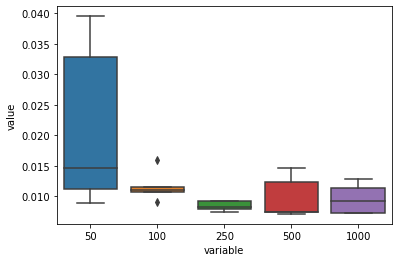

In [110]:
sns.boxplot(x='variable', y='value', data=df_melted) #250

In [113]:
#batch_size
dic = {}
for i in [1,2,3,4,5,6,7,8,9,10,15,20]:
    dic[i] = exp(3,5,32,250,i)
df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)

Model: "sequential_210"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_457 (Dense)           (None, 32)                128       
                                                                 
 dense_458 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
147/147 - 0s - loss: 0.0926 - 320ms/epoch - 2ms/step
Epoch 2/250
147/147 - 0s - loss: 5.7867e-04 - 132ms/epoch - 901us/step
Epoch 3/250
147/147 - 0s - loss: 6.3262e-04 - 130ms/epoch - 887us/step
Epoch 4/250
147/147 - 0s - loss: 5.4587e-04 - 133ms/epoch - 903us/step
Epoch 5/250
147/147 - 0s - loss: 5.2638e-04 - 131ms/epoch - 891us/step
Epoch 6/250
147/147 - 0s - loss: 4.9269e-04 - 154ms/epoch - 1ms/step
Epoch 7/250
147/147 - 0s - loss:

Epoch 106/250
147/147 - 0s - loss: 3.4879e-04 - 129ms/epoch - 878us/step
Epoch 107/250
147/147 - 0s - loss: 3.0961e-04 - 128ms/epoch - 870us/step
Epoch 108/250
147/147 - 0s - loss: 3.1041e-04 - 129ms/epoch - 877us/step
Epoch 109/250
147/147 - 0s - loss: 3.4328e-04 - 126ms/epoch - 854us/step
Epoch 110/250
147/147 - 0s - loss: 3.9440e-04 - 149ms/epoch - 1ms/step
Epoch 111/250
147/147 - 0s - loss: 4.3156e-04 - 130ms/epoch - 887us/step
Epoch 112/250
147/147 - 0s - loss: 3.5277e-04 - 131ms/epoch - 893us/step
Epoch 113/250
147/147 - 0s - loss: 4.0786e-04 - 134ms/epoch - 909us/step
Epoch 114/250
147/147 - 0s - loss: 3.4584e-04 - 129ms/epoch - 880us/step
Epoch 115/250
147/147 - 0s - loss: 3.2007e-04 - 125ms/epoch - 849us/step
Epoch 116/250
147/147 - 0s - loss: 3.5654e-04 - 163ms/epoch - 1ms/step
Epoch 117/250
147/147 - 0s - loss: 2.8638e-04 - 159ms/epoch - 1ms/step
Epoch 118/250
147/147 - 0s - loss: 3.6026e-04 - 132ms/epoch - 898us/step
Epoch 119/250
147/147 - 0s - loss: 3.8060e-04 - 129ms/epo

Epoch 219/250
147/147 - 0s - loss: 3.8128e-04 - 126ms/epoch - 854us/step
Epoch 220/250
147/147 - 0s - loss: 4.3775e-04 - 127ms/epoch - 866us/step
Epoch 221/250
147/147 - 0s - loss: 2.9815e-04 - 129ms/epoch - 877us/step
Epoch 222/250
147/147 - 0s - loss: 2.8968e-04 - 141ms/epoch - 959us/step
Epoch 223/250
147/147 - 0s - loss: 3.5000e-04 - 128ms/epoch - 868us/step
Epoch 224/250
147/147 - 0s - loss: 3.7744e-04 - 122ms/epoch - 827us/step
Epoch 225/250
147/147 - 0s - loss: 3.1330e-04 - 126ms/epoch - 856us/step
Epoch 226/250
147/147 - 0s - loss: 2.6949e-04 - 129ms/epoch - 875us/step
Epoch 227/250
147/147 - 0s - loss: 3.3317e-04 - 122ms/epoch - 833us/step
Epoch 228/250
147/147 - 0s - loss: 2.8861e-04 - 120ms/epoch - 818us/step
Epoch 229/250
147/147 - 0s - loss: 2.9886e-04 - 125ms/epoch - 848us/step
Epoch 230/250
147/147 - 0s - loss: 3.0859e-04 - 126ms/epoch - 854us/step
Epoch 231/250
147/147 - 0s - loss: 3.7972e-04 - 123ms/epoch - 838us/step
Epoch 232/250
147/147 - 0s - loss: 3.3814e-04 - 123

147/147 - 0s - loss: 4.0998e-04 - 123ms/epoch - 838us/step
Epoch 71/250
147/147 - 0s - loss: 3.0949e-04 - 120ms/epoch - 819us/step
Epoch 72/250
147/147 - 0s - loss: 3.2243e-04 - 125ms/epoch - 847us/step
Epoch 73/250
147/147 - 0s - loss: 3.4680e-04 - 119ms/epoch - 810us/step
Epoch 74/250
147/147 - 0s - loss: 3.4551e-04 - 125ms/epoch - 849us/step
Epoch 75/250
147/147 - 0s - loss: 3.1173e-04 - 123ms/epoch - 838us/step
Epoch 76/250
147/147 - 0s - loss: 3.4169e-04 - 121ms/epoch - 825us/step
Epoch 77/250
147/147 - 0s - loss: 2.7316e-04 - 119ms/epoch - 808us/step
Epoch 78/250
147/147 - 0s - loss: 3.0844e-04 - 118ms/epoch - 800us/step
Epoch 79/250
147/147 - 0s - loss: 3.3422e-04 - 118ms/epoch - 805us/step
Epoch 80/250
147/147 - 0s - loss: 3.6525e-04 - 124ms/epoch - 841us/step
Epoch 81/250
147/147 - 0s - loss: 3.2634e-04 - 136ms/epoch - 927us/step
Epoch 82/250
147/147 - 0s - loss: 3.3197e-04 - 136ms/epoch - 926us/step
Epoch 83/250
147/147 - 0s - loss: 2.8630e-04 - 130ms/epoch - 883us/step
Epoch

Epoch 183/250
147/147 - 0s - loss: 2.7179e-04 - 126ms/epoch - 856us/step
Epoch 184/250
147/147 - 0s - loss: 2.9960e-04 - 121ms/epoch - 821us/step
Epoch 185/250
147/147 - 0s - loss: 2.8161e-04 - 125ms/epoch - 849us/step
Epoch 186/250
147/147 - 0s - loss: 2.5585e-04 - 126ms/epoch - 855us/step
Epoch 187/250
147/147 - 0s - loss: 3.3645e-04 - 123ms/epoch - 835us/step
Epoch 188/250
147/147 - 0s - loss: 4.0526e-04 - 125ms/epoch - 849us/step
Epoch 189/250
147/147 - 0s - loss: 3.7967e-04 - 118ms/epoch - 803us/step
Epoch 190/250
147/147 - 0s - loss: 2.0406e-04 - 124ms/epoch - 840us/step
Epoch 191/250
147/147 - 0s - loss: 4.4471e-04 - 123ms/epoch - 835us/step
Epoch 192/250
147/147 - 0s - loss: 2.8564e-04 - 121ms/epoch - 820us/step
Epoch 193/250
147/147 - 0s - loss: 2.8063e-04 - 117ms/epoch - 799us/step
Epoch 194/250
147/147 - 0s - loss: 2.7884e-04 - 121ms/epoch - 825us/step
Epoch 195/250
147/147 - 0s - loss: 3.3184e-04 - 122ms/epoch - 830us/step
Epoch 196/250
147/147 - 0s - loss: 2.2938e-04 - 123

Epoch 34/250
147/147 - 0s - loss: 3.7248e-04 - 122ms/epoch - 832us/step
Epoch 35/250
147/147 - 0s - loss: 3.4126e-04 - 127ms/epoch - 865us/step
Epoch 36/250
147/147 - 0s - loss: 4.0702e-04 - 124ms/epoch - 844us/step
Epoch 37/250
147/147 - 0s - loss: 3.1006e-04 - 127ms/epoch - 864us/step
Epoch 38/250
147/147 - 0s - loss: 3.5490e-04 - 126ms/epoch - 854us/step
Epoch 39/250
147/147 - 0s - loss: 3.6613e-04 - 126ms/epoch - 858us/step
Epoch 40/250
147/147 - 0s - loss: 4.1130e-04 - 125ms/epoch - 851us/step
Epoch 41/250
147/147 - 0s - loss: 3.0471e-04 - 124ms/epoch - 841us/step
Epoch 42/250
147/147 - 0s - loss: 4.3033e-04 - 128ms/epoch - 870us/step
Epoch 43/250
147/147 - 0s - loss: 3.3960e-04 - 128ms/epoch - 868us/step
Epoch 44/250
147/147 - 0s - loss: 4.1128e-04 - 124ms/epoch - 843us/step
Epoch 45/250
147/147 - 0s - loss: 3.5903e-04 - 122ms/epoch - 829us/step
Epoch 46/250
147/147 - 0s - loss: 3.7629e-04 - 124ms/epoch - 847us/step
Epoch 47/250
147/147 - 0s - loss: 3.6613e-04 - 126ms/epoch - 860

Epoch 148/250
147/147 - 0s - loss: 2.9514e-04 - 155ms/epoch - 1ms/step
Epoch 149/250
147/147 - 0s - loss: 2.2522e-04 - 132ms/epoch - 897us/step
Epoch 150/250
147/147 - 0s - loss: 2.8026e-04 - 128ms/epoch - 868us/step
Epoch 151/250
147/147 - 0s - loss: 3.1229e-04 - 128ms/epoch - 871us/step
Epoch 152/250
147/147 - 0s - loss: 3.1597e-04 - 142ms/epoch - 964us/step
Epoch 153/250
147/147 - 0s - loss: 3.4185e-04 - 125ms/epoch - 853us/step
Epoch 154/250
147/147 - 0s - loss: 3.1732e-04 - 128ms/epoch - 874us/step
Epoch 155/250
147/147 - 0s - loss: 4.6212e-04 - 132ms/epoch - 899us/step
Epoch 156/250
147/147 - 0s - loss: 3.4234e-04 - 156ms/epoch - 1ms/step
Epoch 157/250
147/147 - 0s - loss: 2.5879e-04 - 153ms/epoch - 1ms/step
Epoch 158/250
147/147 - 0s - loss: 3.2680e-04 - 130ms/epoch - 882us/step
Epoch 159/250
147/147 - 0s - loss: 2.9581e-04 - 136ms/epoch - 927us/step
Epoch 160/250
147/147 - 0s - loss: 3.1129e-04 - 150ms/epoch - 1ms/step
Epoch 161/250
147/147 - 0s - loss: 2.4028e-04 - 158ms/epoch

Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
147/147 - 0s - loss: 0.4206 - 339ms/epoch - 2ms/step
Epoch 2/250
147/147 - 0s - loss: 9.1006e-04 - 126ms/epoch - 858us/step
Epoch 3/250
147/147 - 0s - loss: 9.0341e-04 - 155ms/epoch - 1ms/step
Epoch 4/250
147/147 - 0s - loss: 8.8824e-04 - 130ms/epoch - 887us/step
Epoch 5/250
147/147 - 0s - loss: 8.1493e-04 - 131ms/epoch - 892us/step
Epoch 6/250
147/147 - 0s - loss: 8.3178e-04 - 128ms/epoch - 873us/step
Epoch 7/250
147/147 - 0s - loss: 7.6364e-04 - 129ms/epoch - 876us/step
Epoch 8/250
147/147 - 0s - loss: 7.8216e-04 - 136ms/epoch - 927us/step
Epoch 9/250
147/147 - 0s - loss: 6.7664e-04 - 157ms/epoch - 1ms/step
Epoch 10/250
147/147 - 0s - loss: 7.2509e-04 - 151ms/epoch - 1ms/step
Epoch 11/250
147/147 - 0s - loss: 7.0451e-04 - 150ms/epoch - 1ms/step
Epoch 12/250
147/147 - 0s - loss: 6.1382e-04 - 139ms/epoch - 948us/step
Epoch 13/250
147/147 - 0s - l

Epoch 114/250
147/147 - 0s - loss: 3.6746e-04 - 124ms/epoch - 842us/step
Epoch 115/250
147/147 - 0s - loss: 3.4854e-04 - 127ms/epoch - 866us/step
Epoch 116/250
147/147 - 0s - loss: 3.5561e-04 - 138ms/epoch - 935us/step
Epoch 117/250
147/147 - 0s - loss: 5.2341e-04 - 124ms/epoch - 843us/step
Epoch 118/250
147/147 - 0s - loss: 4.1826e-04 - 123ms/epoch - 837us/step
Epoch 119/250
147/147 - 0s - loss: 2.9376e-04 - 126ms/epoch - 854us/step
Epoch 120/250
147/147 - 0s - loss: 3.3843e-04 - 128ms/epoch - 872us/step
Epoch 121/250
147/147 - 0s - loss: 3.0551e-04 - 124ms/epoch - 844us/step
Epoch 122/250
147/147 - 0s - loss: 2.9262e-04 - 127ms/epoch - 861us/step
Epoch 123/250
147/147 - 0s - loss: 3.3366e-04 - 126ms/epoch - 859us/step
Epoch 124/250
147/147 - 0s - loss: 2.9997e-04 - 126ms/epoch - 856us/step
Epoch 125/250
147/147 - 0s - loss: 2.7370e-04 - 125ms/epoch - 850us/step
Epoch 126/250
147/147 - 0s - loss: 3.4069e-04 - 125ms/epoch - 848us/step
Epoch 127/250
147/147 - 0s - loss: 3.6410e-04 - 125

Epoch 227/250
147/147 - 0s - loss: 2.6674e-04 - 126ms/epoch - 858us/step
Epoch 228/250
147/147 - 0s - loss: 2.6450e-04 - 125ms/epoch - 852us/step
Epoch 229/250
147/147 - 0s - loss: 2.6076e-04 - 125ms/epoch - 849us/step
Epoch 230/250
147/147 - 0s - loss: 2.4346e-04 - 126ms/epoch - 855us/step
Epoch 231/250
147/147 - 0s - loss: 3.4828e-04 - 122ms/epoch - 829us/step
Epoch 232/250
147/147 - 0s - loss: 2.6342e-04 - 125ms/epoch - 847us/step
Epoch 233/250
147/147 - 0s - loss: 2.8938e-04 - 126ms/epoch - 858us/step
Epoch 234/250
147/147 - 0s - loss: 3.1439e-04 - 127ms/epoch - 864us/step
Epoch 235/250
147/147 - 0s - loss: 3.1832e-04 - 125ms/epoch - 850us/step
Epoch 236/250
147/147 - 0s - loss: 3.6789e-04 - 124ms/epoch - 844us/step
Epoch 237/250
147/147 - 0s - loss: 3.0049e-04 - 125ms/epoch - 850us/step
Epoch 238/250
147/147 - 0s - loss: 3.0840e-04 - 127ms/epoch - 861us/step
Epoch 239/250
147/147 - 0s - loss: 3.1334e-04 - 125ms/epoch - 850us/step
Epoch 240/250
147/147 - 0s - loss: 2.7378e-04 - 126

147/147 - 0s - loss: 2.6270e-04 - 126ms/epoch - 857us/step
Epoch 79/250
147/147 - 0s - loss: 3.2721e-04 - 126ms/epoch - 856us/step
Epoch 80/250
147/147 - 0s - loss: 3.5933e-04 - 126ms/epoch - 855us/step
Epoch 81/250
147/147 - 0s - loss: 2.8590e-04 - 128ms/epoch - 871us/step
Epoch 82/250
147/147 - 0s - loss: 2.7531e-04 - 127ms/epoch - 864us/step
Epoch 83/250
147/147 - 0s - loss: 3.4949e-04 - 126ms/epoch - 860us/step
Epoch 84/250
147/147 - 0s - loss: 2.7842e-04 - 128ms/epoch - 870us/step
Epoch 85/250
147/147 - 0s - loss: 2.8549e-04 - 127ms/epoch - 861us/step
Epoch 86/250
147/147 - 0s - loss: 2.7702e-04 - 126ms/epoch - 857us/step
Epoch 87/250
147/147 - 0s - loss: 3.0550e-04 - 124ms/epoch - 843us/step
Epoch 88/250
147/147 - 0s - loss: 3.0137e-04 - 126ms/epoch - 858us/step
Epoch 89/250
147/147 - 0s - loss: 3.2755e-04 - 127ms/epoch - 865us/step
Epoch 90/250
147/147 - 0s - loss: 3.0041e-04 - 125ms/epoch - 853us/step
Epoch 91/250
147/147 - 0s - loss: 3.1064e-04 - 127ms/epoch - 862us/step
Epoch

Epoch 191/250
147/147 - 0s - loss: 2.5417e-04 - 124ms/epoch - 843us/step
Epoch 192/250
147/147 - 0s - loss: 3.0671e-04 - 125ms/epoch - 853us/step
Epoch 193/250
147/147 - 0s - loss: 3.2724e-04 - 128ms/epoch - 868us/step
Epoch 194/250
147/147 - 0s - loss: 2.3960e-04 - 125ms/epoch - 849us/step
Epoch 195/250
147/147 - 0s - loss: 2.5453e-04 - 127ms/epoch - 861us/step
Epoch 196/250
147/147 - 0s - loss: 2.7259e-04 - 128ms/epoch - 871us/step
Epoch 197/250
147/147 - 0s - loss: 3.4372e-04 - 128ms/epoch - 868us/step
Epoch 198/250
147/147 - 0s - loss: 2.4970e-04 - 124ms/epoch - 843us/step
Epoch 199/250
147/147 - 0s - loss: 2.4025e-04 - 124ms/epoch - 845us/step
Epoch 200/250
147/147 - 0s - loss: 3.5471e-04 - 126ms/epoch - 857us/step
Epoch 201/250
147/147 - 0s - loss: 2.5381e-04 - 125ms/epoch - 852us/step
Epoch 202/250
147/147 - 0s - loss: 2.7033e-04 - 127ms/epoch - 865us/step
Epoch 203/250
147/147 - 0s - loss: 2.4839e-04 - 138ms/epoch - 941us/step
Epoch 204/250
147/147 - 0s - loss: 2.9104e-04 - 127

Epoch 44/250
74/74 - 0s - loss: 2.6461e-04 - 75ms/epoch - 1ms/step
Epoch 45/250
74/74 - 0s - loss: 2.3081e-04 - 76ms/epoch - 1ms/step
Epoch 46/250
74/74 - 0s - loss: 2.3431e-04 - 73ms/epoch - 989us/step
Epoch 47/250
74/74 - 0s - loss: 2.9747e-04 - 75ms/epoch - 1ms/step
Epoch 48/250
74/74 - 0s - loss: 1.9841e-04 - 72ms/epoch - 967us/step
Epoch 49/250
74/74 - 0s - loss: 2.2234e-04 - 76ms/epoch - 1ms/step
Epoch 50/250
74/74 - 0s - loss: 2.7070e-04 - 75ms/epoch - 1ms/step
Epoch 51/250
74/74 - 0s - loss: 2.0109e-04 - 75ms/epoch - 1ms/step
Epoch 52/250
74/74 - 0s - loss: 2.2467e-04 - 74ms/epoch - 1ms/step
Epoch 53/250
74/74 - 0s - loss: 2.3994e-04 - 74ms/epoch - 994us/step
Epoch 54/250
74/74 - 0s - loss: 2.1635e-04 - 74ms/epoch - 996us/step
Epoch 55/250
74/74 - 0s - loss: 2.1853e-04 - 75ms/epoch - 1ms/step
Epoch 56/250
74/74 - 0s - loss: 2.9213e-04 - 75ms/epoch - 1ms/step
Epoch 57/250
74/74 - 0s - loss: 2.8375e-04 - 76ms/epoch - 1ms/step
Epoch 58/250
74/74 - 0s - loss: 1.9710e-04 - 74ms/epoc

Epoch 165/250
74/74 - 0s - loss: 2.6055e-04 - 71ms/epoch - 964us/step
Epoch 166/250
74/74 - 0s - loss: 2.1649e-04 - 75ms/epoch - 1ms/step
Epoch 167/250
74/74 - 0s - loss: 2.8334e-04 - 73ms/epoch - 984us/step
Epoch 168/250
74/74 - 0s - loss: 2.2675e-04 - 75ms/epoch - 1ms/step
Epoch 169/250
74/74 - 0s - loss: 2.5510e-04 - 75ms/epoch - 1ms/step
Epoch 170/250
74/74 - 0s - loss: 2.3268e-04 - 75ms/epoch - 1ms/step
Epoch 171/250
74/74 - 0s - loss: 3.9166e-04 - 75ms/epoch - 1ms/step
Epoch 172/250
74/74 - 0s - loss: 2.3806e-04 - 72ms/epoch - 979us/step
Epoch 173/250
74/74 - 0s - loss: 2.1150e-04 - 75ms/epoch - 1ms/step
Epoch 174/250
74/74 - 0s - loss: 2.6951e-04 - 75ms/epoch - 1ms/step
Epoch 175/250
74/74 - 0s - loss: 2.0622e-04 - 75ms/epoch - 1ms/step
Epoch 176/250
74/74 - 0s - loss: 2.6350e-04 - 74ms/epoch - 999us/step
Epoch 177/250
74/74 - 0s - loss: 2.3686e-04 - 74ms/epoch - 1ms/step
Epoch 178/250
74/74 - 0s - loss: 2.4741e-04 - 74ms/epoch - 1ms/step
Epoch 179/250
74/74 - 0s - loss: 2.7426e

Epoch 22/250
74/74 - 0s - loss: 6.3736e-04 - 69ms/epoch - 938us/step
Epoch 23/250
74/74 - 0s - loss: 6.1054e-04 - 71ms/epoch - 957us/step
Epoch 24/250
74/74 - 0s - loss: 6.1523e-04 - 66ms/epoch - 890us/step
Epoch 25/250
74/74 - 0s - loss: 5.7099e-04 - 70ms/epoch - 940us/step
Epoch 26/250
74/74 - 0s - loss: 5.2746e-04 - 73ms/epoch - 983us/step
Epoch 27/250
74/74 - 0s - loss: 5.6193e-04 - 75ms/epoch - 1ms/step
Epoch 28/250
74/74 - 0s - loss: 5.2914e-04 - 75ms/epoch - 1ms/step
Epoch 29/250
74/74 - 0s - loss: 5.1473e-04 - 74ms/epoch - 1ms/step
Epoch 30/250
74/74 - 0s - loss: 5.1373e-04 - 76ms/epoch - 1ms/step
Epoch 31/250
74/74 - 0s - loss: 4.8606e-04 - 74ms/epoch - 1ms/step
Epoch 32/250
74/74 - 0s - loss: 4.6471e-04 - 74ms/epoch - 998us/step
Epoch 33/250
74/74 - 0s - loss: 4.6778e-04 - 76ms/epoch - 1ms/step
Epoch 34/250
74/74 - 0s - loss: 4.2216e-04 - 74ms/epoch - 1ms/step
Epoch 35/250
74/74 - 0s - loss: 4.4760e-04 - 75ms/epoch - 1ms/step
Epoch 36/250
74/74 - 0s - loss: 4.3906e-04 - 71ms/

Epoch 142/250
74/74 - 0s - loss: 4.1841e-04 - 72ms/epoch - 971us/step
Epoch 143/250
74/74 - 0s - loss: 3.9054e-04 - 70ms/epoch - 945us/step
Epoch 144/250
74/74 - 0s - loss: 2.9190e-04 - 71ms/epoch - 957us/step
Epoch 145/250
74/74 - 0s - loss: 2.8337e-04 - 67ms/epoch - 904us/step
Epoch 146/250
74/74 - 0s - loss: 2.7995e-04 - 70ms/epoch - 948us/step
Epoch 147/250
74/74 - 0s - loss: 3.4249e-04 - 74ms/epoch - 993us/step
Epoch 148/250
74/74 - 0s - loss: 2.9128e-04 - 75ms/epoch - 1ms/step
Epoch 149/250
74/74 - 0s - loss: 2.7517e-04 - 74ms/epoch - 1ms/step
Epoch 150/250
74/74 - 0s - loss: 2.9920e-04 - 75ms/epoch - 1ms/step
Epoch 151/250
74/74 - 0s - loss: 2.9486e-04 - 76ms/epoch - 1ms/step
Epoch 152/250
74/74 - 0s - loss: 3.1587e-04 - 72ms/epoch - 974us/step
Epoch 153/250
74/74 - 0s - loss: 2.6645e-04 - 75ms/epoch - 1ms/step
Epoch 154/250
74/74 - 0s - loss: 2.5894e-04 - 74ms/epoch - 1ms/step
Epoch 155/250
74/74 - 0s - loss: 3.7256e-04 - 74ms/epoch - 1ms/step
Epoch 156/250
74/74 - 0s - loss: 2

Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
74/74 - 0s - loss: 0.0969 - 304ms/epoch - 4ms/step
Epoch 2/250
74/74 - 0s - loss: 4.3649e-04 - 76ms/epoch - 1ms/step
Epoch 3/250
74/74 - 0s - loss: 3.9511e-04 - 74ms/epoch - 998us/step
Epoch 4/250
74/74 - 0s - loss: 3.8006e-04 - 73ms/epoch - 987us/step
Epoch 5/250
74/74 - 0s - loss: 4.0592e-04 - 75ms/epoch - 1ms/step
Epoch 6/250
74/74 - 0s - loss: 3.7200e-04 - 75ms/epoch - 1ms/step
Epoch 7/250
74/74 - 0s - loss: 4.0747e-04 - 71ms/epoch - 959us/step
Epoch 8/250
74/74 - 0s - loss: 3.5070e-04 - 74ms/epoch - 1000us/step
Epoch 9/250
74/74 - 0s - loss: 3.4442e-04 - 75ms/epoch - 1ms/step
Epoch 10/250
74/74 - 0s - loss: 3.1667e-04 - 76ms/epoch - 1ms/step
Epoch 11/250
74/74 - 0s - loss: 3.6073e-04 - 76ms/epoch - 1ms/step
Epoch 12/250
74/74 - 0s - loss: 3.3016e-04 - 78ms/epoch - 1ms/step
Epoch 13/250
74/74 - 0s - loss: 2.9358e-04 - 74ms/epoch - 1ms/step
Ep

Epoch 121/250
74/74 - 0s - loss: 2.5955e-04 - 74ms/epoch - 994us/step
Epoch 122/250
74/74 - 0s - loss: 2.8219e-04 - 75ms/epoch - 1ms/step
Epoch 123/250
74/74 - 0s - loss: 2.7153e-04 - 74ms/epoch - 996us/step
Epoch 124/250
74/74 - 0s - loss: 2.8924e-04 - 75ms/epoch - 1ms/step
Epoch 125/250
74/74 - 0s - loss: 2.5078e-04 - 76ms/epoch - 1ms/step
Epoch 126/250
74/74 - 0s - loss: 4.7066e-04 - 75ms/epoch - 1ms/step
Epoch 127/250
74/74 - 0s - loss: 2.1813e-04 - 75ms/epoch - 1ms/step
Epoch 128/250
74/74 - 0s - loss: 2.3252e-04 - 74ms/epoch - 998us/step
Epoch 129/250
74/74 - 0s - loss: 3.0517e-04 - 73ms/epoch - 991us/step
Epoch 130/250
74/74 - 0s - loss: 2.4624e-04 - 73ms/epoch - 992us/step
Epoch 131/250
74/74 - 0s - loss: 2.0855e-04 - 73ms/epoch - 980us/step
Epoch 132/250
74/74 - 0s - loss: 3.9697e-04 - 76ms/epoch - 1ms/step
Epoch 133/250
74/74 - 0s - loss: 2.6663e-04 - 70ms/epoch - 949us/step
Epoch 134/250
74/74 - 0s - loss: 2.5924e-04 - 74ms/epoch - 1ms/step
Epoch 135/250
74/74 - 0s - loss: 2

Epoch 241/250
74/74 - 0s - loss: 3.5047e-04 - 75ms/epoch - 1ms/step
Epoch 242/250
74/74 - 0s - loss: 2.2153e-04 - 76ms/epoch - 1ms/step
Epoch 243/250
74/74 - 0s - loss: 4.0096e-04 - 72ms/epoch - 968us/step
Epoch 244/250
74/74 - 0s - loss: 3.0199e-04 - 75ms/epoch - 1ms/step
Epoch 245/250
74/74 - 0s - loss: 2.0508e-04 - 76ms/epoch - 1ms/step
Epoch 246/250
74/74 - 0s - loss: 3.9790e-04 - 76ms/epoch - 1ms/step
Epoch 247/250
74/74 - 0s - loss: 2.3506e-04 - 74ms/epoch - 1ms/step
Epoch 248/250
74/74 - 0s - loss: 2.4776e-04 - 76ms/epoch - 1ms/step
Epoch 249/250
74/74 - 0s - loss: 2.8349e-04 - 74ms/epoch - 1ms/step
Epoch 250/250
74/74 - 0s - loss: 3.4337e-04 - 75ms/epoch - 1ms/step
5/5 [==============================] - 0s 2ms/step - loss: 2.0506e-04
Train Score: 0.0002 MSE (0.01432 RMSE)
1/1 [==============================] - 0s 17ms/step - loss: 1.0722e-04
Test Score: 0.0001 MSE (0.01035 RMSE)
Model: "sequential_218"
_________________________________________________________________
 Layer (ty

74/74 - 0s - loss: 2.5114e-04 - 77ms/epoch - 1ms/step
Epoch 100/250
74/74 - 0s - loss: 3.0999e-04 - 72ms/epoch - 967us/step
Epoch 101/250
74/74 - 0s - loss: 3.2952e-04 - 75ms/epoch - 1ms/step
Epoch 102/250
74/74 - 0s - loss: 2.4219e-04 - 78ms/epoch - 1ms/step
Epoch 103/250
74/74 - 0s - loss: 2.1218e-04 - 73ms/epoch - 989us/step
Epoch 104/250
74/74 - 0s - loss: 2.9177e-04 - 75ms/epoch - 1ms/step
Epoch 105/250
74/74 - 0s - loss: 3.0251e-04 - 76ms/epoch - 1ms/step
Epoch 106/250
74/74 - 0s - loss: 2.3677e-04 - 76ms/epoch - 1ms/step
Epoch 107/250
74/74 - 0s - loss: 2.9798e-04 - 72ms/epoch - 970us/step
Epoch 108/250
74/74 - 0s - loss: 2.5367e-04 - 75ms/epoch - 1ms/step
Epoch 109/250
74/74 - 0s - loss: 3.1648e-04 - 76ms/epoch - 1ms/step
Epoch 110/250
74/74 - 0s - loss: 2.5093e-04 - 75ms/epoch - 1ms/step
Epoch 111/250
74/74 - 0s - loss: 2.6870e-04 - 76ms/epoch - 1ms/step
Epoch 112/250
74/74 - 0s - loss: 2.3020e-04 - 76ms/epoch - 1ms/step
Epoch 113/250
74/74 - 0s - loss: 2.2775e-04 - 76ms/epoch

74/74 - 0s - loss: 2.5273e-04 - 76ms/epoch - 1ms/step
Epoch 220/250
74/74 - 0s - loss: 2.2269e-04 - 75ms/epoch - 1ms/step
Epoch 221/250
74/74 - 0s - loss: 2.7637e-04 - 75ms/epoch - 1ms/step
Epoch 222/250
74/74 - 0s - loss: 2.4545e-04 - 75ms/epoch - 1ms/step
Epoch 223/250
74/74 - 0s - loss: 2.6243e-04 - 87ms/epoch - 1ms/step
Epoch 224/250
74/74 - 0s - loss: 2.2565e-04 - 75ms/epoch - 1ms/step
Epoch 225/250
74/74 - 0s - loss: 2.9694e-04 - 74ms/epoch - 1ms/step
Epoch 226/250
74/74 - 0s - loss: 3.0699e-04 - 76ms/epoch - 1ms/step
Epoch 227/250
74/74 - 0s - loss: 2.8149e-04 - 70ms/epoch - 948us/step
Epoch 228/250
74/74 - 0s - loss: 2.9369e-04 - 77ms/epoch - 1ms/step
Epoch 229/250
74/74 - 0s - loss: 2.7764e-04 - 72ms/epoch - 977us/step
Epoch 230/250
74/74 - 0s - loss: 2.2665e-04 - 76ms/epoch - 1ms/step
Epoch 231/250
74/74 - 0s - loss: 3.2952e-04 - 70ms/epoch - 952us/step
Epoch 232/250
74/74 - 0s - loss: 2.1019e-04 - 74ms/epoch - 1ms/step
Epoch 233/250
74/74 - 0s - loss: 2.6273e-04 - 74ms/epoch

Epoch 79/250
74/74 - 0s - loss: 2.1122e-04 - 76ms/epoch - 1ms/step
Epoch 80/250
74/74 - 0s - loss: 2.3723e-04 - 77ms/epoch - 1ms/step
Epoch 81/250
74/74 - 0s - loss: 2.1935e-04 - 75ms/epoch - 1ms/step
Epoch 82/250
74/74 - 0s - loss: 2.5217e-04 - 71ms/epoch - 956us/step
Epoch 83/250
74/74 - 0s - loss: 2.5011e-04 - 75ms/epoch - 1ms/step
Epoch 84/250
74/74 - 0s - loss: 2.1342e-04 - 74ms/epoch - 994us/step
Epoch 85/250
74/74 - 0s - loss: 2.7250e-04 - 75ms/epoch - 1ms/step
Epoch 86/250
74/74 - 0s - loss: 1.9526e-04 - 74ms/epoch - 1ms/step
Epoch 87/250
74/74 - 0s - loss: 3.1063e-04 - 75ms/epoch - 1ms/step
Epoch 88/250
74/74 - 0s - loss: 2.9594e-04 - 75ms/epoch - 1ms/step
Epoch 89/250
74/74 - 0s - loss: 2.7201e-04 - 74ms/epoch - 1ms/step
Epoch 90/250
74/74 - 0s - loss: 2.5549e-04 - 71ms/epoch - 965us/step
Epoch 91/250
74/74 - 0s - loss: 2.1184e-04 - 76ms/epoch - 1ms/step
Epoch 92/250
74/74 - 0s - loss: 2.5095e-04 - 74ms/epoch - 1ms/step
Epoch 93/250
74/74 - 0s - loss: 2.3627e-04 - 74ms/epoch 

Epoch 199/250
74/74 - 0s - loss: 3.1346e-04 - 71ms/epoch - 958us/step
Epoch 200/250
74/74 - 0s - loss: 2.6690e-04 - 73ms/epoch - 983us/step
Epoch 201/250
74/74 - 0s - loss: 2.7221e-04 - 67ms/epoch - 904us/step
Epoch 202/250
74/74 - 0s - loss: 3.3779e-04 - 72ms/epoch - 977us/step
Epoch 203/250
74/74 - 0s - loss: 2.6319e-04 - 71ms/epoch - 955us/step
Epoch 204/250
74/74 - 0s - loss: 3.2326e-04 - 70ms/epoch - 943us/step
Epoch 205/250
74/74 - 0s - loss: 3.5483e-04 - 70ms/epoch - 942us/step
Epoch 206/250
74/74 - 0s - loss: 3.1305e-04 - 71ms/epoch - 956us/step
Epoch 207/250
74/74 - 0s - loss: 3.3188e-04 - 71ms/epoch - 961us/step
Epoch 208/250
74/74 - 0s - loss: 2.2718e-04 - 72ms/epoch - 970us/step
Epoch 209/250
74/74 - 0s - loss: 2.5303e-04 - 66ms/epoch - 896us/step
Epoch 210/250
74/74 - 0s - loss: 2.5860e-04 - 71ms/epoch - 966us/step
Epoch 211/250
74/74 - 0s - loss: 2.4736e-04 - 71ms/epoch - 956us/step
Epoch 212/250
74/74 - 0s - loss: 2.5760e-04 - 72ms/epoch - 974us/step
Epoch 213/250
74/74 

49/49 - 0s - loss: 5.9772e-04 - 48ms/epoch - 987us/step
Epoch 58/250
49/49 - 0s - loss: 5.8782e-04 - 54ms/epoch - 1ms/step
Epoch 59/250
49/49 - 0s - loss: 5.3463e-04 - 47ms/epoch - 951us/step
Epoch 60/250
49/49 - 0s - loss: 5.2067e-04 - 47ms/epoch - 962us/step
Epoch 61/250
49/49 - 0s - loss: 5.2142e-04 - 46ms/epoch - 949us/step
Epoch 62/250
49/49 - 0s - loss: 4.9061e-04 - 48ms/epoch - 979us/step
Epoch 63/250
49/49 - 0s - loss: 4.8836e-04 - 50ms/epoch - 1ms/step
Epoch 64/250
49/49 - 0s - loss: 5.0504e-04 - 46ms/epoch - 942us/step
Epoch 65/250
49/49 - 0s - loss: 4.8486e-04 - 49ms/epoch - 1ms/step
Epoch 66/250
49/49 - 0s - loss: 4.6645e-04 - 51ms/epoch - 1ms/step
Epoch 67/250
49/49 - 0s - loss: 4.5425e-04 - 49ms/epoch - 1ms/step
Epoch 68/250
49/49 - 0s - loss: 4.5786e-04 - 48ms/epoch - 987us/step
Epoch 69/250
49/49 - 0s - loss: 4.1820e-04 - 49ms/epoch - 995us/step
Epoch 70/250
49/49 - 0s - loss: 4.8768e-04 - 50ms/epoch - 1ms/step
Epoch 71/250
49/49 - 0s - loss: 4.3518e-04 - 49ms/epoch - 9

49/49 - 0s - loss: 3.3292e-04 - 48ms/epoch - 986us/step
Epoch 177/250
49/49 - 0s - loss: 3.0384e-04 - 48ms/epoch - 975us/step
Epoch 178/250
49/49 - 0s - loss: 3.6089e-04 - 50ms/epoch - 1ms/step
Epoch 179/250
49/49 - 0s - loss: 3.0598e-04 - 48ms/epoch - 976us/step
Epoch 180/250
49/49 - 0s - loss: 3.5804e-04 - 48ms/epoch - 987us/step
Epoch 181/250
49/49 - 0s - loss: 3.1277e-04 - 52ms/epoch - 1ms/step
Epoch 182/250
49/49 - 0s - loss: 3.3066e-04 - 46ms/epoch - 942us/step
Epoch 183/250
49/49 - 0s - loss: 3.5640e-04 - 48ms/epoch - 969us/step
Epoch 184/250
49/49 - 0s - loss: 3.0937e-04 - 51ms/epoch - 1ms/step
Epoch 185/250
49/49 - 0s - loss: 3.4013e-04 - 48ms/epoch - 985us/step
Epoch 186/250
49/49 - 0s - loss: 3.1002e-04 - 48ms/epoch - 989us/step
Epoch 187/250
49/49 - 0s - loss: 3.2955e-04 - 48ms/epoch - 983us/step
Epoch 188/250
49/49 - 0s - loss: 3.3586e-04 - 48ms/epoch - 984us/step
Epoch 189/250
49/49 - 0s - loss: 3.4526e-04 - 52ms/epoch - 1ms/step
Epoch 190/250
49/49 - 0s - loss: 3.5633e-0

Epoch 34/250
49/49 - 0s - loss: 0.0010 - 50ms/epoch - 1ms/step
Epoch 35/250
49/49 - 0s - loss: 9.7267e-04 - 48ms/epoch - 986us/step
Epoch 36/250
49/49 - 0s - loss: 9.5683e-04 - 48ms/epoch - 981us/step
Epoch 37/250
49/49 - 0s - loss: 9.5006e-04 - 48ms/epoch - 985us/step
Epoch 38/250
49/49 - 0s - loss: 9.1604e-04 - 49ms/epoch - 998us/step
Epoch 39/250
49/49 - 0s - loss: 9.0609e-04 - 49ms/epoch - 991us/step
Epoch 40/250
49/49 - 0s - loss: 8.7904e-04 - 49ms/epoch - 997us/step
Epoch 41/250
49/49 - 0s - loss: 8.9951e-04 - 52ms/epoch - 1ms/step
Epoch 42/250
49/49 - 0s - loss: 8.5670e-04 - 48ms/epoch - 988us/step
Epoch 43/250
49/49 - 0s - loss: 8.3143e-04 - 47ms/epoch - 967us/step
Epoch 44/250
49/49 - 0s - loss: 8.2706e-04 - 48ms/epoch - 982us/step
Epoch 45/250
49/49 - 0s - loss: 7.8403e-04 - 48ms/epoch - 988us/step
Epoch 46/250
49/49 - 0s - loss: 7.6636e-04 - 47ms/epoch - 969us/step
Epoch 47/250
49/49 - 0s - loss: 7.7152e-04 - 49ms/epoch - 998us/step
Epoch 48/250
49/49 - 0s - loss: 7.3583e-04

49/49 - 0s - loss: 2.8499e-04 - 48ms/epoch - 974us/step
Epoch 154/250
49/49 - 0s - loss: 2.5928e-04 - 51ms/epoch - 1ms/step
Epoch 155/250
49/49 - 0s - loss: 2.5718e-04 - 48ms/epoch - 975us/step
Epoch 156/250
49/49 - 0s - loss: 2.9322e-04 - 49ms/epoch - 1ms/step
Epoch 157/250
49/49 - 0s - loss: 3.1326e-04 - 49ms/epoch - 993us/step
Epoch 158/250
49/49 - 0s - loss: 2.6053e-04 - 53ms/epoch - 1ms/step
Epoch 159/250
49/49 - 0s - loss: 2.8705e-04 - 48ms/epoch - 984us/step
Epoch 160/250
49/49 - 0s - loss: 3.6234e-04 - 47ms/epoch - 968us/step
Epoch 161/250
49/49 - 0s - loss: 2.6637e-04 - 47ms/epoch - 962us/step
Epoch 162/250
49/49 - 0s - loss: 3.5131e-04 - 53ms/epoch - 1ms/step
Epoch 163/250
49/49 - 0s - loss: 2.7477e-04 - 48ms/epoch - 984us/step
Epoch 164/250
49/49 - 0s - loss: 2.9541e-04 - 47ms/epoch - 968us/step
Epoch 165/250
49/49 - 0s - loss: 2.9124e-04 - 47ms/epoch - 967us/step
Epoch 166/250
49/49 - 0s - loss: 3.7422e-04 - 46ms/epoch - 931us/step
Epoch 167/250
49/49 - 0s - loss: 3.2021e-0

Epoch 9/250
49/49 - 0s - loss: 7.5014e-04 - 52ms/epoch - 1ms/step
Epoch 10/250
49/49 - 0s - loss: 7.3849e-04 - 49ms/epoch - 1000us/step
Epoch 11/250
49/49 - 0s - loss: 7.1943e-04 - 49ms/epoch - 1ms/step
Epoch 12/250
49/49 - 0s - loss: 7.3243e-04 - 45ms/epoch - 915us/step
Epoch 13/250
49/49 - 0s - loss: 7.2817e-04 - 46ms/epoch - 935us/step
Epoch 14/250
49/49 - 0s - loss: 7.0072e-04 - 49ms/epoch - 991us/step
Epoch 15/250
49/49 - 0s - loss: 7.1718e-04 - 46ms/epoch - 949us/step
Epoch 16/250
49/49 - 0s - loss: 7.0079e-04 - 45ms/epoch - 916us/step
Epoch 17/250
49/49 - 0s - loss: 6.6522e-04 - 45ms/epoch - 918us/step
Epoch 18/250
49/49 - 0s - loss: 6.5548e-04 - 45ms/epoch - 926us/step
Epoch 19/250
49/49 - 0s - loss: 6.9282e-04 - 48ms/epoch - 980us/step
Epoch 20/250
49/49 - 0s - loss: 6.6556e-04 - 50ms/epoch - 1ms/step
Epoch 21/250
49/49 - 0s - loss: 6.2891e-04 - 49ms/epoch - 996us/step
Epoch 22/250
49/49 - 0s - loss: 6.1903e-04 - 49ms/epoch - 999us/step
Epoch 23/250
49/49 - 0s - loss: 5.9457e-

Epoch 129/250
49/49 - 0s - loss: 2.6673e-04 - 47ms/epoch - 957us/step
Epoch 130/250
49/49 - 0s - loss: 3.4481e-04 - 47ms/epoch - 954us/step
Epoch 131/250
49/49 - 0s - loss: 3.5307e-04 - 46ms/epoch - 933us/step
Epoch 132/250
49/49 - 0s - loss: 3.0840e-04 - 45ms/epoch - 916us/step
Epoch 133/250
49/49 - 0s - loss: 2.9416e-04 - 46ms/epoch - 941us/step
Epoch 134/250
49/49 - 0s - loss: 2.7142e-04 - 49ms/epoch - 1ms/step
Epoch 135/250
49/49 - 0s - loss: 2.7575e-04 - 46ms/epoch - 944us/step
Epoch 136/250
49/49 - 0s - loss: 2.4471e-04 - 49ms/epoch - 1ms/step
Epoch 137/250
49/49 - 0s - loss: 2.6118e-04 - 45ms/epoch - 924us/step
Epoch 138/250
49/49 - 0s - loss: 2.7473e-04 - 47ms/epoch - 955us/step
Epoch 139/250
49/49 - 0s - loss: 2.7434e-04 - 49ms/epoch - 1ms/step
Epoch 140/250
49/49 - 0s - loss: 2.8947e-04 - 44ms/epoch - 907us/step
Epoch 141/250
49/49 - 0s - loss: 2.9473e-04 - 47ms/epoch - 955us/step
Epoch 142/250
49/49 - 0s - loss: 3.3031e-04 - 46ms/epoch - 937us/step
Epoch 143/250
49/49 - 0s -

Epoch 248/250
49/49 - 0s - loss: 2.4096e-04 - 47ms/epoch - 963us/step
Epoch 249/250
49/49 - 0s - loss: 2.2220e-04 - 49ms/epoch - 1ms/step
Epoch 250/250
49/49 - 0s - loss: 2.4359e-04 - 50ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 2.6558e-04
Train Score: 0.0003 MSE (0.01630 RMSE)
1/1 [==============================] - 0s 16ms/step - loss: 1.7940e-04
Test Score: 0.0002 MSE (0.01339 RMSE)
Model: "sequential_223"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_483 (Dense)           (None, 32)                128       
                                                                 
 dense_484 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
49/49 - 0s - l

Epoch 107/250
49/49 - 0s - loss: 2.9781e-04 - 49ms/epoch - 1ms/step
Epoch 108/250
49/49 - 0s - loss: 3.5412e-04 - 48ms/epoch - 976us/step
Epoch 109/250
49/49 - 0s - loss: 3.4850e-04 - 48ms/epoch - 981us/step
Epoch 110/250
49/49 - 0s - loss: 3.2099e-04 - 48ms/epoch - 981us/step
Epoch 111/250
49/49 - 0s - loss: 3.2476e-04 - 49ms/epoch - 993us/step
Epoch 112/250
49/49 - 0s - loss: 3.0631e-04 - 48ms/epoch - 985us/step
Epoch 113/250
49/49 - 0s - loss: 3.3297e-04 - 48ms/epoch - 971us/step
Epoch 114/250
49/49 - 0s - loss: 3.3149e-04 - 48ms/epoch - 988us/step
Epoch 115/250
49/49 - 0s - loss: 3.0607e-04 - 51ms/epoch - 1ms/step
Epoch 116/250
49/49 - 0s - loss: 3.8297e-04 - 49ms/epoch - 991us/step
Epoch 117/250
49/49 - 0s - loss: 3.2946e-04 - 47ms/epoch - 964us/step
Epoch 118/250
49/49 - 0s - loss: 3.3576e-04 - 48ms/epoch - 984us/step
Epoch 119/250
49/49 - 0s - loss: 3.7044e-04 - 48ms/epoch - 977us/step
Epoch 120/250
49/49 - 0s - loss: 2.8238e-04 - 50ms/epoch - 1ms/step
Epoch 121/250
49/49 - 0s -

Epoch 226/250
49/49 - 0s - loss: 2.6395e-04 - 46ms/epoch - 942us/step
Epoch 227/250
49/49 - 0s - loss: 3.2117e-04 - 48ms/epoch - 976us/step
Epoch 228/250
49/49 - 0s - loss: 3.4776e-04 - 46ms/epoch - 936us/step
Epoch 229/250
49/49 - 0s - loss: 2.7665e-04 - 49ms/epoch - 991us/step
Epoch 230/250
49/49 - 0s - loss: 2.7335e-04 - 48ms/epoch - 976us/step
Epoch 231/250
49/49 - 0s - loss: 3.0995e-04 - 46ms/epoch - 944us/step
Epoch 232/250
49/49 - 0s - loss: 3.7910e-04 - 50ms/epoch - 1ms/step
Epoch 233/250
49/49 - 0s - loss: 3.3472e-04 - 46ms/epoch - 938us/step
Epoch 234/250
49/49 - 0s - loss: 2.6722e-04 - 45ms/epoch - 924us/step
Epoch 235/250
49/49 - 0s - loss: 3.1578e-04 - 44ms/epoch - 896us/step
Epoch 236/250
49/49 - 0s - loss: 3.6257e-04 - 49ms/epoch - 991us/step
Epoch 237/250
49/49 - 0s - loss: 3.2572e-04 - 49ms/epoch - 1ms/step
Epoch 238/250
49/49 - 0s - loss: 2.5564e-04 - 46ms/epoch - 936us/step
Epoch 239/250
49/49 - 0s - loss: 2.6857e-04 - 47ms/epoch - 955us/step
Epoch 240/250
49/49 - 0s

Epoch 83/250
49/49 - 0s - loss: 2.5970e-04 - 49ms/epoch - 1ms/step
Epoch 84/250
49/49 - 0s - loss: 2.1084e-04 - 49ms/epoch - 990us/step
Epoch 85/250
49/49 - 0s - loss: 2.3850e-04 - 48ms/epoch - 978us/step
Epoch 86/250
49/49 - 0s - loss: 2.2769e-04 - 48ms/epoch - 971us/step
Epoch 87/250
49/49 - 0s - loss: 2.4919e-04 - 48ms/epoch - 981us/step
Epoch 88/250
49/49 - 0s - loss: 2.2935e-04 - 49ms/epoch - 1ms/step
Epoch 89/250
49/49 - 0s - loss: 2.8529e-04 - 49ms/epoch - 996us/step
Epoch 90/250
49/49 - 0s - loss: 2.7759e-04 - 52ms/epoch - 1ms/step
Epoch 91/250
49/49 - 0s - loss: 2.3364e-04 - 48ms/epoch - 987us/step
Epoch 92/250
49/49 - 0s - loss: 2.1890e-04 - 47ms/epoch - 964us/step
Epoch 93/250
49/49 - 0s - loss: 2.4149e-04 - 49ms/epoch - 999us/step
Epoch 94/250
49/49 - 0s - loss: 2.3109e-04 - 47ms/epoch - 963us/step
Epoch 95/250
49/49 - 0s - loss: 2.2548e-04 - 47ms/epoch - 967us/step
Epoch 96/250
49/49 - 0s - loss: 2.3234e-04 - 48ms/epoch - 970us/step
Epoch 97/250
49/49 - 0s - loss: 2.3788e-

Epoch 202/250
49/49 - 0s - loss: 2.3260e-04 - 47ms/epoch - 950us/step
Epoch 203/250
49/49 - 0s - loss: 3.0369e-04 - 49ms/epoch - 993us/step
Epoch 204/250
49/49 - 0s - loss: 2.8534e-04 - 50ms/epoch - 1ms/step
Epoch 205/250
49/49 - 0s - loss: 2.4730e-04 - 46ms/epoch - 948us/step
Epoch 206/250
49/49 - 0s - loss: 2.7106e-04 - 49ms/epoch - 1ms/step
Epoch 207/250
49/49 - 0s - loss: 2.3325e-04 - 51ms/epoch - 1ms/step
Epoch 208/250
49/49 - 0s - loss: 2.5523e-04 - 49ms/epoch - 999us/step
Epoch 209/250
49/49 - 0s - loss: 2.8457e-04 - 51ms/epoch - 1ms/step
Epoch 210/250
49/49 - 0s - loss: 2.3187e-04 - 49ms/epoch - 996us/step
Epoch 211/250
49/49 - 0s - loss: 2.3400e-04 - 47ms/epoch - 967us/step
Epoch 212/250
49/49 - 0s - loss: 2.6993e-04 - 48ms/epoch - 988us/step
Epoch 213/250
49/49 - 0s - loss: 2.2898e-04 - 47ms/epoch - 966us/step
Epoch 214/250
49/49 - 0s - loss: 2.5931e-04 - 49ms/epoch - 991us/step
Epoch 215/250
49/49 - 0s - loss: 2.1918e-04 - 47ms/epoch - 962us/step
Epoch 216/250
49/49 - 0s - l

Epoch 60/250
37/37 - 0s - loss: 6.7348e-04 - 42ms/epoch - 1ms/step
Epoch 61/250
37/37 - 0s - loss: 6.7097e-04 - 44ms/epoch - 1ms/step
Epoch 62/250
37/37 - 0s - loss: 6.6240e-04 - 39ms/epoch - 1ms/step
Epoch 63/250
37/37 - 0s - loss: 6.7053e-04 - 39ms/epoch - 1ms/step
Epoch 64/250
37/37 - 0s - loss: 6.8742e-04 - 40ms/epoch - 1ms/step
Epoch 65/250
37/37 - 0s - loss: 6.3424e-04 - 40ms/epoch - 1ms/step
Epoch 66/250
37/37 - 0s - loss: 6.4627e-04 - 41ms/epoch - 1ms/step
Epoch 67/250
37/37 - 0s - loss: 6.3623e-04 - 39ms/epoch - 1ms/step
Epoch 68/250
37/37 - 0s - loss: 6.2776e-04 - 42ms/epoch - 1ms/step
Epoch 69/250
37/37 - 0s - loss: 6.0914e-04 - 39ms/epoch - 1ms/step
Epoch 70/250
37/37 - 0s - loss: 6.1419e-04 - 41ms/epoch - 1ms/step
Epoch 71/250
37/37 - 0s - loss: 6.0096e-04 - 40ms/epoch - 1ms/step
Epoch 72/250
37/37 - 0s - loss: 5.8571e-04 - 42ms/epoch - 1ms/step
Epoch 73/250
37/37 - 0s - loss: 5.9453e-04 - 40ms/epoch - 1ms/step
Epoch 74/250
37/37 - 0s - loss: 5.6835e-04 - 43ms/epoch - 1ms/

37/37 - 0s - loss: 2.1562e-04 - 45ms/epoch - 1ms/step
Epoch 182/250
37/37 - 0s - loss: 2.3146e-04 - 42ms/epoch - 1ms/step
Epoch 183/250
37/37 - 0s - loss: 2.2853e-04 - 42ms/epoch - 1ms/step
Epoch 184/250
37/37 - 0s - loss: 2.7565e-04 - 39ms/epoch - 1ms/step
Epoch 185/250
37/37 - 0s - loss: 2.3561e-04 - 43ms/epoch - 1ms/step
Epoch 186/250
37/37 - 0s - loss: 2.3083e-04 - 39ms/epoch - 1ms/step
Epoch 187/250
37/37 - 0s - loss: 2.4528e-04 - 42ms/epoch - 1ms/step
Epoch 188/250
37/37 - 0s - loss: 2.1548e-04 - 37ms/epoch - 997us/step
Epoch 189/250
37/37 - 0s - loss: 2.3964e-04 - 42ms/epoch - 1ms/step
Epoch 190/250
37/37 - 0s - loss: 2.3696e-04 - 44ms/epoch - 1ms/step
Epoch 191/250
37/37 - 0s - loss: 2.3261e-04 - 51ms/epoch - 1ms/step
Epoch 192/250
37/37 - 0s - loss: 2.2617e-04 - 42ms/epoch - 1ms/step
Epoch 193/250
37/37 - 0s - loss: 2.2269e-04 - 51ms/epoch - 1ms/step
Epoch 194/250
37/37 - 0s - loss: 2.4357e-04 - 60ms/epoch - 2ms/step
Epoch 195/250
37/37 - 0s - loss: 2.9188e-04 - 59ms/epoch - 2

Epoch 42/250
37/37 - 0s - loss: 0.0012 - 43ms/epoch - 1ms/step
Epoch 43/250
37/37 - 0s - loss: 0.0012 - 42ms/epoch - 1ms/step
Epoch 44/250
37/37 - 0s - loss: 0.0012 - 43ms/epoch - 1ms/step
Epoch 45/250
37/37 - 0s - loss: 0.0011 - 41ms/epoch - 1ms/step
Epoch 46/250
37/37 - 0s - loss: 0.0012 - 45ms/epoch - 1ms/step
Epoch 47/250
37/37 - 0s - loss: 0.0011 - 43ms/epoch - 1ms/step
Epoch 48/250
37/37 - 0s - loss: 0.0011 - 44ms/epoch - 1ms/step
Epoch 49/250
37/37 - 0s - loss: 0.0011 - 45ms/epoch - 1ms/step
Epoch 50/250
37/37 - 0s - loss: 0.0011 - 44ms/epoch - 1ms/step
Epoch 51/250
37/37 - 0s - loss: 0.0011 - 45ms/epoch - 1ms/step
Epoch 52/250
37/37 - 0s - loss: 0.0011 - 42ms/epoch - 1ms/step
Epoch 53/250
37/37 - 0s - loss: 0.0010 - 44ms/epoch - 1ms/step
Epoch 54/250
37/37 - 0s - loss: 0.0010 - 45ms/epoch - 1ms/step
Epoch 55/250
37/37 - 0s - loss: 9.9604e-04 - 40ms/epoch - 1ms/step
Epoch 56/250
37/37 - 0s - loss: 9.8298e-04 - 45ms/epoch - 1ms/step
Epoch 57/250
37/37 - 0s - loss: 9.4483e-04 - 44

37/37 - 0s - loss: 2.2724e-04 - 42ms/epoch - 1ms/step
Epoch 165/250
37/37 - 0s - loss: 2.6183e-04 - 43ms/epoch - 1ms/step
Epoch 166/250
37/37 - 0s - loss: 2.5249e-04 - 39ms/epoch - 1ms/step
Epoch 167/250
37/37 - 0s - loss: 3.0951e-04 - 43ms/epoch - 1ms/step
Epoch 168/250
37/37 - 0s - loss: 2.8594e-04 - 39ms/epoch - 1ms/step
Epoch 169/250
37/37 - 0s - loss: 2.5589e-04 - 42ms/epoch - 1ms/step
Epoch 170/250
37/37 - 0s - loss: 2.3684e-04 - 39ms/epoch - 1ms/step
Epoch 171/250
37/37 - 0s - loss: 2.2030e-04 - 41ms/epoch - 1ms/step
Epoch 172/250
37/37 - 0s - loss: 2.0692e-04 - 39ms/epoch - 1ms/step
Epoch 173/250
37/37 - 0s - loss: 2.4089e-04 - 37ms/epoch - 1ms/step
Epoch 174/250
37/37 - 0s - loss: 2.7837e-04 - 41ms/epoch - 1ms/step
Epoch 175/250
37/37 - 0s - loss: 2.8072e-04 - 44ms/epoch - 1ms/step
Epoch 176/250
37/37 - 0s - loss: 2.2281e-04 - 40ms/epoch - 1ms/step
Epoch 177/250
37/37 - 0s - loss: 2.6459e-04 - 43ms/epoch - 1ms/step
Epoch 178/250
37/37 - 0s - loss: 2.5762e-04 - 39ms/epoch - 1ms

37/37 - 0s - loss: 6.1193e-04 - 41ms/epoch - 1ms/step
Epoch 23/250
37/37 - 0s - loss: 6.2175e-04 - 41ms/epoch - 1ms/step
Epoch 24/250
37/37 - 0s - loss: 5.9734e-04 - 42ms/epoch - 1ms/step
Epoch 25/250
37/37 - 0s - loss: 5.9597e-04 - 39ms/epoch - 1ms/step
Epoch 26/250
37/37 - 0s - loss: 5.7878e-04 - 42ms/epoch - 1ms/step
Epoch 27/250
37/37 - 0s - loss: 5.6793e-04 - 39ms/epoch - 1ms/step
Epoch 28/250
37/37 - 0s - loss: 5.6815e-04 - 43ms/epoch - 1ms/step
Epoch 29/250
37/37 - 0s - loss: 5.6262e-04 - 39ms/epoch - 1ms/step
Epoch 30/250
37/37 - 0s - loss: 5.5452e-04 - 42ms/epoch - 1ms/step
Epoch 31/250
37/37 - 0s - loss: 5.4845e-04 - 39ms/epoch - 1ms/step
Epoch 32/250
37/37 - 0s - loss: 5.3902e-04 - 42ms/epoch - 1ms/step
Epoch 33/250
37/37 - 0s - loss: 5.4927e-04 - 40ms/epoch - 1ms/step
Epoch 34/250
37/37 - 0s - loss: 5.2012e-04 - 43ms/epoch - 1ms/step
Epoch 35/250
37/37 - 0s - loss: 5.1123e-04 - 41ms/epoch - 1ms/step
Epoch 36/250
37/37 - 0s - loss: 5.1266e-04 - 38ms/epoch - 1ms/step
Epoch 37

Epoch 144/250
37/37 - 0s - loss: 1.9361e-04 - 40ms/epoch - 1ms/step
Epoch 145/250
37/37 - 0s - loss: 1.9731e-04 - 42ms/epoch - 1ms/step
Epoch 146/250
37/37 - 0s - loss: 2.1079e-04 - 38ms/epoch - 1ms/step
Epoch 147/250
37/37 - 0s - loss: 2.4019e-04 - 42ms/epoch - 1ms/step
Epoch 148/250
37/37 - 0s - loss: 2.1414e-04 - 38ms/epoch - 1ms/step
Epoch 149/250
37/37 - 0s - loss: 2.5052e-04 - 39ms/epoch - 1ms/step
Epoch 150/250
37/37 - 0s - loss: 2.8957e-04 - 42ms/epoch - 1ms/step
Epoch 151/250
37/37 - 0s - loss: 1.9090e-04 - 43ms/epoch - 1ms/step
Epoch 152/250
37/37 - 0s - loss: 1.9965e-04 - 39ms/epoch - 1ms/step
Epoch 153/250
37/37 - 0s - loss: 2.3015e-04 - 42ms/epoch - 1ms/step
Epoch 154/250
37/37 - 0s - loss: 2.4220e-04 - 42ms/epoch - 1ms/step
Epoch 155/250
37/37 - 0s - loss: 2.1709e-04 - 42ms/epoch - 1ms/step
Epoch 156/250
37/37 - 0s - loss: 2.1939e-04 - 38ms/epoch - 1ms/step
Epoch 157/250
37/37 - 0s - loss: 2.1324e-04 - 41ms/epoch - 1ms/step
Epoch 158/250
37/37 - 0s - loss: 1.9315e-04 - 37

Epoch 2/250
37/37 - 0s - loss: 0.1157 - 57ms/epoch - 2ms/step
Epoch 3/250
37/37 - 0s - loss: 0.0011 - 39ms/epoch - 1ms/step
Epoch 4/250
37/37 - 0s - loss: 6.6862e-04 - 46ms/epoch - 1ms/step
Epoch 5/250
37/37 - 0s - loss: 6.3623e-04 - 45ms/epoch - 1ms/step
Epoch 6/250
37/37 - 0s - loss: 6.3556e-04 - 40ms/epoch - 1ms/step
Epoch 7/250
37/37 - 0s - loss: 6.3103e-04 - 42ms/epoch - 1ms/step
Epoch 8/250
37/37 - 0s - loss: 6.2815e-04 - 45ms/epoch - 1ms/step
Epoch 9/250
37/37 - 0s - loss: 6.3006e-04 - 41ms/epoch - 1ms/step
Epoch 10/250
37/37 - 0s - loss: 6.3330e-04 - 44ms/epoch - 1ms/step
Epoch 11/250
37/37 - 0s - loss: 6.1689e-04 - 44ms/epoch - 1ms/step
Epoch 12/250
37/37 - 0s - loss: 6.1420e-04 - 40ms/epoch - 1ms/step
Epoch 13/250
37/37 - 0s - loss: 6.0602e-04 - 40ms/epoch - 1ms/step
Epoch 14/250
37/37 - 0s - loss: 6.1244e-04 - 40ms/epoch - 1ms/step
Epoch 15/250
37/37 - 0s - loss: 5.9193e-04 - 42ms/epoch - 1ms/step
Epoch 16/250
37/37 - 0s - loss: 5.9764e-04 - 39ms/epoch - 1ms/step
Epoch 17/25

37/37 - 0s - loss: 2.2491e-04 - 42ms/epoch - 1ms/step
Epoch 125/250
37/37 - 0s - loss: 2.3515e-04 - 43ms/epoch - 1ms/step
Epoch 126/250
37/37 - 0s - loss: 1.8470e-04 - 41ms/epoch - 1ms/step
Epoch 127/250
37/37 - 0s - loss: 2.3993e-04 - 39ms/epoch - 1ms/step
Epoch 128/250
37/37 - 0s - loss: 1.9172e-04 - 42ms/epoch - 1ms/step
Epoch 129/250
37/37 - 0s - loss: 1.9739e-04 - 39ms/epoch - 1ms/step
Epoch 130/250
37/37 - 0s - loss: 2.0435e-04 - 42ms/epoch - 1ms/step
Epoch 131/250
37/37 - 0s - loss: 2.0760e-04 - 41ms/epoch - 1ms/step
Epoch 132/250
37/37 - 0s - loss: 2.4357e-04 - 43ms/epoch - 1ms/step
Epoch 133/250
37/37 - 0s - loss: 2.2610e-04 - 39ms/epoch - 1ms/step
Epoch 134/250
37/37 - 0s - loss: 2.0587e-04 - 39ms/epoch - 1ms/step
Epoch 135/250
37/37 - 0s - loss: 2.4011e-04 - 41ms/epoch - 1ms/step
Epoch 136/250
37/37 - 0s - loss: 2.5862e-04 - 42ms/epoch - 1ms/step
Epoch 137/250
37/37 - 0s - loss: 2.3172e-04 - 40ms/epoch - 1ms/step
Epoch 138/250
37/37 - 0s - loss: 1.9605e-04 - 42ms/epoch - 1ms

Epoch 245/250
37/37 - 0s - loss: 2.3007e-04 - 41ms/epoch - 1ms/step
Epoch 246/250
37/37 - 0s - loss: 1.9868e-04 - 42ms/epoch - 1ms/step
Epoch 247/250
37/37 - 0s - loss: 2.5723e-04 - 38ms/epoch - 1ms/step
Epoch 248/250
37/37 - 0s - loss: 2.3480e-04 - 42ms/epoch - 1ms/step
Epoch 249/250
37/37 - 0s - loss: 3.2980e-04 - 39ms/epoch - 1ms/step
Epoch 250/250
37/37 - 0s - loss: 3.0893e-04 - 40ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 1.7246e-04
Train Score: 0.0002 MSE (0.01313 RMSE)
1/1 [==============================] - 0s 18ms/step - loss: 5.7484e-05
Test Score: 0.0001 MSE (0.00758 RMSE)
Model: "sequential_229"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_495 (Dense)           (None, 32)                128       
                                                                 
 dense_496 (Dense)           (None, 1)                 33        
                    

Epoch 104/250
37/37 - 0s - loss: 2.4004e-04 - 41ms/epoch - 1ms/step
Epoch 105/250
37/37 - 0s - loss: 2.4108e-04 - 43ms/epoch - 1ms/step
Epoch 106/250
37/37 - 0s - loss: 2.4850e-04 - 39ms/epoch - 1ms/step
Epoch 107/250
37/37 - 0s - loss: 2.2065e-04 - 39ms/epoch - 1ms/step
Epoch 108/250
37/37 - 0s - loss: 2.3320e-04 - 39ms/epoch - 1ms/step
Epoch 109/250
37/37 - 0s - loss: 2.6578e-04 - 42ms/epoch - 1ms/step
Epoch 110/250
37/37 - 0s - loss: 3.2538e-04 - 36ms/epoch - 971us/step
Epoch 111/250
37/37 - 0s - loss: 2.5316e-04 - 43ms/epoch - 1ms/step
Epoch 112/250
37/37 - 0s - loss: 2.6405e-04 - 41ms/epoch - 1ms/step
Epoch 113/250
37/37 - 0s - loss: 2.3810e-04 - 43ms/epoch - 1ms/step
Epoch 114/250
37/37 - 0s - loss: 2.1733e-04 - 40ms/epoch - 1ms/step
Epoch 115/250
37/37 - 0s - loss: 2.4668e-04 - 43ms/epoch - 1ms/step
Epoch 116/250
37/37 - 0s - loss: 2.6644e-04 - 39ms/epoch - 1ms/step
Epoch 117/250
37/37 - 0s - loss: 2.3836e-04 - 43ms/epoch - 1ms/step
Epoch 118/250
37/37 - 0s - loss: 2.4606e-04 - 

Epoch 225/250
37/37 - 0s - loss: 3.1960e-04 - 46ms/epoch - 1ms/step
Epoch 226/250
37/37 - 0s - loss: 5.1082e-04 - 45ms/epoch - 1ms/step
Epoch 227/250
37/37 - 0s - loss: 2.6000e-04 - 43ms/epoch - 1ms/step
Epoch 228/250
37/37 - 0s - loss: 2.9672e-04 - 42ms/epoch - 1ms/step
Epoch 229/250
37/37 - 0s - loss: 2.4588e-04 - 42ms/epoch - 1ms/step
Epoch 230/250
37/37 - 0s - loss: 2.2150e-04 - 45ms/epoch - 1ms/step
Epoch 231/250
37/37 - 0s - loss: 2.5039e-04 - 43ms/epoch - 1ms/step
Epoch 232/250
37/37 - 0s - loss: 2.5008e-04 - 46ms/epoch - 1ms/step
Epoch 233/250
37/37 - 0s - loss: 2.1678e-04 - 47ms/epoch - 1ms/step
Epoch 234/250
37/37 - 0s - loss: 2.3307e-04 - 42ms/epoch - 1ms/step
Epoch 235/250
37/37 - 0s - loss: 3.1352e-04 - 43ms/epoch - 1ms/step
Epoch 236/250
37/37 - 0s - loss: 3.1364e-04 - 46ms/epoch - 1ms/step
Epoch 237/250
37/37 - 0s - loss: 2.3202e-04 - 47ms/epoch - 1ms/step
Epoch 238/250
37/37 - 0s - loss: 2.1804e-04 - 43ms/epoch - 1ms/step
Epoch 239/250
37/37 - 0s - loss: 3.0759e-04 - 43

Epoch 84/250
30/30 - 0s - loss: 2.1053e-04 - 36ms/epoch - 1ms/step
Epoch 85/250
30/30 - 0s - loss: 2.0888e-04 - 35ms/epoch - 1ms/step
Epoch 86/250
30/30 - 0s - loss: 1.9831e-04 - 32ms/epoch - 1ms/step
Epoch 87/250
30/30 - 0s - loss: 1.8987e-04 - 35ms/epoch - 1ms/step
Epoch 88/250
30/30 - 0s - loss: 2.2716e-04 - 36ms/epoch - 1ms/step
Epoch 89/250
30/30 - 0s - loss: 2.3099e-04 - 38ms/epoch - 1ms/step
Epoch 90/250
30/30 - 0s - loss: 1.8926e-04 - 37ms/epoch - 1ms/step
Epoch 91/250
30/30 - 0s - loss: 1.8799e-04 - 35ms/epoch - 1ms/step
Epoch 92/250
30/30 - 0s - loss: 2.2444e-04 - 36ms/epoch - 1ms/step
Epoch 93/250
30/30 - 0s - loss: 2.0016e-04 - 37ms/epoch - 1ms/step
Epoch 94/250
30/30 - 0s - loss: 2.1162e-04 - 35ms/epoch - 1ms/step
Epoch 95/250
30/30 - 0s - loss: 1.8583e-04 - 35ms/epoch - 1ms/step
Epoch 96/250
30/30 - 0s - loss: 2.1001e-04 - 36ms/epoch - 1ms/step
Epoch 97/250
30/30 - 0s - loss: 2.0708e-04 - 35ms/epoch - 1ms/step
Epoch 98/250
30/30 - 0s - loss: 1.9312e-04 - 37ms/epoch - 1ms/

Epoch 205/250
30/30 - 0s - loss: 2.3682e-04 - 37ms/epoch - 1ms/step
Epoch 206/250
30/30 - 0s - loss: 2.4847e-04 - 36ms/epoch - 1ms/step
Epoch 207/250
30/30 - 0s - loss: 2.4465e-04 - 35ms/epoch - 1ms/step
Epoch 208/250
30/30 - 0s - loss: 3.3674e-04 - 35ms/epoch - 1ms/step
Epoch 209/250
30/30 - 0s - loss: 2.1965e-04 - 38ms/epoch - 1ms/step
Epoch 210/250
30/30 - 0s - loss: 2.1265e-04 - 37ms/epoch - 1ms/step
Epoch 211/250
30/30 - 0s - loss: 2.4557e-04 - 35ms/epoch - 1ms/step
Epoch 212/250
30/30 - 0s - loss: 2.1572e-04 - 36ms/epoch - 1ms/step
Epoch 213/250
30/30 - 0s - loss: 2.4074e-04 - 33ms/epoch - 1ms/step
Epoch 214/250
30/30 - 0s - loss: 2.4221e-04 - 37ms/epoch - 1ms/step
Epoch 215/250
30/30 - 0s - loss: 2.5122e-04 - 36ms/epoch - 1ms/step
Epoch 216/250
30/30 - 0s - loss: 2.4893e-04 - 35ms/epoch - 1ms/step
Epoch 217/250
30/30 - 0s - loss: 3.4623e-04 - 37ms/epoch - 1ms/step
Epoch 218/250
30/30 - 0s - loss: 2.7717e-04 - 37ms/epoch - 1ms/step
Epoch 219/250
30/30 - 0s - loss: 2.6847e-04 - 36

Epoch 67/250
30/30 - 0s - loss: 8.5128e-04 - 35ms/epoch - 1ms/step
Epoch 68/250
30/30 - 0s - loss: 8.7898e-04 - 35ms/epoch - 1ms/step
Epoch 69/250
30/30 - 0s - loss: 8.2821e-04 - 37ms/epoch - 1ms/step
Epoch 70/250
30/30 - 0s - loss: 8.0684e-04 - 37ms/epoch - 1ms/step
Epoch 71/250
30/30 - 0s - loss: 8.0349e-04 - 37ms/epoch - 1ms/step
Epoch 72/250
30/30 - 0s - loss: 7.8077e-04 - 35ms/epoch - 1ms/step
Epoch 73/250
30/30 - 0s - loss: 7.7893e-04 - 53ms/epoch - 2ms/step
Epoch 74/250
30/30 - 0s - loss: 7.5844e-04 - 33ms/epoch - 1ms/step
Epoch 75/250
30/30 - 0s - loss: 7.8050e-04 - 35ms/epoch - 1ms/step
Epoch 76/250
30/30 - 0s - loss: 7.3950e-04 - 35ms/epoch - 1ms/step
Epoch 77/250
30/30 - 0s - loss: 7.1995e-04 - 33ms/epoch - 1ms/step
Epoch 78/250
30/30 - 0s - loss: 7.1886e-04 - 35ms/epoch - 1ms/step
Epoch 79/250
30/30 - 0s - loss: 7.4030e-04 - 40ms/epoch - 1ms/step
Epoch 80/250
30/30 - 0s - loss: 7.2943e-04 - 37ms/epoch - 1ms/step
Epoch 81/250
30/30 - 0s - loss: 6.9802e-04 - 33ms/epoch - 1ms/

Epoch 188/250
30/30 - 0s - loss: 3.9149e-04 - 38ms/epoch - 1ms/step
Epoch 189/250
30/30 - 0s - loss: 2.7538e-04 - 37ms/epoch - 1ms/step
Epoch 190/250
30/30 - 0s - loss: 2.9931e-04 - 39ms/epoch - 1ms/step
Epoch 191/250
30/30 - 0s - loss: 2.9136e-04 - 37ms/epoch - 1ms/step
Epoch 192/250
30/30 - 0s - loss: 3.0093e-04 - 40ms/epoch - 1ms/step
Epoch 193/250
30/30 - 0s - loss: 3.1859e-04 - 38ms/epoch - 1ms/step
Epoch 194/250
30/30 - 0s - loss: 3.3879e-04 - 36ms/epoch - 1ms/step
Epoch 195/250
30/30 - 0s - loss: 3.0518e-04 - 37ms/epoch - 1ms/step
Epoch 196/250
30/30 - 0s - loss: 2.9734e-04 - 37ms/epoch - 1ms/step
Epoch 197/250
30/30 - 0s - loss: 3.5152e-04 - 37ms/epoch - 1ms/step
Epoch 198/250
30/30 - 0s - loss: 3.1379e-04 - 38ms/epoch - 1ms/step
Epoch 199/250
30/30 - 0s - loss: 3.5163e-04 - 42ms/epoch - 1ms/step
Epoch 200/250
30/30 - 0s - loss: 3.2832e-04 - 38ms/epoch - 1ms/step
Epoch 201/250
30/30 - 0s - loss: 3.2396e-04 - 38ms/epoch - 1ms/step
Epoch 202/250
30/30 - 0s - loss: 3.1811e-04 - 39

Epoch 47/250
30/30 - 0s - loss: 7.9504e-04 - 28ms/epoch - 922us/step
Epoch 48/250
30/30 - 0s - loss: 7.4488e-04 - 29ms/epoch - 965us/step
Epoch 49/250
30/30 - 0s - loss: 7.4402e-04 - 27ms/epoch - 908us/step
Epoch 50/250
30/30 - 0s - loss: 7.3219e-04 - 28ms/epoch - 926us/step
Epoch 51/250
30/30 - 0s - loss: 7.4762e-04 - 28ms/epoch - 936us/step
Epoch 52/250
30/30 - 0s - loss: 7.1249e-04 - 28ms/epoch - 918us/step
Epoch 53/250
30/30 - 0s - loss: 7.3937e-04 - 28ms/epoch - 945us/step
Epoch 54/250
30/30 - 0s - loss: 6.9396e-04 - 29ms/epoch - 956us/step
Epoch 55/250
30/30 - 0s - loss: 7.0737e-04 - 29ms/epoch - 958us/step
Epoch 56/250
30/30 - 0s - loss: 6.8527e-04 - 28ms/epoch - 940us/step
Epoch 57/250
30/30 - 0s - loss: 6.7120e-04 - 30ms/epoch - 1ms/step
Epoch 58/250
30/30 - 0s - loss: 6.7574e-04 - 28ms/epoch - 939us/step
Epoch 59/250
30/30 - 0s - loss: 6.8788e-04 - 29ms/epoch - 962us/step
Epoch 60/250
30/30 - 0s - loss: 6.4076e-04 - 28ms/epoch - 928us/step
Epoch 61/250
30/30 - 0s - loss: 6.62

Epoch 167/250
30/30 - 0s - loss: 2.7853e-04 - 37ms/epoch - 1ms/step
Epoch 168/250
30/30 - 0s - loss: 2.9274e-04 - 37ms/epoch - 1ms/step
Epoch 169/250
30/30 - 0s - loss: 3.6315e-04 - 40ms/epoch - 1ms/step
Epoch 170/250
30/30 - 0s - loss: 2.9906e-04 - 38ms/epoch - 1ms/step
Epoch 171/250
30/30 - 0s - loss: 2.7881e-04 - 36ms/epoch - 1ms/step
Epoch 172/250
30/30 - 0s - loss: 2.9401e-04 - 38ms/epoch - 1ms/step
Epoch 173/250
30/30 - 0s - loss: 2.5417e-04 - 38ms/epoch - 1ms/step
Epoch 174/250
30/30 - 0s - loss: 2.6304e-04 - 37ms/epoch - 1ms/step
Epoch 175/250
30/30 - 0s - loss: 2.7032e-04 - 38ms/epoch - 1ms/step
Epoch 176/250
30/30 - 0s - loss: 2.7792e-04 - 37ms/epoch - 1ms/step
Epoch 177/250
30/30 - 0s - loss: 3.2257e-04 - 36ms/epoch - 1ms/step
Epoch 178/250
30/30 - 0s - loss: 2.7748e-04 - 35ms/epoch - 1ms/step
Epoch 179/250
30/30 - 0s - loss: 3.1779e-04 - 32ms/epoch - 1ms/step
Epoch 180/250
30/30 - 0s - loss: 3.0401e-04 - 38ms/epoch - 1ms/step
Epoch 181/250
30/30 - 0s - loss: 2.9739e-04 - 39

30/30 - 0s - loss: 0.0014 - 35ms/epoch - 1ms/step
Epoch 27/250
30/30 - 0s - loss: 0.0013 - 37ms/epoch - 1ms/step
Epoch 28/250
30/30 - 0s - loss: 0.0013 - 38ms/epoch - 1ms/step
Epoch 29/250
30/30 - 0s - loss: 0.0013 - 38ms/epoch - 1ms/step
Epoch 30/250
30/30 - 0s - loss: 0.0013 - 40ms/epoch - 1ms/step
Epoch 31/250
30/30 - 0s - loss: 0.0013 - 38ms/epoch - 1ms/step
Epoch 32/250
30/30 - 0s - loss: 0.0013 - 37ms/epoch - 1ms/step
Epoch 33/250
30/30 - 0s - loss: 0.0013 - 39ms/epoch - 1ms/step
Epoch 34/250
30/30 - 0s - loss: 0.0013 - 37ms/epoch - 1ms/step
Epoch 35/250
30/30 - 0s - loss: 0.0013 - 35ms/epoch - 1ms/step
Epoch 36/250
30/30 - 0s - loss: 0.0013 - 38ms/epoch - 1ms/step
Epoch 37/250
30/30 - 0s - loss: 0.0013 - 38ms/epoch - 1ms/step
Epoch 38/250
30/30 - 0s - loss: 0.0013 - 35ms/epoch - 1ms/step
Epoch 39/250
30/30 - 0s - loss: 0.0012 - 37ms/epoch - 1ms/step
Epoch 40/250
30/30 - 0s - loss: 0.0012 - 40ms/epoch - 1ms/step
Epoch 41/250
30/30 - 0s - loss: 0.0012 - 39ms/epoch - 1ms/step
Epoch

Epoch 150/250
30/30 - 0s - loss: 3.0921e-04 - 38ms/epoch - 1ms/step
Epoch 151/250
30/30 - 0s - loss: 3.1167e-04 - 39ms/epoch - 1ms/step
Epoch 152/250
30/30 - 0s - loss: 3.4098e-04 - 35ms/epoch - 1ms/step
Epoch 153/250
30/30 - 0s - loss: 3.2212e-04 - 29ms/epoch - 965us/step
Epoch 154/250
30/30 - 0s - loss: 3.3643e-04 - 36ms/epoch - 1ms/step
Epoch 155/250
30/30 - 0s - loss: 3.2799e-04 - 36ms/epoch - 1ms/step
Epoch 156/250
30/30 - 0s - loss: 3.9779e-04 - 37ms/epoch - 1ms/step
Epoch 157/250
30/30 - 0s - loss: 3.6398e-04 - 37ms/epoch - 1ms/step
Epoch 158/250
30/30 - 0s - loss: 3.7015e-04 - 36ms/epoch - 1ms/step
Epoch 159/250
30/30 - 0s - loss: 3.0956e-04 - 34ms/epoch - 1ms/step
Epoch 160/250
30/30 - 0s - loss: 3.1240e-04 - 37ms/epoch - 1ms/step
Epoch 161/250
30/30 - 0s - loss: 3.3826e-04 - 38ms/epoch - 1ms/step
Epoch 162/250
30/30 - 0s - loss: 3.0141e-04 - 33ms/epoch - 1ms/step
Epoch 163/250
30/30 - 0s - loss: 2.9301e-04 - 37ms/epoch - 1ms/step
Epoch 164/250
30/30 - 0s - loss: 3.1257e-04 - 

Epoch 8/250
30/30 - 0s - loss: 9.7449e-04 - 38ms/epoch - 1ms/step
Epoch 9/250
30/30 - 0s - loss: 9.7260e-04 - 37ms/epoch - 1ms/step
Epoch 10/250
30/30 - 0s - loss: 9.6284e-04 - 38ms/epoch - 1ms/step
Epoch 11/250
30/30 - 0s - loss: 9.6355e-04 - 37ms/epoch - 1ms/step
Epoch 12/250
30/30 - 0s - loss: 9.6050e-04 - 32ms/epoch - 1ms/step
Epoch 13/250
30/30 - 0s - loss: 9.4793e-04 - 34ms/epoch - 1ms/step
Epoch 14/250
30/30 - 0s - loss: 9.3927e-04 - 36ms/epoch - 1ms/step
Epoch 15/250
30/30 - 0s - loss: 9.3797e-04 - 36ms/epoch - 1ms/step
Epoch 16/250
30/30 - 0s - loss: 9.3203e-04 - 39ms/epoch - 1ms/step
Epoch 17/250
30/30 - 0s - loss: 9.2456e-04 - 37ms/epoch - 1ms/step
Epoch 18/250
30/30 - 0s - loss: 9.4450e-04 - 51ms/epoch - 2ms/step
Epoch 19/250
30/30 - 0s - loss: 9.0725e-04 - 35ms/epoch - 1ms/step
Epoch 20/250
30/30 - 0s - loss: 9.0906e-04 - 39ms/epoch - 1ms/step
Epoch 21/250
30/30 - 0s - loss: 9.2250e-04 - 37ms/epoch - 1ms/step
Epoch 22/250
30/30 - 0s - loss: 8.9082e-04 - 35ms/epoch - 1ms/st

Epoch 130/250
30/30 - 0s - loss: 2.0852e-04 - 37ms/epoch - 1ms/step
Epoch 131/250
30/30 - 0s - loss: 2.2111e-04 - 36ms/epoch - 1ms/step
Epoch 132/250
30/30 - 0s - loss: 2.0891e-04 - 36ms/epoch - 1ms/step
Epoch 133/250
30/30 - 0s - loss: 1.9754e-04 - 37ms/epoch - 1ms/step
Epoch 134/250
30/30 - 0s - loss: 1.9533e-04 - 35ms/epoch - 1ms/step
Epoch 135/250
30/30 - 0s - loss: 2.3124e-04 - 36ms/epoch - 1ms/step
Epoch 136/250
30/30 - 0s - loss: 1.9564e-04 - 39ms/epoch - 1ms/step
Epoch 137/250
30/30 - 0s - loss: 2.1060e-04 - 36ms/epoch - 1ms/step
Epoch 138/250
30/30 - 0s - loss: 2.3703e-04 - 36ms/epoch - 1ms/step
Epoch 139/250
30/30 - 0s - loss: 2.1385e-04 - 37ms/epoch - 1ms/step
Epoch 140/250
30/30 - 0s - loss: 2.0091e-04 - 36ms/epoch - 1ms/step
Epoch 141/250
30/30 - 0s - loss: 2.0649e-04 - 35ms/epoch - 1ms/step
Epoch 142/250
30/30 - 0s - loss: 2.3580e-04 - 36ms/epoch - 1ms/step
Epoch 143/250
30/30 - 0s - loss: 1.9033e-04 - 38ms/epoch - 1ms/step
Epoch 144/250
30/30 - 0s - loss: 1.9773e-04 - 36

5/5 [==============================] - 0s 1ms/step - loss: 1.8496e-04
Train Score: 0.0002 MSE (0.01360 RMSE)
1/1 [==============================] - 0s 23ms/step - loss: 5.9667e-05
Test Score: 0.0001 MSE (0.00772 RMSE)
Model: "sequential_235"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_507 (Dense)           (None, 32)                128       
                                                                 
 dense_508 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
25/25 - 0s - loss: 2.0759 - 311ms/epoch - 12ms/step
Epoch 2/250
25/25 - 0s - loss: 0.6551 - 32ms/epoch - 1ms/step
Epoch 3/250
25/25 - 0s - loss: 0.1106 - 33ms/epoch - 1ms/step
Epoch 4/250
25/25 - 0s - loss: 0.0058 - 33ms

Epoch 111/250
25/25 - 0s - loss: 3.1673e-04 - 31ms/epoch - 1ms/step
Epoch 112/250
25/25 - 0s - loss: 3.2300e-04 - 32ms/epoch - 1ms/step
Epoch 113/250
25/25 - 0s - loss: 3.0449e-04 - 32ms/epoch - 1ms/step
Epoch 114/250
25/25 - 0s - loss: 3.4830e-04 - 33ms/epoch - 1ms/step
Epoch 115/250
25/25 - 0s - loss: 3.3332e-04 - 31ms/epoch - 1ms/step
Epoch 116/250
25/25 - 0s - loss: 2.9017e-04 - 32ms/epoch - 1ms/step
Epoch 117/250
25/25 - 0s - loss: 2.9560e-04 - 33ms/epoch - 1ms/step
Epoch 118/250
25/25 - 0s - loss: 2.9740e-04 - 34ms/epoch - 1ms/step
Epoch 119/250
25/25 - 0s - loss: 3.1327e-04 - 33ms/epoch - 1ms/step
Epoch 120/250
25/25 - 0s - loss: 3.4816e-04 - 31ms/epoch - 1ms/step
Epoch 121/250
25/25 - 0s - loss: 3.2036e-04 - 33ms/epoch - 1ms/step
Epoch 122/250
25/25 - 0s - loss: 2.8356e-04 - 32ms/epoch - 1ms/step
Epoch 123/250
25/25 - 0s - loss: 3.0376e-04 - 29ms/epoch - 1ms/step
Epoch 124/250
25/25 - 0s - loss: 3.0505e-04 - 33ms/epoch - 1ms/step
Epoch 125/250
25/25 - 0s - loss: 2.6319e-04 - 35

Epoch 232/250
25/25 - 0s - loss: 2.3336e-04 - 31ms/epoch - 1ms/step
Epoch 233/250
25/25 - 0s - loss: 2.1836e-04 - 34ms/epoch - 1ms/step
Epoch 234/250
25/25 - 0s - loss: 2.1880e-04 - 32ms/epoch - 1ms/step
Epoch 235/250
25/25 - 0s - loss: 2.8976e-04 - 33ms/epoch - 1ms/step
Epoch 236/250
25/25 - 0s - loss: 3.2902e-04 - 34ms/epoch - 1ms/step
Epoch 237/250
25/25 - 0s - loss: 2.1084e-04 - 30ms/epoch - 1ms/step
Epoch 238/250
25/25 - 0s - loss: 2.3889e-04 - 33ms/epoch - 1ms/step
Epoch 239/250
25/25 - 0s - loss: 2.4913e-04 - 32ms/epoch - 1ms/step
Epoch 240/250
25/25 - 0s - loss: 2.5311e-04 - 33ms/epoch - 1ms/step
Epoch 241/250
25/25 - 0s - loss: 2.3389e-04 - 34ms/epoch - 1ms/step
Epoch 242/250
25/25 - 0s - loss: 2.1610e-04 - 33ms/epoch - 1ms/step
Epoch 243/250
25/25 - 0s - loss: 2.3814e-04 - 31ms/epoch - 1ms/step
Epoch 244/250
25/25 - 0s - loss: 2.1595e-04 - 33ms/epoch - 1ms/step
Epoch 245/250
25/25 - 0s - loss: 2.0873e-04 - 32ms/epoch - 1ms/step
Epoch 246/250
25/25 - 0s - loss: 1.9807e-04 - 32

Epoch 96/250
25/25 - 0s - loss: 8.2042e-04 - 30ms/epoch - 1ms/step
Epoch 97/250
25/25 - 0s - loss: 8.1446e-04 - 34ms/epoch - 1ms/step
Epoch 98/250
25/25 - 0s - loss: 8.5879e-04 - 34ms/epoch - 1ms/step
Epoch 99/250
25/25 - 0s - loss: 8.0311e-04 - 33ms/epoch - 1ms/step
Epoch 100/250
25/25 - 0s - loss: 7.9334e-04 - 35ms/epoch - 1ms/step
Epoch 101/250
25/25 - 0s - loss: 7.7880e-04 - 32ms/epoch - 1ms/step
Epoch 102/250
25/25 - 0s - loss: 7.6666e-04 - 33ms/epoch - 1ms/step
Epoch 103/250
25/25 - 0s - loss: 7.5922e-04 - 30ms/epoch - 1ms/step
Epoch 104/250
25/25 - 0s - loss: 7.5819e-04 - 32ms/epoch - 1ms/step
Epoch 105/250
25/25 - 0s - loss: 7.3731e-04 - 33ms/epoch - 1ms/step
Epoch 106/250
25/25 - 0s - loss: 7.5780e-04 - 31ms/epoch - 1ms/step
Epoch 107/250
25/25 - 0s - loss: 7.3690e-04 - 32ms/epoch - 1ms/step
Epoch 108/250
25/25 - 0s - loss: 7.5008e-04 - 32ms/epoch - 1ms/step
Epoch 109/250
25/25 - 0s - loss: 7.3475e-04 - 33ms/epoch - 1ms/step
Epoch 110/250
25/25 - 0s - loss: 7.0331e-04 - 30ms/e

Epoch 217/250
25/25 - 0s - loss: 3.3570e-04 - 31ms/epoch - 1ms/step
Epoch 218/250
25/25 - 0s - loss: 3.4120e-04 - 35ms/epoch - 1ms/step
Epoch 219/250
25/25 - 0s - loss: 2.8611e-04 - 33ms/epoch - 1ms/step
Epoch 220/250
25/25 - 0s - loss: 3.1799e-04 - 32ms/epoch - 1ms/step
Epoch 221/250
25/25 - 0s - loss: 3.3693e-04 - 33ms/epoch - 1ms/step
Epoch 222/250
25/25 - 0s - loss: 2.8594e-04 - 29ms/epoch - 1ms/step
Epoch 223/250
25/25 - 0s - loss: 2.9462e-04 - 34ms/epoch - 1ms/step
Epoch 224/250
25/25 - 0s - loss: 2.7168e-04 - 32ms/epoch - 1ms/step
Epoch 225/250
25/25 - 0s - loss: 3.0078e-04 - 32ms/epoch - 1ms/step
Epoch 226/250
25/25 - 0s - loss: 3.1155e-04 - 33ms/epoch - 1ms/step
Epoch 227/250
25/25 - 0s - loss: 3.0731e-04 - 31ms/epoch - 1ms/step
Epoch 228/250
25/25 - 0s - loss: 2.7855e-04 - 31ms/epoch - 1ms/step
Epoch 229/250
25/25 - 0s - loss: 3.2313e-04 - 34ms/epoch - 1ms/step
Epoch 230/250
25/25 - 0s - loss: 2.8477e-04 - 33ms/epoch - 1ms/step
Epoch 231/250
25/25 - 0s - loss: 2.9239e-04 - 33

Epoch 76/250
25/25 - 0s - loss: 4.5204e-04 - 32ms/epoch - 1ms/step
Epoch 77/250
25/25 - 0s - loss: 4.3291e-04 - 31ms/epoch - 1ms/step
Epoch 78/250
25/25 - 0s - loss: 4.4273e-04 - 33ms/epoch - 1ms/step
Epoch 79/250
25/25 - 0s - loss: 4.2560e-04 - 35ms/epoch - 1ms/step
Epoch 80/250
25/25 - 0s - loss: 4.3875e-04 - 32ms/epoch - 1ms/step
Epoch 81/250
25/25 - 0s - loss: 4.2069e-04 - 33ms/epoch - 1ms/step
Epoch 82/250
25/25 - 0s - loss: 4.1066e-04 - 32ms/epoch - 1ms/step
Epoch 83/250
25/25 - 0s - loss: 4.1150e-04 - 34ms/epoch - 1ms/step
Epoch 84/250
25/25 - 0s - loss: 4.1233e-04 - 32ms/epoch - 1ms/step
Epoch 85/250
25/25 - 0s - loss: 3.9396e-04 - 31ms/epoch - 1ms/step
Epoch 86/250
25/25 - 0s - loss: 4.1086e-04 - 33ms/epoch - 1ms/step
Epoch 87/250
25/25 - 0s - loss: 4.0202e-04 - 33ms/epoch - 1ms/step
Epoch 88/250
25/25 - 0s - loss: 4.0068e-04 - 33ms/epoch - 1ms/step
Epoch 89/250
25/25 - 0s - loss: 3.8765e-04 - 31ms/epoch - 1ms/step
Epoch 90/250
25/25 - 0s - loss: 3.8097e-04 - 31ms/epoch - 1ms/

Epoch 197/250
25/25 - 0s - loss: 2.3281e-04 - 32ms/epoch - 1ms/step
Epoch 198/250
25/25 - 0s - loss: 2.3773e-04 - 32ms/epoch - 1ms/step
Epoch 199/250
25/25 - 0s - loss: 2.2895e-04 - 34ms/epoch - 1ms/step
Epoch 200/250
25/25 - 0s - loss: 2.2844e-04 - 34ms/epoch - 1ms/step
Epoch 201/250
25/25 - 0s - loss: 2.1693e-04 - 34ms/epoch - 1ms/step
Epoch 202/250
25/25 - 0s - loss: 2.2536e-04 - 33ms/epoch - 1ms/step
Epoch 203/250
25/25 - 0s - loss: 2.2567e-04 - 34ms/epoch - 1ms/step
Epoch 204/250
25/25 - 0s - loss: 2.3066e-04 - 33ms/epoch - 1ms/step
Epoch 205/250
25/25 - 0s - loss: 2.1126e-04 - 31ms/epoch - 1ms/step
Epoch 206/250
25/25 - 0s - loss: 2.3274e-04 - 32ms/epoch - 1ms/step
Epoch 207/250
25/25 - 0s - loss: 2.2563e-04 - 32ms/epoch - 1ms/step
Epoch 208/250
25/25 - 0s - loss: 2.2338e-04 - 32ms/epoch - 1ms/step
Epoch 209/250
25/25 - 0s - loss: 2.1266e-04 - 33ms/epoch - 1ms/step
Epoch 210/250
25/25 - 0s - loss: 2.2947e-04 - 31ms/epoch - 1ms/step
Epoch 211/250
25/25 - 0s - loss: 2.2926e-04 - 31

Epoch 57/250
25/25 - 0s - loss: 8.1827e-04 - 33ms/epoch - 1ms/step
Epoch 58/250
25/25 - 0s - loss: 8.1335e-04 - 34ms/epoch - 1ms/step
Epoch 59/250
25/25 - 0s - loss: 8.1259e-04 - 33ms/epoch - 1ms/step
Epoch 60/250
25/25 - 0s - loss: 7.9858e-04 - 33ms/epoch - 1ms/step
Epoch 61/250
25/25 - 0s - loss: 8.1040e-04 - 34ms/epoch - 1ms/step
Epoch 62/250
25/25 - 0s - loss: 8.1208e-04 - 32ms/epoch - 1ms/step
Epoch 63/250
25/25 - 0s - loss: 7.7631e-04 - 33ms/epoch - 1ms/step
Epoch 64/250
25/25 - 0s - loss: 7.6816e-04 - 34ms/epoch - 1ms/step
Epoch 65/250
25/25 - 0s - loss: 7.7321e-04 - 34ms/epoch - 1ms/step
Epoch 66/250
25/25 - 0s - loss: 7.7318e-04 - 31ms/epoch - 1ms/step
Epoch 67/250
25/25 - 0s - loss: 7.5679e-04 - 31ms/epoch - 1ms/step
Epoch 68/250
25/25 - 0s - loss: 7.4848e-04 - 30ms/epoch - 1ms/step
Epoch 69/250
25/25 - 0s - loss: 7.3393e-04 - 32ms/epoch - 1ms/step
Epoch 70/250
25/25 - 0s - loss: 7.2876e-04 - 33ms/epoch - 1ms/step
Epoch 71/250
25/25 - 0s - loss: 7.3954e-04 - 31ms/epoch - 1ms/

25/25 - 0s - loss: 2.2571e-04 - 29ms/epoch - 1ms/step
Epoch 179/250
25/25 - 0s - loss: 2.1476e-04 - 32ms/epoch - 1ms/step
Epoch 180/250
25/25 - 0s - loss: 2.2245e-04 - 32ms/epoch - 1ms/step
Epoch 181/250
25/25 - 0s - loss: 2.1388e-04 - 27ms/epoch - 1ms/step
Epoch 182/250
25/25 - 0s - loss: 2.1989e-04 - 33ms/epoch - 1ms/step
Epoch 183/250
25/25 - 0s - loss: 2.2046e-04 - 32ms/epoch - 1ms/step
Epoch 184/250
25/25 - 0s - loss: 2.1716e-04 - 32ms/epoch - 1ms/step
Epoch 185/250
25/25 - 0s - loss: 2.2397e-04 - 30ms/epoch - 1ms/step
Epoch 186/250
25/25 - 0s - loss: 2.1182e-04 - 32ms/epoch - 1ms/step
Epoch 187/250
25/25 - 0s - loss: 2.2205e-04 - 32ms/epoch - 1ms/step
Epoch 188/250
25/25 - 0s - loss: 2.1155e-04 - 33ms/epoch - 1ms/step
Epoch 189/250
25/25 - 0s - loss: 2.2571e-04 - 31ms/epoch - 1ms/step
Epoch 190/250
25/25 - 0s - loss: 2.1273e-04 - 34ms/epoch - 1ms/step
Epoch 191/250
25/25 - 0s - loss: 2.1044e-04 - 35ms/epoch - 1ms/step
Epoch 192/250
25/25 - 0s - loss: 2.0643e-04 - 30ms/epoch - 1ms

Epoch 37/250
25/25 - 0s - loss: 7.3697e-04 - 33ms/epoch - 1ms/step
Epoch 38/250
25/25 - 0s - loss: 7.2915e-04 - 31ms/epoch - 1ms/step
Epoch 39/250
25/25 - 0s - loss: 7.2611e-04 - 31ms/epoch - 1ms/step
Epoch 40/250
25/25 - 0s - loss: 7.2276e-04 - 30ms/epoch - 1ms/step
Epoch 41/250
25/25 - 0s - loss: 7.1910e-04 - 31ms/epoch - 1ms/step
Epoch 42/250
25/25 - 0s - loss: 7.1967e-04 - 31ms/epoch - 1ms/step
Epoch 43/250
25/25 - 0s - loss: 7.1795e-04 - 33ms/epoch - 1ms/step
Epoch 44/250
25/25 - 0s - loss: 7.2188e-04 - 31ms/epoch - 1ms/step
Epoch 45/250
25/25 - 0s - loss: 7.0515e-04 - 34ms/epoch - 1ms/step
Epoch 46/250
25/25 - 0s - loss: 6.9629e-04 - 33ms/epoch - 1ms/step
Epoch 47/250
25/25 - 0s - loss: 7.0435e-04 - 33ms/epoch - 1ms/step
Epoch 48/250
25/25 - 0s - loss: 6.9461e-04 - 33ms/epoch - 1ms/step
Epoch 49/250
25/25 - 0s - loss: 6.8239e-04 - 30ms/epoch - 1ms/step
Epoch 50/250
25/25 - 0s - loss: 6.9379e-04 - 32ms/epoch - 1ms/step
Epoch 51/250
25/25 - 0s - loss: 6.7966e-04 - 33ms/epoch - 1ms/

Epoch 159/250
25/25 - 0s - loss: 2.3832e-04 - 34ms/epoch - 1ms/step
Epoch 160/250
25/25 - 0s - loss: 2.2884e-04 - 30ms/epoch - 1ms/step
Epoch 161/250
25/25 - 0s - loss: 2.4247e-04 - 33ms/epoch - 1ms/step
Epoch 162/250
25/25 - 0s - loss: 2.3366e-04 - 32ms/epoch - 1ms/step
Epoch 163/250
25/25 - 0s - loss: 2.3426e-04 - 34ms/epoch - 1ms/step
Epoch 164/250
25/25 - 0s - loss: 2.2851e-04 - 32ms/epoch - 1ms/step
Epoch 165/250
25/25 - 0s - loss: 2.3391e-04 - 32ms/epoch - 1ms/step
Epoch 166/250
25/25 - 0s - loss: 2.4579e-04 - 30ms/epoch - 1ms/step
Epoch 167/250
25/25 - 0s - loss: 2.3718e-04 - 34ms/epoch - 1ms/step
Epoch 168/250
25/25 - 0s - loss: 2.3967e-04 - 32ms/epoch - 1ms/step
Epoch 169/250
25/25 - 0s - loss: 2.4723e-04 - 30ms/epoch - 1ms/step
Epoch 170/250
25/25 - 0s - loss: 2.2416e-04 - 32ms/epoch - 1ms/step
Epoch 171/250
25/25 - 0s - loss: 2.1810e-04 - 33ms/epoch - 1ms/step
Epoch 172/250
25/25 - 0s - loss: 2.4623e-04 - 32ms/epoch - 1ms/step
Epoch 173/250
25/25 - 0s - loss: 2.2101e-04 - 30

Epoch 18/250
21/21 - 0s - loss: 0.0014 - 26ms/epoch - 1ms/step
Epoch 19/250
21/21 - 0s - loss: 0.0014 - 29ms/epoch - 1ms/step
Epoch 20/250
21/21 - 0s - loss: 0.0014 - 27ms/epoch - 1ms/step
Epoch 21/250
21/21 - 0s - loss: 0.0014 - 29ms/epoch - 1ms/step
Epoch 22/250
21/21 - 0s - loss: 0.0014 - 40ms/epoch - 2ms/step
Epoch 23/250
21/21 - 0s - loss: 0.0014 - 30ms/epoch - 1ms/step
Epoch 24/250
21/21 - 0s - loss: 0.0014 - 26ms/epoch - 1ms/step
Epoch 25/250
21/21 - 0s - loss: 0.0014 - 27ms/epoch - 1ms/step
Epoch 26/250
21/21 - 0s - loss: 0.0014 - 27ms/epoch - 1ms/step
Epoch 27/250
21/21 - 0s - loss: 0.0014 - 28ms/epoch - 1ms/step
Epoch 28/250
21/21 - 0s - loss: 0.0014 - 28ms/epoch - 1ms/step
Epoch 29/250
21/21 - 0s - loss: 0.0014 - 32ms/epoch - 2ms/step
Epoch 30/250
21/21 - 0s - loss: 0.0014 - 28ms/epoch - 1ms/step
Epoch 31/250
21/21 - 0s - loss: 0.0013 - 29ms/epoch - 1ms/step
Epoch 32/250
21/21 - 0s - loss: 0.0013 - 25ms/epoch - 1ms/step
Epoch 33/250
21/21 - 0s - loss: 0.0013 - 28ms/epoch - 1

Epoch 144/250
21/21 - 0s - loss: 5.0630e-04 - 30ms/epoch - 1ms/step
Epoch 145/250
21/21 - 0s - loss: 5.0486e-04 - 28ms/epoch - 1ms/step
Epoch 146/250
21/21 - 0s - loss: 5.1157e-04 - 29ms/epoch - 1ms/step
Epoch 147/250
21/21 - 0s - loss: 4.8102e-04 - 27ms/epoch - 1ms/step
Epoch 148/250
21/21 - 0s - loss: 4.7854e-04 - 28ms/epoch - 1ms/step
Epoch 149/250
21/21 - 0s - loss: 4.8782e-04 - 30ms/epoch - 1ms/step
Epoch 150/250
21/21 - 0s - loss: 4.5934e-04 - 30ms/epoch - 1ms/step
Epoch 151/250
21/21 - 0s - loss: 4.7858e-04 - 28ms/epoch - 1ms/step
Epoch 152/250
21/21 - 0s - loss: 4.6182e-04 - 26ms/epoch - 1ms/step
Epoch 153/250
21/21 - 0s - loss: 4.5539e-04 - 30ms/epoch - 1ms/step
Epoch 154/250
21/21 - 0s - loss: 4.5166e-04 - 26ms/epoch - 1ms/step
Epoch 155/250
21/21 - 0s - loss: 4.6034e-04 - 30ms/epoch - 1ms/step
Epoch 156/250
21/21 - 0s - loss: 4.4942e-04 - 27ms/epoch - 1ms/step
Epoch 157/250
21/21 - 0s - loss: 4.2285e-04 - 29ms/epoch - 1ms/step
Epoch 158/250
21/21 - 0s - loss: 4.3037e-04 - 29

Epoch 2/250
21/21 - 0s - loss: 0.3362 - 30ms/epoch - 1ms/step
Epoch 3/250
21/21 - 0s - loss: 0.0346 - 29ms/epoch - 1ms/step
Epoch 4/250
21/21 - 0s - loss: 0.0011 - 31ms/epoch - 1ms/step
Epoch 5/250
21/21 - 0s - loss: 0.0012 - 26ms/epoch - 1ms/step
Epoch 6/250
21/21 - 0s - loss: 7.7706e-04 - 28ms/epoch - 1ms/step
Epoch 7/250
21/21 - 0s - loss: 7.3161e-04 - 37ms/epoch - 2ms/step
Epoch 8/250
21/21 - 0s - loss: 7.2747e-04 - 31ms/epoch - 1ms/step
Epoch 9/250
21/21 - 0s - loss: 7.2369e-04 - 27ms/epoch - 1ms/step
Epoch 10/250
21/21 - 0s - loss: 7.2161e-04 - 28ms/epoch - 1ms/step
Epoch 11/250
21/21 - 0s - loss: 7.1997e-04 - 30ms/epoch - 1ms/step
Epoch 12/250
21/21 - 0s - loss: 7.2238e-04 - 29ms/epoch - 1ms/step
Epoch 13/250
21/21 - 0s - loss: 7.2250e-04 - 26ms/epoch - 1ms/step
Epoch 14/250
21/21 - 0s - loss: 7.1176e-04 - 26ms/epoch - 1ms/step
Epoch 15/250
21/21 - 0s - loss: 7.0810e-04 - 31ms/epoch - 1ms/step
Epoch 16/250
21/21 - 0s - loss: 7.2065e-04 - 27ms/epoch - 1ms/step
Epoch 17/250
21/21 

Epoch 125/250
21/21 - 0s - loss: 2.6017e-04 - 25ms/epoch - 1ms/step
Epoch 126/250
21/21 - 0s - loss: 2.5642e-04 - 27ms/epoch - 1ms/step
Epoch 127/250
21/21 - 0s - loss: 2.5027e-04 - 25ms/epoch - 1ms/step
Epoch 128/250
21/21 - 0s - loss: 2.4742e-04 - 27ms/epoch - 1ms/step
Epoch 129/250
21/21 - 0s - loss: 2.5955e-04 - 30ms/epoch - 1ms/step
Epoch 130/250
21/21 - 0s - loss: 2.5309e-04 - 27ms/epoch - 1ms/step
Epoch 131/250
21/21 - 0s - loss: 2.6320e-04 - 26ms/epoch - 1ms/step
Epoch 132/250
21/21 - 0s - loss: 2.5856e-04 - 27ms/epoch - 1ms/step
Epoch 133/250
21/21 - 0s - loss: 2.3604e-04 - 28ms/epoch - 1ms/step
Epoch 134/250
21/21 - 0s - loss: 2.4318e-04 - 26ms/epoch - 1ms/step
Epoch 135/250
21/21 - 0s - loss: 2.4447e-04 - 26ms/epoch - 1ms/step
Epoch 136/250
21/21 - 0s - loss: 2.6246e-04 - 28ms/epoch - 1ms/step
Epoch 137/250
21/21 - 0s - loss: 2.6585e-04 - 25ms/epoch - 1ms/step
Epoch 138/250
21/21 - 0s - loss: 2.7404e-04 - 29ms/epoch - 1ms/step
Epoch 139/250
21/21 - 0s - loss: 2.5891e-04 - 27

Epoch 246/250
21/21 - 0s - loss: 2.6539e-04 - 34ms/epoch - 2ms/step
Epoch 247/250
21/21 - 0s - loss: 2.0943e-04 - 33ms/epoch - 2ms/step
Epoch 248/250
21/21 - 0s - loss: 2.1047e-04 - 30ms/epoch - 1ms/step
Epoch 249/250
21/21 - 0s - loss: 2.2639e-04 - 29ms/epoch - 1ms/step
Epoch 250/250
21/21 - 0s - loss: 2.3153e-04 - 29ms/epoch - 1ms/step
5/5 [==============================] - 0s 2ms/step - loss: 1.9924e-04
Train Score: 0.0002 MSE (0.01412 RMSE)
1/1 [==============================] - 0s 20ms/step - loss: 8.3825e-05
Test Score: 0.0001 MSE (0.00916 RMSE)
Model: "sequential_242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_521 (Dense)           (None, 32)                128       
                                                                 
 dense_522 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trai

Epoch 111/250
21/21 - 0s - loss: 9.2874e-04 - 27ms/epoch - 1ms/step
Epoch 112/250
21/21 - 0s - loss: 9.3655e-04 - 25ms/epoch - 1ms/step
Epoch 113/250
21/21 - 0s - loss: 9.0654e-04 - 28ms/epoch - 1ms/step
Epoch 114/250
21/21 - 0s - loss: 9.0618e-04 - 27ms/epoch - 1ms/step
Epoch 115/250
21/21 - 0s - loss: 8.8800e-04 - 28ms/epoch - 1ms/step
Epoch 116/250
21/21 - 0s - loss: 8.7899e-04 - 27ms/epoch - 1ms/step
Epoch 117/250
21/21 - 0s - loss: 8.7363e-04 - 30ms/epoch - 1ms/step
Epoch 118/250
21/21 - 0s - loss: 9.0747e-04 - 26ms/epoch - 1ms/step
Epoch 119/250
21/21 - 0s - loss: 8.7476e-04 - 26ms/epoch - 1ms/step
Epoch 120/250
21/21 - 0s - loss: 8.6250e-04 - 30ms/epoch - 1ms/step
Epoch 121/250
21/21 - 0s - loss: 8.5658e-04 - 27ms/epoch - 1ms/step
Epoch 122/250
21/21 - 0s - loss: 8.2355e-04 - 24ms/epoch - 1ms/step
Epoch 123/250
21/21 - 0s - loss: 8.2266e-04 - 29ms/epoch - 1ms/step
Epoch 124/250
21/21 - 0s - loss: 8.1244e-04 - 28ms/epoch - 1ms/step
Epoch 125/250
21/21 - 0s - loss: 8.2522e-04 - 26

Epoch 232/250
21/21 - 0s - loss: 2.9588e-04 - 28ms/epoch - 1ms/step
Epoch 233/250
21/21 - 0s - loss: 2.9675e-04 - 29ms/epoch - 1ms/step
Epoch 234/250
21/21 - 0s - loss: 2.9293e-04 - 30ms/epoch - 1ms/step
Epoch 235/250
21/21 - 0s - loss: 2.9608e-04 - 25ms/epoch - 1ms/step
Epoch 236/250
21/21 - 0s - loss: 2.9157e-04 - 27ms/epoch - 1ms/step
Epoch 237/250
21/21 - 0s - loss: 2.9961e-04 - 31ms/epoch - 1ms/step
Epoch 238/250
21/21 - 0s - loss: 3.0911e-04 - 29ms/epoch - 1ms/step
Epoch 239/250
21/21 - 0s - loss: 3.0220e-04 - 25ms/epoch - 1ms/step
Epoch 240/250
21/21 - 0s - loss: 2.9198e-04 - 27ms/epoch - 1ms/step
Epoch 241/250
21/21 - 0s - loss: 2.9554e-04 - 28ms/epoch - 1ms/step
Epoch 242/250
21/21 - 0s - loss: 3.0236e-04 - 27ms/epoch - 1ms/step
Epoch 243/250
21/21 - 0s - loss: 2.8862e-04 - 25ms/epoch - 1ms/step
Epoch 244/250
21/21 - 0s - loss: 2.9588e-04 - 29ms/epoch - 1ms/step
Epoch 245/250
21/21 - 0s - loss: 2.8540e-04 - 30ms/epoch - 1ms/step
Epoch 246/250
21/21 - 0s - loss: 2.9690e-04 - 24

Epoch 95/250
21/21 - 0s - loss: 8.0395e-04 - 30ms/epoch - 1ms/step
Epoch 96/250
21/21 - 0s - loss: 7.8704e-04 - 24ms/epoch - 1ms/step
Epoch 97/250
21/21 - 0s - loss: 7.9031e-04 - 26ms/epoch - 1ms/step
Epoch 98/250
21/21 - 0s - loss: 7.8266e-04 - 29ms/epoch - 1ms/step
Epoch 99/250
21/21 - 0s - loss: 7.6830e-04 - 28ms/epoch - 1ms/step
Epoch 100/250
21/21 - 0s - loss: 7.6508e-04 - 26ms/epoch - 1ms/step
Epoch 101/250
21/21 - 0s - loss: 7.5466e-04 - 30ms/epoch - 1ms/step
Epoch 102/250
21/21 - 0s - loss: 7.4411e-04 - 27ms/epoch - 1ms/step
Epoch 103/250
21/21 - 0s - loss: 7.3041e-04 - 26ms/epoch - 1ms/step
Epoch 104/250
21/21 - 0s - loss: 7.1988e-04 - 27ms/epoch - 1ms/step
Epoch 105/250
21/21 - 0s - loss: 7.1272e-04 - 27ms/epoch - 1ms/step
Epoch 106/250
21/21 - 0s - loss: 7.0262e-04 - 24ms/epoch - 1ms/step
Epoch 107/250
21/21 - 0s - loss: 7.0432e-04 - 27ms/epoch - 1ms/step
Epoch 108/250
21/21 - 0s - loss: 6.9290e-04 - 29ms/epoch - 1ms/step
Epoch 109/250
21/21 - 0s - loss: 6.7486e-04 - 27ms/ep

Epoch 216/250
21/21 - 0s - loss: 2.3129e-04 - 26ms/epoch - 1ms/step
Epoch 217/250
21/21 - 0s - loss: 2.2977e-04 - 26ms/epoch - 1ms/step
Epoch 218/250
21/21 - 0s - loss: 2.1980e-04 - 27ms/epoch - 1ms/step
Epoch 219/250
21/21 - 0s - loss: 2.0717e-04 - 25ms/epoch - 1ms/step
Epoch 220/250
21/21 - 0s - loss: 2.0877e-04 - 28ms/epoch - 1ms/step
Epoch 221/250
21/21 - 0s - loss: 2.3285e-04 - 29ms/epoch - 1ms/step
Epoch 222/250
21/21 - 0s - loss: 2.0822e-04 - 28ms/epoch - 1ms/step
Epoch 223/250
21/21 - 0s - loss: 2.1815e-04 - 26ms/epoch - 1ms/step
Epoch 224/250
21/21 - 0s - loss: 2.0564e-04 - 27ms/epoch - 1ms/step
Epoch 225/250
21/21 - 0s - loss: 2.2551e-04 - 26ms/epoch - 1ms/step
Epoch 226/250
21/21 - 0s - loss: 1.9991e-04 - 26ms/epoch - 1ms/step
Epoch 227/250
21/21 - 0s - loss: 2.1246e-04 - 28ms/epoch - 1ms/step
Epoch 228/250
21/21 - 0s - loss: 1.9967e-04 - 29ms/epoch - 1ms/step
Epoch 229/250
21/21 - 0s - loss: 1.9903e-04 - 25ms/epoch - 1ms/step
Epoch 230/250
21/21 - 0s - loss: 2.1853e-04 - 26

Epoch 75/250
21/21 - 0s - loss: 5.3703e-04 - 25ms/epoch - 1ms/step
Epoch 76/250
21/21 - 0s - loss: 5.3282e-04 - 27ms/epoch - 1ms/step
Epoch 77/250
21/21 - 0s - loss: 5.3323e-04 - 23ms/epoch - 1ms/step
Epoch 78/250
21/21 - 0s - loss: 5.2889e-04 - 26ms/epoch - 1ms/step
Epoch 79/250
21/21 - 0s - loss: 5.1806e-04 - 27ms/epoch - 1ms/step
Epoch 80/250
21/21 - 0s - loss: 5.1309e-04 - 27ms/epoch - 1ms/step
Epoch 81/250
21/21 - 0s - loss: 5.2085e-04 - 26ms/epoch - 1ms/step
Epoch 82/250
21/21 - 0s - loss: 5.0932e-04 - 25ms/epoch - 1ms/step
Epoch 83/250
21/21 - 0s - loss: 4.9720e-04 - 26ms/epoch - 1ms/step
Epoch 84/250
21/21 - 0s - loss: 4.9011e-04 - 29ms/epoch - 1ms/step
Epoch 85/250
21/21 - 0s - loss: 4.9325e-04 - 30ms/epoch - 1ms/step
Epoch 86/250
21/21 - 0s - loss: 4.9525e-04 - 27ms/epoch - 1ms/step
Epoch 87/250
21/21 - 0s - loss: 4.8902e-04 - 26ms/epoch - 1ms/step
Epoch 88/250
21/21 - 0s - loss: 4.7405e-04 - 27ms/epoch - 1ms/step
Epoch 89/250
21/21 - 0s - loss: 4.6707e-04 - 29ms/epoch - 1ms/

Epoch 196/250
21/21 - 0s - loss: 2.5372e-04 - 24ms/epoch - 1ms/step
Epoch 197/250
21/21 - 0s - loss: 2.4834e-04 - 30ms/epoch - 1ms/step
Epoch 198/250
21/21 - 0s - loss: 2.4936e-04 - 30ms/epoch - 1ms/step
Epoch 199/250
21/21 - 0s - loss: 2.0462e-04 - 25ms/epoch - 1ms/step
Epoch 200/250
21/21 - 0s - loss: 2.0285e-04 - 28ms/epoch - 1ms/step
Epoch 201/250
21/21 - 0s - loss: 2.0553e-04 - 27ms/epoch - 1ms/step
Epoch 202/250
21/21 - 0s - loss: 1.9996e-04 - 30ms/epoch - 1ms/step
Epoch 203/250
21/21 - 0s - loss: 1.9767e-04 - 27ms/epoch - 1ms/step
Epoch 204/250
21/21 - 0s - loss: 2.0430e-04 - 26ms/epoch - 1ms/step
Epoch 205/250
21/21 - 0s - loss: 2.0571e-04 - 26ms/epoch - 1ms/step
Epoch 206/250
21/21 - 0s - loss: 2.0149e-04 - 27ms/epoch - 1ms/step
Epoch 207/250
21/21 - 0s - loss: 2.1407e-04 - 25ms/epoch - 1ms/step
Epoch 208/250
21/21 - 0s - loss: 2.0184e-04 - 28ms/epoch - 1ms/step
Epoch 209/250
21/21 - 0s - loss: 2.0850e-04 - 27ms/epoch - 1ms/step
Epoch 210/250
21/21 - 0s - loss: 1.9865e-04 - 26

Epoch 55/250
19/19 - 0s - loss: 3.8924e-04 - 26ms/epoch - 1ms/step
Epoch 56/250
19/19 - 0s - loss: 3.8919e-04 - 28ms/epoch - 1ms/step
Epoch 57/250
19/19 - 0s - loss: 3.7371e-04 - 27ms/epoch - 1ms/step
Epoch 58/250
19/19 - 0s - loss: 3.7739e-04 - 31ms/epoch - 2ms/step
Epoch 59/250
19/19 - 0s - loss: 3.7056e-04 - 24ms/epoch - 1ms/step
Epoch 60/250
19/19 - 0s - loss: 3.7632e-04 - 25ms/epoch - 1ms/step
Epoch 61/250
19/19 - 0s - loss: 3.5378e-04 - 25ms/epoch - 1ms/step
Epoch 62/250
19/19 - 0s - loss: 3.9960e-04 - 32ms/epoch - 2ms/step
Epoch 63/250
19/19 - 0s - loss: 3.5204e-04 - 34ms/epoch - 2ms/step
Epoch 64/250
19/19 - 0s - loss: 3.8303e-04 - 31ms/epoch - 2ms/step
Epoch 65/250
19/19 - 0s - loss: 3.5193e-04 - 32ms/epoch - 2ms/step
Epoch 66/250
19/19 - 0s - loss: 3.5824e-04 - 33ms/epoch - 2ms/step
Epoch 67/250
19/19 - 0s - loss: 3.4307e-04 - 32ms/epoch - 2ms/step
Epoch 68/250
19/19 - 0s - loss: 3.5935e-04 - 50ms/epoch - 3ms/step
Epoch 69/250
19/19 - 0s - loss: 3.3256e-04 - 28ms/epoch - 1ms/

19/19 - 0s - loss: 2.2095e-04 - 25ms/epoch - 1ms/step
Epoch 177/250
19/19 - 0s - loss: 2.0881e-04 - 27ms/epoch - 1ms/step
Epoch 178/250
19/19 - 0s - loss: 2.0233e-04 - 26ms/epoch - 1ms/step
Epoch 179/250
19/19 - 0s - loss: 2.0293e-04 - 27ms/epoch - 1ms/step
Epoch 180/250
19/19 - 0s - loss: 2.1213e-04 - 27ms/epoch - 1ms/step
Epoch 181/250
19/19 - 0s - loss: 2.5899e-04 - 26ms/epoch - 1ms/step
Epoch 182/250
19/19 - 0s - loss: 2.3984e-04 - 26ms/epoch - 1ms/step
Epoch 183/250
19/19 - 0s - loss: 2.0870e-04 - 27ms/epoch - 1ms/step
Epoch 184/250
19/19 - 0s - loss: 2.2464e-04 - 25ms/epoch - 1ms/step
Epoch 185/250
19/19 - 0s - loss: 2.1204e-04 - 26ms/epoch - 1ms/step
Epoch 186/250
19/19 - 0s - loss: 2.1061e-04 - 30ms/epoch - 2ms/step
Epoch 187/250
19/19 - 0s - loss: 1.9659e-04 - 26ms/epoch - 1ms/step
Epoch 188/250
19/19 - 0s - loss: 2.2081e-04 - 26ms/epoch - 1ms/step
Epoch 189/250
19/19 - 0s - loss: 2.2733e-04 - 30ms/epoch - 2ms/step
Epoch 190/250
19/19 - 0s - loss: 2.5799e-04 - 28ms/epoch - 1ms

19/19 - 0s - loss: 0.0013 - 29ms/epoch - 2ms/step
Epoch 37/250
19/19 - 0s - loss: 0.0013 - 51ms/epoch - 3ms/step
Epoch 38/250
19/19 - 0s - loss: 0.0013 - 33ms/epoch - 2ms/step
Epoch 39/250
19/19 - 0s - loss: 0.0013 - 31ms/epoch - 2ms/step
Epoch 40/250
19/19 - 0s - loss: 0.0013 - 25ms/epoch - 1ms/step
Epoch 41/250
19/19 - 0s - loss: 0.0013 - 25ms/epoch - 1ms/step
Epoch 42/250
19/19 - 0s - loss: 0.0013 - 25ms/epoch - 1ms/step
Epoch 43/250
19/19 - 0s - loss: 0.0013 - 21ms/epoch - 1ms/step
Epoch 44/250
19/19 - 0s - loss: 0.0013 - 20ms/epoch - 1ms/step
Epoch 45/250
19/19 - 0s - loss: 0.0013 - 22ms/epoch - 1ms/step
Epoch 46/250
19/19 - 0s - loss: 0.0013 - 26ms/epoch - 1ms/step
Epoch 47/250
19/19 - 0s - loss: 0.0013 - 23ms/epoch - 1ms/step
Epoch 48/250
19/19 - 0s - loss: 0.0013 - 22ms/epoch - 1ms/step
Epoch 49/250
19/19 - 0s - loss: 0.0013 - 20ms/epoch - 1ms/step
Epoch 50/250
19/19 - 0s - loss: 0.0013 - 20ms/epoch - 1ms/step
Epoch 51/250
19/19 - 0s - loss: 0.0013 - 21ms/epoch - 1ms/step
Epoch

Epoch 162/250
19/19 - 0s - loss: 5.9552e-04 - 39ms/epoch - 2ms/step
Epoch 163/250
19/19 - 0s - loss: 5.8981e-04 - 33ms/epoch - 2ms/step
Epoch 164/250
19/19 - 0s - loss: 5.8175e-04 - 31ms/epoch - 2ms/step
Epoch 165/250
19/19 - 0s - loss: 5.7314e-04 - 38ms/epoch - 2ms/step
Epoch 166/250
19/19 - 0s - loss: 5.6975e-04 - 34ms/epoch - 2ms/step
Epoch 167/250
19/19 - 0s - loss: 5.7035e-04 - 32ms/epoch - 2ms/step
Epoch 168/250
19/19 - 0s - loss: 5.6056e-04 - 37ms/epoch - 2ms/step
Epoch 169/250
19/19 - 0s - loss: 5.5279e-04 - 26ms/epoch - 1ms/step
Epoch 170/250
19/19 - 0s - loss: 5.4195e-04 - 25ms/epoch - 1ms/step
Epoch 171/250
19/19 - 0s - loss: 5.4078e-04 - 28ms/epoch - 1ms/step
Epoch 172/250
19/19 - 0s - loss: 5.4105e-04 - 50ms/epoch - 3ms/step
Epoch 173/250
19/19 - 0s - loss: 5.3256e-04 - 35ms/epoch - 2ms/step
Epoch 174/250
19/19 - 0s - loss: 5.3743e-04 - 30ms/epoch - 2ms/step
Epoch 175/250
19/19 - 0s - loss: 5.3683e-04 - 34ms/epoch - 2ms/step
Epoch 176/250
19/19 - 0s - loss: 5.1528e-04 - 37

Epoch 20/250
19/19 - 0s - loss: 2.1727e-04 - 28ms/epoch - 1ms/step
Epoch 21/250
19/19 - 0s - loss: 2.0490e-04 - 23ms/epoch - 1ms/step
Epoch 22/250
19/19 - 0s - loss: 2.0230e-04 - 23ms/epoch - 1ms/step
Epoch 23/250
19/19 - 0s - loss: 2.0160e-04 - 22ms/epoch - 1ms/step
Epoch 24/250
19/19 - 0s - loss: 1.9723e-04 - 23ms/epoch - 1ms/step
Epoch 25/250
19/19 - 0s - loss: 2.2691e-04 - 21ms/epoch - 1ms/step
Epoch 26/250
19/19 - 0s - loss: 2.2362e-04 - 20ms/epoch - 1ms/step
Epoch 27/250
19/19 - 0s - loss: 2.3436e-04 - 21ms/epoch - 1ms/step
Epoch 28/250
19/19 - 0s - loss: 2.1580e-04 - 20ms/epoch - 1ms/step
Epoch 29/250
19/19 - 0s - loss: 1.9754e-04 - 20ms/epoch - 1ms/step
Epoch 30/250
19/19 - 0s - loss: 2.0221e-04 - 33ms/epoch - 2ms/step
Epoch 31/250
19/19 - 0s - loss: 2.2403e-04 - 70ms/epoch - 4ms/step
Epoch 32/250
19/19 - 0s - loss: 1.9702e-04 - 50ms/epoch - 3ms/step
Epoch 33/250
19/19 - 0s - loss: 1.9884e-04 - 51ms/epoch - 3ms/step
Epoch 34/250
19/19 - 0s - loss: 2.1813e-04 - 48ms/epoch - 3ms/

Epoch 142/250
19/19 - 0s - loss: 2.1866e-04 - 23ms/epoch - 1ms/step
Epoch 143/250
19/19 - 0s - loss: 2.0840e-04 - 22ms/epoch - 1ms/step
Epoch 144/250
19/19 - 0s - loss: 2.1348e-04 - 24ms/epoch - 1ms/step
Epoch 145/250
19/19 - 0s - loss: 2.3828e-04 - 21ms/epoch - 1ms/step
Epoch 146/250
19/19 - 0s - loss: 2.3269e-04 - 23ms/epoch - 1ms/step
Epoch 147/250
19/19 - 0s - loss: 2.6817e-04 - 23ms/epoch - 1ms/step
Epoch 148/250
19/19 - 0s - loss: 2.1542e-04 - 32ms/epoch - 2ms/step
Epoch 149/250
19/19 - 0s - loss: 1.9547e-04 - 34ms/epoch - 2ms/step
Epoch 150/250
19/19 - 0s - loss: 2.1987e-04 - 37ms/epoch - 2ms/step
Epoch 151/250
19/19 - 0s - loss: 2.3129e-04 - 40ms/epoch - 2ms/step
Epoch 152/250
19/19 - 0s - loss: 2.0812e-04 - 32ms/epoch - 2ms/step
Epoch 153/250
19/19 - 0s - loss: 2.1726e-04 - 33ms/epoch - 2ms/step
Epoch 154/250
19/19 - 0s - loss: 1.9751e-04 - 35ms/epoch - 2ms/step
Epoch 155/250
19/19 - 0s - loss: 2.1101e-04 - 35ms/epoch - 2ms/step
Epoch 156/250
19/19 - 0s - loss: 1.9943e-04 - 35

Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
19/19 - 0s - loss: 2.6508 - 397ms/epoch - 21ms/step
Epoch 2/250
19/19 - 0s - loss: 1.1778 - 28ms/epoch - 1ms/step
Epoch 3/250
19/19 - 0s - loss: 0.4089 - 29ms/epoch - 2ms/step
Epoch 4/250
19/19 - 0s - loss: 0.1038 - 27ms/epoch - 1ms/step
Epoch 5/250
19/19 - 0s - loss: 0.0157 - 28ms/epoch - 1ms/step
Epoch 6/250
19/19 - 0s - loss: 0.0018 - 29ms/epoch - 2ms/step
Epoch 7/250
19/19 - 0s - loss: 0.0012 - 26ms/epoch - 1ms/step
Epoch 8/250
19/19 - 0s - loss: 0.0012 - 23ms/epoch - 1ms/step
Epoch 9/250
19/19 - 0s - loss: 0.0012 - 19ms/epoch - 999us/step
Epoch 10/250
19/19 - 0s - loss: 0.0011 - 19ms/epoch - 1ms/step
Epoch 11/250
19/19 - 0s - loss: 0.0011 - 21ms/epoch - 1ms/step
Epoch 12/250
19/19 - 0s - loss: 0.0011 - 20ms/epoch - 1ms/step
Epoch 13/250
19/19 - 0s - loss: 0.0011 - 20ms/epoch - 1ms/step
Epoch 14/250
19/19 - 0s - loss: 0.0011 - 19ms/epoch - 996us/step
Epoch 15/

19/19 - 0s - loss: 4.9832e-04 - 24ms/epoch - 1ms/step
Epoch 124/250
19/19 - 0s - loss: 4.9285e-04 - 24ms/epoch - 1ms/step
Epoch 125/250
19/19 - 0s - loss: 5.0874e-04 - 23ms/epoch - 1ms/step
Epoch 126/250
19/19 - 0s - loss: 4.8739e-04 - 21ms/epoch - 1ms/step
Epoch 127/250
19/19 - 0s - loss: 4.7290e-04 - 23ms/epoch - 1ms/step
Epoch 128/250
19/19 - 0s - loss: 4.6577e-04 - 23ms/epoch - 1ms/step
Epoch 129/250
19/19 - 0s - loss: 4.7339e-04 - 22ms/epoch - 1ms/step
Epoch 130/250
19/19 - 0s - loss: 4.6808e-04 - 21ms/epoch - 1ms/step
Epoch 131/250
19/19 - 0s - loss: 4.5898e-04 - 21ms/epoch - 1ms/step
Epoch 132/250
19/19 - 0s - loss: 4.4121e-04 - 24ms/epoch - 1ms/step
Epoch 133/250
19/19 - 0s - loss: 4.4080e-04 - 22ms/epoch - 1ms/step
Epoch 134/250
19/19 - 0s - loss: 4.3234e-04 - 25ms/epoch - 1ms/step
Epoch 135/250
19/19 - 0s - loss: 4.3318e-04 - 21ms/epoch - 1ms/step
Epoch 136/250
19/19 - 0s - loss: 4.2408e-04 - 22ms/epoch - 1ms/step
Epoch 137/250
19/19 - 0s - loss: 4.2061e-04 - 22ms/epoch - 1ms

Epoch 244/250
19/19 - 0s - loss: 2.1843e-04 - 28ms/epoch - 1ms/step
Epoch 245/250
19/19 - 0s - loss: 2.1249e-04 - 24ms/epoch - 1ms/step
Epoch 246/250
19/19 - 0s - loss: 2.2826e-04 - 29ms/epoch - 2ms/step
Epoch 247/250
19/19 - 0s - loss: 2.2645e-04 - 24ms/epoch - 1ms/step
Epoch 248/250
19/19 - 0s - loss: 2.1703e-04 - 30ms/epoch - 2ms/step
Epoch 249/250
19/19 - 0s - loss: 2.1018e-04 - 30ms/epoch - 2ms/step
Epoch 250/250
19/19 - 0s - loss: 2.6632e-04 - 31ms/epoch - 2ms/step
5/5 [==============================] - 0s 2ms/step - loss: 2.0569e-04
Train Score: 0.0002 MSE (0.01434 RMSE)
1/1 [==============================] - 0s 25ms/step - loss: 5.3368e-05
Test Score: 0.0001 MSE (0.00731 RMSE)
Model: "sequential_249"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_535 (Dense)           (None, 32)                128       
                                                                 
 dense_536 (Dense)

19/19 - 0s - loss: 4.3306e-04 - 33ms/epoch - 2ms/step
Epoch 104/250
19/19 - 0s - loss: 4.2562e-04 - 29ms/epoch - 2ms/step
Epoch 105/250
19/19 - 0s - loss: 4.2522e-04 - 29ms/epoch - 2ms/step
Epoch 106/250
19/19 - 0s - loss: 4.1888e-04 - 26ms/epoch - 1ms/step
Epoch 107/250
19/19 - 0s - loss: 4.1201e-04 - 24ms/epoch - 1ms/step
Epoch 108/250
19/19 - 0s - loss: 4.0645e-04 - 30ms/epoch - 2ms/step
Epoch 109/250
19/19 - 0s - loss: 4.1902e-04 - 28ms/epoch - 1ms/step
Epoch 110/250
19/19 - 0s - loss: 4.0779e-04 - 27ms/epoch - 1ms/step
Epoch 111/250
19/19 - 0s - loss: 4.0060e-04 - 23ms/epoch - 1ms/step
Epoch 112/250
19/19 - 0s - loss: 3.9745e-04 - 29ms/epoch - 2ms/step
Epoch 113/250
19/19 - 0s - loss: 4.0102e-04 - 26ms/epoch - 1ms/step
Epoch 114/250
19/19 - 0s - loss: 4.0438e-04 - 30ms/epoch - 2ms/step
Epoch 115/250
19/19 - 0s - loss: 3.9059e-04 - 24ms/epoch - 1ms/step
Epoch 116/250
19/19 - 0s - loss: 3.8363e-04 - 32ms/epoch - 2ms/step
Epoch 117/250
19/19 - 0s - loss: 3.8294e-04 - 29ms/epoch - 2ms

Epoch 224/250
19/19 - 0s - loss: 2.3761e-04 - 26ms/epoch - 1ms/step
Epoch 225/250
19/19 - 0s - loss: 2.4339e-04 - 27ms/epoch - 1ms/step
Epoch 226/250
19/19 - 0s - loss: 2.4244e-04 - 26ms/epoch - 1ms/step
Epoch 227/250
19/19 - 0s - loss: 2.4683e-04 - 27ms/epoch - 1ms/step
Epoch 228/250
19/19 - 0s - loss: 2.4292e-04 - 27ms/epoch - 1ms/step
Epoch 229/250
19/19 - 0s - loss: 2.9184e-04 - 25ms/epoch - 1ms/step
Epoch 230/250
19/19 - 0s - loss: 2.3966e-04 - 27ms/epoch - 1ms/step
Epoch 231/250
19/19 - 0s - loss: 2.4457e-04 - 27ms/epoch - 1ms/step
Epoch 232/250
19/19 - 0s - loss: 2.4747e-04 - 27ms/epoch - 1ms/step
Epoch 233/250
19/19 - 0s - loss: 2.3937e-04 - 30ms/epoch - 2ms/step
Epoch 234/250
19/19 - 0s - loss: 2.4280e-04 - 25ms/epoch - 1ms/step
Epoch 235/250
19/19 - 0s - loss: 2.4507e-04 - 30ms/epoch - 2ms/step
Epoch 236/250
19/19 - 0s - loss: 2.7649e-04 - 32ms/epoch - 2ms/step
Epoch 237/250
19/19 - 0s - loss: 2.4502e-04 - 31ms/epoch - 2ms/step
Epoch 238/250
19/19 - 0s - loss: 2.6276e-04 - 30

Epoch 83/250
17/17 - 0s - loss: 3.6768e-04 - 23ms/epoch - 1ms/step
Epoch 84/250
17/17 - 0s - loss: 3.5933e-04 - 24ms/epoch - 1ms/step
Epoch 85/250
17/17 - 0s - loss: 3.6606e-04 - 23ms/epoch - 1ms/step
Epoch 86/250
17/17 - 0s - loss: 3.6078e-04 - 23ms/epoch - 1ms/step
Epoch 87/250
17/17 - 0s - loss: 3.6983e-04 - 24ms/epoch - 1ms/step
Epoch 88/250
17/17 - 0s - loss: 3.5234e-04 - 25ms/epoch - 1ms/step
Epoch 89/250
17/17 - 0s - loss: 3.5069e-04 - 24ms/epoch - 1ms/step
Epoch 90/250
17/17 - 0s - loss: 3.6136e-04 - 26ms/epoch - 2ms/step
Epoch 91/250
17/17 - 0s - loss: 3.6326e-04 - 23ms/epoch - 1ms/step
Epoch 92/250
17/17 - 0s - loss: 3.5345e-04 - 24ms/epoch - 1ms/step
Epoch 93/250
17/17 - 0s - loss: 3.6626e-04 - 24ms/epoch - 1ms/step
Epoch 94/250
17/17 - 0s - loss: 3.4042e-04 - 26ms/epoch - 2ms/step
Epoch 95/250
17/17 - 0s - loss: 3.5153e-04 - 23ms/epoch - 1ms/step
Epoch 96/250
17/17 - 0s - loss: 3.3775e-04 - 25ms/epoch - 1ms/step
Epoch 97/250
17/17 - 0s - loss: 3.5191e-04 - 26ms/epoch - 2ms/

Epoch 204/250
17/17 - 0s - loss: 2.8813e-04 - 25ms/epoch - 1ms/step
Epoch 205/250
17/17 - 0s - loss: 3.3243e-04 - 25ms/epoch - 1ms/step
Epoch 206/250
17/17 - 0s - loss: 3.0364e-04 - 23ms/epoch - 1ms/step
Epoch 207/250
17/17 - 0s - loss: 3.1741e-04 - 25ms/epoch - 1ms/step
Epoch 208/250
17/17 - 0s - loss: 3.2307e-04 - 24ms/epoch - 1ms/step
Epoch 209/250
17/17 - 0s - loss: 3.2930e-04 - 24ms/epoch - 1ms/step
Epoch 210/250
17/17 - 0s - loss: 3.8502e-04 - 25ms/epoch - 1ms/step
Epoch 211/250
17/17 - 0s - loss: 3.1087e-04 - 23ms/epoch - 1ms/step
Epoch 212/250
17/17 - 0s - loss: 2.9982e-04 - 25ms/epoch - 1ms/step
Epoch 213/250
17/17 - 0s - loss: 3.1323e-04 - 23ms/epoch - 1ms/step
Epoch 214/250
17/17 - 0s - loss: 3.3766e-04 - 26ms/epoch - 2ms/step
Epoch 215/250
17/17 - 0s - loss: 3.0391e-04 - 23ms/epoch - 1ms/step
Epoch 216/250
17/17 - 0s - loss: 3.1847e-04 - 27ms/epoch - 2ms/step
Epoch 217/250
17/17 - 0s - loss: 2.8844e-04 - 24ms/epoch - 1ms/step
Epoch 218/250
17/17 - 0s - loss: 3.1532e-04 - 24

Epoch 63/250
17/17 - 0s - loss: 3.5492e-04 - 24ms/epoch - 1ms/step
Epoch 64/250
17/17 - 0s - loss: 3.5266e-04 - 25ms/epoch - 1ms/step
Epoch 65/250
17/17 - 0s - loss: 3.5640e-04 - 23ms/epoch - 1ms/step
Epoch 66/250
17/17 - 0s - loss: 3.5747e-04 - 25ms/epoch - 1ms/step
Epoch 67/250
17/17 - 0s - loss: 3.4417e-04 - 22ms/epoch - 1ms/step
Epoch 68/250
17/17 - 0s - loss: 3.4571e-04 - 25ms/epoch - 1ms/step
Epoch 69/250
17/17 - 0s - loss: 3.3868e-04 - 23ms/epoch - 1ms/step
Epoch 70/250
17/17 - 0s - loss: 3.3894e-04 - 26ms/epoch - 2ms/step
Epoch 71/250
17/17 - 0s - loss: 3.3803e-04 - 22ms/epoch - 1ms/step
Epoch 72/250
17/17 - 0s - loss: 3.3952e-04 - 24ms/epoch - 1ms/step
Epoch 73/250
17/17 - 0s - loss: 3.3186e-04 - 22ms/epoch - 1ms/step
Epoch 74/250
17/17 - 0s - loss: 3.2788e-04 - 24ms/epoch - 1ms/step
Epoch 75/250
17/17 - 0s - loss: 3.3190e-04 - 22ms/epoch - 1ms/step
Epoch 76/250
17/17 - 0s - loss: 3.2441e-04 - 24ms/epoch - 1ms/step
Epoch 77/250
17/17 - 0s - loss: 3.2371e-04 - 22ms/epoch - 1ms/

17/17 - 0s - loss: 2.2892e-04 - 25ms/epoch - 1ms/step
Epoch 185/250
17/17 - 0s - loss: 2.2208e-04 - 20ms/epoch - 1ms/step
Epoch 186/250
17/17 - 0s - loss: 2.2252e-04 - 22ms/epoch - 1ms/step
Epoch 187/250
17/17 - 0s - loss: 2.3482e-04 - 24ms/epoch - 1ms/step
Epoch 188/250
17/17 - 0s - loss: 2.3619e-04 - 22ms/epoch - 1ms/step
Epoch 189/250
17/17 - 0s - loss: 2.3802e-04 - 24ms/epoch - 1ms/step
Epoch 190/250
17/17 - 0s - loss: 2.3330e-04 - 23ms/epoch - 1ms/step
Epoch 191/250
17/17 - 0s - loss: 2.3557e-04 - 24ms/epoch - 1ms/step
Epoch 192/250
17/17 - 0s - loss: 2.5266e-04 - 23ms/epoch - 1ms/step
Epoch 193/250
17/17 - 0s - loss: 2.1625e-04 - 23ms/epoch - 1ms/step
Epoch 194/250
17/17 - 0s - loss: 2.3216e-04 - 23ms/epoch - 1ms/step
Epoch 195/250
17/17 - 0s - loss: 2.4629e-04 - 24ms/epoch - 1ms/step
Epoch 196/250
17/17 - 0s - loss: 2.3479e-04 - 25ms/epoch - 1ms/step
Epoch 197/250
17/17 - 0s - loss: 2.2791e-04 - 24ms/epoch - 1ms/step
Epoch 198/250
17/17 - 0s - loss: 2.1887e-04 - 22ms/epoch - 1ms

Epoch 43/250
17/17 - 0s - loss: 4.5489e-04 - 25ms/epoch - 1ms/step
Epoch 44/250
17/17 - 0s - loss: 4.5572e-04 - 24ms/epoch - 1ms/step
Epoch 45/250
17/17 - 0s - loss: 4.5328e-04 - 25ms/epoch - 1ms/step
Epoch 46/250
17/17 - 0s - loss: 4.5554e-04 - 24ms/epoch - 1ms/step
Epoch 47/250
17/17 - 0s - loss: 4.4786e-04 - 26ms/epoch - 2ms/step
Epoch 48/250
17/17 - 0s - loss: 4.4317e-04 - 25ms/epoch - 1ms/step
Epoch 49/250
17/17 - 0s - loss: 4.4284e-04 - 23ms/epoch - 1ms/step
Epoch 50/250
17/17 - 0s - loss: 4.4541e-04 - 24ms/epoch - 1ms/step
Epoch 51/250
17/17 - 0s - loss: 4.3523e-04 - 27ms/epoch - 2ms/step
Epoch 52/250
17/17 - 0s - loss: 4.2565e-04 - 23ms/epoch - 1ms/step
Epoch 53/250
17/17 - 0s - loss: 4.3832e-04 - 24ms/epoch - 1ms/step
Epoch 54/250
17/17 - 0s - loss: 4.2707e-04 - 23ms/epoch - 1ms/step
Epoch 55/250
17/17 - 0s - loss: 4.2442e-04 - 24ms/epoch - 1ms/step
Epoch 56/250
17/17 - 0s - loss: 4.1860e-04 - 26ms/epoch - 2ms/step
Epoch 57/250
17/17 - 0s - loss: 4.1685e-04 - 24ms/epoch - 1ms/

Epoch 165/250
17/17 - 0s - loss: 2.0669e-04 - 28ms/epoch - 2ms/step
Epoch 166/250
17/17 - 0s - loss: 2.0487e-04 - 24ms/epoch - 1ms/step
Epoch 167/250
17/17 - 0s - loss: 2.1914e-04 - 25ms/epoch - 1ms/step
Epoch 168/250
17/17 - 0s - loss: 1.9789e-04 - 25ms/epoch - 1ms/step
Epoch 169/250
17/17 - 0s - loss: 1.9751e-04 - 24ms/epoch - 1ms/step
Epoch 170/250
17/17 - 0s - loss: 2.0537e-04 - 25ms/epoch - 1ms/step
Epoch 171/250
17/17 - 0s - loss: 1.9385e-04 - 23ms/epoch - 1ms/step
Epoch 172/250
17/17 - 0s - loss: 1.9540e-04 - 26ms/epoch - 2ms/step
Epoch 173/250
17/17 - 0s - loss: 1.9191e-04 - 22ms/epoch - 1ms/step
Epoch 174/250
17/17 - 0s - loss: 2.0541e-04 - 25ms/epoch - 1ms/step
Epoch 175/250
17/17 - 0s - loss: 2.0236e-04 - 23ms/epoch - 1ms/step
Epoch 176/250
17/17 - 0s - loss: 1.8827e-04 - 26ms/epoch - 2ms/step
Epoch 177/250
17/17 - 0s - loss: 1.9996e-04 - 25ms/epoch - 1ms/step
Epoch 178/250
17/17 - 0s - loss: 1.9682e-04 - 25ms/epoch - 1ms/step
Epoch 179/250
17/17 - 0s - loss: 1.9968e-04 - 23

Epoch 23/250
17/17 - 0s - loss: 4.8123e-04 - 27ms/epoch - 2ms/step
Epoch 24/250
17/17 - 0s - loss: 4.8095e-04 - 23ms/epoch - 1ms/step
Epoch 25/250
17/17 - 0s - loss: 4.7703e-04 - 23ms/epoch - 1ms/step
Epoch 26/250
17/17 - 0s - loss: 4.8165e-04 - 25ms/epoch - 1ms/step
Epoch 27/250
17/17 - 0s - loss: 4.7570e-04 - 25ms/epoch - 1ms/step
Epoch 28/250
17/17 - 0s - loss: 4.7784e-04 - 23ms/epoch - 1ms/step
Epoch 29/250
17/17 - 0s - loss: 4.8279e-04 - 25ms/epoch - 1ms/step
Epoch 30/250
17/17 - 0s - loss: 4.6705e-04 - 24ms/epoch - 1ms/step
Epoch 31/250
17/17 - 0s - loss: 4.7309e-04 - 25ms/epoch - 1ms/step
Epoch 32/250
17/17 - 0s - loss: 4.6850e-04 - 24ms/epoch - 1ms/step
Epoch 33/250
17/17 - 0s - loss: 4.6984e-04 - 26ms/epoch - 2ms/step
Epoch 34/250
17/17 - 0s - loss: 4.6501e-04 - 21ms/epoch - 1ms/step
Epoch 35/250
17/17 - 0s - loss: 4.6889e-04 - 24ms/epoch - 1ms/step
Epoch 36/250
17/17 - 0s - loss: 4.5957e-04 - 26ms/epoch - 2ms/step
Epoch 37/250
17/17 - 0s - loss: 4.5769e-04 - 24ms/epoch - 1ms/

Epoch 145/250
17/17 - 0s - loss: 2.7350e-04 - 25ms/epoch - 1ms/step
Epoch 146/250
17/17 - 0s - loss: 2.8233e-04 - 25ms/epoch - 1ms/step
Epoch 147/250
17/17 - 0s - loss: 2.8322e-04 - 23ms/epoch - 1ms/step
Epoch 148/250
17/17 - 0s - loss: 2.7083e-04 - 25ms/epoch - 1ms/step
Epoch 149/250
17/17 - 0s - loss: 2.6991e-04 - 28ms/epoch - 2ms/step
Epoch 150/250
17/17 - 0s - loss: 2.7579e-04 - 20ms/epoch - 1ms/step
Epoch 151/250
17/17 - 0s - loss: 2.8858e-04 - 27ms/epoch - 2ms/step
Epoch 152/250
17/17 - 0s - loss: 2.6796e-04 - 21ms/epoch - 1ms/step
Epoch 153/250
17/17 - 0s - loss: 2.6611e-04 - 23ms/epoch - 1ms/step
Epoch 154/250
17/17 - 0s - loss: 2.8800e-04 - 21ms/epoch - 1ms/step
Epoch 155/250
17/17 - 0s - loss: 2.7886e-04 - 27ms/epoch - 2ms/step
Epoch 156/250
17/17 - 0s - loss: 2.9519e-04 - 22ms/epoch - 1ms/step
Epoch 157/250
17/17 - 0s - loss: 2.6223e-04 - 26ms/epoch - 2ms/step
Epoch 158/250
17/17 - 0s - loss: 2.7516e-04 - 24ms/epoch - 1ms/step
Epoch 159/250
17/17 - 0s - loss: 3.0154e-04 - 27

Epoch 3/250
17/17 - 0s - loss: 0.4494 - 26ms/epoch - 2ms/step
Epoch 4/250
17/17 - 0s - loss: 0.1337 - 27ms/epoch - 2ms/step
Epoch 5/250
17/17 - 0s - loss: 0.0263 - 23ms/epoch - 1ms/step
Epoch 6/250
17/17 - 0s - loss: 0.0032 - 26ms/epoch - 2ms/step
Epoch 7/250
17/17 - 0s - loss: 0.0011 - 23ms/epoch - 1ms/step
Epoch 8/250
17/17 - 0s - loss: 0.0011 - 26ms/epoch - 2ms/step
Epoch 9/250
17/17 - 0s - loss: 0.0010 - 25ms/epoch - 1ms/step
Epoch 10/250
17/17 - 0s - loss: 9.9621e-04 - 26ms/epoch - 2ms/step
Epoch 11/250
17/17 - 0s - loss: 9.9184e-04 - 26ms/epoch - 2ms/step
Epoch 12/250
17/17 - 0s - loss: 9.9081e-04 - 28ms/epoch - 2ms/step
Epoch 13/250
17/17 - 0s - loss: 9.9276e-04 - 23ms/epoch - 1ms/step
Epoch 14/250
17/17 - 0s - loss: 9.8563e-04 - 30ms/epoch - 2ms/step
Epoch 15/250
17/17 - 0s - loss: 9.8322e-04 - 29ms/epoch - 2ms/step
Epoch 16/250
17/17 - 0s - loss: 9.7979e-04 - 28ms/epoch - 2ms/step
Epoch 17/250
17/17 - 0s - loss: 9.7859e-04 - 27ms/epoch - 2ms/step
Epoch 18/250
17/17 - 0s - loss

Epoch 126/250
17/17 - 0s - loss: 4.8543e-04 - 24ms/epoch - 1ms/step
Epoch 127/250
17/17 - 0s - loss: 4.8170e-04 - 23ms/epoch - 1ms/step
Epoch 128/250
17/17 - 0s - loss: 4.7551e-04 - 22ms/epoch - 1ms/step
Epoch 129/250
17/17 - 0s - loss: 4.8290e-04 - 24ms/epoch - 1ms/step
Epoch 130/250
17/17 - 0s - loss: 4.6789e-04 - 23ms/epoch - 1ms/step
Epoch 131/250
17/17 - 0s - loss: 4.5716e-04 - 25ms/epoch - 1ms/step
Epoch 132/250
17/17 - 0s - loss: 4.5226e-04 - 26ms/epoch - 2ms/step
Epoch 133/250
17/17 - 0s - loss: 4.4581e-04 - 25ms/epoch - 1ms/step
Epoch 134/250
17/17 - 0s - loss: 4.4853e-04 - 26ms/epoch - 2ms/step
Epoch 135/250
17/17 - 0s - loss: 4.3975e-04 - 25ms/epoch - 1ms/step
Epoch 136/250
17/17 - 0s - loss: 4.3762e-04 - 26ms/epoch - 2ms/step
Epoch 137/250
17/17 - 0s - loss: 4.2876e-04 - 25ms/epoch - 1ms/step
Epoch 138/250
17/17 - 0s - loss: 4.3561e-04 - 24ms/epoch - 1ms/step
Epoch 139/250
17/17 - 0s - loss: 4.2219e-04 - 24ms/epoch - 1ms/step
Epoch 140/250
17/17 - 0s - loss: 4.1922e-04 - 26

Epoch 247/250
17/17 - 0s - loss: 2.1267e-04 - 21ms/epoch - 1ms/step
Epoch 248/250
17/17 - 0s - loss: 2.3994e-04 - 25ms/epoch - 1ms/step
Epoch 249/250
17/17 - 0s - loss: 2.4100e-04 - 21ms/epoch - 1ms/step
Epoch 250/250
17/17 - 0s - loss: 2.0328e-04 - 23ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 2.0243e-04
Train Score: 0.0002 MSE (0.01423 RMSE)
1/1 [==============================] - 0s 22ms/step - loss: 5.3173e-05
Test Score: 0.0001 MSE (0.00729 RMSE)
Model: "sequential_255"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_547 (Dense)           (None, 32)                128       
                                                                 
 dense_548 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
__________________________

15/15 - 0s - loss: 4.9507e-04 - 19ms/epoch - 1ms/step
Epoch 107/250
15/15 - 0s - loss: 4.9452e-04 - 22ms/epoch - 1ms/step
Epoch 108/250
15/15 - 0s - loss: 4.8811e-04 - 20ms/epoch - 1ms/step
Epoch 109/250
15/15 - 0s - loss: 4.8730e-04 - 24ms/epoch - 2ms/step
Epoch 110/250
15/15 - 0s - loss: 4.8379e-04 - 26ms/epoch - 2ms/step
Epoch 111/250
15/15 - 0s - loss: 4.8575e-04 - 23ms/epoch - 2ms/step
Epoch 112/250
15/15 - 0s - loss: 4.8562e-04 - 25ms/epoch - 2ms/step
Epoch 113/250
15/15 - 0s - loss: 4.8779e-04 - 24ms/epoch - 2ms/step
Epoch 114/250
15/15 - 0s - loss: 4.7180e-04 - 27ms/epoch - 2ms/step
Epoch 115/250
15/15 - 0s - loss: 4.7315e-04 - 27ms/epoch - 2ms/step
Epoch 116/250
15/15 - 0s - loss: 4.7696e-04 - 23ms/epoch - 2ms/step
Epoch 117/250
15/15 - 0s - loss: 4.8095e-04 - 26ms/epoch - 2ms/step
Epoch 118/250
15/15 - 0s - loss: 4.6618e-04 - 28ms/epoch - 2ms/step
Epoch 119/250
15/15 - 0s - loss: 4.7140e-04 - 23ms/epoch - 2ms/step
Epoch 120/250
15/15 - 0s - loss: 4.6005e-04 - 28ms/epoch - 2ms

Epoch 227/250
15/15 - 0s - loss: 3.2400e-04 - 17ms/epoch - 1ms/step
Epoch 228/250
15/15 - 0s - loss: 3.2705e-04 - 18ms/epoch - 1ms/step
Epoch 229/250
15/15 - 0s - loss: 3.1050e-04 - 26ms/epoch - 2ms/step
Epoch 230/250
15/15 - 0s - loss: 3.0685e-04 - 20ms/epoch - 1ms/step
Epoch 231/250
15/15 - 0s - loss: 3.1030e-04 - 18ms/epoch - 1ms/step
Epoch 232/250
15/15 - 0s - loss: 3.2665e-04 - 24ms/epoch - 2ms/step
Epoch 233/250
15/15 - 0s - loss: 3.1724e-04 - 20ms/epoch - 1ms/step
Epoch 234/250
15/15 - 0s - loss: 3.0366e-04 - 18ms/epoch - 1ms/step
Epoch 235/250
15/15 - 0s - loss: 3.1359e-04 - 18ms/epoch - 1ms/step
Epoch 236/250
15/15 - 0s - loss: 3.0535e-04 - 18ms/epoch - 1ms/step
Epoch 237/250
15/15 - 0s - loss: 3.2917e-04 - 19ms/epoch - 1ms/step
Epoch 238/250
15/15 - 0s - loss: 3.2017e-04 - 18ms/epoch - 1ms/step
Epoch 239/250
15/15 - 0s - loss: 3.0438e-04 - 18ms/epoch - 1ms/step
Epoch 240/250
15/15 - 0s - loss: 3.1161e-04 - 18ms/epoch - 1ms/step
Epoch 241/250
15/15 - 0s - loss: 3.1583e-04 - 24

Epoch 86/250
15/15 - 0s - loss: 1.9771e-04 - 17ms/epoch - 1ms/step
Epoch 87/250
15/15 - 0s - loss: 1.8492e-04 - 17ms/epoch - 1ms/step
Epoch 88/250
15/15 - 0s - loss: 2.9102e-04 - 20ms/epoch - 1ms/step
Epoch 89/250
15/15 - 0s - loss: 2.3081e-04 - 18ms/epoch - 1ms/step
Epoch 90/250
15/15 - 0s - loss: 2.4052e-04 - 18ms/epoch - 1ms/step
Epoch 91/250
15/15 - 0s - loss: 2.3650e-04 - 19ms/epoch - 1ms/step
Epoch 92/250
15/15 - 0s - loss: 2.1548e-04 - 18ms/epoch - 1ms/step
Epoch 93/250
15/15 - 0s - loss: 2.4098e-04 - 18ms/epoch - 1ms/step
Epoch 94/250
15/15 - 0s - loss: 1.8162e-04 - 19ms/epoch - 1ms/step
Epoch 95/250
15/15 - 0s - loss: 1.9042e-04 - 18ms/epoch - 1ms/step
Epoch 96/250
15/15 - 0s - loss: 1.8151e-04 - 16ms/epoch - 1ms/step
Epoch 97/250
15/15 - 0s - loss: 1.7888e-04 - 18ms/epoch - 1ms/step
Epoch 98/250
15/15 - 0s - loss: 1.8079e-04 - 29ms/epoch - 2ms/step
Epoch 99/250
15/15 - 0s - loss: 1.9463e-04 - 27ms/epoch - 2ms/step
Epoch 100/250
15/15 - 0s - loss: 1.8876e-04 - 21ms/epoch - 1ms

Epoch 207/250
15/15 - 0s - loss: 2.5327e-04 - 16ms/epoch - 1ms/step
Epoch 208/250
15/15 - 0s - loss: 2.3161e-04 - 15ms/epoch - 1ms/step
Epoch 209/250
15/15 - 0s - loss: 1.8977e-04 - 17ms/epoch - 1ms/step
Epoch 210/250
15/15 - 0s - loss: 2.0712e-04 - 20ms/epoch - 1ms/step
Epoch 211/250
15/15 - 0s - loss: 2.4313e-04 - 17ms/epoch - 1ms/step
Epoch 212/250
15/15 - 0s - loss: 2.0496e-04 - 16ms/epoch - 1ms/step
Epoch 213/250
15/15 - 0s - loss: 2.4856e-04 - 16ms/epoch - 1ms/step
Epoch 214/250
15/15 - 0s - loss: 1.9379e-04 - 16ms/epoch - 1ms/step
Epoch 215/250
15/15 - 0s - loss: 1.9185e-04 - 17ms/epoch - 1ms/step
Epoch 216/250
15/15 - 0s - loss: 1.8115e-04 - 19ms/epoch - 1ms/step
Epoch 217/250
15/15 - 0s - loss: 1.9056e-04 - 22ms/epoch - 1ms/step
Epoch 218/250
15/15 - 0s - loss: 1.8132e-04 - 16ms/epoch - 1ms/step
Epoch 219/250
15/15 - 0s - loss: 1.7585e-04 - 16ms/epoch - 1ms/step
Epoch 220/250
15/15 - 0s - loss: 1.9675e-04 - 16ms/epoch - 1ms/step
Epoch 221/250
15/15 - 0s - loss: 2.1030e-04 - 16

Epoch 66/250
15/15 - 0s - loss: 5.0623e-04 - 16ms/epoch - 1ms/step
Epoch 67/250
15/15 - 0s - loss: 4.9967e-04 - 17ms/epoch - 1ms/step
Epoch 68/250
15/15 - 0s - loss: 4.9686e-04 - 16ms/epoch - 1ms/step
Epoch 69/250
15/15 - 0s - loss: 4.9037e-04 - 17ms/epoch - 1ms/step
Epoch 70/250
15/15 - 0s - loss: 4.9232e-04 - 17ms/epoch - 1ms/step
Epoch 71/250
15/15 - 0s - loss: 4.9730e-04 - 17ms/epoch - 1ms/step
Epoch 72/250
15/15 - 0s - loss: 4.8140e-04 - 18ms/epoch - 1ms/step
Epoch 73/250
15/15 - 0s - loss: 4.7300e-04 - 17ms/epoch - 1ms/step
Epoch 74/250
15/15 - 0s - loss: 4.6974e-04 - 17ms/epoch - 1ms/step
Epoch 75/250
15/15 - 0s - loss: 4.6966e-04 - 17ms/epoch - 1ms/step
Epoch 76/250
15/15 - 0s - loss: 4.6632e-04 - 16ms/epoch - 1ms/step
Epoch 77/250
15/15 - 0s - loss: 4.5929e-04 - 17ms/epoch - 1ms/step
Epoch 78/250
15/15 - 0s - loss: 4.5923e-04 - 16ms/epoch - 1ms/step
Epoch 79/250
15/15 - 0s - loss: 4.5273e-04 - 16ms/epoch - 1ms/step
Epoch 80/250
15/15 - 0s - loss: 4.5264e-04 - 17ms/epoch - 1ms/

Epoch 187/250
15/15 - 0s - loss: 2.0594e-04 - 27ms/epoch - 2ms/step
Epoch 188/250
15/15 - 0s - loss: 2.0800e-04 - 25ms/epoch - 2ms/step
Epoch 189/250
15/15 - 0s - loss: 2.1020e-04 - 24ms/epoch - 2ms/step
Epoch 190/250
15/15 - 0s - loss: 2.0550e-04 - 40ms/epoch - 3ms/step
Epoch 191/250
15/15 - 0s - loss: 2.0906e-04 - 48ms/epoch - 3ms/step
Epoch 192/250
15/15 - 0s - loss: 2.0768e-04 - 22ms/epoch - 1ms/step
Epoch 193/250
15/15 - 0s - loss: 1.9738e-04 - 24ms/epoch - 2ms/step
Epoch 194/250
15/15 - 0s - loss: 1.9994e-04 - 21ms/epoch - 1ms/step
Epoch 195/250
15/15 - 0s - loss: 2.0091e-04 - 18ms/epoch - 1ms/step
Epoch 196/250
15/15 - 0s - loss: 2.1356e-04 - 19ms/epoch - 1ms/step
Epoch 197/250
15/15 - 0s - loss: 1.9974e-04 - 17ms/epoch - 1ms/step
Epoch 198/250
15/15 - 0s - loss: 2.0305e-04 - 22ms/epoch - 1ms/step
Epoch 199/250
15/15 - 0s - loss: 1.9362e-04 - 31ms/epoch - 2ms/step
Epoch 200/250
15/15 - 0s - loss: 2.0113e-04 - 22ms/epoch - 1ms/step
Epoch 201/250
15/15 - 0s - loss: 1.9530e-04 - 21

Epoch 46/250
15/15 - 0s - loss: 7.4049e-04 - 18ms/epoch - 1ms/step
Epoch 47/250
15/15 - 0s - loss: 7.4107e-04 - 18ms/epoch - 1ms/step
Epoch 48/250
15/15 - 0s - loss: 7.2701e-04 - 17ms/epoch - 1ms/step
Epoch 49/250
15/15 - 0s - loss: 7.1731e-04 - 18ms/epoch - 1ms/step
Epoch 50/250
15/15 - 0s - loss: 7.2102e-04 - 15ms/epoch - 1ms/step
Epoch 51/250
15/15 - 0s - loss: 7.1202e-04 - 17ms/epoch - 1ms/step
Epoch 52/250
15/15 - 0s - loss: 7.0598e-04 - 17ms/epoch - 1ms/step
Epoch 53/250
15/15 - 0s - loss: 7.0398e-04 - 18ms/epoch - 1ms/step
Epoch 54/250
15/15 - 0s - loss: 7.1912e-04 - 20ms/epoch - 1ms/step
Epoch 55/250
15/15 - 0s - loss: 6.9338e-04 - 20ms/epoch - 1ms/step
Epoch 56/250
15/15 - 0s - loss: 6.8916e-04 - 22ms/epoch - 1ms/step
Epoch 57/250
15/15 - 0s - loss: 6.8515e-04 - 20ms/epoch - 1ms/step
Epoch 58/250
15/15 - 0s - loss: 6.7672e-04 - 19ms/epoch - 1ms/step
Epoch 59/250
15/15 - 0s - loss: 6.7018e-04 - 18ms/epoch - 1ms/step
Epoch 60/250
15/15 - 0s - loss: 6.6651e-04 - 19ms/epoch - 1ms/

Epoch 168/250
15/15 - 0s - loss: 2.6652e-04 - 21ms/epoch - 1ms/step
Epoch 169/250
15/15 - 0s - loss: 2.6187e-04 - 17ms/epoch - 1ms/step
Epoch 170/250
15/15 - 0s - loss: 2.7456e-04 - 17ms/epoch - 1ms/step
Epoch 171/250
15/15 - 0s - loss: 2.8990e-04 - 18ms/epoch - 1ms/step
Epoch 172/250
15/15 - 0s - loss: 2.5206e-04 - 18ms/epoch - 1ms/step
Epoch 173/250
15/15 - 0s - loss: 2.5482e-04 - 18ms/epoch - 1ms/step
Epoch 174/250
15/15 - 0s - loss: 2.5383e-04 - 19ms/epoch - 1ms/step
Epoch 175/250
15/15 - 0s - loss: 2.5686e-04 - 18ms/epoch - 1ms/step
Epoch 176/250
15/15 - 0s - loss: 2.7986e-04 - 17ms/epoch - 1ms/step
Epoch 177/250
15/15 - 0s - loss: 2.5006e-04 - 17ms/epoch - 1ms/step
Epoch 178/250
15/15 - 0s - loss: 2.5902e-04 - 17ms/epoch - 1ms/step
Epoch 179/250
15/15 - 0s - loss: 2.5044e-04 - 17ms/epoch - 1ms/step
Epoch 180/250
15/15 - 0s - loss: 2.5074e-04 - 18ms/epoch - 1ms/step
Epoch 181/250
15/15 - 0s - loss: 2.4486e-04 - 18ms/epoch - 1ms/step
Epoch 182/250
15/15 - 0s - loss: 2.4834e-04 - 18

15/15 - 0s - loss: 5.2196e-04 - 18ms/epoch - 1ms/step
Epoch 27/250
15/15 - 0s - loss: 5.2091e-04 - 18ms/epoch - 1ms/step
Epoch 28/250
15/15 - 0s - loss: 5.1769e-04 - 19ms/epoch - 1ms/step
Epoch 29/250
15/15 - 0s - loss: 5.1495e-04 - 19ms/epoch - 1ms/step
Epoch 30/250
15/15 - 0s - loss: 5.1374e-04 - 17ms/epoch - 1ms/step
Epoch 31/250
15/15 - 0s - loss: 5.1387e-04 - 18ms/epoch - 1ms/step
Epoch 32/250
15/15 - 0s - loss: 5.2135e-04 - 19ms/epoch - 1ms/step
Epoch 33/250
15/15 - 0s - loss: 5.1639e-04 - 18ms/epoch - 1ms/step
Epoch 34/250
15/15 - 0s - loss: 4.9849e-04 - 17ms/epoch - 1ms/step
Epoch 35/250
15/15 - 0s - loss: 5.0398e-04 - 18ms/epoch - 1ms/step
Epoch 36/250
15/15 - 0s - loss: 5.0110e-04 - 16ms/epoch - 1ms/step
Epoch 37/250
15/15 - 0s - loss: 4.9413e-04 - 17ms/epoch - 1ms/step
Epoch 38/250
15/15 - 0s - loss: 4.8836e-04 - 18ms/epoch - 1ms/step
Epoch 39/250
15/15 - 0s - loss: 4.8574e-04 - 17ms/epoch - 1ms/step
Epoch 40/250
15/15 - 0s - loss: 4.8905e-04 - 17ms/epoch - 1ms/step
Epoch 41

Epoch 148/250
15/15 - 0s - loss: 2.2832e-04 - 18ms/epoch - 1ms/step
Epoch 149/250
15/15 - 0s - loss: 2.2667e-04 - 17ms/epoch - 1ms/step
Epoch 150/250
15/15 - 0s - loss: 2.1948e-04 - 21ms/epoch - 1ms/step
Epoch 151/250
15/15 - 0s - loss: 2.1514e-04 - 18ms/epoch - 1ms/step
Epoch 152/250
15/15 - 0s - loss: 2.1291e-04 - 17ms/epoch - 1ms/step
Epoch 153/250
15/15 - 0s - loss: 2.1195e-04 - 19ms/epoch - 1ms/step
Epoch 154/250
15/15 - 0s - loss: 2.1795e-04 - 17ms/epoch - 1ms/step
Epoch 155/250
15/15 - 0s - loss: 2.0750e-04 - 17ms/epoch - 1ms/step
Epoch 156/250
15/15 - 0s - loss: 2.0829e-04 - 17ms/epoch - 1ms/step
Epoch 157/250
15/15 - 0s - loss: 2.0691e-04 - 17ms/epoch - 1ms/step
Epoch 158/250
15/15 - 0s - loss: 2.2510e-04 - 18ms/epoch - 1ms/step
Epoch 159/250
15/15 - 0s - loss: 2.2110e-04 - 17ms/epoch - 1ms/step
Epoch 160/250
15/15 - 0s - loss: 2.2602e-04 - 16ms/epoch - 1ms/step
Epoch 161/250
15/15 - 0s - loss: 2.0581e-04 - 17ms/epoch - 1ms/step
Epoch 162/250
15/15 - 0s - loss: 2.0437e-04 - 17

Epoch 6/250
10/10 - 0s - loss: 0.2052 - 13ms/epoch - 1ms/step
Epoch 7/250
10/10 - 0s - loss: 0.0677 - 13ms/epoch - 1ms/step
Epoch 8/250
10/10 - 0s - loss: 0.0159 - 13ms/epoch - 1ms/step
Epoch 9/250
10/10 - 0s - loss: 0.0027 - 13ms/epoch - 1ms/step
Epoch 10/250
10/10 - 0s - loss: 0.0015 - 12ms/epoch - 1ms/step
Epoch 11/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 12/250
10/10 - 0s - loss: 0.0017 - 13ms/epoch - 1ms/step
Epoch 13/250
10/10 - 0s - loss: 0.0015 - 12ms/epoch - 1ms/step
Epoch 14/250
10/10 - 0s - loss: 0.0014 - 13ms/epoch - 1ms/step
Epoch 15/250
10/10 - 0s - loss: 0.0013 - 12ms/epoch - 1ms/step
Epoch 16/250
10/10 - 0s - loss: 0.0013 - 12ms/epoch - 1ms/step
Epoch 17/250
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
Epoch 18/250
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
Epoch 19/250
10/10 - 0s - loss: 0.0013 - 12ms/epoch - 1ms/step
Epoch 20/250
10/10 - 0s - loss: 0.0013 - 12ms/epoch - 1ms/step
Epoch 21/250
10/10 - 0s - loss: 0.0013 - 11ms/epoch - 1ms/s

Epoch 135/250
10/10 - 0s - loss: 9.0448e-04 - 11ms/epoch - 1ms/step
Epoch 136/250
10/10 - 0s - loss: 9.0277e-04 - 12ms/epoch - 1ms/step
Epoch 137/250
10/10 - 0s - loss: 8.9476e-04 - 13ms/epoch - 1ms/step
Epoch 138/250
10/10 - 0s - loss: 8.9587e-04 - 13ms/epoch - 1ms/step
Epoch 139/250
10/10 - 0s - loss: 8.8813e-04 - 13ms/epoch - 1ms/step
Epoch 140/250
10/10 - 0s - loss: 8.9253e-04 - 12ms/epoch - 1ms/step
Epoch 141/250
10/10 - 0s - loss: 8.7683e-04 - 13ms/epoch - 1ms/step
Epoch 142/250
10/10 - 0s - loss: 8.7366e-04 - 12ms/epoch - 1ms/step
Epoch 143/250
10/10 - 0s - loss: 8.8755e-04 - 13ms/epoch - 1ms/step
Epoch 144/250
10/10 - 0s - loss: 8.9269e-04 - 12ms/epoch - 1ms/step
Epoch 145/250
10/10 - 0s - loss: 8.6038e-04 - 11ms/epoch - 1ms/step
Epoch 146/250
10/10 - 0s - loss: 8.6812e-04 - 12ms/epoch - 1ms/step
Epoch 147/250
10/10 - 0s - loss: 8.5498e-04 - 13ms/epoch - 1ms/step
Epoch 148/250
10/10 - 0s - loss: 8.4813e-04 - 12ms/epoch - 1ms/step
Epoch 149/250
10/10 - 0s - loss: 8.4072e-04 - 12

 Layer (type)                Output Shape              Param #   
 dense_559 (Dense)           (None, 32)                128       
                                                                 
 dense_560 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
10/10 - 0s - loss: 2.5352 - 294ms/epoch - 29ms/step
Epoch 2/250
10/10 - 0s - loss: 1.8253 - 12ms/epoch - 1ms/step
Epoch 3/250
10/10 - 0s - loss: 1.2761 - 12ms/epoch - 1ms/step
Epoch 4/250
10/10 - 0s - loss: 0.8631 - 13ms/epoch - 1ms/step
Epoch 5/250
10/10 - 0s - loss: 0.5476 - 13ms/epoch - 1ms/step
Epoch 6/250
10/10 - 0s - loss: 0.3166 - 13ms/epoch - 1ms/step
Epoch 7/250
10/10 - 0s - loss: 0.1639 - 12ms/epoch - 1ms/step
Epoch 8/250
10/10 - 0s - loss: 0.0744 - 12ms/epoch - 1ms/step
Epoch 9/250
10/10 - 0s - loss: 0.0285 - 12

Epoch 117/250
10/10 - 0s - loss: 8.1312e-04 - 13ms/epoch - 1ms/step
Epoch 118/250
10/10 - 0s - loss: 8.1312e-04 - 12ms/epoch - 1ms/step
Epoch 119/250
10/10 - 0s - loss: 8.0572e-04 - 14ms/epoch - 1ms/step
Epoch 120/250
10/10 - 0s - loss: 8.0183e-04 - 13ms/epoch - 1ms/step
Epoch 121/250
10/10 - 0s - loss: 8.0086e-04 - 10ms/epoch - 995us/step
Epoch 122/250
10/10 - 0s - loss: 7.9815e-04 - 13ms/epoch - 1ms/step
Epoch 123/250
10/10 - 0s - loss: 7.9461e-04 - 13ms/epoch - 1ms/step
Epoch 124/250
10/10 - 0s - loss: 7.9252e-04 - 14ms/epoch - 1ms/step
Epoch 125/250
10/10 - 0s - loss: 7.9020e-04 - 12ms/epoch - 1ms/step
Epoch 126/250
10/10 - 0s - loss: 7.8495e-04 - 12ms/epoch - 1ms/step
Epoch 127/250
10/10 - 0s - loss: 7.8399e-04 - 13ms/epoch - 1ms/step
Epoch 128/250
10/10 - 0s - loss: 7.7770e-04 - 13ms/epoch - 1ms/step
Epoch 129/250
10/10 - 0s - loss: 7.7680e-04 - 13ms/epoch - 1ms/step
Epoch 130/250
10/10 - 0s - loss: 7.7304e-04 - 13ms/epoch - 1ms/step
Epoch 131/250
10/10 - 0s - loss: 7.7214e-04 - 

Epoch 238/250
10/10 - 0s - loss: 4.6025e-04 - 19ms/epoch - 2ms/step
Epoch 239/250
10/10 - 0s - loss: 4.5487e-04 - 18ms/epoch - 2ms/step
Epoch 240/250
10/10 - 0s - loss: 4.6228e-04 - 17ms/epoch - 2ms/step
Epoch 241/250
10/10 - 0s - loss: 4.5861e-04 - 16ms/epoch - 2ms/step
Epoch 242/250
10/10 - 0s - loss: 4.4816e-04 - 16ms/epoch - 2ms/step
Epoch 243/250
10/10 - 0s - loss: 4.4599e-04 - 14ms/epoch - 1ms/step
Epoch 244/250
10/10 - 0s - loss: 4.3816e-04 - 13ms/epoch - 1ms/step
Epoch 245/250
10/10 - 0s - loss: 4.3527e-04 - 14ms/epoch - 1ms/step
Epoch 246/250
10/10 - 0s - loss: 4.4009e-04 - 13ms/epoch - 1ms/step
Epoch 247/250
10/10 - 0s - loss: 4.2959e-04 - 13ms/epoch - 1ms/step
Epoch 248/250
10/10 - 0s - loss: 4.2909e-04 - 12ms/epoch - 1ms/step
Epoch 249/250
10/10 - 0s - loss: 4.2846e-04 - 12ms/epoch - 1ms/step
Epoch 250/250
10/10 - 0s - loss: 4.2717e-04 - 13ms/epoch - 1ms/step
5/5 [==============================] - 0s 1ms/step - loss: 4.2155e-04
Train Score: 0.0004 MSE (0.02053 RMSE)
1/1 [==

Epoch 98/250
10/10 - 0s - loss: 6.4155e-04 - 13ms/epoch - 1ms/step
Epoch 99/250
10/10 - 0s - loss: 6.3975e-04 - 13ms/epoch - 1ms/step
Epoch 100/250
10/10 - 0s - loss: 6.3534e-04 - 12ms/epoch - 1ms/step
Epoch 101/250
10/10 - 0s - loss: 6.3278e-04 - 12ms/epoch - 1ms/step
Epoch 102/250
10/10 - 0s - loss: 6.2999e-04 - 13ms/epoch - 1ms/step
Epoch 103/250
10/10 - 0s - loss: 6.2547e-04 - 14ms/epoch - 1ms/step
Epoch 104/250
10/10 - 0s - loss: 6.2348e-04 - 14ms/epoch - 1ms/step
Epoch 105/250
10/10 - 0s - loss: 6.2074e-04 - 12ms/epoch - 1ms/step
Epoch 106/250
10/10 - 0s - loss: 6.2143e-04 - 13ms/epoch - 1ms/step
Epoch 107/250
10/10 - 0s - loss: 6.1518e-04 - 13ms/epoch - 1ms/step
Epoch 108/250
10/10 - 0s - loss: 6.1496e-04 - 13ms/epoch - 1ms/step
Epoch 109/250
10/10 - 0s - loss: 6.0946e-04 - 13ms/epoch - 1ms/step
Epoch 110/250
10/10 - 0s - loss: 6.0660e-04 - 15ms/epoch - 1ms/step
Epoch 111/250
10/10 - 0s - loss: 6.0594e-04 - 12ms/epoch - 1ms/step
Epoch 112/250
10/10 - 0s - loss: 6.0093e-04 - 12ms

Epoch 219/250
10/10 - 0s - loss: 3.2068e-04 - 12ms/epoch - 1ms/step
Epoch 220/250
10/10 - 0s - loss: 3.1895e-04 - 13ms/epoch - 1ms/step
Epoch 221/250
10/10 - 0s - loss: 3.1601e-04 - 11ms/epoch - 1ms/step
Epoch 222/250
10/10 - 0s - loss: 3.1470e-04 - 12ms/epoch - 1ms/step
Epoch 223/250
10/10 - 0s - loss: 3.1130e-04 - 11ms/epoch - 1ms/step
Epoch 224/250
10/10 - 0s - loss: 3.1091e-04 - 12ms/epoch - 1ms/step
Epoch 225/250
10/10 - 0s - loss: 3.1054e-04 - 11ms/epoch - 1ms/step
Epoch 226/250
10/10 - 0s - loss: 3.0760e-04 - 11ms/epoch - 1ms/step
Epoch 227/250
10/10 - 0s - loss: 3.1014e-04 - 12ms/epoch - 1ms/step
Epoch 228/250
10/10 - 0s - loss: 3.0738e-04 - 14ms/epoch - 1ms/step
Epoch 229/250
10/10 - 0s - loss: 2.9791e-04 - 13ms/epoch - 1ms/step
Epoch 230/250
10/10 - 0s - loss: 2.9896e-04 - 11ms/epoch - 1ms/step
Epoch 231/250
10/10 - 0s - loss: 2.9968e-04 - 10ms/epoch - 1ms/step
Epoch 232/250
10/10 - 0s - loss: 2.9429e-04 - 14ms/epoch - 1ms/step
Epoch 233/250
10/10 - 0s - loss: 2.9965e-04 - 13

Epoch 79/250
10/10 - 0s - loss: 8.7879e-04 - 14ms/epoch - 1ms/step
Epoch 80/250
10/10 - 0s - loss: 8.7648e-04 - 12ms/epoch - 1ms/step
Epoch 81/250
10/10 - 0s - loss: 8.7626e-04 - 13ms/epoch - 1ms/step
Epoch 82/250
10/10 - 0s - loss: 8.7361e-04 - 14ms/epoch - 1ms/step
Epoch 83/250
10/10 - 0s - loss: 8.7204e-04 - 12ms/epoch - 1ms/step
Epoch 84/250
10/10 - 0s - loss: 8.6538e-04 - 13ms/epoch - 1ms/step
Epoch 85/250
10/10 - 0s - loss: 8.6563e-04 - 12ms/epoch - 1ms/step
Epoch 86/250
10/10 - 0s - loss: 8.6204e-04 - 13ms/epoch - 1ms/step
Epoch 87/250
10/10 - 0s - loss: 8.6311e-04 - 13ms/epoch - 1ms/step
Epoch 88/250
10/10 - 0s - loss: 8.6090e-04 - 13ms/epoch - 1ms/step
Epoch 89/250
10/10 - 0s - loss: 8.5538e-04 - 12ms/epoch - 1ms/step
Epoch 90/250
10/10 - 0s - loss: 8.5340e-04 - 12ms/epoch - 1ms/step
Epoch 91/250
10/10 - 0s - loss: 8.4901e-04 - 13ms/epoch - 1ms/step
Epoch 92/250
10/10 - 0s - loss: 8.4756e-04 - 13ms/epoch - 1ms/step
Epoch 93/250
10/10 - 0s - loss: 8.4638e-04 - 13ms/epoch - 1ms/

Epoch 200/250
10/10 - 0s - loss: 5.4520e-04 - 12ms/epoch - 1ms/step
Epoch 201/250
10/10 - 0s - loss: 5.4205e-04 - 13ms/epoch - 1ms/step
Epoch 202/250
10/10 - 0s - loss: 5.4393e-04 - 12ms/epoch - 1ms/step
Epoch 203/250
10/10 - 0s - loss: 5.3928e-04 - 13ms/epoch - 1ms/step
Epoch 204/250
10/10 - 0s - loss: 5.3431e-04 - 12ms/epoch - 1ms/step
Epoch 205/250
10/10 - 0s - loss: 5.3061e-04 - 12ms/epoch - 1ms/step
Epoch 206/250
10/10 - 0s - loss: 5.2772e-04 - 12ms/epoch - 1ms/step
Epoch 207/250
10/10 - 0s - loss: 5.2397e-04 - 12ms/epoch - 1ms/step
Epoch 208/250
10/10 - 0s - loss: 5.2389e-04 - 12ms/epoch - 1ms/step
Epoch 209/250
10/10 - 0s - loss: 5.1825e-04 - 13ms/epoch - 1ms/step
Epoch 210/250
10/10 - 0s - loss: 5.1733e-04 - 11ms/epoch - 1ms/step
Epoch 211/250
10/10 - 0s - loss: 5.1565e-04 - 12ms/epoch - 1ms/step
Epoch 212/250
10/10 - 0s - loss: 5.1058e-04 - 13ms/epoch - 1ms/step
Epoch 213/250
10/10 - 0s - loss: 5.0897e-04 - 13ms/epoch - 1ms/step
Epoch 214/250
10/10 - 0s - loss: 5.0969e-04 - 13

Epoch 62/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 63/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 64/250
10/10 - 0s - loss: 0.0018 - 11ms/epoch - 1ms/step
Epoch 65/250
10/10 - 0s - loss: 0.0018 - 13ms/epoch - 1ms/step
Epoch 66/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 67/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 68/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 69/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 70/250
10/10 - 0s - loss: 0.0018 - 13ms/epoch - 1ms/step
Epoch 71/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 72/250
10/10 - 0s - loss: 0.0018 - 13ms/epoch - 1ms/step
Epoch 73/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 74/250
10/10 - 0s - loss: 0.0018 - 12ms/epoch - 1ms/step
Epoch 75/250
10/10 - 0s - loss: 0.0018 - 13ms/epoch - 1ms/step
Epoch 76/250
10/10 - 0s - loss: 0.0018 - 13ms/epoch - 1ms/step
Epoch 77/250
10/10 - 0s - loss: 0.0017 - 13ms/epoch - 1

Epoch 191/250
10/10 - 0s - loss: 0.0013 - 11ms/epoch - 1ms/step
Epoch 192/250
10/10 - 0s - loss: 0.0013 - 12ms/epoch - 1ms/step
Epoch 193/250
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
Epoch 194/250
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
Epoch 195/250
10/10 - 0s - loss: 0.0013 - 12ms/epoch - 1ms/step
Epoch 196/250
10/10 - 0s - loss: 0.0013 - 11ms/epoch - 1ms/step
Epoch 197/250
10/10 - 0s - loss: 0.0013 - 13ms/epoch - 1ms/step
Epoch 198/250
10/10 - 0s - loss: 0.0013 - 14ms/epoch - 1ms/step
Epoch 199/250
10/10 - 0s - loss: 0.0013 - 15ms/epoch - 1ms/step
Epoch 200/250
10/10 - 0s - loss: 0.0013 - 18ms/epoch - 2ms/step
Epoch 201/250
10/10 - 0s - loss: 0.0013 - 18ms/epoch - 2ms/step
Epoch 202/250
10/10 - 0s - loss: 0.0013 - 18ms/epoch - 2ms/step
Epoch 203/250
10/10 - 0s - loss: 0.0013 - 20ms/epoch - 2ms/step
Epoch 204/250
10/10 - 0s - loss: 0.0013 - 19ms/epoch - 2ms/step
Epoch 205/250
10/10 - 0s - loss: 0.0012 - 17ms/epoch - 2ms/step
Epoch 206/250
10/10 - 0s - loss: 0.0012 

Epoch 55/250
8/8 - 0s - loss: 5.3656e-04 - 11ms/epoch - 1ms/step
Epoch 56/250
8/8 - 0s - loss: 5.3532e-04 - 11ms/epoch - 1ms/step
Epoch 57/250
8/8 - 0s - loss: 5.3457e-04 - 10ms/epoch - 1ms/step
Epoch 58/250
8/8 - 0s - loss: 5.3231e-04 - 10ms/epoch - 1ms/step
Epoch 59/250
8/8 - 0s - loss: 5.3189e-04 - 9ms/epoch - 1ms/step
Epoch 60/250
8/8 - 0s - loss: 5.2935e-04 - 11ms/epoch - 1ms/step
Epoch 61/250
8/8 - 0s - loss: 5.2765e-04 - 11ms/epoch - 1ms/step
Epoch 62/250
8/8 - 0s - loss: 5.2822e-04 - 10ms/epoch - 1ms/step
Epoch 63/250
8/8 - 0s - loss: 5.2594e-04 - 11ms/epoch - 1ms/step
Epoch 64/250
8/8 - 0s - loss: 5.2326e-04 - 11ms/epoch - 1ms/step
Epoch 65/250
8/8 - 0s - loss: 5.2200e-04 - 11ms/epoch - 1ms/step
Epoch 66/250
8/8 - 0s - loss: 5.2116e-04 - 10ms/epoch - 1ms/step
Epoch 67/250
8/8 - 0s - loss: 5.2100e-04 - 11ms/epoch - 1ms/step
Epoch 68/250
8/8 - 0s - loss: 5.1842e-04 - 12ms/epoch - 1ms/step
Epoch 69/250
8/8 - 0s - loss: 5.1656e-04 - 11ms/epoch - 1ms/step
Epoch 70/250
8/8 - 0s - lo

Epoch 180/250
8/8 - 0s - loss: 3.4404e-04 - 11ms/epoch - 1ms/step
Epoch 181/250
8/8 - 0s - loss: 3.4316e-04 - 11ms/epoch - 1ms/step
Epoch 182/250
8/8 - 0s - loss: 3.4132e-04 - 10ms/epoch - 1ms/step
Epoch 183/250
8/8 - 0s - loss: 3.4416e-04 - 12ms/epoch - 1ms/step
Epoch 184/250
8/8 - 0s - loss: 3.3828e-04 - 11ms/epoch - 1ms/step
Epoch 185/250
8/8 - 0s - loss: 3.3583e-04 - 9ms/epoch - 1ms/step
Epoch 186/250
8/8 - 0s - loss: 3.3515e-04 - 10ms/epoch - 1ms/step
Epoch 187/250
8/8 - 0s - loss: 3.3261e-04 - 11ms/epoch - 1ms/step
Epoch 188/250
8/8 - 0s - loss: 3.3240e-04 - 11ms/epoch - 1ms/step
Epoch 189/250
8/8 - 0s - loss: 3.3063e-04 - 10ms/epoch - 1ms/step
Epoch 190/250
8/8 - 0s - loss: 3.3100e-04 - 11ms/epoch - 1ms/step
Epoch 191/250
8/8 - 0s - loss: 3.2899e-04 - 11ms/epoch - 1ms/step
Epoch 192/250
8/8 - 0s - loss: 3.2893e-04 - 11ms/epoch - 1ms/step
Epoch 193/250
8/8 - 0s - loss: 3.2736e-04 - 11ms/epoch - 1ms/step
Epoch 194/250
8/8 - 0s - loss: 3.2458e-04 - 11ms/epoch - 1ms/step
Epoch 195/2

Epoch 42/250
8/8 - 0s - loss: 3.7598e-04 - 14ms/epoch - 2ms/step
Epoch 43/250
8/8 - 0s - loss: 3.7724e-04 - 11ms/epoch - 1ms/step
Epoch 44/250
8/8 - 0s - loss: 3.7559e-04 - 9ms/epoch - 1ms/step
Epoch 45/250
8/8 - 0s - loss: 3.7476e-04 - 11ms/epoch - 1ms/step
Epoch 46/250
8/8 - 0s - loss: 3.7300e-04 - 10ms/epoch - 1ms/step
Epoch 47/250
8/8 - 0s - loss: 3.7250e-04 - 9ms/epoch - 1ms/step
Epoch 48/250
8/8 - 0s - loss: 3.7149e-04 - 8ms/epoch - 997us/step
Epoch 49/250
8/8 - 0s - loss: 3.7074e-04 - 10ms/epoch - 1ms/step
Epoch 50/250
8/8 - 0s - loss: 3.7026e-04 - 9ms/epoch - 1ms/step
Epoch 51/250
8/8 - 0s - loss: 3.6942e-04 - 9ms/epoch - 1ms/step
Epoch 52/250
8/8 - 0s - loss: 3.6886e-04 - 8ms/epoch - 1ms/step
Epoch 53/250
8/8 - 0s - loss: 3.6892e-04 - 9ms/epoch - 1ms/step
Epoch 54/250
8/8 - 0s - loss: 3.6704e-04 - 10ms/epoch - 1ms/step
Epoch 55/250
8/8 - 0s - loss: 3.6595e-04 - 8ms/epoch - 995us/step
Epoch 56/250
8/8 - 0s - loss: 3.6558e-04 - 9ms/epoch - 1ms/step
Epoch 57/250
8/8 - 0s - loss: 

Epoch 168/250
8/8 - 0s - loss: 2.6693e-04 - 8ms/epoch - 997us/step
Epoch 169/250
8/8 - 0s - loss: 2.6924e-04 - 9ms/epoch - 1ms/step
Epoch 170/250
8/8 - 0s - loss: 2.6807e-04 - 10ms/epoch - 1ms/step
Epoch 171/250
8/8 - 0s - loss: 2.6474e-04 - 10ms/epoch - 1ms/step
Epoch 172/250
8/8 - 0s - loss: 2.6367e-04 - 10ms/epoch - 1ms/step
Epoch 173/250
8/8 - 0s - loss: 2.6478e-04 - 9ms/epoch - 1ms/step
Epoch 174/250
8/8 - 0s - loss: 2.6138e-04 - 9ms/epoch - 1ms/step
Epoch 175/250
8/8 - 0s - loss: 2.6170e-04 - 10ms/epoch - 1ms/step
Epoch 176/250
8/8 - 0s - loss: 2.5986e-04 - 9ms/epoch - 1ms/step
Epoch 177/250
8/8 - 0s - loss: 2.5916e-04 - 9ms/epoch - 1ms/step
Epoch 178/250
8/8 - 0s - loss: 2.5868e-04 - 9ms/epoch - 1ms/step
Epoch 179/250
8/8 - 0s - loss: 2.5705e-04 - 8ms/epoch - 1ms/step
Epoch 180/250
8/8 - 0s - loss: 2.5857e-04 - 10ms/epoch - 1ms/step
Epoch 181/250
8/8 - 0s - loss: 2.5755e-04 - 10ms/epoch - 1ms/step
Epoch 182/250
8/8 - 0s - loss: 2.5809e-04 - 9ms/epoch - 1ms/step
Epoch 183/250
8/8

Epoch 32/250
8/8 - 0s - loss: 0.0016 - 12ms/epoch - 1ms/step
Epoch 33/250
8/8 - 0s - loss: 0.0016 - 11ms/epoch - 1ms/step
Epoch 34/250
8/8 - 0s - loss: 0.0016 - 11ms/epoch - 1ms/step
Epoch 35/250
8/8 - 0s - loss: 0.0016 - 16ms/epoch - 2ms/step
Epoch 36/250
8/8 - 0s - loss: 0.0016 - 14ms/epoch - 2ms/step
Epoch 37/250
8/8 - 0s - loss: 0.0016 - 13ms/epoch - 2ms/step
Epoch 38/250
8/8 - 0s - loss: 0.0016 - 13ms/epoch - 2ms/step
Epoch 39/250
8/8 - 0s - loss: 0.0016 - 13ms/epoch - 2ms/step
Epoch 40/250
8/8 - 0s - loss: 0.0016 - 15ms/epoch - 2ms/step
Epoch 41/250
8/8 - 0s - loss: 0.0016 - 13ms/epoch - 2ms/step
Epoch 42/250
8/8 - 0s - loss: 0.0016 - 12ms/epoch - 1ms/step
Epoch 43/250
8/8 - 0s - loss: 0.0016 - 11ms/epoch - 1ms/step
Epoch 44/250
8/8 - 0s - loss: 0.0016 - 10ms/epoch - 1ms/step
Epoch 45/250
8/8 - 0s - loss: 0.0016 - 14ms/epoch - 2ms/step
Epoch 46/250
8/8 - 0s - loss: 0.0016 - 13ms/epoch - 2ms/step
Epoch 47/250
8/8 - 0s - loss: 0.0016 - 14ms/epoch - 2ms/step
Epoch 48/250
8/8 - 0s - 

Epoch 166/250
8/8 - 0s - loss: 0.0012 - 12ms/epoch - 1ms/step
Epoch 167/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 168/250
8/8 - 0s - loss: 0.0012 - 13ms/epoch - 2ms/step
Epoch 169/250
8/8 - 0s - loss: 0.0012 - 13ms/epoch - 2ms/step
Epoch 170/250
8/8 - 0s - loss: 0.0012 - 10ms/epoch - 1ms/step
Epoch 171/250
8/8 - 0s - loss: 0.0012 - 10ms/epoch - 1ms/step
Epoch 172/250
8/8 - 0s - loss: 0.0011 - 14ms/epoch - 2ms/step
Epoch 173/250
8/8 - 0s - loss: 0.0011 - 15ms/epoch - 2ms/step
Epoch 174/250
8/8 - 0s - loss: 0.0011 - 13ms/epoch - 2ms/step
Epoch 175/250
8/8 - 0s - loss: 0.0011 - 12ms/epoch - 1ms/step
Epoch 176/250
8/8 - 0s - loss: 0.0011 - 13ms/epoch - 2ms/step
Epoch 177/250
8/8 - 0s - loss: 0.0011 - 11ms/epoch - 1ms/step
Epoch 178/250
8/8 - 0s - loss: 0.0011 - 11ms/epoch - 1ms/step
Epoch 179/250
8/8 - 0s - loss: 0.0011 - 13ms/epoch - 2ms/step
Epoch 180/250
8/8 - 0s - loss: 0.0011 - 13ms/epoch - 2ms/step
Epoch 181/250
8/8 - 0s - loss: 0.0011 - 11ms/epoch - 1ms/step
Epoch 18

Epoch 32/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 33/250
8/8 - 0s - loss: 0.0012 - 15ms/epoch - 2ms/step
Epoch 34/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 35/250
8/8 - 0s - loss: 0.0012 - 11ms/epoch - 1ms/step
Epoch 36/250
8/8 - 0s - loss: 0.0012 - 12ms/epoch - 1ms/step
Epoch 37/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 38/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 39/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 40/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 41/250
8/8 - 0s - loss: 0.0012 - 12ms/epoch - 2ms/step
Epoch 42/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 43/250
8/8 - 0s - loss: 0.0012 - 11ms/epoch - 1ms/step
Epoch 44/250
8/8 - 0s - loss: 0.0012 - 11ms/epoch - 1ms/step
Epoch 45/250
8/8 - 0s - loss: 0.0012 - 11ms/epoch - 1ms/step
Epoch 46/250
8/8 - 0s - loss: 0.0012 - 14ms/epoch - 2ms/step
Epoch 47/250
8/8 - 0s - loss: 0.0012 - 15ms/epoch - 2ms/step
Epoch 48/250
8/8 - 0s - 

Epoch 163/250
8/8 - 0s - loss: 8.9804e-04 - 12ms/epoch - 1ms/step
Epoch 164/250
8/8 - 0s - loss: 8.9804e-04 - 14ms/epoch - 2ms/step
Epoch 165/250
8/8 - 0s - loss: 8.9062e-04 - 13ms/epoch - 2ms/step
Epoch 166/250
8/8 - 0s - loss: 8.9264e-04 - 12ms/epoch - 1ms/step
Epoch 167/250
8/8 - 0s - loss: 8.9297e-04 - 11ms/epoch - 1ms/step
Epoch 168/250
8/8 - 0s - loss: 8.8738e-04 - 11ms/epoch - 1ms/step
Epoch 169/250
8/8 - 0s - loss: 8.8215e-04 - 14ms/epoch - 2ms/step
Epoch 170/250
8/8 - 0s - loss: 8.7984e-04 - 13ms/epoch - 2ms/step
Epoch 171/250
8/8 - 0s - loss: 8.7713e-04 - 12ms/epoch - 1ms/step
Epoch 172/250
8/8 - 0s - loss: 8.7401e-04 - 12ms/epoch - 1ms/step
Epoch 173/250
8/8 - 0s - loss: 8.7129e-04 - 10ms/epoch - 1ms/step
Epoch 174/250
8/8 - 0s - loss: 8.7120e-04 - 12ms/epoch - 1ms/step
Epoch 175/250
8/8 - 0s - loss: 8.7555e-04 - 15ms/epoch - 2ms/step
Epoch 176/250
8/8 - 0s - loss: 8.6516e-04 - 12ms/epoch - 1ms/step
Epoch 177/250
8/8 - 0s - loss: 8.6012e-04 - 13ms/epoch - 2ms/step
Epoch 178/

8/8 - 0s - loss: 1.9230e-04 - 12ms/epoch - 1ms/step
Epoch 25/250
8/8 - 0s - loss: 2.1672e-04 - 12ms/epoch - 1ms/step
Epoch 26/250
8/8 - 0s - loss: 2.3675e-04 - 15ms/epoch - 2ms/step
Epoch 27/250
8/8 - 0s - loss: 2.1703e-04 - 14ms/epoch - 2ms/step
Epoch 28/250
8/8 - 0s - loss: 2.2182e-04 - 16ms/epoch - 2ms/step
Epoch 29/250
8/8 - 0s - loss: 1.8645e-04 - 14ms/epoch - 2ms/step
Epoch 30/250
8/8 - 0s - loss: 1.8404e-04 - 14ms/epoch - 2ms/step
Epoch 31/250
8/8 - 0s - loss: 2.0751e-04 - 13ms/epoch - 2ms/step
Epoch 32/250
8/8 - 0s - loss: 2.0094e-04 - 13ms/epoch - 2ms/step
Epoch 33/250
8/8 - 0s - loss: 2.4278e-04 - 13ms/epoch - 2ms/step
Epoch 34/250
8/8 - 0s - loss: 1.9598e-04 - 11ms/epoch - 1ms/step
Epoch 35/250
8/8 - 0s - loss: 2.0569e-04 - 13ms/epoch - 2ms/step
Epoch 36/250
8/8 - 0s - loss: 1.8658e-04 - 13ms/epoch - 2ms/step
Epoch 37/250
8/8 - 0s - loss: 1.8805e-04 - 14ms/epoch - 2ms/step
Epoch 38/250
8/8 - 0s - loss: 1.8750e-04 - 12ms/epoch - 2ms/step
Epoch 39/250
8/8 - 0s - loss: 1.8361e-

Epoch 150/250
8/8 - 0s - loss: 2.1175e-04 - 13ms/epoch - 2ms/step
Epoch 151/250
8/8 - 0s - loss: 2.1761e-04 - 16ms/epoch - 2ms/step
Epoch 152/250
8/8 - 0s - loss: 1.9621e-04 - 14ms/epoch - 2ms/step
Epoch 153/250
8/8 - 0s - loss: 1.8758e-04 - 14ms/epoch - 2ms/step
Epoch 154/250
8/8 - 0s - loss: 1.9616e-04 - 13ms/epoch - 2ms/step
Epoch 155/250
8/8 - 0s - loss: 2.4453e-04 - 12ms/epoch - 1ms/step
Epoch 156/250
8/8 - 0s - loss: 2.2083e-04 - 11ms/epoch - 1ms/step
Epoch 157/250
8/8 - 0s - loss: 1.8247e-04 - 12ms/epoch - 1ms/step
Epoch 158/250
8/8 - 0s - loss: 2.0003e-04 - 14ms/epoch - 2ms/step
Epoch 159/250
8/8 - 0s - loss: 1.9914e-04 - 14ms/epoch - 2ms/step
Epoch 160/250
8/8 - 0s - loss: 1.8488e-04 - 13ms/epoch - 2ms/step
Epoch 161/250
8/8 - 0s - loss: 1.8579e-04 - 13ms/epoch - 2ms/step
Epoch 162/250
8/8 - 0s - loss: 1.7740e-04 - 13ms/epoch - 2ms/step
Epoch 163/250
8/8 - 0s - loss: 1.7771e-04 - 11ms/epoch - 1ms/step
Epoch 164/250
8/8 - 0s - loss: 1.8103e-04 - 10ms/epoch - 1ms/step
Epoch 165/

<AxesSubplot:xlabel='variable', ylabel='value'>

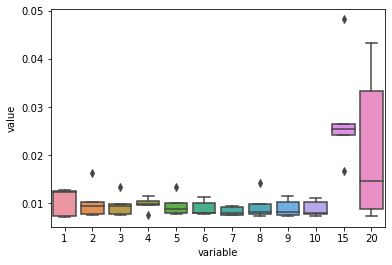

In [114]:
sns.boxplot(x='variable', y='value', data=df_melted) #7

In [122]:
dic = {}
for i in [65,70,75,80,90]:
    train_size = int(len(ds) * i/100) 
    train_dataset, test_dataset = ds[0:train_size,:], ds[train_size:len(ds),:]
    dic[i] = exp(3,5,32,250,7)
    df_1 = pd.DataFrame(dic)
df_melted = pd.melt(df_1)


Model: "sequential_275"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_587 (Dense)           (None, 32)                128       
                                                                 
 dense_588 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
15/15 - 0s - loss: 1.4181 - 227ms/epoch - 15ms/step
Epoch 2/250
15/15 - 0s - loss: 0.6672 - 19ms/epoch - 1ms/step
Epoch 3/250
15/15 - 0s - loss: 0.2385 - 27ms/epoch - 2ms/step
Epoch 4/250
15/15 - 0s - loss: 0.0554 - 24ms/epoch - 2ms/step
Epoch 5/250
15/15 - 0s - loss: 0.0068 - 28ms/epoch - 2ms/step
Epoch 6/250
15/15 - 0s - loss: 6.6947e-04 - 26ms/epoch - 2ms/step
Epoch 7/250
15/15 - 0s - loss: 7.0348e-04 - 28ms/epoch - 2ms/step
Epoch 

Epoch 114/250
15/15 - 0s - loss: 4.1381e-04 - 20ms/epoch - 1ms/step
Epoch 115/250
15/15 - 0s - loss: 4.0515e-04 - 20ms/epoch - 1ms/step
Epoch 116/250
15/15 - 0s - loss: 4.1536e-04 - 19ms/epoch - 1ms/step
Epoch 117/250
15/15 - 0s - loss: 4.1806e-04 - 18ms/epoch - 1ms/step
Epoch 118/250
15/15 - 0s - loss: 4.1215e-04 - 19ms/epoch - 1ms/step
Epoch 119/250
15/15 - 0s - loss: 3.9982e-04 - 19ms/epoch - 1ms/step
Epoch 120/250
15/15 - 0s - loss: 4.0457e-04 - 17ms/epoch - 1ms/step
Epoch 121/250
15/15 - 0s - loss: 4.0226e-04 - 20ms/epoch - 1ms/step
Epoch 122/250
15/15 - 0s - loss: 4.0752e-04 - 20ms/epoch - 1ms/step
Epoch 123/250
15/15 - 0s - loss: 4.0299e-04 - 18ms/epoch - 1ms/step
Epoch 124/250
15/15 - 0s - loss: 4.1544e-04 - 18ms/epoch - 1ms/step
Epoch 125/250
15/15 - 0s - loss: 4.1161e-04 - 18ms/epoch - 1ms/step
Epoch 126/250
15/15 - 0s - loss: 3.9669e-04 - 20ms/epoch - 1ms/step
Epoch 127/250
15/15 - 0s - loss: 4.1754e-04 - 19ms/epoch - 1ms/step
Epoch 128/250
15/15 - 0s - loss: 3.9715e-04 - 17

Epoch 235/250
15/15 - 0s - loss: 3.1158e-04 - 18ms/epoch - 1ms/step
Epoch 236/250
15/15 - 0s - loss: 3.1305e-04 - 20ms/epoch - 1ms/step
Epoch 237/250
15/15 - 0s - loss: 2.9652e-04 - 22ms/epoch - 1ms/step
Epoch 238/250
15/15 - 0s - loss: 2.9940e-04 - 18ms/epoch - 1ms/step
Epoch 239/250
15/15 - 0s - loss: 2.9162e-04 - 17ms/epoch - 1ms/step
Epoch 240/250
15/15 - 0s - loss: 2.9914e-04 - 18ms/epoch - 1ms/step
Epoch 241/250
15/15 - 0s - loss: 3.1452e-04 - 19ms/epoch - 1ms/step
Epoch 242/250
15/15 - 0s - loss: 3.3074e-04 - 17ms/epoch - 1ms/step
Epoch 243/250
15/15 - 0s - loss: 2.8609e-04 - 23ms/epoch - 2ms/step
Epoch 244/250
15/15 - 0s - loss: 2.9361e-04 - 21ms/epoch - 1ms/step
Epoch 245/250
15/15 - 0s - loss: 2.8340e-04 - 21ms/epoch - 1ms/step
Epoch 246/250
15/15 - 0s - loss: 3.1793e-04 - 26ms/epoch - 2ms/step
Epoch 247/250
15/15 - 0s - loss: 3.2481e-04 - 20ms/epoch - 1ms/step
Epoch 248/250
15/15 - 0s - loss: 2.9163e-04 - 20ms/epoch - 1ms/step
Epoch 249/250
15/15 - 0s - loss: 2.9588e-04 - 18

Epoch 95/250
15/15 - 0s - loss: 6.9020e-04 - 17ms/epoch - 1ms/step
Epoch 96/250
15/15 - 0s - loss: 6.8963e-04 - 18ms/epoch - 1ms/step
Epoch 97/250
15/15 - 0s - loss: 6.8732e-04 - 18ms/epoch - 1ms/step
Epoch 98/250
15/15 - 0s - loss: 6.8858e-04 - 17ms/epoch - 1ms/step
Epoch 99/250
15/15 - 0s - loss: 6.8513e-04 - 17ms/epoch - 1ms/step
Epoch 100/250
15/15 - 0s - loss: 6.8471e-04 - 18ms/epoch - 1ms/step
Epoch 101/250
15/15 - 0s - loss: 6.9191e-04 - 16ms/epoch - 1ms/step
Epoch 102/250
15/15 - 0s - loss: 6.7418e-04 - 18ms/epoch - 1ms/step
Epoch 103/250
15/15 - 0s - loss: 6.9116e-04 - 16ms/epoch - 1ms/step
Epoch 104/250
15/15 - 0s - loss: 6.7183e-04 - 18ms/epoch - 1ms/step
Epoch 105/250
15/15 - 0s - loss: 6.8071e-04 - 18ms/epoch - 1ms/step
Epoch 106/250
15/15 - 0s - loss: 6.7488e-04 - 20ms/epoch - 1ms/step
Epoch 107/250
15/15 - 0s - loss: 6.7727e-04 - 19ms/epoch - 1ms/step
Epoch 108/250
15/15 - 0s - loss: 6.6764e-04 - 23ms/epoch - 2ms/step
Epoch 109/250
15/15 - 0s - loss: 6.7517e-04 - 16ms/ep

Epoch 216/250
15/15 - 0s - loss: 4.6391e-04 - 30ms/epoch - 2ms/step
Epoch 217/250
15/15 - 0s - loss: 4.7380e-04 - 26ms/epoch - 2ms/step
Epoch 218/250
15/15 - 0s - loss: 4.6873e-04 - 16ms/epoch - 1ms/step
Epoch 219/250
15/15 - 0s - loss: 4.6332e-04 - 17ms/epoch - 1ms/step
Epoch 220/250
15/15 - 0s - loss: 4.5034e-04 - 17ms/epoch - 1ms/step
Epoch 221/250
15/15 - 0s - loss: 4.4786e-04 - 18ms/epoch - 1ms/step
Epoch 222/250
15/15 - 0s - loss: 4.5127e-04 - 18ms/epoch - 1ms/step
Epoch 223/250
15/15 - 0s - loss: 4.3934e-04 - 17ms/epoch - 1ms/step
Epoch 224/250
15/15 - 0s - loss: 4.6232e-04 - 18ms/epoch - 1ms/step
Epoch 225/250
15/15 - 0s - loss: 4.4244e-04 - 18ms/epoch - 1ms/step
Epoch 226/250
15/15 - 0s - loss: 4.4703e-04 - 17ms/epoch - 1ms/step
Epoch 227/250
15/15 - 0s - loss: 4.5329e-04 - 19ms/epoch - 1ms/step
Epoch 228/250
15/15 - 0s - loss: 4.8321e-04 - 17ms/epoch - 1ms/step
Epoch 229/250
15/15 - 0s - loss: 4.6748e-04 - 17ms/epoch - 1ms/step
Epoch 230/250
15/15 - 0s - loss: 4.3175e-04 - 24

Epoch 75/250
15/15 - 0s - loss: 6.7461e-04 - 19ms/epoch - 1ms/step
Epoch 76/250
15/15 - 0s - loss: 6.7043e-04 - 20ms/epoch - 1ms/step
Epoch 77/250
15/15 - 0s - loss: 6.6919e-04 - 19ms/epoch - 1ms/step
Epoch 78/250
15/15 - 0s - loss: 6.6978e-04 - 24ms/epoch - 2ms/step
Epoch 79/250
15/15 - 0s - loss: 6.7013e-04 - 19ms/epoch - 1ms/step
Epoch 80/250
15/15 - 0s - loss: 6.6770e-04 - 19ms/epoch - 1ms/step
Epoch 81/250
15/15 - 0s - loss: 6.6533e-04 - 23ms/epoch - 2ms/step
Epoch 82/250
15/15 - 0s - loss: 6.6687e-04 - 19ms/epoch - 1ms/step
Epoch 83/250
15/15 - 0s - loss: 6.7025e-04 - 19ms/epoch - 1ms/step
Epoch 84/250
15/15 - 0s - loss: 6.6391e-04 - 19ms/epoch - 1ms/step
Epoch 85/250
15/15 - 0s - loss: 6.6102e-04 - 22ms/epoch - 1ms/step
Epoch 86/250
15/15 - 0s - loss: 6.6778e-04 - 21ms/epoch - 1ms/step
Epoch 87/250
15/15 - 0s - loss: 6.6295e-04 - 21ms/epoch - 1ms/step
Epoch 88/250
15/15 - 0s - loss: 6.5939e-04 - 22ms/epoch - 1ms/step
Epoch 89/250
15/15 - 0s - loss: 6.5612e-04 - 20ms/epoch - 1ms/

Epoch 196/250
15/15 - 0s - loss: 5.0233e-04 - 19ms/epoch - 1ms/step
Epoch 197/250
15/15 - 0s - loss: 5.0775e-04 - 18ms/epoch - 1ms/step
Epoch 198/250
15/15 - 0s - loss: 5.0745e-04 - 18ms/epoch - 1ms/step
Epoch 199/250
15/15 - 0s - loss: 4.9264e-04 - 20ms/epoch - 1ms/step
Epoch 200/250
15/15 - 0s - loss: 4.9399e-04 - 19ms/epoch - 1ms/step
Epoch 201/250
15/15 - 0s - loss: 5.0072e-04 - 18ms/epoch - 1ms/step
Epoch 202/250
15/15 - 0s - loss: 4.8345e-04 - 23ms/epoch - 2ms/step
Epoch 203/250
15/15 - 0s - loss: 4.8248e-04 - 19ms/epoch - 1ms/step
Epoch 204/250
15/15 - 0s - loss: 4.8011e-04 - 16ms/epoch - 1ms/step
Epoch 205/250
15/15 - 0s - loss: 4.7911e-04 - 18ms/epoch - 1ms/step
Epoch 206/250
15/15 - 0s - loss: 4.7591e-04 - 19ms/epoch - 1ms/step
Epoch 207/250
15/15 - 0s - loss: 4.8029e-04 - 17ms/epoch - 1ms/step
Epoch 208/250
15/15 - 0s - loss: 4.7436e-04 - 17ms/epoch - 1ms/step
Epoch 209/250
15/15 - 0s - loss: 4.7790e-04 - 18ms/epoch - 1ms/step
Epoch 210/250
15/15 - 0s - loss: 4.7907e-04 - 18

Epoch 55/250
15/15 - 0s - loss: 6.4047e-04 - 21ms/epoch - 1ms/step
Epoch 56/250
15/15 - 0s - loss: 6.4175e-04 - 21ms/epoch - 1ms/step
Epoch 57/250
15/15 - 0s - loss: 6.3618e-04 - 21ms/epoch - 1ms/step
Epoch 58/250
15/15 - 0s - loss: 6.3660e-04 - 20ms/epoch - 1ms/step
Epoch 59/250
15/15 - 0s - loss: 6.3577e-04 - 19ms/epoch - 1ms/step
Epoch 60/250
15/15 - 0s - loss: 6.3484e-04 - 19ms/epoch - 1ms/step
Epoch 61/250
15/15 - 0s - loss: 6.3667e-04 - 23ms/epoch - 2ms/step
Epoch 62/250
15/15 - 0s - loss: 6.4014e-04 - 19ms/epoch - 1ms/step
Epoch 63/250
15/15 - 0s - loss: 6.3037e-04 - 21ms/epoch - 1ms/step
Epoch 64/250
15/15 - 0s - loss: 6.4481e-04 - 22ms/epoch - 1ms/step
Epoch 65/250
15/15 - 0s - loss: 6.3108e-04 - 20ms/epoch - 1ms/step
Epoch 66/250
15/15 - 0s - loss: 6.2750e-04 - 20ms/epoch - 1ms/step
Epoch 67/250
15/15 - 0s - loss: 6.2502e-04 - 21ms/epoch - 1ms/step
Epoch 68/250
15/15 - 0s - loss: 6.2239e-04 - 21ms/epoch - 1ms/step
Epoch 69/250
15/15 - 0s - loss: 6.2125e-04 - 21ms/epoch - 1ms/

15/15 - 0s - loss: 4.8714e-04 - 16ms/epoch - 1ms/step
Epoch 177/250
15/15 - 0s - loss: 4.8077e-04 - 22ms/epoch - 1ms/step
Epoch 178/250
15/15 - 0s - loss: 5.0346e-04 - 19ms/epoch - 1ms/step
Epoch 179/250
15/15 - 0s - loss: 4.9013e-04 - 19ms/epoch - 1ms/step
Epoch 180/250
15/15 - 0s - loss: 4.8380e-04 - 18ms/epoch - 1ms/step
Epoch 181/250
15/15 - 0s - loss: 4.8960e-04 - 19ms/epoch - 1ms/step
Epoch 182/250
15/15 - 0s - loss: 4.8872e-04 - 18ms/epoch - 1ms/step
Epoch 183/250
15/15 - 0s - loss: 4.7936e-04 - 18ms/epoch - 1ms/step
Epoch 184/250
15/15 - 0s - loss: 4.5843e-04 - 20ms/epoch - 1ms/step
Epoch 185/250
15/15 - 0s - loss: 4.4099e-04 - 20ms/epoch - 1ms/step
Epoch 186/250
15/15 - 0s - loss: 4.8331e-04 - 18ms/epoch - 1ms/step
Epoch 187/250
15/15 - 0s - loss: 4.6708e-04 - 18ms/epoch - 1ms/step
Epoch 188/250
15/15 - 0s - loss: 4.5203e-04 - 18ms/epoch - 1ms/step
Epoch 189/250
15/15 - 0s - loss: 4.5371e-04 - 17ms/epoch - 1ms/step
Epoch 190/250
15/15 - 0s - loss: 4.5049e-04 - 20ms/epoch - 1ms

Epoch 35/250
15/15 - 0s - loss: 3.8570e-04 - 17ms/epoch - 1ms/step
Epoch 36/250
15/15 - 0s - loss: 3.8309e-04 - 21ms/epoch - 1ms/step
Epoch 37/250
15/15 - 0s - loss: 3.8182e-04 - 21ms/epoch - 1ms/step
Epoch 38/250
15/15 - 0s - loss: 3.8288e-04 - 16ms/epoch - 1ms/step
Epoch 39/250
15/15 - 0s - loss: 3.8793e-04 - 23ms/epoch - 2ms/step
Epoch 40/250
15/15 - 0s - loss: 3.8300e-04 - 24ms/epoch - 2ms/step
Epoch 41/250
15/15 - 0s - loss: 3.7748e-04 - 17ms/epoch - 1ms/step
Epoch 42/250
15/15 - 0s - loss: 3.7953e-04 - 22ms/epoch - 1ms/step
Epoch 43/250
15/15 - 0s - loss: 3.7786e-04 - 23ms/epoch - 2ms/step
Epoch 44/250
15/15 - 0s - loss: 3.7514e-04 - 23ms/epoch - 2ms/step
Epoch 45/250
15/15 - 0s - loss: 3.7446e-04 - 20ms/epoch - 1ms/step
Epoch 46/250
15/15 - 0s - loss: 3.7440e-04 - 20ms/epoch - 1ms/step
Epoch 47/250
15/15 - 0s - loss: 3.6808e-04 - 23ms/epoch - 2ms/step
Epoch 48/250
15/15 - 0s - loss: 3.7728e-04 - 21ms/epoch - 1ms/step
Epoch 49/250
15/15 - 0s - loss: 3.7466e-04 - 20ms/epoch - 1ms/

Epoch 157/250
15/15 - 0s - loss: 2.9486e-04 - 21ms/epoch - 1ms/step
Epoch 158/250
15/15 - 0s - loss: 2.7826e-04 - 20ms/epoch - 1ms/step
Epoch 159/250
15/15 - 0s - loss: 2.6489e-04 - 13ms/epoch - 862us/step
Epoch 160/250
15/15 - 0s - loss: 2.8988e-04 - 21ms/epoch - 1ms/step
Epoch 161/250
15/15 - 0s - loss: 2.9087e-04 - 22ms/epoch - 1ms/step
Epoch 162/250
15/15 - 0s - loss: 2.9937e-04 - 17ms/epoch - 1ms/step
Epoch 163/250
15/15 - 0s - loss: 2.8290e-04 - 23ms/epoch - 2ms/step
Epoch 164/250
15/15 - 0s - loss: 2.9068e-04 - 25ms/epoch - 2ms/step
Epoch 165/250
15/15 - 0s - loss: 2.7659e-04 - 17ms/epoch - 1ms/step
Epoch 166/250
15/15 - 0s - loss: 2.7061e-04 - 23ms/epoch - 2ms/step
Epoch 167/250
15/15 - 0s - loss: 2.6361e-04 - 25ms/epoch - 2ms/step
Epoch 168/250
15/15 - 0s - loss: 2.9461e-04 - 24ms/epoch - 2ms/step
Epoch 169/250
15/15 - 0s - loss: 2.9955e-04 - 17ms/epoch - 1ms/step
Epoch 170/250
15/15 - 0s - loss: 2.8299e-04 - 23ms/epoch - 2ms/step
Epoch 171/250
15/15 - 0s - loss: 2.6327e-04 - 

Epoch 15/250
17/17 - 0s - loss: 6.3227e-04 - 30ms/epoch - 2ms/step
Epoch 16/250
17/17 - 0s - loss: 6.2968e-04 - 23ms/epoch - 1ms/step
Epoch 17/250
17/17 - 0s - loss: 6.2955e-04 - 28ms/epoch - 2ms/step
Epoch 18/250
17/17 - 0s - loss: 6.2939e-04 - 27ms/epoch - 2ms/step
Epoch 19/250
17/17 - 0s - loss: 6.3432e-04 - 22ms/epoch - 1ms/step
Epoch 20/250
17/17 - 0s - loss: 6.2656e-04 - 24ms/epoch - 1ms/step
Epoch 21/250
17/17 - 0s - loss: 6.2660e-04 - 22ms/epoch - 1ms/step
Epoch 22/250
17/17 - 0s - loss: 6.3249e-04 - 27ms/epoch - 2ms/step
Epoch 23/250
17/17 - 0s - loss: 6.2473e-04 - 24ms/epoch - 1ms/step
Epoch 24/250
17/17 - 0s - loss: 6.2673e-04 - 28ms/epoch - 2ms/step
Epoch 25/250
17/17 - 0s - loss: 6.2585e-04 - 23ms/epoch - 1ms/step
Epoch 26/250
17/17 - 0s - loss: 6.2884e-04 - 26ms/epoch - 2ms/step
Epoch 27/250
17/17 - 0s - loss: 6.2716e-04 - 25ms/epoch - 1ms/step
Epoch 28/250
17/17 - 0s - loss: 6.2173e-04 - 23ms/epoch - 1ms/step
Epoch 29/250
17/17 - 0s - loss: 6.1944e-04 - 26ms/epoch - 2ms/

Epoch 137/250
17/17 - 0s - loss: 4.6106e-04 - 21ms/epoch - 1ms/step
Epoch 138/250
17/17 - 0s - loss: 4.4279e-04 - 26ms/epoch - 2ms/step
Epoch 139/250
17/17 - 0s - loss: 4.7221e-04 - 22ms/epoch - 1ms/step
Epoch 140/250
17/17 - 0s - loss: 4.3686e-04 - 27ms/epoch - 2ms/step
Epoch 141/250
17/17 - 0s - loss: 4.4964e-04 - 22ms/epoch - 1ms/step
Epoch 142/250
17/17 - 0s - loss: 4.7036e-04 - 25ms/epoch - 1ms/step
Epoch 143/250
17/17 - 0s - loss: 4.2836e-04 - 24ms/epoch - 1ms/step
Epoch 144/250
17/17 - 0s - loss: 4.2247e-04 - 24ms/epoch - 1ms/step
Epoch 145/250
17/17 - 0s - loss: 4.2353e-04 - 27ms/epoch - 2ms/step
Epoch 146/250
17/17 - 0s - loss: 4.3399e-04 - 26ms/epoch - 2ms/step
Epoch 147/250
17/17 - 0s - loss: 4.3600e-04 - 26ms/epoch - 2ms/step
Epoch 148/250
17/17 - 0s - loss: 4.1563e-04 - 25ms/epoch - 1ms/step
Epoch 149/250
17/17 - 0s - loss: 4.3673e-04 - 26ms/epoch - 2ms/step
Epoch 150/250
17/17 - 0s - loss: 4.2227e-04 - 24ms/epoch - 1ms/step
Epoch 151/250
17/17 - 0s - loss: 4.3652e-04 - 29

 dense_599 (Dense)           (None, 32)                128       
                                                                 
 dense_600 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
17/17 - 0s - loss: 0.0119 - 336ms/epoch - 20ms/step
Epoch 2/250
17/17 - 0s - loss: 0.0014 - 19ms/epoch - 1ms/step
Epoch 3/250
17/17 - 0s - loss: 4.4337e-04 - 25ms/epoch - 1ms/step
Epoch 4/250
17/17 - 0s - loss: 3.0643e-04 - 27ms/epoch - 2ms/step
Epoch 5/250
17/17 - 0s - loss: 3.0755e-04 - 26ms/epoch - 2ms/step
Epoch 6/250
17/17 - 0s - loss: 3.1141e-04 - 26ms/epoch - 2ms/step
Epoch 7/250
17/17 - 0s - loss: 3.4634e-04 - 26ms/epoch - 2ms/step
Epoch 8/250
17/17 - 0s - loss: 2.9725e-04 - 28ms/epoch - 2ms/step
Epoch 9/250
17/17 - 0s - loss: 2.9521e-04 - 29ms/epoch - 2ms/step
Epoch 10/250
17/17

Epoch 117/250
17/17 - 0s - loss: 3.0404e-04 - 26ms/epoch - 2ms/step
Epoch 118/250
17/17 - 0s - loss: 2.8250e-04 - 24ms/epoch - 1ms/step
Epoch 119/250
17/17 - 0s - loss: 3.3576e-04 - 22ms/epoch - 1ms/step
Epoch 120/250
17/17 - 0s - loss: 3.2471e-04 - 26ms/epoch - 2ms/step
Epoch 121/250
17/17 - 0s - loss: 2.7688e-04 - 22ms/epoch - 1ms/step
Epoch 122/250
17/17 - 0s - loss: 3.8305e-04 - 27ms/epoch - 2ms/step
Epoch 123/250
17/17 - 0s - loss: 2.8097e-04 - 27ms/epoch - 2ms/step
Epoch 124/250
17/17 - 0s - loss: 2.7736e-04 - 29ms/epoch - 2ms/step
Epoch 125/250
17/17 - 0s - loss: 2.9478e-04 - 25ms/epoch - 1ms/step
Epoch 126/250
17/17 - 0s - loss: 3.2675e-04 - 24ms/epoch - 1ms/step
Epoch 127/250
17/17 - 0s - loss: 3.0278e-04 - 29ms/epoch - 2ms/step
Epoch 128/250
17/17 - 0s - loss: 2.9379e-04 - 29ms/epoch - 2ms/step
Epoch 129/250
17/17 - 0s - loss: 2.7551e-04 - 26ms/epoch - 2ms/step
Epoch 130/250
17/17 - 0s - loss: 2.5469e-04 - 21ms/epoch - 1ms/step
Epoch 131/250
17/17 - 0s - loss: 0.0012 - 28ms/e

Epoch 238/250
17/17 - 0s - loss: 3.8074e-04 - 28ms/epoch - 2ms/step
Epoch 239/250
17/17 - 0s - loss: 3.0306e-04 - 25ms/epoch - 1ms/step
Epoch 240/250
17/17 - 0s - loss: 3.7395e-04 - 26ms/epoch - 2ms/step
Epoch 241/250
17/17 - 0s - loss: 2.5155e-04 - 25ms/epoch - 1ms/step
Epoch 242/250
17/17 - 0s - loss: 2.7855e-04 - 27ms/epoch - 2ms/step
Epoch 243/250
17/17 - 0s - loss: 2.7777e-04 - 26ms/epoch - 2ms/step
Epoch 244/250
17/17 - 0s - loss: 2.7647e-04 - 22ms/epoch - 1ms/step
Epoch 245/250
17/17 - 0s - loss: 3.7776e-04 - 28ms/epoch - 2ms/step
Epoch 246/250
17/17 - 0s - loss: 3.1184e-04 - 23ms/epoch - 1ms/step
Epoch 247/250
17/17 - 0s - loss: 3.5840e-04 - 23ms/epoch - 1ms/step
Epoch 248/250
17/17 - 0s - loss: 2.7690e-04 - 20ms/epoch - 1ms/step
Epoch 249/250
17/17 - 0s - loss: 2.8718e-04 - 26ms/epoch - 2ms/step
Epoch 250/250
17/17 - 0s - loss: 2.7213e-04 - 23ms/epoch - 1ms/step
4/4 [==============================] - 0s 2ms/step - loss: 6.8586e-04
Train Score: 0.0007 MSE (0.02619 RMSE)
2/2 [==

17/17 - 0s - loss: 9.0454e-04 - 23ms/epoch - 1ms/step
Epoch 101/250
17/17 - 0s - loss: 8.8408e-04 - 24ms/epoch - 1ms/step
Epoch 102/250
17/17 - 0s - loss: 9.0790e-04 - 23ms/epoch - 1ms/step
Epoch 103/250
17/17 - 0s - loss: 8.8582e-04 - 24ms/epoch - 1ms/step
Epoch 104/250
17/17 - 0s - loss: 9.2386e-04 - 27ms/epoch - 2ms/step
Epoch 105/250
17/17 - 0s - loss: 8.7838e-04 - 23ms/epoch - 1ms/step
Epoch 106/250
17/17 - 0s - loss: 8.7288e-04 - 26ms/epoch - 2ms/step
Epoch 107/250
17/17 - 0s - loss: 9.0496e-04 - 25ms/epoch - 1ms/step
Epoch 108/250
17/17 - 0s - loss: 8.7237e-04 - 24ms/epoch - 1ms/step
Epoch 109/250
17/17 - 0s - loss: 8.7698e-04 - 25ms/epoch - 1ms/step
Epoch 110/250
17/17 - 0s - loss: 8.7198e-04 - 23ms/epoch - 1ms/step
Epoch 111/250
17/17 - 0s - loss: 8.6669e-04 - 25ms/epoch - 1ms/step
Epoch 112/250
17/17 - 0s - loss: 8.7193e-04 - 22ms/epoch - 1ms/step
Epoch 113/250
17/17 - 0s - loss: 8.5728e-04 - 26ms/epoch - 2ms/step
Epoch 114/250
17/17 - 0s - loss: 8.5173e-04 - 24ms/epoch - 1ms

Epoch 221/250
17/17 - 0s - loss: 4.9989e-04 - 23ms/epoch - 1ms/step
Epoch 222/250
17/17 - 0s - loss: 5.0275e-04 - 22ms/epoch - 1ms/step
Epoch 223/250
17/17 - 0s - loss: 5.2157e-04 - 19ms/epoch - 1ms/step
Epoch 224/250
17/17 - 0s - loss: 4.9955e-04 - 24ms/epoch - 1ms/step
Epoch 225/250
17/17 - 0s - loss: 5.0523e-04 - 19ms/epoch - 1ms/step
Epoch 226/250
17/17 - 0s - loss: 4.8485e-04 - 25ms/epoch - 1ms/step
Epoch 227/250
17/17 - 0s - loss: 5.0590e-04 - 17ms/epoch - 997us/step
Epoch 228/250
17/17 - 0s - loss: 5.0910e-04 - 25ms/epoch - 1ms/step
Epoch 229/250
17/17 - 0s - loss: 4.8733e-04 - 23ms/epoch - 1ms/step
Epoch 230/250
17/17 - 0s - loss: 5.0723e-04 - 19ms/epoch - 1ms/step
Epoch 231/250
17/17 - 0s - loss: 5.1561e-04 - 23ms/epoch - 1ms/step
Epoch 232/250
17/17 - 0s - loss: 4.6983e-04 - 21ms/epoch - 1ms/step
Epoch 233/250
17/17 - 0s - loss: 4.6821e-04 - 17ms/epoch - 999us/step
Epoch 234/250
17/17 - 0s - loss: 4.8433e-04 - 23ms/epoch - 1ms/step
Epoch 235/250
17/17 - 0s - loss: 4.5019e-04 

Epoch 80/250
17/17 - 0s - loss: 6.1525e-04 - 28ms/epoch - 2ms/step
Epoch 81/250
17/17 - 0s - loss: 6.2423e-04 - 23ms/epoch - 1ms/step
Epoch 82/250
17/17 - 0s - loss: 5.7049e-04 - 25ms/epoch - 1ms/step
Epoch 83/250
17/17 - 0s - loss: 5.6943e-04 - 24ms/epoch - 1ms/step
Epoch 84/250
17/17 - 0s - loss: 5.7105e-04 - 23ms/epoch - 1ms/step
Epoch 85/250
17/17 - 0s - loss: 5.6883e-04 - 26ms/epoch - 2ms/step
Epoch 86/250
17/17 - 0s - loss: 5.8897e-04 - 22ms/epoch - 1ms/step
Epoch 87/250
17/17 - 0s - loss: 5.7523e-04 - 26ms/epoch - 2ms/step
Epoch 88/250
17/17 - 0s - loss: 5.7675e-04 - 22ms/epoch - 1ms/step
Epoch 89/250
17/17 - 0s - loss: 5.7782e-04 - 22ms/epoch - 1ms/step
Epoch 90/250
17/17 - 0s - loss: 5.6081e-04 - 25ms/epoch - 1ms/step
Epoch 91/250
17/17 - 0s - loss: 5.5576e-04 - 26ms/epoch - 2ms/step
Epoch 92/250
17/17 - 0s - loss: 5.4794e-04 - 22ms/epoch - 1ms/step
Epoch 93/250
17/17 - 0s - loss: 5.4310e-04 - 26ms/epoch - 2ms/step
Epoch 94/250
17/17 - 0s - loss: 5.6278e-04 - 28ms/epoch - 2ms/

Epoch 201/250
17/17 - 0s - loss: 3.8324e-04 - 27ms/epoch - 2ms/step
Epoch 202/250
17/17 - 0s - loss: 3.0257e-04 - 26ms/epoch - 2ms/step
Epoch 203/250
17/17 - 0s - loss: 3.2759e-04 - 22ms/epoch - 1ms/step
Epoch 204/250
17/17 - 0s - loss: 3.6162e-04 - 25ms/epoch - 1ms/step
Epoch 205/250
17/17 - 0s - loss: 2.9997e-04 - 20ms/epoch - 1ms/step
Epoch 206/250
17/17 - 0s - loss: 3.3308e-04 - 27ms/epoch - 2ms/step
Epoch 207/250
17/17 - 0s - loss: 2.9441e-04 - 22ms/epoch - 1ms/step
Epoch 208/250
17/17 - 0s - loss: 3.0406e-04 - 25ms/epoch - 1ms/step
Epoch 209/250
17/17 - 0s - loss: 2.8781e-04 - 25ms/epoch - 1ms/step
Epoch 210/250
17/17 - 0s - loss: 3.0786e-04 - 26ms/epoch - 2ms/step
Epoch 211/250
17/17 - 0s - loss: 2.9023e-04 - 23ms/epoch - 1ms/step
Epoch 212/250
17/17 - 0s - loss: 3.2910e-04 - 28ms/epoch - 2ms/step
Epoch 213/250
17/17 - 0s - loss: 3.0106e-04 - 25ms/epoch - 1ms/step
Epoch 214/250
17/17 - 0s - loss: 2.8320e-04 - 22ms/epoch - 1ms/step
Epoch 215/250
17/17 - 0s - loss: 3.1881e-04 - 22

Epoch 63/250
17/17 - 0s - loss: 0.0010 - 20ms/epoch - 1ms/step
Epoch 64/250
17/17 - 0s - loss: 0.0010 - 25ms/epoch - 1ms/step
Epoch 65/250
17/17 - 0s - loss: 0.0010 - 23ms/epoch - 1ms/step
Epoch 66/250
17/17 - 0s - loss: 9.9684e-04 - 23ms/epoch - 1ms/step
Epoch 67/250
17/17 - 0s - loss: 0.0010 - 24ms/epoch - 1ms/step
Epoch 68/250
17/17 - 0s - loss: 9.9760e-04 - 25ms/epoch - 1ms/step
Epoch 69/250
17/17 - 0s - loss: 9.9104e-04 - 22ms/epoch - 1ms/step
Epoch 70/250
17/17 - 0s - loss: 0.0010 - 23ms/epoch - 1ms/step
Epoch 71/250
17/17 - 0s - loss: 9.9391e-04 - 26ms/epoch - 2ms/step
Epoch 72/250
17/17 - 0s - loss: 9.8006e-04 - 23ms/epoch - 1ms/step
Epoch 73/250
17/17 - 0s - loss: 9.8645e-04 - 22ms/epoch - 1ms/step
Epoch 74/250
17/17 - 0s - loss: 9.7830e-04 - 39ms/epoch - 2ms/step
Epoch 75/250
17/17 - 0s - loss: 9.7118e-04 - 21ms/epoch - 1ms/step
Epoch 76/250
17/17 - 0s - loss: 9.7331e-04 - 23ms/epoch - 1ms/step
Epoch 77/250
17/17 - 0s - loss: 9.7048e-04 - 22ms/epoch - 1ms/step
Epoch 78/250
17

Epoch 185/250
17/17 - 0s - loss: 5.6949e-04 - 28ms/epoch - 2ms/step
Epoch 186/250
17/17 - 0s - loss: 6.5018e-04 - 21ms/epoch - 1ms/step
Epoch 187/250
17/17 - 0s - loss: 5.8222e-04 - 27ms/epoch - 2ms/step
Epoch 188/250
17/17 - 0s - loss: 5.5303e-04 - 23ms/epoch - 1ms/step
Epoch 189/250
17/17 - 0s - loss: 5.4930e-04 - 22ms/epoch - 1ms/step
Epoch 190/250
17/17 - 0s - loss: 5.5755e-04 - 25ms/epoch - 1ms/step
Epoch 191/250
17/17 - 0s - loss: 5.3775e-04 - 21ms/epoch - 1ms/step
Epoch 192/250
17/17 - 0s - loss: 5.3638e-04 - 25ms/epoch - 1ms/step
Epoch 193/250
17/17 - 0s - loss: 5.3438e-04 - 27ms/epoch - 2ms/step
Epoch 194/250
17/17 - 0s - loss: 5.2452e-04 - 25ms/epoch - 1ms/step
Epoch 195/250
17/17 - 0s - loss: 5.2567e-04 - 22ms/epoch - 1ms/step
Epoch 196/250
17/17 - 0s - loss: 5.5090e-04 - 26ms/epoch - 2ms/step
Epoch 197/250
17/17 - 0s - loss: 5.1657e-04 - 24ms/epoch - 1ms/step
Epoch 198/250
17/17 - 0s - loss: 5.6276e-04 - 28ms/epoch - 2ms/step
Epoch 199/250
17/17 - 0s - loss: 5.2066e-04 - 24

Epoch 46/250
18/18 - 0s - loss: 0.0013 - 32ms/epoch - 2ms/step
Epoch 47/250
18/18 - 0s - loss: 0.0013 - 33ms/epoch - 2ms/step
Epoch 48/250
18/18 - 0s - loss: 0.0013 - 37ms/epoch - 2ms/step
Epoch 49/250
18/18 - 0s - loss: 0.0013 - 31ms/epoch - 2ms/step
Epoch 50/250
18/18 - 0s - loss: 0.0013 - 30ms/epoch - 2ms/step
Epoch 51/250
18/18 - 0s - loss: 0.0013 - 23ms/epoch - 1ms/step
Epoch 52/250
18/18 - 0s - loss: 0.0013 - 31ms/epoch - 2ms/step
Epoch 53/250
18/18 - 0s - loss: 0.0012 - 29ms/epoch - 2ms/step
Epoch 54/250
18/18 - 0s - loss: 0.0012 - 22ms/epoch - 1ms/step
Epoch 55/250
18/18 - 0s - loss: 0.0012 - 28ms/epoch - 2ms/step
Epoch 56/250
18/18 - 0s - loss: 0.0012 - 26ms/epoch - 1ms/step
Epoch 57/250
18/18 - 0s - loss: 0.0012 - 28ms/epoch - 2ms/step
Epoch 58/250
18/18 - 0s - loss: 0.0012 - 26ms/epoch - 1ms/step
Epoch 59/250
18/18 - 0s - loss: 0.0012 - 32ms/epoch - 2ms/step
Epoch 60/250
18/18 - 0s - loss: 0.0012 - 27ms/epoch - 1ms/step
Epoch 61/250
18/18 - 0s - loss: 0.0012 - 33ms/epoch - 2

Epoch 173/250
18/18 - 0s - loss: 8.3363e-04 - 27ms/epoch - 1ms/step
Epoch 174/250
18/18 - 0s - loss: 8.3461e-04 - 26ms/epoch - 1ms/step
Epoch 175/250
18/18 - 0s - loss: 8.1886e-04 - 25ms/epoch - 1ms/step
Epoch 176/250
18/18 - 0s - loss: 8.0846e-04 - 27ms/epoch - 1ms/step
Epoch 177/250
18/18 - 0s - loss: 8.1015e-04 - 25ms/epoch - 1ms/step
Epoch 178/250
18/18 - 0s - loss: 8.0655e-04 - 24ms/epoch - 1ms/step
Epoch 179/250
18/18 - 0s - loss: 7.9935e-04 - 25ms/epoch - 1ms/step
Epoch 180/250
18/18 - 0s - loss: 7.9336e-04 - 25ms/epoch - 1ms/step
Epoch 181/250
18/18 - 0s - loss: 7.8914e-04 - 27ms/epoch - 1ms/step
Epoch 182/250
18/18 - 0s - loss: 7.8717e-04 - 23ms/epoch - 1ms/step
Epoch 183/250
18/18 - 0s - loss: 7.9248e-04 - 27ms/epoch - 1ms/step
Epoch 184/250
18/18 - 0s - loss: 7.8320e-04 - 26ms/epoch - 1ms/step
Epoch 185/250
18/18 - 0s - loss: 7.7170e-04 - 27ms/epoch - 1ms/step
Epoch 186/250
18/18 - 0s - loss: 7.7102e-04 - 23ms/epoch - 1ms/step
Epoch 187/250
18/18 - 0s - loss: 7.7307e-04 - 27

18/18 - 0s - loss: 6.2406e-04 - 28ms/epoch - 2ms/step
Epoch 32/250
18/18 - 0s - loss: 6.1944e-04 - 28ms/epoch - 2ms/step
Epoch 33/250
18/18 - 0s - loss: 6.2515e-04 - 23ms/epoch - 1ms/step
Epoch 34/250
18/18 - 0s - loss: 6.2162e-04 - 27ms/epoch - 1ms/step
Epoch 35/250
18/18 - 0s - loss: 6.1509e-04 - 22ms/epoch - 1ms/step
Epoch 36/250
18/18 - 0s - loss: 6.1900e-04 - 28ms/epoch - 2ms/step
Epoch 37/250
18/18 - 0s - loss: 6.1068e-04 - 28ms/epoch - 2ms/step
Epoch 38/250
18/18 - 0s - loss: 6.2027e-04 - 22ms/epoch - 1ms/step
Epoch 39/250
18/18 - 0s - loss: 6.0887e-04 - 29ms/epoch - 2ms/step
Epoch 40/250
18/18 - 0s - loss: 6.1017e-04 - 24ms/epoch - 1ms/step
Epoch 41/250
18/18 - 0s - loss: 6.1050e-04 - 23ms/epoch - 1ms/step
Epoch 42/250
18/18 - 0s - loss: 6.0670e-04 - 26ms/epoch - 1ms/step
Epoch 43/250
18/18 - 0s - loss: 6.0233e-04 - 23ms/epoch - 1ms/step
Epoch 44/250
18/18 - 0s - loss: 6.0402e-04 - 28ms/epoch - 2ms/step
Epoch 45/250
18/18 - 0s - loss: 6.0033e-04 - 24ms/epoch - 1ms/step
Epoch 46

Epoch 153/250
18/18 - 0s - loss: 4.1042e-04 - 24ms/epoch - 1ms/step
Epoch 154/250
18/18 - 0s - loss: 4.0390e-04 - 27ms/epoch - 1ms/step
Epoch 155/250
18/18 - 0s - loss: 3.9276e-04 - 25ms/epoch - 1ms/step
Epoch 156/250
18/18 - 0s - loss: 4.1378e-04 - 23ms/epoch - 1ms/step
Epoch 157/250
18/18 - 0s - loss: 3.9180e-04 - 27ms/epoch - 2ms/step
Epoch 158/250
18/18 - 0s - loss: 4.1772e-04 - 25ms/epoch - 1ms/step
Epoch 159/250
18/18 - 0s - loss: 4.3873e-04 - 21ms/epoch - 1ms/step
Epoch 160/250
18/18 - 0s - loss: 3.9885e-04 - 26ms/epoch - 1ms/step
Epoch 161/250
18/18 - 0s - loss: 3.9575e-04 - 22ms/epoch - 1ms/step
Epoch 162/250
18/18 - 0s - loss: 3.8372e-04 - 23ms/epoch - 1ms/step
Epoch 163/250
18/18 - 0s - loss: 4.0999e-04 - 24ms/epoch - 1ms/step
Epoch 164/250
18/18 - 0s - loss: 3.9543e-04 - 25ms/epoch - 1ms/step
Epoch 165/250
18/18 - 0s - loss: 4.1059e-04 - 23ms/epoch - 1ms/step
Epoch 166/250
18/18 - 0s - loss: 3.8326e-04 - 28ms/epoch - 2ms/step
Epoch 167/250
18/18 - 0s - loss: 3.9971e-04 - 27

Epoch 11/250
18/18 - 0s - loss: 7.5117e-04 - 25ms/epoch - 1ms/step
Epoch 12/250
18/18 - 0s - loss: 7.4846e-04 - 23ms/epoch - 1ms/step
Epoch 13/250
18/18 - 0s - loss: 7.5712e-04 - 26ms/epoch - 1ms/step
Epoch 14/250
18/18 - 0s - loss: 7.4677e-04 - 23ms/epoch - 1ms/step
Epoch 15/250
18/18 - 0s - loss: 7.4753e-04 - 25ms/epoch - 1ms/step
Epoch 16/250
18/18 - 0s - loss: 7.4543e-04 - 22ms/epoch - 1ms/step
Epoch 17/250
18/18 - 0s - loss: 7.5073e-04 - 27ms/epoch - 1ms/step
Epoch 18/250
18/18 - 0s - loss: 7.4660e-04 - 22ms/epoch - 1ms/step
Epoch 19/250
18/18 - 0s - loss: 7.4472e-04 - 26ms/epoch - 1ms/step
Epoch 20/250
18/18 - 0s - loss: 7.4254e-04 - 22ms/epoch - 1ms/step
Epoch 21/250
18/18 - 0s - loss: 7.4014e-04 - 24ms/epoch - 1ms/step
Epoch 22/250
18/18 - 0s - loss: 7.3995e-04 - 21ms/epoch - 1ms/step
Epoch 23/250
18/18 - 0s - loss: 7.4259e-04 - 26ms/epoch - 1ms/step
Epoch 24/250
18/18 - 0s - loss: 7.3712e-04 - 22ms/epoch - 1ms/step
Epoch 25/250
18/18 - 0s - loss: 7.3635e-04 - 28ms/epoch - 2ms/

Epoch 133/250
18/18 - 0s - loss: 5.1099e-04 - 27ms/epoch - 1ms/step
Epoch 134/250
18/18 - 0s - loss: 5.1065e-04 - 23ms/epoch - 1ms/step
Epoch 135/250
18/18 - 0s - loss: 4.9095e-04 - 26ms/epoch - 1ms/step
Epoch 136/250
18/18 - 0s - loss: 4.8926e-04 - 23ms/epoch - 1ms/step
Epoch 137/250
18/18 - 0s - loss: 4.6837e-04 - 24ms/epoch - 1ms/step
Epoch 138/250
18/18 - 0s - loss: 4.6947e-04 - 23ms/epoch - 1ms/step
Epoch 139/250
18/18 - 0s - loss: 4.8253e-04 - 25ms/epoch - 1ms/step
Epoch 140/250
18/18 - 0s - loss: 4.6602e-04 - 24ms/epoch - 1ms/step
Epoch 141/250
18/18 - 0s - loss: 4.6591e-04 - 24ms/epoch - 1ms/step
Epoch 142/250
18/18 - 0s - loss: 4.6020e-04 - 24ms/epoch - 1ms/step
Epoch 143/250
18/18 - 0s - loss: 4.5822e-04 - 26ms/epoch - 1ms/step
Epoch 144/250
18/18 - 0s - loss: 4.6185e-04 - 26ms/epoch - 1ms/step
Epoch 145/250
18/18 - 0s - loss: 4.6685e-04 - 22ms/epoch - 1ms/step
Epoch 146/250
18/18 - 0s - loss: 4.4975e-04 - 25ms/epoch - 1ms/step
Epoch 147/250
18/18 - 0s - loss: 4.4956e-04 - 23

Epoch 112/250
18/18 - 0s - loss: 4.2289e-04 - 23ms/epoch - 1ms/step
Epoch 113/250
18/18 - 0s - loss: 4.1415e-04 - 25ms/epoch - 1ms/step
Epoch 114/250
18/18 - 0s - loss: 4.1658e-04 - 24ms/epoch - 1ms/step
Epoch 115/250
18/18 - 0s - loss: 4.2209e-04 - 25ms/epoch - 1ms/step
Epoch 116/250
18/18 - 0s - loss: 4.3470e-04 - 27ms/epoch - 1ms/step
Epoch 117/250
18/18 - 0s - loss: 4.2324e-04 - 24ms/epoch - 1ms/step
Epoch 118/250
18/18 - 0s - loss: 4.2453e-04 - 26ms/epoch - 1ms/step
Epoch 119/250
18/18 - 0s - loss: 4.1640e-04 - 23ms/epoch - 1ms/step
Epoch 120/250
18/18 - 0s - loss: 4.0073e-04 - 25ms/epoch - 1ms/step
Epoch 121/250
18/18 - 0s - loss: 4.2395e-04 - 26ms/epoch - 1ms/step
Epoch 122/250
18/18 - 0s - loss: 4.0351e-04 - 24ms/epoch - 1ms/step
Epoch 123/250
18/18 - 0s - loss: 4.1608e-04 - 28ms/epoch - 2ms/step
Epoch 124/250
18/18 - 0s - loss: 3.9691e-04 - 22ms/epoch - 1ms/step
Epoch 125/250
18/18 - 0s - loss: 4.2106e-04 - 26ms/epoch - 1ms/step
Epoch 126/250
18/18 - 0s - loss: 3.8894e-04 - 25

Epoch 233/250
18/18 - 0s - loss: 2.7222e-04 - 27ms/epoch - 1ms/step
Epoch 234/250
18/18 - 0s - loss: 3.1540e-04 - 34ms/epoch - 2ms/step
Epoch 235/250
18/18 - 0s - loss: 3.1965e-04 - 27ms/epoch - 1ms/step
Epoch 236/250
18/18 - 0s - loss: 2.8086e-04 - 29ms/epoch - 2ms/step
Epoch 237/250
18/18 - 0s - loss: 2.5697e-04 - 25ms/epoch - 1ms/step
Epoch 238/250
18/18 - 0s - loss: 2.6482e-04 - 23ms/epoch - 1ms/step
Epoch 239/250
18/18 - 0s - loss: 2.8000e-04 - 28ms/epoch - 2ms/step
Epoch 240/250
18/18 - 0s - loss: 2.7593e-04 - 24ms/epoch - 1ms/step
Epoch 241/250
18/18 - 0s - loss: 2.8094e-04 - 35ms/epoch - 2ms/step
Epoch 242/250
18/18 - 0s - loss: 2.7587e-04 - 24ms/epoch - 1ms/step
Epoch 243/250
18/18 - 0s - loss: 2.7961e-04 - 32ms/epoch - 2ms/step
Epoch 244/250
18/18 - 0s - loss: 2.9763e-04 - 29ms/epoch - 2ms/step
Epoch 245/250
18/18 - 0s - loss: 3.0847e-04 - 25ms/epoch - 1ms/step
Epoch 246/250
18/18 - 0s - loss: 3.2318e-04 - 26ms/epoch - 1ms/step
Epoch 247/250
18/18 - 0s - loss: 2.8467e-04 - 27

Epoch 94/250
18/18 - 0s - loss: 8.3280e-04 - 21ms/epoch - 1ms/step
Epoch 95/250
18/18 - 0s - loss: 8.5640e-04 - 28ms/epoch - 2ms/step
Epoch 96/250
18/18 - 0s - loss: 9.0629e-04 - 27ms/epoch - 1ms/step
Epoch 97/250
18/18 - 0s - loss: 8.4474e-04 - 25ms/epoch - 1ms/step
Epoch 98/250
18/18 - 0s - loss: 8.1800e-04 - 27ms/epoch - 1ms/step
Epoch 99/250
18/18 - 0s - loss: 8.4805e-04 - 25ms/epoch - 1ms/step
Epoch 100/250
18/18 - 0s - loss: 8.1405e-04 - 25ms/epoch - 1ms/step
Epoch 101/250
18/18 - 0s - loss: 8.1088e-04 - 26ms/epoch - 1ms/step
Epoch 102/250
18/18 - 0s - loss: 8.1244e-04 - 23ms/epoch - 1ms/step
Epoch 103/250
18/18 - 0s - loss: 8.1629e-04 - 27ms/epoch - 1ms/step
Epoch 104/250
18/18 - 0s - loss: 8.1439e-04 - 24ms/epoch - 1ms/step
Epoch 105/250
18/18 - 0s - loss: 8.0030e-04 - 28ms/epoch - 2ms/step
Epoch 106/250
18/18 - 0s - loss: 8.0144e-04 - 28ms/epoch - 2ms/step
Epoch 107/250
18/18 - 0s - loss: 8.0748e-04 - 43ms/epoch - 2ms/step
Epoch 108/250
18/18 - 0s - loss: 8.1183e-04 - 29ms/epo

Epoch 215/250
18/18 - 0s - loss: 4.7685e-04 - 27ms/epoch - 1ms/step
Epoch 216/250
18/18 - 0s - loss: 4.5569e-04 - 25ms/epoch - 1ms/step
Epoch 217/250
18/18 - 0s - loss: 4.4463e-04 - 29ms/epoch - 2ms/step
Epoch 218/250
18/18 - 0s - loss: 4.8512e-04 - 28ms/epoch - 2ms/step
Epoch 219/250
18/18 - 0s - loss: 4.3676e-04 - 25ms/epoch - 1ms/step
Epoch 220/250
18/18 - 0s - loss: 4.6110e-04 - 24ms/epoch - 1ms/step
Epoch 221/250
18/18 - 0s - loss: 4.3260e-04 - 27ms/epoch - 1ms/step
Epoch 222/250
18/18 - 0s - loss: 4.2917e-04 - 25ms/epoch - 1ms/step
Epoch 223/250
18/18 - 0s - loss: 4.5079e-04 - 31ms/epoch - 2ms/step
Epoch 224/250
18/18 - 0s - loss: 4.5421e-04 - 29ms/epoch - 2ms/step
Epoch 225/250
18/18 - 0s - loss: 4.4147e-04 - 26ms/epoch - 1ms/step
Epoch 226/250
18/18 - 0s - loss: 4.2320e-04 - 25ms/epoch - 1ms/step
Epoch 227/250
18/18 - 0s - loss: 4.2715e-04 - 28ms/epoch - 2ms/step
Epoch 228/250
18/18 - 0s - loss: 4.2099e-04 - 27ms/epoch - 1ms/step
Epoch 229/250
18/18 - 0s - loss: 4.3378e-04 - 23

19/19 - 0s - loss: 8.6959e-04 - 26ms/epoch - 1ms/step
Epoch 77/250
19/19 - 0s - loss: 8.6133e-04 - 30ms/epoch - 2ms/step
Epoch 78/250
19/19 - 0s - loss: 8.5023e-04 - 28ms/epoch - 1ms/step
Epoch 79/250
19/19 - 0s - loss: 8.5302e-04 - 24ms/epoch - 1ms/step
Epoch 80/250
19/19 - 0s - loss: 8.4922e-04 - 32ms/epoch - 2ms/step
Epoch 81/250
19/19 - 0s - loss: 8.3521e-04 - 31ms/epoch - 2ms/step
Epoch 82/250
19/19 - 0s - loss: 8.3405e-04 - 29ms/epoch - 2ms/step
Epoch 83/250
19/19 - 0s - loss: 8.2805e-04 - 25ms/epoch - 1ms/step
Epoch 84/250
19/19 - 0s - loss: 8.2895e-04 - 27ms/epoch - 1ms/step
Epoch 85/250
19/19 - 0s - loss: 8.2737e-04 - 26ms/epoch - 1ms/step
Epoch 86/250
19/19 - 0s - loss: 8.1203e-04 - 28ms/epoch - 1ms/step
Epoch 87/250
19/19 - 0s - loss: 8.1260e-04 - 24ms/epoch - 1ms/step
Epoch 88/250
19/19 - 0s - loss: 8.0374e-04 - 27ms/epoch - 1ms/step
Epoch 89/250
19/19 - 0s - loss: 8.0836e-04 - 27ms/epoch - 1ms/step
Epoch 90/250
19/19 - 0s - loss: 8.1349e-04 - 25ms/epoch - 1ms/step
Epoch 91

19/19 - 0s - loss: 3.1840e-04 - 27ms/epoch - 1ms/step
Epoch 198/250
19/19 - 0s - loss: 3.0265e-04 - 24ms/epoch - 1ms/step
Epoch 199/250
19/19 - 0s - loss: 3.0286e-04 - 29ms/epoch - 2ms/step
Epoch 200/250
19/19 - 0s - loss: 2.9338e-04 - 29ms/epoch - 2ms/step
Epoch 201/250
19/19 - 0s - loss: 3.1369e-04 - 24ms/epoch - 1ms/step
Epoch 202/250
19/19 - 0s - loss: 2.9051e-04 - 31ms/epoch - 2ms/step
Epoch 203/250
19/19 - 0s - loss: 2.9704e-04 - 32ms/epoch - 2ms/step
Epoch 204/250
19/19 - 0s - loss: 2.8939e-04 - 30ms/epoch - 2ms/step
Epoch 205/250
19/19 - 0s - loss: 2.8772e-04 - 28ms/epoch - 1ms/step
Epoch 206/250
19/19 - 0s - loss: 2.8496e-04 - 24ms/epoch - 1ms/step
Epoch 207/250
19/19 - 0s - loss: 2.7817e-04 - 31ms/epoch - 2ms/step
Epoch 208/250
19/19 - 0s - loss: 2.7628e-04 - 30ms/epoch - 2ms/step
Epoch 209/250
19/19 - 0s - loss: 2.6781e-04 - 27ms/epoch - 1ms/step
Epoch 210/250
19/19 - 0s - loss: 2.7810e-04 - 28ms/epoch - 1ms/step
Epoch 211/250
19/19 - 0s - loss: 2.7158e-04 - 24ms/epoch - 1ms

Epoch 56/250
19/19 - 0s - loss: 2.8739e-04 - 26ms/epoch - 1ms/step
Epoch 57/250
19/19 - 0s - loss: 3.1293e-04 - 24ms/epoch - 1ms/step
Epoch 58/250
19/19 - 0s - loss: 2.8821e-04 - 27ms/epoch - 1ms/step
Epoch 59/250
19/19 - 0s - loss: 2.9840e-04 - 24ms/epoch - 1ms/step
Epoch 60/250
19/19 - 0s - loss: 3.0058e-04 - 26ms/epoch - 1ms/step
Epoch 61/250
19/19 - 0s - loss: 2.8635e-04 - 29ms/epoch - 2ms/step
Epoch 62/250
19/19 - 0s - loss: 3.1913e-04 - 28ms/epoch - 1ms/step
Epoch 63/250
19/19 - 0s - loss: 3.1574e-04 - 26ms/epoch - 1ms/step
Epoch 64/250
19/19 - 0s - loss: 2.9127e-04 - 28ms/epoch - 1ms/step
Epoch 65/250
19/19 - 0s - loss: 2.8442e-04 - 27ms/epoch - 1ms/step
Epoch 66/250
19/19 - 0s - loss: 2.7053e-04 - 26ms/epoch - 1ms/step
Epoch 67/250
19/19 - 0s - loss: 2.9630e-04 - 22ms/epoch - 1ms/step
Epoch 68/250
19/19 - 0s - loss: 2.9310e-04 - 28ms/epoch - 1ms/step
Epoch 69/250
19/19 - 0s - loss: 2.9430e-04 - 24ms/epoch - 1ms/step
Epoch 70/250
19/19 - 0s - loss: 2.7659e-04 - 29ms/epoch - 2ms/

19/19 - 0s - loss: 2.3508e-04 - 26ms/epoch - 1ms/step
Epoch 178/250
19/19 - 0s - loss: 2.7222e-04 - 28ms/epoch - 1ms/step
Epoch 179/250
19/19 - 0s - loss: 2.5328e-04 - 24ms/epoch - 1ms/step
Epoch 180/250
19/19 - 0s - loss: 2.5072e-04 - 27ms/epoch - 1ms/step
Epoch 181/250
19/19 - 0s - loss: 2.6501e-04 - 25ms/epoch - 1ms/step
Epoch 182/250
19/19 - 0s - loss: 2.4498e-04 - 26ms/epoch - 1ms/step
Epoch 183/250
19/19 - 0s - loss: 2.4002e-04 - 26ms/epoch - 1ms/step
Epoch 184/250
19/19 - 0s - loss: 2.3344e-04 - 25ms/epoch - 1ms/step
Epoch 185/250
19/19 - 0s - loss: 2.6039e-04 - 27ms/epoch - 1ms/step
Epoch 186/250
19/19 - 0s - loss: 2.9467e-04 - 27ms/epoch - 1ms/step
Epoch 187/250
19/19 - 0s - loss: 3.0219e-04 - 24ms/epoch - 1ms/step
Epoch 188/250
19/19 - 0s - loss: 3.1327e-04 - 26ms/epoch - 1ms/step
Epoch 189/250
19/19 - 0s - loss: 2.6898e-04 - 25ms/epoch - 1ms/step
Epoch 190/250
19/19 - 0s - loss: 2.5778e-04 - 26ms/epoch - 1ms/step
Epoch 191/250
19/19 - 0s - loss: 2.8413e-04 - 26ms/epoch - 1ms

Epoch 36/250
19/19 - 0s - loss: 3.0071e-04 - 26ms/epoch - 1ms/step
Epoch 37/250
19/19 - 0s - loss: 3.0934e-04 - 28ms/epoch - 1ms/step
Epoch 38/250
19/19 - 0s - loss: 3.1748e-04 - 23ms/epoch - 1ms/step
Epoch 39/250
19/19 - 0s - loss: 3.0570e-04 - 29ms/epoch - 2ms/step
Epoch 40/250
19/19 - 0s - loss: 3.0204e-04 - 27ms/epoch - 1ms/step
Epoch 41/250
19/19 - 0s - loss: 2.9733e-04 - 24ms/epoch - 1ms/step
Epoch 42/250
19/19 - 0s - loss: 2.9385e-04 - 30ms/epoch - 2ms/step
Epoch 43/250
19/19 - 0s - loss: 2.8795e-04 - 27ms/epoch - 1ms/step
Epoch 44/250
19/19 - 0s - loss: 2.8930e-04 - 28ms/epoch - 1ms/step
Epoch 45/250
19/19 - 0s - loss: 2.8710e-04 - 24ms/epoch - 1ms/step
Epoch 46/250
19/19 - 0s - loss: 2.8430e-04 - 30ms/epoch - 2ms/step
Epoch 47/250
19/19 - 0s - loss: 2.9498e-04 - 28ms/epoch - 1ms/step
Epoch 48/250
19/19 - 0s - loss: 2.8519e-04 - 25ms/epoch - 1ms/step
Epoch 49/250
19/19 - 0s - loss: 2.8502e-04 - 30ms/epoch - 2ms/step
Epoch 50/250
19/19 - 0s - loss: 2.9092e-04 - 28ms/epoch - 1ms/

Epoch 158/250
19/19 - 0s - loss: 2.2071e-04 - 31ms/epoch - 2ms/step
Epoch 159/250
19/19 - 0s - loss: 1.9190e-04 - 28ms/epoch - 1ms/step
Epoch 160/250
19/19 - 0s - loss: 1.9844e-04 - 23ms/epoch - 1ms/step
Epoch 161/250
19/19 - 0s - loss: 2.0289e-04 - 28ms/epoch - 1ms/step
Epoch 162/250
19/19 - 0s - loss: 2.2853e-04 - 24ms/epoch - 1ms/step
Epoch 163/250
19/19 - 0s - loss: 1.9855e-04 - 32ms/epoch - 2ms/step
Epoch 164/250
19/19 - 0s - loss: 2.2062e-04 - 25ms/epoch - 1ms/step
Epoch 165/250
19/19 - 0s - loss: 2.0656e-04 - 28ms/epoch - 1ms/step
Epoch 166/250
19/19 - 0s - loss: 1.9739e-04 - 24ms/epoch - 1ms/step
Epoch 167/250
19/19 - 0s - loss: 2.2645e-04 - 27ms/epoch - 1ms/step
Epoch 168/250
19/19 - 0s - loss: 2.1469e-04 - 27ms/epoch - 1ms/step
Epoch 169/250
19/19 - 0s - loss: 2.1997e-04 - 23ms/epoch - 1ms/step
Epoch 170/250
19/19 - 0s - loss: 2.1820e-04 - 28ms/epoch - 1ms/step
Epoch 171/250
19/19 - 0s - loss: 1.9595e-04 - 29ms/epoch - 2ms/step
Epoch 172/250
19/19 - 0s - loss: 1.9330e-04 - 25

Epoch 16/250
19/19 - 0s - loss: 4.3967e-04 - 28ms/epoch - 1ms/step
Epoch 17/250
19/19 - 0s - loss: 4.4049e-04 - 24ms/epoch - 1ms/step
Epoch 18/250
19/19 - 0s - loss: 4.4175e-04 - 25ms/epoch - 1ms/step
Epoch 19/250
19/19 - 0s - loss: 4.3651e-04 - 24ms/epoch - 1ms/step
Epoch 20/250
19/19 - 0s - loss: 4.3121e-04 - 25ms/epoch - 1ms/step
Epoch 21/250
19/19 - 0s - loss: 4.3261e-04 - 26ms/epoch - 1ms/step
Epoch 22/250
19/19 - 0s - loss: 4.3037e-04 - 23ms/epoch - 1ms/step
Epoch 23/250
19/19 - 0s - loss: 4.3011e-04 - 27ms/epoch - 1ms/step
Epoch 24/250
19/19 - 0s - loss: 4.2605e-04 - 24ms/epoch - 1ms/step
Epoch 25/250
19/19 - 0s - loss: 4.2603e-04 - 25ms/epoch - 1ms/step
Epoch 26/250
19/19 - 0s - loss: 4.3066e-04 - 27ms/epoch - 1ms/step
Epoch 27/250
19/19 - 0s - loss: 4.2384e-04 - 24ms/epoch - 1ms/step
Epoch 28/250
19/19 - 0s - loss: 4.2241e-04 - 28ms/epoch - 1ms/step
Epoch 29/250
19/19 - 0s - loss: 4.2002e-04 - 25ms/epoch - 1ms/step
Epoch 30/250
19/19 - 0s - loss: 4.2606e-04 - 25ms/epoch - 1ms/

Epoch 138/250
19/19 - 0s - loss: 2.8390e-04 - 27ms/epoch - 1ms/step
Epoch 139/250
19/19 - 0s - loss: 2.6631e-04 - 27ms/epoch - 1ms/step
Epoch 140/250
19/19 - 0s - loss: 2.5843e-04 - 30ms/epoch - 2ms/step
Epoch 141/250
19/19 - 0s - loss: 2.6771e-04 - 31ms/epoch - 2ms/step
Epoch 142/250
19/19 - 0s - loss: 2.7888e-04 - 31ms/epoch - 2ms/step
Epoch 143/250
19/19 - 0s - loss: 2.6150e-04 - 29ms/epoch - 2ms/step
Epoch 144/250
19/19 - 0s - loss: 2.7283e-04 - 29ms/epoch - 2ms/step
Epoch 145/250
19/19 - 0s - loss: 2.6080e-04 - 27ms/epoch - 1ms/step
Epoch 146/250
19/19 - 0s - loss: 2.6985e-04 - 30ms/epoch - 2ms/step
Epoch 147/250
19/19 - 0s - loss: 2.7963e-04 - 28ms/epoch - 1ms/step
Epoch 148/250
19/19 - 0s - loss: 2.8933e-04 - 26ms/epoch - 1ms/step
Epoch 149/250
19/19 - 0s - loss: 2.5723e-04 - 26ms/epoch - 1ms/step
Epoch 150/250
19/19 - 0s - loss: 2.5565e-04 - 28ms/epoch - 1ms/step
Epoch 151/250
19/19 - 0s - loss: 2.6930e-04 - 26ms/epoch - 1ms/step
Epoch 152/250
19/19 - 0s - loss: 3.1078e-04 - 27

 dense_626 (Dense)           (None, 1)                 33        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
19/19 - 0s - loss: 2.0101 - 357ms/epoch - 19ms/step
Epoch 2/250
19/19 - 0s - loss: 1.0668 - 29ms/epoch - 2ms/step
Epoch 3/250
19/19 - 0s - loss: 0.4719 - 29ms/epoch - 2ms/step
Epoch 4/250
19/19 - 0s - loss: 0.1614 - 25ms/epoch - 1ms/step
Epoch 5/250
19/19 - 0s - loss: 0.0411 - 27ms/epoch - 1ms/step
Epoch 6/250
19/19 - 0s - loss: 0.0066 - 27ms/epoch - 1ms/step
Epoch 7/250
19/19 - 0s - loss: 0.0011 - 27ms/epoch - 1ms/step
Epoch 8/250
19/19 - 0s - loss: 9.2605e-04 - 25ms/epoch - 1ms/step
Epoch 9/250
19/19 - 0s - loss: 9.2054e-04 - 29ms/epoch - 2ms/step
Epoch 10/250
19/19 - 0s - loss: 9.0631e-04 - 29ms/epoch - 2ms/step
Epoch 11/250
19/19 - 0s - loss: 9.0658e-04 - 28ms/epoch - 1ms/step
Epoch 12/250
19/19 - 0s - loss: 9.00

Epoch 119/250
19/19 - 0s - loss: 5.8092e-04 - 26ms/epoch - 1ms/step
Epoch 120/250
19/19 - 0s - loss: 5.6230e-04 - 26ms/epoch - 1ms/step
Epoch 121/250
19/19 - 0s - loss: 5.7242e-04 - 28ms/epoch - 1ms/step
Epoch 122/250
19/19 - 0s - loss: 5.5801e-04 - 24ms/epoch - 1ms/step
Epoch 123/250
19/19 - 0s - loss: 5.5319e-04 - 29ms/epoch - 2ms/step
Epoch 124/250
19/19 - 0s - loss: 5.4429e-04 - 29ms/epoch - 2ms/step
Epoch 125/250
19/19 - 0s - loss: 5.4301e-04 - 24ms/epoch - 1ms/step
Epoch 126/250
19/19 - 0s - loss: 5.4753e-04 - 29ms/epoch - 2ms/step
Epoch 127/250
19/19 - 0s - loss: 5.3758e-04 - 32ms/epoch - 2ms/step
Epoch 128/250
19/19 - 0s - loss: 5.3246e-04 - 29ms/epoch - 2ms/step
Epoch 129/250
19/19 - 0s - loss: 5.2883e-04 - 28ms/epoch - 1ms/step
Epoch 130/250
19/19 - 0s - loss: 5.2360e-04 - 24ms/epoch - 1ms/step
Epoch 131/250
19/19 - 0s - loss: 5.2928e-04 - 31ms/epoch - 2ms/step
Epoch 132/250
19/19 - 0s - loss: 5.2458e-04 - 31ms/epoch - 2ms/step
Epoch 133/250
19/19 - 0s - loss: 5.4839e-04 - 28

Epoch 240/250
19/19 - 0s - loss: 2.7984e-04 - 24ms/epoch - 1ms/step
Epoch 241/250
19/19 - 0s - loss: 2.9606e-04 - 29ms/epoch - 2ms/step
Epoch 242/250
19/19 - 0s - loss: 2.9258e-04 - 24ms/epoch - 1ms/step
Epoch 243/250
19/19 - 0s - loss: 3.0036e-04 - 30ms/epoch - 2ms/step
Epoch 244/250
19/19 - 0s - loss: 3.1279e-04 - 28ms/epoch - 1ms/step
Epoch 245/250
19/19 - 0s - loss: 2.8279e-04 - 27ms/epoch - 1ms/step
Epoch 246/250
19/19 - 0s - loss: 2.7958e-04 - 24ms/epoch - 1ms/step
Epoch 247/250
19/19 - 0s - loss: 2.7293e-04 - 29ms/epoch - 2ms/step
Epoch 248/250
19/19 - 0s - loss: 2.7691e-04 - 28ms/epoch - 1ms/step
Epoch 249/250
19/19 - 0s - loss: 2.7852e-04 - 24ms/epoch - 1ms/step
Epoch 250/250
19/19 - 0s - loss: 2.8521e-04 - 30ms/epoch - 2ms/step
5/5 [==============================] - 0s 2ms/step - loss: 2.7826e-04
Train Score: 0.0003 MSE (0.01668 RMSE)
1/1 [==============================] - 0s 19ms/step - loss: 1.4052e-04
Test Score: 0.0001 MSE (0.01185 RMSE)
Model: "sequential_295"
__________

Epoch 100/250
21/21 - 0s - loss: 5.8478e-04 - 31ms/epoch - 1ms/step
Epoch 101/250
21/21 - 0s - loss: 5.7742e-04 - 30ms/epoch - 1ms/step
Epoch 102/250
21/21 - 0s - loss: 5.8177e-04 - 31ms/epoch - 1ms/step
Epoch 103/250
21/21 - 0s - loss: 5.6916e-04 - 25ms/epoch - 1ms/step
Epoch 104/250
21/21 - 0s - loss: 5.5861e-04 - 28ms/epoch - 1ms/step
Epoch 105/250
21/21 - 0s - loss: 5.5471e-04 - 28ms/epoch - 1ms/step
Epoch 106/250
21/21 - 0s - loss: 5.5792e-04 - 28ms/epoch - 1ms/step
Epoch 107/250
21/21 - 0s - loss: 5.5089e-04 - 26ms/epoch - 1ms/step
Epoch 108/250
21/21 - 0s - loss: 5.6521e-04 - 28ms/epoch - 1ms/step
Epoch 109/250
21/21 - 0s - loss: 5.3337e-04 - 27ms/epoch - 1ms/step
Epoch 110/250
21/21 - 0s - loss: 5.2747e-04 - 30ms/epoch - 1ms/step
Epoch 111/250
21/21 - 0s - loss: 5.4875e-04 - 30ms/epoch - 1ms/step
Epoch 112/250
21/21 - 0s - loss: 5.2596e-04 - 25ms/epoch - 1ms/step
Epoch 113/250
21/21 - 0s - loss: 5.1053e-04 - 25ms/epoch - 1ms/step
Epoch 114/250
21/21 - 0s - loss: 5.1639e-04 - 32

Epoch 221/250
21/21 - 0s - loss: 2.7756e-04 - 30ms/epoch - 1ms/step
Epoch 222/250
21/21 - 0s - loss: 2.6519e-04 - 25ms/epoch - 1ms/step
Epoch 223/250
21/21 - 0s - loss: 2.6512e-04 - 30ms/epoch - 1ms/step
Epoch 224/250
21/21 - 0s - loss: 2.6826e-04 - 31ms/epoch - 1ms/step
Epoch 225/250
21/21 - 0s - loss: 2.7705e-04 - 30ms/epoch - 1ms/step
Epoch 226/250
21/21 - 0s - loss: 2.6492e-04 - 31ms/epoch - 1ms/step
Epoch 227/250
21/21 - 0s - loss: 2.7544e-04 - 25ms/epoch - 1ms/step
Epoch 228/250
21/21 - 0s - loss: 2.7348e-04 - 28ms/epoch - 1ms/step
Epoch 229/250
21/21 - 0s - loss: 2.6579e-04 - 27ms/epoch - 1ms/step
Epoch 230/250
21/21 - 0s - loss: 3.0760e-04 - 30ms/epoch - 1ms/step
Epoch 231/250
21/21 - 0s - loss: 2.8929e-04 - 25ms/epoch - 1ms/step
Epoch 232/250
21/21 - 0s - loss: 2.6630e-04 - 31ms/epoch - 1ms/step
Epoch 233/250
21/21 - 0s - loss: 2.7035e-04 - 27ms/epoch - 1ms/step
Epoch 234/250
21/21 - 0s - loss: 2.6709e-04 - 28ms/epoch - 1ms/step
Epoch 235/250
21/21 - 0s - loss: 2.7773e-04 - 24

Epoch 80/250
21/21 - 0s - loss: 3.4473e-04 - 30ms/epoch - 1ms/step
Epoch 81/250
21/21 - 0s - loss: 2.7948e-04 - 28ms/epoch - 1ms/step
Epoch 82/250
21/21 - 0s - loss: 2.8205e-04 - 30ms/epoch - 1ms/step
Epoch 83/250
21/21 - 0s - loss: 2.7294e-04 - 25ms/epoch - 1ms/step
Epoch 84/250
21/21 - 0s - loss: 3.1670e-04 - 30ms/epoch - 1ms/step
Epoch 85/250
21/21 - 0s - loss: 2.7059e-04 - 32ms/epoch - 2ms/step
Epoch 86/250
21/21 - 0s - loss: 3.1411e-04 - 33ms/epoch - 2ms/step
Epoch 87/250
21/21 - 0s - loss: 2.9964e-04 - 30ms/epoch - 1ms/step
Epoch 88/250
21/21 - 0s - loss: 3.7709e-04 - 33ms/epoch - 2ms/step
Epoch 89/250
21/21 - 0s - loss: 3.1297e-04 - 29ms/epoch - 1ms/step
Epoch 90/250
21/21 - 0s - loss: 2.7684e-04 - 28ms/epoch - 1ms/step
Epoch 91/250
21/21 - 0s - loss: 3.0316e-04 - 26ms/epoch - 1ms/step
Epoch 92/250
21/21 - 0s - loss: 2.6614e-04 - 30ms/epoch - 1ms/step
Epoch 93/250
21/21 - 0s - loss: 2.9252e-04 - 34ms/epoch - 2ms/step
Epoch 94/250
21/21 - 0s - loss: 2.8896e-04 - 29ms/epoch - 1ms/

Epoch 201/250
21/21 - 0s - loss: 2.7691e-04 - 28ms/epoch - 1ms/step
Epoch 202/250
21/21 - 0s - loss: 3.2479e-04 - 33ms/epoch - 2ms/step
Epoch 203/250
21/21 - 0s - loss: 3.9015e-04 - 30ms/epoch - 1ms/step
Epoch 204/250
21/21 - 0s - loss: 3.6742e-04 - 36ms/epoch - 2ms/step
Epoch 205/250
21/21 - 0s - loss: 3.0609e-04 - 34ms/epoch - 2ms/step
Epoch 206/250
21/21 - 0s - loss: 3.0717e-04 - 36ms/epoch - 2ms/step
Epoch 207/250
21/21 - 0s - loss: 2.6645e-04 - 30ms/epoch - 1ms/step
Epoch 208/250
21/21 - 0s - loss: 2.9596e-04 - 30ms/epoch - 1ms/step
Epoch 209/250
21/21 - 0s - loss: 2.6186e-04 - 27ms/epoch - 1ms/step
Epoch 210/250
21/21 - 0s - loss: 2.5176e-04 - 25ms/epoch - 1ms/step
Epoch 211/250
21/21 - 0s - loss: 3.0009e-04 - 30ms/epoch - 1ms/step
Epoch 212/250
21/21 - 0s - loss: 3.6833e-04 - 34ms/epoch - 2ms/step
Epoch 213/250
21/21 - 0s - loss: 2.8778e-04 - 35ms/epoch - 2ms/step
Epoch 214/250
21/21 - 0s - loss: 3.2031e-04 - 28ms/epoch - 1ms/step
Epoch 215/250
21/21 - 0s - loss: 3.1870e-04 - 35

Epoch 60/250
21/21 - 0s - loss: 5.3945e-04 - 33ms/epoch - 2ms/step
Epoch 61/250
21/21 - 0s - loss: 5.2130e-04 - 30ms/epoch - 1ms/step
Epoch 62/250
21/21 - 0s - loss: 5.3389e-04 - 29ms/epoch - 1ms/step
Epoch 63/250
21/21 - 0s - loss: 5.2176e-04 - 25ms/epoch - 1ms/step
Epoch 64/250
21/21 - 0s - loss: 5.0467e-04 - 30ms/epoch - 1ms/step
Epoch 65/250
21/21 - 0s - loss: 5.0377e-04 - 29ms/epoch - 1ms/step
Epoch 66/250
21/21 - 0s - loss: 4.9516e-04 - 30ms/epoch - 1ms/step
Epoch 67/250
21/21 - 0s - loss: 4.8973e-04 - 28ms/epoch - 1ms/step
Epoch 68/250
21/21 - 0s - loss: 4.9768e-04 - 49ms/epoch - 2ms/step
Epoch 69/250
21/21 - 0s - loss: 4.8183e-04 - 35ms/epoch - 2ms/step
Epoch 70/250
21/21 - 0s - loss: 4.7914e-04 - 28ms/epoch - 1ms/step
Epoch 71/250
21/21 - 0s - loss: 4.8749e-04 - 29ms/epoch - 1ms/step
Epoch 72/250
21/21 - 0s - loss: 4.6725e-04 - 27ms/epoch - 1ms/step
Epoch 73/250
21/21 - 0s - loss: 4.6655e-04 - 30ms/epoch - 1ms/step
Epoch 74/250
21/21 - 0s - loss: 4.6143e-04 - 25ms/epoch - 1ms/

21/21 - 0s - loss: 2.4638e-04 - 30ms/epoch - 1ms/step
Epoch 182/250
21/21 - 0s - loss: 2.4939e-04 - 34ms/epoch - 2ms/step
Epoch 183/250
21/21 - 0s - loss: 2.4573e-04 - 31ms/epoch - 1ms/step
Epoch 184/250
21/21 - 0s - loss: 2.3035e-04 - 29ms/epoch - 1ms/step
Epoch 185/250
21/21 - 0s - loss: 2.5299e-04 - 29ms/epoch - 1ms/step
Epoch 186/250
21/21 - 0s - loss: 2.5543e-04 - 26ms/epoch - 1ms/step
Epoch 187/250
21/21 - 0s - loss: 2.6746e-04 - 28ms/epoch - 1ms/step
Epoch 188/250
21/21 - 0s - loss: 2.4850e-04 - 29ms/epoch - 1ms/step
Epoch 189/250
21/21 - 0s - loss: 2.6830e-04 - 27ms/epoch - 1ms/step
Epoch 190/250
21/21 - 0s - loss: 2.5563e-04 - 26ms/epoch - 1ms/step
Epoch 191/250
21/21 - 0s - loss: 2.3258e-04 - 27ms/epoch - 1ms/step
Epoch 192/250
21/21 - 0s - loss: 2.5061e-04 - 28ms/epoch - 1ms/step
Epoch 193/250
21/21 - 0s - loss: 2.3072e-04 - 30ms/epoch - 1ms/step
Epoch 194/250
21/21 - 0s - loss: 2.5439e-04 - 32ms/epoch - 2ms/step
Epoch 195/250
21/21 - 0s - loss: 2.3341e-04 - 26ms/epoch - 1ms

Epoch 42/250
21/21 - 0s - loss: 0.0017 - 31ms/epoch - 1ms/step
Epoch 43/250
21/21 - 0s - loss: 0.0017 - 25ms/epoch - 1ms/step
Epoch 44/250
21/21 - 0s - loss: 0.0017 - 32ms/epoch - 2ms/step
Epoch 45/250
21/21 - 0s - loss: 0.0017 - 29ms/epoch - 1ms/step
Epoch 46/250
21/21 - 0s - loss: 0.0017 - 29ms/epoch - 1ms/step
Epoch 47/250
21/21 - 0s - loss: 0.0017 - 25ms/epoch - 1ms/step
Epoch 48/250
21/21 - 0s - loss: 0.0017 - 30ms/epoch - 1ms/step
Epoch 49/250
21/21 - 0s - loss: 0.0017 - 24ms/epoch - 1ms/step
Epoch 50/250
21/21 - 0s - loss: 0.0017 - 28ms/epoch - 1ms/step
Epoch 51/250
21/21 - 0s - loss: 0.0016 - 25ms/epoch - 1ms/step
Epoch 52/250
21/21 - 0s - loss: 0.0016 - 28ms/epoch - 1ms/step
Epoch 53/250
21/21 - 0s - loss: 0.0016 - 29ms/epoch - 1ms/step
Epoch 54/250
21/21 - 0s - loss: 0.0016 - 25ms/epoch - 1ms/step
Epoch 55/250
21/21 - 0s - loss: 0.0016 - 31ms/epoch - 1ms/step
Epoch 56/250
21/21 - 0s - loss: 0.0016 - 25ms/epoch - 1ms/step
Epoch 57/250
21/21 - 0s - loss: 0.0016 - 30ms/epoch - 1

21/21 - 0s - loss: 5.6186e-04 - 27ms/epoch - 1ms/step
Epoch 169/250
21/21 - 0s - loss: 5.5461e-04 - 29ms/epoch - 1ms/step
Epoch 170/250
21/21 - 0s - loss: 5.4384e-04 - 26ms/epoch - 1ms/step
Epoch 171/250
21/21 - 0s - loss: 5.3783e-04 - 30ms/epoch - 1ms/step
Epoch 172/250
21/21 - 0s - loss: 5.3524e-04 - 31ms/epoch - 1ms/step
Epoch 173/250
21/21 - 0s - loss: 5.2515e-04 - 27ms/epoch - 1ms/step
Epoch 174/250
21/21 - 0s - loss: 5.3064e-04 - 26ms/epoch - 1ms/step
Epoch 175/250
21/21 - 0s - loss: 5.3740e-04 - 26ms/epoch - 1ms/step
Epoch 176/250
21/21 - 0s - loss: 5.0233e-04 - 29ms/epoch - 1ms/step
Epoch 177/250
21/21 - 0s - loss: 4.8613e-04 - 24ms/epoch - 1ms/step
Epoch 178/250
21/21 - 0s - loss: 4.9411e-04 - 29ms/epoch - 1ms/step
Epoch 179/250
21/21 - 0s - loss: 4.7621e-04 - 28ms/epoch - 1ms/step
Epoch 180/250
21/21 - 0s - loss: 4.6786e-04 - 28ms/epoch - 1ms/step
Epoch 181/250
21/21 - 0s - loss: 4.6683e-04 - 27ms/epoch - 1ms/step
Epoch 182/250
21/21 - 0s - loss: 4.6299e-04 - 26ms/epoch - 1ms

Epoch 28/250
21/21 - 0s - loss: 0.0010 - 27ms/epoch - 1ms/step
Epoch 29/250
21/21 - 0s - loss: 0.0010 - 26ms/epoch - 1ms/step
Epoch 30/250
21/21 - 0s - loss: 9.9915e-04 - 28ms/epoch - 1ms/step
Epoch 31/250
21/21 - 0s - loss: 9.9742e-04 - 26ms/epoch - 1ms/step
Epoch 32/250
21/21 - 0s - loss: 9.8858e-04 - 26ms/epoch - 1ms/step
Epoch 33/250
21/21 - 0s - loss: 9.8401e-04 - 28ms/epoch - 1ms/step
Epoch 34/250
21/21 - 0s - loss: 9.8526e-04 - 27ms/epoch - 1ms/step
Epoch 35/250
21/21 - 0s - loss: 9.8746e-04 - 24ms/epoch - 1ms/step
Epoch 36/250
21/21 - 0s - loss: 9.7332e-04 - 29ms/epoch - 1ms/step
Epoch 37/250
21/21 - 0s - loss: 9.7250e-04 - 30ms/epoch - 1ms/step
Epoch 38/250
21/21 - 0s - loss: 9.5668e-04 - 26ms/epoch - 1ms/step
Epoch 39/250
21/21 - 0s - loss: 9.5469e-04 - 27ms/epoch - 1ms/step
Epoch 40/250
21/21 - 0s - loss: 9.5021e-04 - 28ms/epoch - 1ms/step
Epoch 41/250
21/21 - 0s - loss: 9.6616e-04 - 27ms/epoch - 1ms/step
Epoch 42/250
21/21 - 0s - loss: 9.3809e-04 - 26ms/epoch - 1ms/step
Epo

Epoch 150/250
21/21 - 0s - loss: 3.8583e-04 - 26ms/epoch - 1ms/step
Epoch 151/250
21/21 - 0s - loss: 3.7485e-04 - 27ms/epoch - 1ms/step
Epoch 152/250
21/21 - 0s - loss: 4.0593e-04 - 27ms/epoch - 1ms/step
Epoch 153/250
21/21 - 0s - loss: 3.7790e-04 - 27ms/epoch - 1ms/step
Epoch 154/250
21/21 - 0s - loss: 3.6302e-04 - 26ms/epoch - 1ms/step
Epoch 155/250
21/21 - 0s - loss: 3.6427e-04 - 24ms/epoch - 1ms/step
Epoch 156/250
21/21 - 0s - loss: 3.6325e-04 - 26ms/epoch - 1ms/step
Epoch 157/250
21/21 - 0s - loss: 3.9094e-04 - 27ms/epoch - 1ms/step
Epoch 158/250
21/21 - 0s - loss: 3.5312e-04 - 23ms/epoch - 1ms/step
Epoch 159/250
21/21 - 0s - loss: 3.4322e-04 - 29ms/epoch - 1ms/step
Epoch 160/250
21/21 - 0s - loss: 3.6766e-04 - 27ms/epoch - 1ms/step
Epoch 161/250
21/21 - 0s - loss: 3.4263e-04 - 24ms/epoch - 1ms/step
Epoch 162/250
21/21 - 0s - loss: 3.7039e-04 - 27ms/epoch - 1ms/step
Epoch 163/250
21/21 - 0s - loss: 3.5834e-04 - 26ms/epoch - 1ms/step
Epoch 164/250
21/21 - 0s - loss: 3.7084e-04 - 25

<AxesSubplot:xlabel='variable', ylabel='value'>

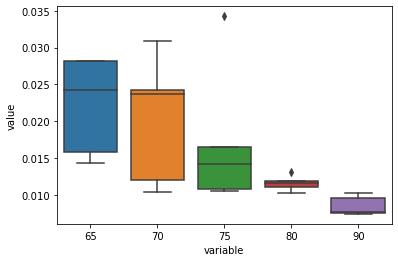

In [123]:
sns.boxplot(x='variable', y='value', data=df_melted) #90